# Imports

In [21]:
import numpy as np

# import sys
# sys.path.append("/path/to/aux_classifier")
import aux_classifier.extraction as extraction
import aux_classifier.data_loader as data_loader
import aux_classifier.utils as utils


import matplotlib.pyplot as plt

def plot_neurons_per_layer(toplayers, title, numberlayers=13, layersize = 768):
    nlayers = np.floor_divide(toplayers,layersize)
    (unique, counts) = np.unique(nlayers, return_counts=True)
    layersLabels = np.arange(numberlayers)
    layersCounts = np.zeros(numberlayers)
    for i in range(len(unique)):
        layersCounts[unique[i]]=counts[i]
    plt.bar(layersLabels, layersCounts, align='center', alpha=0.5)
    plt.xticks(layersLabels)
    plt.ylabel('Counts')
    plt.title(title)

    plt.show()

# Data

In [2]:
!cat examples/test.ar

احتفل المسلمون اليوم بعيد الأضحى المبارك ، 
في إجراءات استثنائية بسبب وباء كورونا .
و يؤدي المسلمون في صباح هذا اليوم صلاة العيد في الجوامع و الساحات
و يسألون الله تعالى أن يعمّ الأمن و السلام بلدانهم ،
ثم يذبحون الأضاحي و يطعمون منها الفقراء و المحتاجين .
و عيد الأضحى - الذي يأتي في العاشر من شهر ذي الحجة كل سنة هجرية - هو أحد العيدين المعتمدين في الإسلام ، 
و هو يوم " الحج الأكبر " الذي يقوم فيه الحجاج بأغلب المناسك .


In [3]:
!cat examples/test.ar.label

V DET+NOUN+NSUFF DET+NOUN NOUN DET+NOUN DET+ADJ PUNC
PREP NOUN+NSUFF ADJ+NSUFF PREP+NOUN NOUN NOUN PUNC
CONJ V DET+NOUN+NSUFF PREP NOUN PRON DET+NOUN NOUN+NSUFF DET+NOUN PREP DET+NOUN CONJ DET+NOUN+NSUFF
CONJ V+PRON NOUN V PART V DET+NOUN CONJ DET+NOUN NOUN+PRON PUNC
CONJ V+PRON DET+NOUN CONJ V+PRON PREP+PRON DET+NOUN CONJ DET+NOUN+NSUFF PUNC
CONJ NOUN DET+NOUN PUNC PART V PREP DET+ADJ PREP NOUN NOUN DET+NOUN+NSUFF NOUN NOUN+NSUFF ADJ+NSUFF PUNC PRON NOUN DET+NOUN+NSUFF DET+NOUN+NSUFF PREP DET+NOUN PUNC
CONJ PRON NOUN PUNC DET+NOUN DET+ADJ PUNC PART V PREP+PRON DET+NOUN PREP+NOUN DET+NOUN PUNC


# Extract Representations

Models to upload:
* [QARiB](https://huggingface.co/qarib/bert-base-qarib) ```'qarib/bert-base-qarib'```
* [AraBERT](https://huggingface.co/aubmindlab/bert-base-arabert) ```'aubmindlab/bert-base-arabert'```
* [ArabicBERT](https://huggingface.co/asafaya/bert-base-arabic) ```'asafaya/bert-base-arabic'```
* [mBERT](https://huggingface.co/bert-base-multilingual-cased) ```'bert-base-multilingual-cased'```

1.  QARiB

In [2]:

extraction.extract_representations('qarib/bert-base-qarib',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.qarib_activations.json',
                                   aggregation="average"
                                  )

Loading model:  qarib/bert-base-qarib
Reading input corpus
Reading filter vocabulary
Preparing output file
Extracting representations from model
['[UNK]']
['a', 'ثقافة']
Sentence          : "# ثقافة"
Original    (002): ['#', 'a ثقافة']
Tokenized   (004): ['[CLS]', '[UNK]', 'ثقافة', '[SEP]']
Detokenized (002): ['[UNK]', 'ثقافة']
Counter: 2
Hidden states:  (13, 2, 768)
# Extracted words:  2
['فيلم']
['a', 'جاذبية']
['a', 'يتصدر']
['a', 'ترشيح', '##ات']
['a', 'جوا', '##يز']
['a', 'الاكاديمية']
['a', 'البريطانية']
['a', 'لفنون']
['a', 'الفيلم']
['a', 'والتلفزيون']
Sentence          : "فيلم جاذبية يتصدر ترشيحات جوائز الأكاديمية البريطانية لفنون الفيلم والتلفزيون"
Original    (010): ['فيلم', 'a جاذبية', 'a يتصدر', 'a ترشيحات', 'a جوائز', 'a الأكاديمية', 'a البريطانية', 'a لفنون', 'a الفيلم', 'a والتلفزيون']
Tokenized   (014): ['[CLS]', 'فيلم', 'جاذبية', 'يتصدر', 'ترشيح', '##ات', 'جوا', '##يز', 'الاكاديمية', 'البريطانية', 'لفنون', 'الفيلم', 'والتلفزيون', '[SEP]']
Detokenized (010): ['فيلم', '

Sentence          : "وكان المؤتمر ، التاسع من نوعه عالميا والذي يعد أكبر مؤتمر لحركة ويكيميديا للمحتوى الحر في العالم ، قد بدأ في يوم الأربعاء السابع من أغسطس بمرحلته التمهيدية ، حيث شمل عددا من المحاضرات والورشات غير الرسمية ، أهمها ورشات ال " Devcamp " المتخصصة بتعليم وممارسة الأعمال التقنية لبرمجة أدوات مواقع الويكي بلغة البايثون ، وتطوير المميزات الجديدة لإضافتها إلى هذه المواقع على Wikimedia labs ( مختبرات ويكيميديا ) ، وهي موقع مخصص لاختبار وتجربة أدوات الويكي الجديدة قبل تعميمها على مشاريع ويكيميديا . كما شملت الأيام التمهيدية لقاءات ومناقشات متعلقة بفروع ويكيميديا ( Wikimedia Chapters ) ، وهي أشبه بمنظمات أو جمعيات ويكيميدية محلية يديرها متطوعو مشاريع الويكي في البلدان المختلفة ."
Original    (114): ['وكان', 'a المؤتمر', 'a ،', 'a التاسع', 'a من', 'a نوعه', 'a عالميا', 'a والذي', 'a يعد', 'a أكبر', 'a مؤتمر', 'a لحركة', 'a ويكيميديا', 'a للمحتوى', 'a الحر', 'a في', 'a العالم', 'a ،', 'a قد', 'a بدأ', 'a في', 'a يوم', 'a الأربعاء', 'a السابع', 'a من', 'a أغسطس', 'a بمرحلته', 'a 

Sentence          : "وجاء الافتتاح الرسمي للمؤتمر في يوم الجمعة ، ثاني أيام العيد ، حيث ألقى دانييل لاي ، رئيس قسم المعلومات في حكومة هونغ كونغ ، كلمة افتتاحية تحدث فيها عن استضافة المدينة للحدث ، أعقبتها محاضرة للبروفيسور ماكوتو أوماكوتو عن مشروع " saveMLAK " في اليابان ، وأخيرا كلمة جيمي ويلز ، التي ذكر فيها عددا من التطورات والإنجازات الهامة التي شهدتها الحركة خلال العام الماضي ، بينها تجاوز أربع نسخ من ويكيبيديا حاجز المليون مقالة ، وانتخاب مجلس أمناء جديد لمؤسسة ويكيميديا ، وانتقال مشاريع ويكيميديا من امتداد HTTP إلى HTTPS . كذلك ، تحدث جيمي ويلز عن مشروع جديد ينوي إطلاقه لتشكيل وكالة أنباء للإعلام البديل والحر ، ودعا حضور المؤتمر من المهتمين إلى مناقشة وتطوير الفكرة معه ."
Original    (121): ['وجاء', 'a الافتتاح', 'a الرسمي', 'a للمؤتمر', 'a في', 'a يوم', 'a الجمعة', 'a ،', 'a ثاني', 'a أيام', 'a العيد', 'a ،', 'a حيث', 'a ألقى', 'a دانييل', 'a لاي', 'a ،', 'a رئيس', 'a قسم', 'a المعلومات', 'a في', 'a حكومة', 'a هونغ', 'a كونغ', 'a ،', 'a كلمة', 'a افتتاحية', 'a تحدث', 'a فيها', 

['وكانت']
['a', 'هناك']
['a', 'مشاركة']
['a', 'عربية']
['a', 'جيدة']
['a', 'في']
['a', 'الموت', '##مر']
['a', 'لهذا']
['a', 'العام']
['a', '[UNK]']
['a', 'حيث']
['a', 'كانت']
['a', 'من']
['a', 'نصيب']
['a', 'المساهمين']
['a', 'العرب']
['a', 'ثلاث']
['a', 'من']
['a', 'محاضرات']
['a', 'ويك', '##يمان', '##يا']
['a', '[UNK]']
['a', 'فقد']
['a', 'تحدث']
['a', 'زكريا']
['a', 'من']
['a', 'المغرب']
['a', 'في']
['a', 'محاضرته']
['a', '[UNK]']
['a', 'استراتيجية']
['a', 'ل', '##لك', '##شف']
['a', 'التدريجي']
['a', 'في']
['a', 'ويكيبيديا']
['a', '[UNK]']
['a', 'عن']
['a', 'المشاكل']
['a', 'التي']
['a', 'يعاني']
['a', 'منها']
['a', 'المساهم', '##ون']
['a', 'الجد', '##د']
['a', 'على']
['a', 'ويكيبيديا']
['a', '[UNK]']
['a', 'والتع', '##قيد', '##ات']
['a', 'التي']
['a', 'تمت', '##لي']
['a', 'بها']
['a', 'واجهة']
['a', 'المستخدمين']
['a', 'في']
['a', 'الموس', '##وعة']
['a', '[UNK]']
['a', 'وناقش']
['a', 'مع']
['a', 'الحضور']
['a', 'امكانيات']
['a', 'حل']
['a', 'هذه']
['a', 'المشاكل']
['a', 'والو', '##

Sentence          : "وكان ختام المؤتمر أخيرا في يوم الأحد الحادي عشر من أغسطس ، حيث تحدث مجلس أمناء مؤسسة ويكيميديا عن مشاريع المؤسسة وأهدافها المستقبلية ، وكانت هناك فقرة أسئلة وأجوبة تحاور فيها الحضور مع المجلس ، كما خصصت فقرة لتوديع سو غاردنر ، المديرة التنفيذية لمؤسسة ويكيميديا منذ تأسيسها والتي أعلنت استقالتها قبل شهور ، حيث تحدث عن إنجازاتها وأعمالها العديد من مسؤولي المؤسسة وناشطي حركة ويكيميديا . وأخيرا كانت هناك كلمة لمنظمي مؤتمر ويكيمانيا القادم ، والذي سيقام في لندن بشهر أغسطس التالي ، وأعطى منظمو المؤتمر الحضور لمحة عن إعدادات وتجهيزات ويكيمانيا 2014 ."
Original    (095): ['وكان', 'a ختام', 'a المؤتمر', 'a أخيرا', 'a في', 'a يوم', 'a الأحد', 'a الحادي', 'a عشر', 'a من', 'a أغسطس', 'a ،', 'a حيث', 'a تحدث', 'a مجلس', 'a أمناء', 'a مؤسسة', 'a ويكيميديا', 'a عن', 'a مشاريع', 'a المؤسسة', 'a وأهدافها', 'a المستقبلية', 'a ،', 'a وكانت', 'a هناك', 'a فقرة', 'a أسئلة', 'a وأجوبة', 'a تحاور', 'a فيها', 'a الحضور', 'a مع', 'a المجلس', 'a ،', 'a كما', 'a خصصت', 'a فقرة', 'a لتوديع', 

Sentence          : "توفي صباح اليوم في دمشق الشاعر السوري سليمان العيسى عن عمر 92 سنة بعد أن دخل المشفى منذ أيام إثر تدهور في حالته الصحية . وأصدر اتحاد الكتاب العرب بيانا نعى فيه الشاعر الكبير . وسوف يشيع جثمانه من مشفى الأسد الجامعي بدمشق ، ويدفن في مقبرة الشيخ رسلان ."
Original    (050): ['توفي', 'a صباح', 'a اليوم', 'a في', 'a دمشق', 'a الشاعر', 'a السوري', 'a سليمان', 'a العيسى', 'a عن', 'a عمر', 'a 92', 'a سنة', 'a بعد', 'a أن', 'a دخل', 'a المشفى', 'a منذ', 'a أيام', 'a إثر', 'a تدهور', 'a في', 'a حالته', 'a الصحية', 'a .', 'a وأصدر', 'a اتحاد', 'a الكتاب', 'a العرب', 'a بيانا', 'a نعى', 'a فيه', 'a الشاعر', 'a الكبير', 'a .', 'a وسوف', 'a يشيع', 'a جثمانه', 'a من', 'a مشفى', 'a الأسد', 'a الجامعي', 'a بدمشق', 'a ،', 'a ويدفن', 'a في', 'a مقبرة', 'a الشيخ', 'a رسلان', 'a .']
Tokenized   (056): ['[CLS]', 'توفي', 'صباح', 'اليوم', 'في', 'دمشق', 'الشاعر', 'السوري', 'سليمان', 'العيسى', 'عن', 'عمر', '9', '##2', 'سنة', 'بعد', 'ان', 'دخل', 'المشفى', 'منذ', 'ايام', 'اثر', 'تدهور', 'في',

['بدا']
['a', 'سليمان']
['a', 'العيسى']
['a', 'بكتابة']
['a', 'الشعر']
['a', 'وهو']
['a', 'في']
['a', 'التاسعة']
['a', 'من']
['a', 'عمره']
['a', '[UNK]']
['a', 'وصف']
['a', 'فيه']
['a', 'معاناة']
['a', 'اهله']
['a', 'من']
['a', 'الفلاحين']
['a', 'وند', '##د']
['a', 'بالاست', '##عمار']
['a', 'الفرنسي']
['a', '[UNK]']
['a', 'وهو']
['a', 'من']
['a', 'اهم']
['a', 'الشعراء']
['a', 'العرب']
['a', 'القومي', '##ين']
['a', 'ومن']
['a', 'اكبر']
['a', 'شعراء']
['a', 'الاطفال']
['a', '[UNK]']
['a', 'وهو']
['a', 'من']
['a', 'موس', '##سي']
['a', 'اتحاد']
['a', 'الكتاب']
['a', 'العرب']
['a', 'في']
['a', 'سنة']
['a', '19', '##69']
['a', 'في']
['a', 'سوريا']
['a', '[UNK]']
Sentence          : "بدأ سليمان العيسى بكتابة الشعر وهو في التاسعة من عمره ، وصف فيه معاناة أهله من الفلاحين وندد بالاستعمار الفرنسي ، وهو من أهم الشعراء العرب القوميين ومن أكبر شعراء الأطفال ، وهو من مؤسسي اتحاد الكتاب العرب في سنة 1969 في سوريا ."
Original    (044): ['بدأ', 'a سليمان', 'a العيسى', 'a بكتابة', 'a الشعر', 'a وهو', 'a

Sentence          : "وشرح التويم أن المستهلكين ينساقون وراء العروض الخاصة دون أن يفكروا إن كانوا بحاجة إلى اقتناء هذه المواد ، فيشترون أكثر من حاجتهم مما يشكل عبئا على نفقاتهم ويزيد الطلب على المواد الغذائية التي ينتهي مصيرها في النفايات ويرفع أسعارها ."
Original    (041): ['وشرح', 'a التويم', 'a أن', 'a المستهلكين', 'a ينساقون', 'a وراء', 'a العروض', 'a الخاصة', 'a دون', 'a أن', 'a يفكروا', 'a إن', 'a كانوا', 'a بحاجة', 'a إلى', 'a اقتناء', 'a هذه', 'a المواد', 'a ،', 'a فيشترون', 'a أكثر', 'a من', 'a حاجتهم', 'a مما', 'a يشكل', 'a عبئا', 'a على', 'a نفقاتهم', 'a ويزيد', 'a الطلب', 'a على', 'a المواد', 'a الغذائية', 'a التي', 'a ينتهي', 'a مصيرها', 'a في', 'a النفايات', 'a ويرفع', 'a أسعارها', 'a .']
Tokenized   (057): ['[CLS]', 'وشرح', 'التو', '##ي', '##م', 'ان', 'المستهلكين', 'ينس', '##اق', '##ون', 'وراء', 'العروض', 'الخاصة', 'دون', 'ان', 'يفكر', '##وا', 'ان', 'كانوا', 'بحاجة', 'الى', 'اقتناء', 'هذه', 'المواد', '[UNK]', 'في', '##شتر', '##ون', 'اكثر', 'من', 'حاجتهم', 'م', '##ما', 'يش

['علماء']
['a', 'اثار']
['a', 'اسر', '##ا', '##ي', '##يلي', '##ون']
['a', 'يعتقدون']
['a', 'باك', '##تشاف', '##هم']
['a', 'قصر']
['a', 'النبي']
['a', 'داود']
Sentence          : "علماء آثار إسرائيليون يعتقدون باكتشافهم قصر النبي داود"
Original    (008): ['علماء', 'a آثار', 'a إسرائيليون', 'a يعتقدون', 'a باكتشافهم', 'a قصر', 'a النبي', 'a داود']
Tokenized   (016): ['[CLS]', 'علماء', 'اثار', 'اسر', '##ا', '##ي', '##يلي', '##ون', 'يعتقدون', 'باك', '##تشاف', '##هم', 'قصر', 'النبي', 'داود', '[SEP]']
Detokenized (008): ['علماء', 'اثار', 'اسر##ا##ي##يلي##ون', 'يعتقدون', 'باك##تشاف##هم', 'قصر', 'النبي', 'داود']
Counter: 14
Hidden states:  (13, 8, 768)
# Extracted words:  8
['افادت']
['a', 'مجموعة']
['a', 'من']
['a', 'علماء']
['a', 'الاثار']
['a', 'الاسر', '##ا', '##ي', '##يلي', '##ين']
['a', 'انهم']
['a', 'يعتقدون']
['a', 'بعث', '##وره', '##م']
['a', 'على']
['a', 'موقع']
['a', 'قصر']
['a', 'النبي']
['a', 'داود']
['a', '[UNK]']
['a', 'ثاني']
['a', 'ملوك']
['a', 'م', '##ملك', '##ة']
['a', 'اسر'

['ومن']
['a', 'الجدير']
['a', 'بالذكر']
['a', 'ان']
['a', 'عمليات']
['a', 'التنقيب']
['a', 'بالموقع']
['a', 'استمرت']
['a', 'سبع']
['a', 'سنوات']
['a', '[UNK]']
['a', 'وقبلها']
['a', 'كان']
['a', 'عالم']
['a', 'الاثار']
['a', 'الاسر', '##ا', '##ي', '##يلي']
['a', 'الي', '##ات']
['a', 'مزار']
['a', 'قد']
['a', 'اعلن']
['a', 'في']
['a', 'سنة']
['a', '20', '##0', '##5']
['a', 'م']
['a', 'انه']
['a', 'كشف']
['a', 'موقع']
['a', 'قصر']
['a', 'الملك']
['a', 'داود']
['a', '[UNK]']
['a', 'واشار']
['a', 'الى']
['a', 'انه']
['a', 'يعود']
['a', 'ل', '##لقرن']
['a', 'العاشر']
['a', 'قبل']
['a', 'الميلاد']
['a', '[UNK]']
['a', 'ويست', '##ند']
['a', 'العلماء']
['a', 'الى']
['a', 'هذه']
['a', 'القضية']
['a', 'وغيرها']
['a', 'من']
['a', 'القضايا']
['a', 'المشابهة']
['a', 'ل', '##لت', '##اك', '##د']
['a', 'من']
['a', 'صحة']
['a', 'القص', '##ص']
['a', 'الواردة']
['a', 'في']
['a', 'التوراة']
['a', '[UNK]']
Sentence          : "ومن الجدير بالذكر أن عمليات التنقيب بالموقع استمرت سبع سنوات ، وقبلها كان عالم 

['مقتل']
['a', '28']
['a', 'شخصا']
['a', 'في']
['a', 'بن', '##غلا', '##ديش']
['a', 'خلال']
['a', 'مظاهرات']
['a', 'مطالبة']
['a', 'بقانون']
['a', 'يجرم']
['a', '[UNK]']
['a', 'الكفر']
['a', '[UNK]']
Sentence          : "مقتل 28 شخصا في بنغلاديش خلال مظاهرات مطالبة بقانون يجرم " الكفر ""
Original    (013): ['مقتل', 'a 28', 'a شخصا', 'a في', 'a بنغلاديش', 'a خلال', 'a مظاهرات', 'a مطالبة', 'a بقانون', 'a يجرم', 'a "', 'a الكفر', 'a "']
Tokenized   (017): ['[CLS]', 'مقتل', '28', 'شخصا', 'في', 'بن', '##غلا', '##ديش', 'خلال', 'مظاهرات', 'مطالبة', 'بقانون', 'يجرم', '[UNK]', 'الكفر', '[UNK]', '[SEP]']
Detokenized (013): ['مقتل', '28', 'شخصا', 'في', 'بن##غلا##ديش', 'خلال', 'مظاهرات', 'مطالبة', 'بقانون', 'يجرم', '[UNK]', 'الكفر', '[UNK]']
Counter: 15
Hidden states:  (13, 13, 768)
# Extracted words:  13
['انطلقت']
['a', 'في']
['a', 'دك', '##ا']
['a', 'عاصمة']
['a', 'بن', '##غلا', '##ديش']
['a', 'بعد']
['a', 'ظهر']
['a', 'امس']
['a', 'الاحد']
['a', 'مظاهرات']
['a', 'تطالب']
['a', 'الحكومة']
['a',

['ومن']
['a', 'جانبها']
['a', '[UNK]']
['a', 'اكدت']
['a', 'ري', '##يس', '##ة']
['a', 'وزراء']
['a', 'بن', '##غلا', '##ديش']
['a', 'شيخة']
['a', 'حسين', '##ة']
['a', 'واجد']
['a', 'ان']
['a', 'القوانين']
['a', 'الموجودة']
['a', 'فيها']
['a', 'ما']
['a', 'يلزم']
['a', 'لمعالجة']
['a', 'ما']
['a', 'اثاره']
['a', 'المتظاهر', '##ون']
['a', 'من']
['a', 'مطالب']
['a', '[UNK]']
['a', 'وشد', '##دت']
['a', 'على']
['a', 'ان']
['a', 'الحكومة']
['a', '[UNK]']
['a', 'لن']
['a', 'تسمح']
['a', 'باي']
['a', 'فوضى']
['a', 'باسم']
['a', 'الاسلام']
['a', '[UNK]']
['a', 'دين']
['a', 'السلام']
['a', '[UNK]']
['a', '[UNK]']
Sentence          : "ومن جانبها ، أكدت رئيسة وزراء بنغلاديش شيخة حسينة واجد أن القوانين الموجودة فيها ما يلزم لمعالجة ما أثاره المتظاهرون من مطالب ، وشددت على أن الحكومة " لن تسمح بأي فوضى باسم الإسلام ، دين السلام " ."
Original    (039): ['ومن', 'a جانبها', 'a ،', 'a أكدت', 'a رئيسة', 'a وزراء', 'a بنغلاديش', 'a شيخة', 'a حسينة', 'a واجد', 'a أن', 'a القوانين', 'a الموجودة', 'a فيها', '

['تحدث']
['a', 'احمد']
['a', 'عصي', '##د']
['a', 'في']
['a', 'الموت', '##مر']
['a', 'العاشر']
['a', 'ل', '##لجم', '##عي', '##ة']
['a', 'المغربية']
['a', 'لحقوق']
['a', 'الانسان']
['a', 'منذ']
['a', 'عشرة']
['a', 'ايام']
['a', 'في']
['a', '21']
['a', 'ابريل']
['a', 'الماضي']
['a', '[UNK]']
['a', 'وقال']
['a', '[UNK]']
['a', '[UNK]']
['a', 'الرسالة']
['a', 'التي']
['a', 'تدرس']
['a', 'في']
['a', 'مقر', '##رات', '##نا']
['a', 'لتل', '##ام', '##ذ', '##تنا']
['a', 'وهم']
['a', 'في']
['a', 'السادسة']
['a', 'عشرة']
['a', 'هي']
['a', 'في']
['a', 'الحقيقة']
['a', 'رسالة']
['a', 'ارهابية']
['a', 'لانها']
['a', 'ترتبط']
['a', 'بزمن']
['a', 'كان']
['a', 'فيه']
['a', 'الدين']
['a', 'ينشر']
['a', 'بالسيف']
['a', 'وبال', '##عنف']
['a', '[UNK]']
['a', 'اليوم']
['a', 'المعتقد']
['a', 'اختيار']
['a', 'شخصي']
['a', 'حر']
['a', 'ل', '##لاف', '##راد']
['a', '[UNK]']
['a', 'لا']
['a', 'يمكن']
['a', 'ان']
['a', 'تدرس']
['a', 'رسالة']
['a', 'تقول']
['a', 'اما']
['a', 'ان']
['a', 'تسلم']
['a', 'واما']
['a', 'ا

Sentence          : "من جهته أكد إدريس اليزمي رئيس المجلس الوطني لحقوق الإنسان على أهمية " حرية الفكر والتعبير " الأمس جوابا على سؤال وكالة فرانس برس وتأسف لما أثارته كلمة أحمد عصيد من جدال . ودعا محمد الفزازي ، وهو فقيه مغربي محسوب على التيار السلفي ، إلى محاكمة أحمد عصيد بتهمة ازدراء الإسلام ."
Original    (053): ['من', 'a جهته', 'a أكد', 'a إدريس', 'a اليزمي', 'a رئيس', 'a المجلس', 'a الوطني', 'a لحقوق', 'a الإنسان', 'a على', 'a أهمية', 'a "', 'a حرية', 'a الفكر', 'a والتعبير', 'a "', 'a الأمس', 'a جوابا', 'a على', 'a سؤال', 'a وكالة', 'a فرانس', 'a برس', 'a وتأسف', 'a لما', 'a أثارته', 'a كلمة', 'a أحمد', 'a عصيد', 'a من', 'a جدال', 'a .', 'a ودعا', 'a محمد', 'a الفزازي', 'a ،', 'a وهو', 'a فقيه', 'a مغربي', 'a محسوب', 'a على', 'a التيار', 'a السلفي', 'a ،', 'a إلى', 'a محاكمة', 'a أحمد', 'a عصيد', 'a بتهمة', 'a ازدراء', 'a الإسلام', 'a .']
Tokenized   (064): ['[CLS]', 'من', 'جهته', 'اكد', 'ادريس', 'الي', '##زم', '##ي', 'ري', '##يس', 'المجلس', 'الوطني', 'لحقوق', 'الانسان', 'على', '

['واجر', '##ى']
['a', 'الامام']
['a', 'الاكبر']
['a', 'الدكتور']
['a', 'احمد']
['a', 'الطيب']
['a', 'شيخ']
['a', 'الازهر']
['a', '[UNK]']
['a', 'اتصالا']
['a', 'هاتفيا']
['a', 'بالدكتور']
['a', 'شوقي']
['a', 'ابراهيم']
['a', 'عبد']
['a', 'الكريم']
['a', 'هنا', '##ه']
['a', 'خلاله']
['a', 'بالمن', '##صب']
['a', 'الجديد']
['a', 'وانتخاب', '##ه']
['a', 'مفتي']
['a', 'الديار']
['a', 'المصرية']
['a', 'رقم']
['a', '19']
['a', '[UNK]']
['a', 'كما']
['a', 'هنا']
['a', 'الدكتور']
['a', 'علي']
['a', 'جمعة']
['a', '[UNK]']
['a', 'مفتي']
['a', 'الجمهورية']
['a', '[UNK]']
['a', 'المفتي']
['a', 'الجديد']
['a', 'متمنيا']
['a', 'له']
['a', 'التوفيق']
['a', 'وخدمة']
['a', 'الاسلام']
['a', 'والمسلمين']
['a', '[UNK]']
['a', 'وينبغي']
['a', 'ان']
['a', 'يقر']
['a', 'الري', '##يس']
['a', 'محمد']
['a', 'مرسي']
['a', 'تعي', '##ين']
['a', 'المفتي']
['a', 'المنتخب']
['a', 'الذي']
['a', 'سيحل']
['a', 'محل']
['a', 'المفتي']
['a', 'الحالي']
['a', 'علي']
['a', 'جمعة']
['a', '[UNK]']
['a', 'وينتظر']
['a', 'ان']
['a

['واجر', '##يت']
['a', 'الانتخابات']
['a', 'في']
['a', 'جو']
['a', 'من']
['a', 'النزاهة']
['a', 'والشفافي', '##ة']
['a', '[UNK]']
['a', 'وكانت']
['a', 'الانتخابات']
['a', 'اجريت']
['a', 'تحت']
['a', 'اشراف']
['a', 'قض', '##ا', '##ي', '##ي']
['a', 'يتمثل']
['a', 'في']
['a', 'المستشار']
['a', 'القانوني']
['a', 'ل', '##لام', '##ام']
['a', 'الاكبر']
['a', '[UNK]']
['a', 'المستشار']
['a', 'محمد']
['a', 'عبد']
['a', 'السلام']
['a', '[UNK]']
['a', 'ويع', '##او', '##نه']
['a', 'قانوني', '##ون']
['a', 'بالم', '##شيخ', '##ة']
['a', 'لفر', '##ز']
['a', 'الاصوات']
['a', 'وا', '##ثب', '##ات']
['a', 'ذلك']
['a', 'في']
['a', 'محضر']
['a', 'الجلسة']
['a', '[UNK]']
['a', 'ورفع', '##ها']
['a', 'الى']
['a', 'ري', '##يس']
['a', 'الجمهورية']
['a', 'لاعتماد', '##ه']
['a', '[UNK]']
['a', 'فيما']
['a', 'اشرف']
['a', 'الدكتور']
['a', 'علي']
['a', 'جمعة']
['a', 'على']
['a', 'عملية']
['a', 'الفرز']
['a', '[UNK]']
['a', 'وكتاب', '##ة']
['a', 'محضر']
['a', 'الفرز']
['a', '[UNK]']
['a', 'واجتمع', '##ت']
['a', 'هي',

['جماعة']
['a', 'العدل']
['a', 'والاحسان']
['a', 'تنتخب']
['a', 'محمد']
['a', 'عبادي']
['a', 'امين', '##ا']
['a', 'عاما']
['a', 'لها']
Sentence          : "جماعة العدل والإحسان تنتخب محمد عبادي أمينا عاما لها"
Original    (009): ['جماعة', 'a العدل', 'a والإحسان', 'a تنتخب', 'a محمد', 'a عبادي', 'a أمينا', 'a عاما', 'a لها']
Tokenized   (012): ['[CLS]', 'جماعة', 'العدل', 'والاحسان', 'تنتخب', 'محمد', 'عبادي', 'امين', '##ا', 'عاما', 'لها', '[SEP]']
Detokenized (009): ['جماعة', 'العدل', 'والاحسان', 'تنتخب', 'محمد', 'عبادي', 'امين##ا', 'عاما', 'لها']
Counter: 10
Hidden states:  (13, 9, 768)
# Extracted words:  9
['اعلنت']
['a', 'جماعة']
['a', 'العدل']
['a', 'والاحسان']
['a', 'شبه']
['a', 'المحظور', '##ة']
['a', 'في']
['a', 'الم', '##ملك', '##ة']
['a', 'المغربية']
['a', 'في']
['a', 'موت', '##مر']
['a', 'صحفي']
['a', 'امس']
['a', 'الاثنين']
['a', 'عن']
['a', 'انتخاب']
['a', 'محمد']
['a', 'عبادي']
['a', 'امين', '##ا']
['a', 'عاما']
['a', 'ل', '##لمن', '##ظم', '##ة']
['a', 'خلفا']
['a', 'لمرشد'

['وشد', '##د']
['a', 'الامين']
['a', 'العام']
['a', 'المنتخب']
['a', 'في']
['a', 'موت', '##مر']
['a', 'صحفي']
['a', 'بعد']
['a', 'انتخابه']
['a', 'على']
['a', 'التزام']
['a', 'الجماعة']
['a', 'بالم', '##بادي']
['a', 'التي']
['a', 'وضعها']
['a', 'المرشد']
['a', 'العام']
['a', 'منذ']
['a', 'تاسيس', '##ها']
['a', '[UNK]']
['a', 'ول', '##خص', '##ها']
['a', 'بثلاث']
['a', 'عبارات']
['a', '[UNK]']
['a', '[UNK]']
['a', 'لا']
['a', 'ل', '##لعن', '##ف']
['a', '[UNK]']
['a', 'لا']
['a', 'ل', '##لس', '##رية']
['a', '[UNK]']
['a', 'ولا']
['a', 'ل', '##لت', '##بع', '##ية']
['a', 'الخارجية']
['a', '[UNK]']
['a', '[UNK]']
['a', 'واكد']
['a', 'ان']
['a', 'الجماعة']
['a', 'ستركز']
['a', 'على']
['a', 'محاربة']
['a', 'الظلم']
['a', 'والفساد']
['a', 'بالو', '##سا', '##يل']
['a', 'السلمية']
['a', '[UNK]']
['a', 'وقال']
['a', 'انها']
['a', 'ستكون']
['a', 'عامل']
['a', 'استقرار']
['a', 'في']
['a', 'البلاد']
['a', 'وليس']
['a', 'عامل']
['a', 'فتنة']
['a', 'وتش', '##ويش']
['a', '[UNK]']
['a', 'ودعا']
['a', '[U

['[UNK]']
['a', 'صحة']
Sentence          : "# صحة"
Original    (002): ['#', 'a صحة']
Tokenized   (004): ['[CLS]', '[UNK]', 'صحة', '[SEP]']
Detokenized (002): ['[UNK]', 'صحة']
Counter: 2
Hidden states:  (13, 2, 768)
# Extracted words:  2
['5', '##5']
['a', 'حالة']
['a', 'وفاة']
['a', 'بفيروس']
['a', 'كورونا']
['a', 'في']
['a', 'السعودية']
['a', 'حتى']
['a', 'الان']
Sentence          : "55 حالة وفاة بفيروس كورونا في السعودية حتى الآن"
Original    (009): ['55', 'a حالة', 'a وفاة', 'a بفيروس', 'a كورونا', 'a في', 'a السعودية', 'a حتى', 'a الآن']
Tokenized   (012): ['[CLS]', '5', '##5', 'حالة', 'وفاة', 'بفيروس', 'كورونا', 'في', 'السعودية', 'حتى', 'الان', '[SEP]']
Detokenized (009): ['5##5', 'حالة', 'وفاة', 'بفيروس', 'كورونا', 'في', 'السعودية', 'حتى', 'الان']
Counter: 10
Hidden states:  (13, 9, 768)
# Extracted words:  9
['اعلنت']
['a', 'وزارة']
['a', 'الصحة']
['a', 'السعودية']
['a', 'يوم']
['a', 'امس']
['a', 'عن']
['a', 'ارتفاع']
['a', 'عد', '##د']
['a', 'الوفيات']
['a', 'في']
['a', 'الم', 

['دراسة']
['a', 'طبية']
['a', 'توك', '##د']
['a', 'ان']
['a', 'الرجال']
['a', 'اكثر']
['a', 'عرضة']
['a', 'ل', '##لاصابة']
['a', 'بمرض']
['a', 'سرطان']
['a', 'الجلد']
Sentence          : "دراسة طبية تؤكد أن الرجال أكثر عرضة للإصابة بمرض سرطان الجلد"
Original    (011): ['دراسة', 'a طبية', 'a تؤكد', 'a أن', 'a الرجال', 'a أكثر', 'a عرضة', 'a للإصابة', 'a بمرض', 'a سرطان', 'a الجلد']
Tokenized   (015): ['[CLS]', 'دراسة', 'طبية', 'توك', '##د', 'ان', 'الرجال', 'اكثر', 'عرضة', 'ل', '##لاصابة', 'بمرض', 'سرطان', 'الجلد', '[SEP]']
Detokenized (011): ['دراسة', 'طبية', 'توك##د', 'ان', 'الرجال', 'اكثر', 'عرضة', 'ل##لاصابة', 'بمرض', 'سرطان', 'الجلد']
Counter: 13
Hidden states:  (13, 11, 768)
# Extracted words:  11
['قال']
['a', 'تقرير']
['a', 'طبي']
['a', 'حديث']
['a', 'ان']
['a', 'الرجال']
['a', 'اكثر']
['a', 'عرضة']
['a', 'بنسبة']
['a', '70']
['a', '[UNK]']
['a', 'ل', '##لوف', '##ا', '##ة']
['a', 'مبكرا']
['a', 'متاثر', '##ين']
['a', 'باص', '##اب', '##تهم']
['a', 'بسرطان']
['a', 'الجلد']
['a', '[

['وقد']
['a', 'يكون']
['a', 'احد']
['a', 'الاسباب']
['a', 'هو']
['a', 'تاخر']
['a', 'الرجال']
['a', 'في']
['a', 'طلب']
['a', 'المساعدة']
['a', '[UNK]']
['a', 'لكن']
['a', 'يتوقع']
['a', 'بعض']
['a', 'الخبراء']
['a', 'ان']
['a', 'يكون']
['a', 'ل', '##لناحية']
['a', 'البيولوجي', '##ة']
['a', 'دور']
['a', 'في']
['a', 'هذا']
['a', 'الشان']
['a', '[UNK]']
Sentence          : "وقد يكون أحد الأسباب هو تأخر الرجال في طلب المساعدة ، لكن يتوقع بعض الخبراء أن يكون للناحية البيولوجية دور في هذا الشأن ."
Original    (024): ['وقد', 'a يكون', 'a أحد', 'a الأسباب', 'a هو', 'a تأخر', 'a الرجال', 'a في', 'a طلب', 'a المساعدة', 'a ،', 'a لكن', 'a يتوقع', 'a بعض', 'a الخبراء', 'a أن', 'a يكون', 'a للناحية', 'a البيولوجية', 'a دور', 'a في', 'a هذا', 'a الشأن', 'a .']
Tokenized   (028): ['[CLS]', 'وقد', 'يكون', 'احد', 'الاسباب', 'هو', 'تاخر', 'الرجال', 'في', 'طلب', 'المساعدة', '[UNK]', 'لكن', 'يتوقع', 'بعض', 'الخبراء', 'ان', 'يكون', 'ل', '##لناحية', 'البيولوجي', '##ة', 'دور', 'في', 'هذا', 'الشان', '[UNK]', 

['وتابعت']
['a', '[UNK]']
['a', '[UNK]']
['a', 'نعتقد']
['a', 'ان']
['a', 'هناك']
['a', 'شي', '##يا']
['a', 'له']
['a', 'علاقة']
['a', 'بجهاز']
['a', 'المناعة']
['a', 'اكثر']
['a', 'من']
['a', 'الهرمونات']
['a', 'لان']
['a', 'الامر']
['a', 'لم']
['a', 'يتغير']
['a', 'في']
['a', 'فترة']
['a', 'ما']
['a', 'قبل']
['a', 'وما']
['a', 'بعد']
['a', 'انقطاع']
['a', 'الطم', '##ث']
['a', 'عند']
['a', 'النساء']
['a', '[UNK]']
['a', '[UNK]']
Sentence          : "وتابعت : " نعتقد أن هناك شيئا له علاقة بجهاز المناعة أكثر من الهرمونات لأن الأمر لم يتغير في فترة ما قبل وما بعد انقطاع الطمث عند النساء . ""
Original    (030): ['وتابعت', 'a :', 'a "', 'a نعتقد', 'a أن', 'a هناك', 'a شيئا', 'a له', 'a علاقة', 'a بجهاز', 'a المناعة', 'a أكثر', 'a من', 'a الهرمونات', 'a لأن', 'a الأمر', 'a لم', 'a يتغير', 'a في', 'a فترة', 'a ما', 'a قبل', 'a وما', 'a بعد', 'a انقطاع', 'a الطمث', 'a عند', 'a النساء', 'a .', 'a "']
Tokenized   (034): ['[CLS]', 'وتابعت', '[UNK]', '[UNK]', 'نعتقد', 'ان', 'هناك', 'شي', '##يا', 

['ومن']
['a', 'المرجح']
['a', 'ان']
['a', 'ينجح']
['a', 'العلاج']
['a', 'اذا']
['a', 'ما']
['a', 'تم']
['a', 'اكتشاف']
['a', 'هذا']
['a', 'النوع']
['a', 'من']
['a', 'السرطان']
['a', 'في']
['a', 'فترة']
['a', 'مبكرة']
['a', '[UNK]']
Sentence          : "ومن المرجح أن ينجح العلاج إذا ما تم اكتشاف هذا النوع من السرطان في فترة مبكرة ."
Original    (017): ['ومن', 'a المرجح', 'a أن', 'a ينجح', 'a العلاج', 'a إذا', 'a ما', 'a تم', 'a اكتشاف', 'a هذا', 'a النوع', 'a من', 'a السرطان', 'a في', 'a فترة', 'a مبكرة', 'a .']
Tokenized   (019): ['[CLS]', 'ومن', 'المرجح', 'ان', 'ينجح', 'العلاج', 'اذا', 'ما', 'تم', 'اكتشاف', 'هذا', 'النوع', 'من', 'السرطان', 'في', 'فترة', 'مبكرة', '[UNK]', '[SEP]']
Detokenized (017): ['ومن', 'المرجح', 'ان', 'ينجح', 'العلاج', 'اذا', 'ما', 'تم', 'اكتشاف', 'هذا', 'النوع', 'من', 'السرطان', 'في', 'فترة', 'مبكرة', '[UNK]']
Counter: 17
Hidden states:  (13, 17, 768)
# Extracted words:  17
['دراسة']
['a', 'تجريبي', '##ة']
['a', 'تشير']
['a', 'ان']
['a', 'الغناء']
['a', 'قد']
['a

['بدات']
['a', 'الدراسة']
['a', 'على']
['a', '12', '##7']
['a', 'مريضا']
['a', 'اكمل']
['a', '9', '##3']
['a', 'منهم']
['a', 'الدراسة']
['a', 'حتى']
['a', 'نهايتها']
['a', '[UNK]']
['a', 'وقام']
['a', 'الباحث', '##ون']
['a', 'بقي', '##اس']
['a', 'جودة']
['a', 'النوم']
['a', 'ومستوى']
['a', 'الش', '##خير']
['a', 'قبل']
['a', 'بداية']
['a', 'الدراسة']
['a', 'ثم']
['a', 'بعد']
['a', 'انت', '##ها', '##يها']
['a', 'بواسطة']
['a', 'استمارات']
['a', 'خاصة']
['a', '[UNK]']
['a', 'الا']
['a', 'انهم']
['a', 'لم']
['a', 'يجر', '##وا']
['a', 'قياسا', '##ت']
['a', 'باج', '##ه', '##زة']
['a', 'اثناء']
['a', 'النوم']
['a', '[UNK]']
['a', 'ولم']
['a', 'يكن']
['a', 'الباحث', '##ون']
['a', 'الذين']
['a', 'اجر', '##وا']
['a', 'القياس', '##ات']
['a', 'يعلمون']
['a', 'ما']
['a', 'اذا']
['a', 'كان']
['a', 'المريض']
['a', 'ينتمي']
['a', 'الى']
['a', 'مجموعة']
['a', 'التجربة']
['a', 'ام']
['a', 'مجموعة']
['a', 'الشواهد']
['a', 'كي']
['a', 'لا']
['a', 'تو', '##ثر']
['a', 'هذه']
['a', 'المعرفة']
['a', 'على']
['

['بنيامين']
['a', 'نتنياهو']
['a', 'يخضع']
['a', 'لعملية']
['a', 'فت', '##ق']
['a', 'سري']
Sentence          : "بنيامين نتنياهو يخضع لعملية فتق سري"
Original    (006): ['بنيامين', 'a نتنياهو', 'a يخضع', 'a لعملية', 'a فتق', 'a سري']
Tokenized   (009): ['[CLS]', 'بنيامين', 'نتنياهو', 'يخضع', 'لعملية', 'فت', '##ق', 'سري', '[SEP]']
Detokenized (006): ['بنيامين', 'نتنياهو', 'يخضع', 'لعملية', 'فت##ق', 'سري']
Counter: 7
Hidden states:  (13, 6, 768)
# Extracted words:  6
['اجري']
['a', 'لري', '##يس']
['a', 'وزراء']
['a', 'اسر', '##ا', '##ي', '##يل']
['a', 'بنيامين']
['a', 'نتنياهو']
['a', 'ليلة']
['a', 'امس']
['a', 'السبت']
['a', 'عمل']
['a', 'جراحي']
['a', 'بسب', '##ب']
['a', 'فت', '##ق']
['a', 'في']
['a', 'السر', '##ة']
['a', '[UNK]']
['a', 'وجرت']
['a', 'العملية']
['a', 'بنجاح']
['a', '[UNK]']
['a', 'ويحتاج']
['a', 'نتنياهو']
['a', 'الى']
['a', 'فترة']
['a', 'راحة']
['a', 'بعدها']
['a', '[UNK]']
['a', 'وتم']
['a', 'تكليف']
['a', 'وزير']
['a', 'الدفاع']
['a', 'بتولي']
['a', 'مهام']
['a', 'ر

['الامير']
['a', 'ويليام']
['a', 'وزوجته']
['a', 'الامير', '##ة']
['a', 'كيت']
['a', 'يرزق', '##ان']
['a', 'بمو', '##لو', '##د']
['a', 'ذكر']
Sentence          : "الأمير ويليام وزوجته الأميرة كيت يرزقان بمولود ذكر"
Original    (008): ['الأمير', 'a ويليام', 'a وزوجته', 'a الأميرة', 'a كيت', 'a يرزقان', 'a بمولود', 'a ذكر']
Tokenized   (014): ['[CLS]', 'الامير', 'ويليام', 'وزوجته', 'الامير', '##ة', 'كيت', 'يرزق', '##ان', 'بمو', '##لو', '##د', 'ذكر', '[SEP]']
Detokenized (008): ['الامير', 'ويليام', 'وزوجته', 'الامير##ة', 'كيت', 'يرزق##ان', 'بمو##لو##د', 'ذكر']
Counter: 12
Hidden states:  (13, 8, 768)
# Extracted words:  8
['وضعت']
['a', 'دوق', '##ة']
['a', 'كامب', '##ريد', '##ج']
['a', 'الامير', '##ة']
['a', 'كيت']
['a', 'ميدل', '##تون']
['a', 'مولود', '##ا']
['a', 'ذكرا']
['a', 'في']
['a', 'مستشفى']
['a', 'سانت']
['a', 'ماري']
['a', 'في']
['a', 'بادي', '##نغتون']
['a', 'الواقعة']
['a', 'غرب']
['a', 'العاصمة']
['a', 'لندن']
['a', '[UNK]']
['a', 'بلغ']
['a', 'وزنه']
['a', 'عند']
['a', 'ولا

['وقد']
['a', 'عز', '##ز']
['a', 'حادث']
['a', 'الولادة']
['a', 'الاقتصاد']
['a', 'البريطاني']
['a', 'بشكل']
['a', 'ملحوظ']
['a', '[UNK]']
['a', 'اذ']
['a', 'بلغت']
['a', 'عايد', '##اته']
['a', 'حوالي']
['a', '30', '##4']
['a', 'ملا', '##ي', '##ين']
['a', 'يورو']
['a', '[UNK]']
['a', 'ومن']
['a', 'المتوقع']
['a', 'ان']
['a', 'يمتد']
['a', 'اثر']
['a', 'الولادة']
['a', 'ليشمل']
['a', 'تجارة']
['a', 'شهري']
['a', 'يوليو']
['a', 'واغ', '##سط', '##س']
['a', '[UNK]']
['a', 'وان']
['a', 'تقارب']
['a', 'عايد', '##اته']
['a', 'المالية']
['a', '28', '##3']
['a', 'مليون']
['a', 'يورو']
['a', '[UNK]']
['a', 'منها']
['a', '18', '##2']
['a', 'مليون']
['a', 'من']
['a', 'العاب']
['a', 'الاطفال']
['a', 'والحل', '##ي']
['a', 'والت', '##ذكار', '##ات']
['a', '[UNK]']
['a', 'وانه']
['a', 'من']
['a', 'المتوقع']
['a', 'انفاق']
['a', '29']
['a', 'مليون']
['a', 'يورو']
['a', 'على']
['a', 'وجبات']
['a', 'الطعام']
['a', '[UNK]']
Sentence          : "وقد عزز حادث الولادة الاقتصاد البريطاني بشكل ملحوظ ، إذ بلغت ع

['واضاف']
['a', 'انه']
['a', 'تم']
['a', 'نقل']
['a', 'الثلاثة']
['a', 'الى']
['a', 'المستشفى']
['a', 'وانه']
['a', 'يتم']
['a', 'اعطاء']
['a', 'المدرس']
['a', 'تام', '##يف', '##لو']
['a', 'في']
['a', 'حين']
['a', 'خفت']
['a', 'الحرارة']
['a', 'المرتفعة']
['a', 'لدى']
['a', 'الطالب', '##ين']
['a', '[UNK]']
Sentence          : "وأضاف أنه تم نقل الثلاثة إلى المستشفى وأنه يتم إعطاء المدرس تاميفلو في حين خفت الحرارة المرتفعة لدى الطالبين ."
Original    (020): ['وأضاف', 'a أنه', 'a تم', 'a نقل', 'a الثلاثة', 'a إلى', 'a المستشفى', 'a وأنه', 'a يتم', 'a إعطاء', 'a المدرس', 'a تاميفلو', 'a في', 'a حين', 'a خفت', 'a الحرارة', 'a المرتفعة', 'a لدى', 'a الطالبين', 'a .']
Tokenized   (025): ['[CLS]', 'واضاف', 'انه', 'تم', 'نقل', 'الثلاثة', 'الى', 'المستشفى', 'وانه', 'يتم', 'اعطاء', 'المدرس', 'تام', '##يف', '##لو', 'في', 'حين', 'خفت', 'الحرارة', 'المرتفعة', 'لدى', 'الطالب', '##ين', '[UNK]', '[SEP]']
Detokenized (020): ['واضاف', 'انه', 'تم', 'نقل', 'الثلاثة', 'الى', 'المستشفى', 'وانه', 'يتم', 'اعطا

['اكدت']
['a', 'وكالة']
['a', 'الحماية']
['a', 'الصحية']
['a', 'البريطانية']
['a', 'يوم']
['a', 'الجمعة']
['a', 'الماضي']
['a', 'ان']
['a', 'حالات']
['a', 'انفلونزا']
['a', 'الخنازير']
['a', 'في']
['a', 'الم', '##ملك', '##ة']
['a', 'المتحدة']
['a', 'قد']
['a', 'وصلت']
['a', 'الى']
['a', '10', '##0', '##4']
['a', '[UNK]']
['a', 'ومو', '##خر', '##ا']
['a', 'اعلنت']
['a', 'منظمة']
['a', 'الصحة']
['a', 'العالمية']
['a', 'ان']
['a', 'المرض']
['a', 'تفش', '##ى']
['a', 'في']
['a', 'انحاء']
['a', 'العالم']
['a', 'واصبح']
['a', 'وباء']
['a', '[UNK]']
Sentence          : "أكدت وكالة الحماية الصحية البريطانية يوم الجمعة الماضي أن حالات إنفلونزا الخنازير في المملكة المتحدة قد وصلت إلى 1004 ، ومؤخرا أعلنت منظمة الصحة العالمية أن المرض تفشى في أنحاء العالم وأصبح وباء ."
Original    (034): ['أكدت', 'a وكالة', 'a الحماية', 'a الصحية', 'a البريطانية', 'a يوم', 'a الجمعة', 'a الماضي', 'a أن', 'a حالات', 'a إنفلونزا', 'a الخنازير', 'a في', 'a المملكة', 'a المتحدة', 'a قد', 'a وصلت', 'a إلى', 'a 1004', 'a

['وارد', '##فت']
['a', 'قايل', '##ة']
['a', 'ان']
['a', 'المعلومات']
['a', 'المتوافر', '##ة']
['a', 'عن']
['a', 'مرض']
['a', 'انفلونزا']
['a', 'الخنازير']
['a', 'لا']
['a', 'تزال']
['a', 'غير']
['a', 'كافية']
['a', '[UNK]']
['a', 'كما']
['a', 'ان']
['a', 'طبيعة']
['a', 'المرض']
['a', 'لا']
['a', 'تزال']
['a', 'ت', '##تضح']
['a', 'يوما']
['a', 'بعد']
['a', 'يوم']
['a', '[UNK]']
['a', 'ودعت']
['a', 'المنظمة']
['a', 'دول']
['a', 'العالم']
['a', 'الى']
['a', 'توخي']
['a', 'الحيطة']
['a', 'والحذر']
['a', 'من']
['a', 'تفشي']
['a', 'فيروس', '##ات']
['a', 'مشابهة']
['a', 'بعد']
['a', 'اكتشاف']
['a', 'سلال', '##ات']
['a', 'مرتبطة']
['a', 'بالمرض']
['a', 'في']
['a', 'كل']
['a', 'من']
['a', 'المكسيك']
['a', 'والو', '##لا', '##يات']
['a', 'المتحدة']
['a', '[UNK]']
Sentence          : "وأردفت قائلة إن المعلومات المتوافرة عن مرض إنفلونزا الخنازير لا تزال غير كافية ، كما أن طبيعة المرض لا تزال تتضح يوما بعد يوم . ودعت المنظمة دول العالم إلى توخي الحيطة والحذر من تفشي فيروسات مشابهة بعد اكتشاف سلالات 

['واشار']
['a', 'وزير']
['a', 'الصحة']
['a', 'المصري']
['a', 'الى']
['a', 'ان']
['a', 'المسح']
['a', 'الحراري']
['a', 'بمطار']
['a', 'القاهرة']
['a', 'لم']
['a', 'يكشف']
['a', 'الحالة']
['a', '[UNK]']
['a', 'نظرا']
['a', 'ل', '##لا', '##دوي', '##ة']
['a', 'المعط', '##ا', '##ة']
['a', 'لها']
['a', 'التي']
['a', 'خف', '##فت']
['a', 'من']
['a', 'درجة']
['a', 'حرارته', '##ا']
['a', 'وكانت']
['a', 'جالسة']
['a', 'على']
['a', 'كرسي']
['a', 'متحرك']
['a', '[UNK]']
['a', 'وعند']
['a', 'عودتها']
['a', 'الى']
['a', 'محافظة']
['a', 'المنوفية']
['a', 'ساءت']
['a', 'حالتها']
['a', '[UNK]']
['a', 'واضطر']
['a', 'اهلها']
['a', 'لنقل', '##ها']
['a', 'الى']
['a', 'احدى']
['a', 'المستشفيات']
['a', 'بمحافظة']
['a', 'الغربية']
['a', '[UNK]']
Sentence          : "وأشار وزير الصحة المصري إلى أن المسح الحراري بمطار القاهرة لم يكشف الحالة ، نظرا للأدوية المعطاة لها التي خففت من درجة حرارتها وكانت جالسة على كرسي متحرك ، وعند عودتها إلى محافظة المنوفية ساءت حالتها ، واضطر أهلها لنقلها إلى إحدى المستشفيات بمحافظ

['وت', '##ترا', '##وح']
['a', 'اعداد']
['a', 'الخنازير']
['a', 'في']
['a', 'مصر']
['a', 'ما']
['a', 'بين']
['a', '30', '##0']
['a', 'الى']
['a', '40', '##0']
['a', 'الف']
['a', 'ويقوم']
['a', 'بتر', '##بيت', '##ها']
['a', 'الاقباط']
['a', 'ويمكن']
['a', 'مشاهدة']
['a', 'هذه']
['a', 'القطع', '##ان']
['a', 'في']
['a', 'احياء']
['a', 'القاهرة']
['a', 'ذات']
['a', 'الغالبية']
['a', 'القبطي', '##ة']
['a', '[UNK]']
Sentence          : "وتتراوح أعداد الخنازير في مصر ما بين 300 إلى 400 ألف ويقوم بتربيتها الأقباط ويمكن مشاهدة هذه القطعان في أحياء القاهرة ذات الغالبية القبطية ."
Original    (025): ['وتتراوح', 'a أعداد', 'a الخنازير', 'a في', 'a مصر', 'a ما', 'a بين', 'a 300', 'a إلى', 'a 400', 'a ألف', 'a ويقوم', 'a بتربيتها', 'a الأقباط', 'a ويمكن', 'a مشاهدة', 'a هذه', 'a القطعان', 'a في', 'a أحياء', 'a القاهرة', 'a ذات', 'a الغالبية', 'a القبطية', 'a .']
Tokenized   (035): ['[CLS]', 'وت', '##ترا', '##وح', 'اعداد', 'الخنازير', 'في', 'مصر', 'ما', 'بين', '30', '##0', 'الى', '40', '##0', 'الف', '

Sentence          : "صرح دبلوماسيون الأربعاء أن نائب وزير الخارجية الإيطالي السابق ستافان دي ميستورا سيخلف الأخضر الإبراهيمي المستقيل كمبعوث للأمم المتحدة إلى سوريا . وتم تأكيد هذا التعيين للدول الأعضاء في مجلس الأمن الدولي لكن الأمم المتحدة لم تعلنه رسميا بعد . وقال دبلوماسي في المجلس إن دي ميستورا سيمثل الأمم المتحدة - في حين كان الإبراهيمي موفدا خاصا مشتركا للأمم المتحدة وجامعة الدول العربية - وسيكون له " مساعد عربي " . وقال مسؤول في الأمم المتحدة طالبا عدم كشف اسمه إن الأمين العام للأمم المتحدة بان كي مون سيعلن تعيينه وموعد توليه مهامه رسميا لاحقا . ولم يعين بعد مساعد له . وكان الإبراهيمي استقال منتصف أيار / مايو بعد أقل من عامين من الجهود التي لم تنجح في إنهاء النزاع في سوريا . وكان نظم مفاوضات مباشرة في جنيف بين الحكومة السورية والمعارضة باءت بالفشل . ودو ميستورا ( 67 عاما ) المولود في ستوكهولم يحمل الجنسيتين الإيطالية والسويدية . وتولى مناصب عدة في الأمم المتحدة خصوصا كممثل خاص للوكالة الدولية في أفغانستان . كما كان مساعد مدير برنامج الأغذية العالمي والممثل الخاص للأمم المتحدة ف

['وقد']
['a', 'اعلن']
['a', 'الا', '##يت', '##لاف']
['a', 'السوري']
['a', 'المعارض']
['a', 'الاربعاء']
['a', 'انتخاب']
['a', 'عضو']
['a', 'الا', '##يت', '##لاف']
['a', 'المقيم']
['a', 'في']
['a', 'السعودية']
['a', 'هادي']
['a', 'البحر', '##ة']
['a', '[UNK]']
['a', 'ري', '##يس', '##ا']
['a', 'جديدا']
['a', 'له']
['a', 'خلال']
['a', 'اجتماعه']
['a', 'قرب']
['a', 'اسطنبول']
['a', '[UNK]']
Sentence          : "وقد أعلن الائتلاف السوري المعارض الأربعاء انتخاب عضو الائتلاف المقيم في السعودية هادي البحرة ، رئيسا جديدا له خلال اجتماعه قرب إسطنبول ."
Original    (023): ['وقد', 'a أعلن', 'a الائتلاف', 'a السوري', 'a المعارض', 'a الأربعاء', 'a انتخاب', 'a عضو', 'a الائتلاف', 'a المقيم', 'a في', 'a السعودية', 'a هادي', 'a البحرة', 'a ،', 'a رئيسا', 'a جديدا', 'a له', 'a خلال', 'a اجتماعه', 'a قرب', 'a إسطنبول', 'a .']
Tokenized   (032): ['[CLS]', 'وقد', 'اعلن', 'الا', '##يت', '##لاف', 'السوري', 'المعارض', 'الاربعاء', 'انتخاب', 'عضو', 'الا', '##يت', '##لاف', 'المقيم', 'في', 'السعودية', 'هادي', 'الب

['ويتمتع']
['a', 'هادي']
['a', 'البحر', '##ة']
['a', 'بخطاب']
['a', 'هادي']
['a', 'اجمال', '##ا']
['a', '[UNK]']
['a', 'وكان']
['a', 'ري', '##يس']
['a', 'وفد']
['a', 'المعارضة']
['a', 'الى']
['a', 'مفاوضات']
['a', 'جنيف']
['a', '[UNK]']
['a', '2']
['a', 'التي']
['a', 'حصلت']
['a', 'برعاية']
['a', 'الام', '##م']
['a', 'المتحدة']
['a', 'في']
['a', 'مطلع']
['a', 'العام']
['a', 'ولم']
['a', 'تود']
['a', 'الى']
['a', 'نتيجة']
['a', '[UNK]']
Sentence          : "ويتمتع هادي البحرة بخطاب هادئ إجمالا ، وكان رئيس وفد المعارضة إلى مفاوضات جنيف - 2 التي حصلت برعاية الأمم المتحدة في مطلع العام ولم تؤد إلى نتيجة ."
Original    (029): ['ويتمتع', 'a هادي', 'a البحرة', 'a بخطاب', 'a هادئ', 'a إجمالا', 'a ،', 'a وكان', 'a رئيس', 'a وفد', 'a المعارضة', 'a إلى', 'a مفاوضات', 'a جنيف', 'a -', 'a 2', 'a التي', 'a حصلت', 'a برعاية', 'a الأمم', 'a المتحدة', 'a في', 'a مطلع', 'a العام', 'a ولم', 'a تؤد', 'a إلى', 'a نتيجة', 'a .']
Tokenized   (035): ['[CLS]', 'ويتمتع', 'هادي', 'البحر', '##ة', 'بخطاب', 'هادي',

Sentence          : "يحتفل جنوب السودان الأربعاء بالذكرى الثالثة لاستقلاله عن الخرطوم إلا أن هذه الدولة الأحدث في العالم ليس لديها ما تسعد أو تزهو به مع حرب أهلية تتخللها مذابح قبلية دامية ومجاعة خطيرة تهدد سكانها . وفي جوبا لن يحجب العرض العسكري والخطب الرسمية الواقع المحزن الذي يعيشه هذا البلد الذي ولد في التاسع من يوليو 2011 بعد نزاع طويل مع نظام الخرطوم والذي يغوص كل يوم أكثر في مستنقع الفوضى . الملصقات التي تنتشر في شوارع العاصمة تقول " شعب واحد ، أمة واحدة " لم تعد تخدع أحدا فقد أصبحت البلاد منذ نحو سبعة أشهر أكثر تمزقا من أي وقت مضى . فالنزاع الذي اندلع في 15 ديسمبر 2013 بسبب الصراع على السلطة بين الرئيس سلفا كير ونائبه السابق رياك مشار أحدث انقسامات عميقة بين العديد من قبائل الجنوب وخاصة بين قبائل الدينكا التي ينتمي إليها الرئيس كير وقبائل النوير التي ينتمي إليها منافسه تجلت في سلسلة طويلة من التجاوزات والمذابح التي كان المدنيون أولى ضحاياها . وقالت ممثلة الأمم المتحدة في جنوب السودان هيلدا جونسون " لم يسبق أن شاهدنا مثل هذه المجازر والفظاعات بين أبناء جنوب السودان أنفسهم " ."


['وبعد']
['a', 'ان']
['a', 'اوقعت']
['a', 'عشرات']
['a', 'الالاف']
['a', 'من']
['a', 'القتلى']
['a', 'وار', '##غم', '##ت']
['a', 'نحو']
['a', '1', '[UNK]', '5']
['a', 'مليون']
['a', 'شخص']
['a', '[UNK]']
['a', 'اكثر']
['a', 'من']
['a', '10']
['a', '[UNK]']
['a', 'من']
['a', 'السكان']
['a', '[UNK]']
['a', 'على']
['a', 'ترك']
['a', 'ديارهم']
['a', 'ومحت']
['a', 'بلدات']
['a', 'باكملها']
['a', 'من']
['a', 'على']
['a', 'الخريطة']
['a', 'بات', '##ت']
['a', 'الحرب']
['a', 'تهد', '##د']
['a', 'بم', '##صيب', '##ة']
['a', 'جديدة']
['a', '[UNK]']
['a', 'المجا', '##عة']
['a', '[UNK]']
['a', 'وقالت']
['a', 'منظمة']
['a', 'اوك', '##سف', '##ام']
['a', 'محذر', '##ة']
['a', 'الاربعاء']
['a', 'ان']
['a', '[UNK]']
['a', 'جنوب']
['a', 'السودان']
['a', 'يعاني']
['a', 'حاليا']
['a', 'من']
['a', 'اسوا']
['a', 'ازمة']
['a', 'في']
['a', 'افريقيا']
['a', 'مع']
['a', 'خطر']
['a', 'المجا', '##عة']
['a', 'الذي']
['a', 'يهد', '##د']
['a', 'نحو']
['a', 'اربعة']
['a', 'ملا', '##ي', '##ين']
['a', 'من']
['a', 'سكان', 

['في']
['a', 'بنتي', '##و']
['a', '[UNK]']
['a', 'العاصمة']
['a', 'المدمر', '##ة']
['a', 'والم', '##ه', '##جور', '##ة']
['a', 'لولا', '##ية']
['a', 'الوحدة']
['a', 'النفطية']
['a', '[UNK]']
['a', 'بات']
['a', 'معسكر']
['a', 'الام', '##م']
['a', 'المتحدة']
['a', 'يا', '##وي']
['a', '40']
['a', 'الف']
['a', 'شخص']
['a', '[UNK]']
['a', 'ويو', '##شك']
['a', 'ان']
['a', 'يصبح']
['a', 'سريعا']
['a', 'من']
['a', 'اكبر']
['a', 'الكوارث']
['a', 'الانسانية']
['a', 'في']
['a', 'هذا']
['a', 'البلد']
['a', '[UNK]']
['a', 'كما']
['a', 'ان', '##ذر', '##ت']
['a', 'ايمي']
['a', 'الانصاري']
['a', 'مديرة']
['a', 'منظمة']
['a', 'كير']
['a', 'غير']
['a', 'الحكومية']
['a', 'في']
['a', 'جنوب']
['a', 'السودان']
['a', '[UNK]']
Sentence          : "في بنتيو ، العاصمة المدمرة والمهجورة لولاية الوحدة النفطية ، بات معسكر الأمم المتحدة يأوي 40 ألف شخص " ويوشك أن يصبح سريعا من أكبر الكوارث الإنسانية في هذا البلد " كما أنذرت إيمي الأنصاري مديرة منظمة كير غير الحكومية في جنوب السودان ."
Original    (044): ['في', 'a بن

['الاتحاد']
['a', 'الاوروبي']
['a', 'يقر', '##ر']
['a', 'تخفيض']
['a', 'العقوبات']
['a', 'على']
['a', 'ايران']
Sentence          : "الاتحاد الأوروبي يقرر تخفيض العقوبات على إيران"
Original    (007): ['الاتحاد', 'a الأوروبي', 'a يقرر', 'a تخفيض', 'a العقوبات', 'a على', 'a إيران']
Tokenized   (010): ['[CLS]', 'الاتحاد', 'الاوروبي', 'يقر', '##ر', 'تخفيض', 'العقوبات', 'على', 'ايران', '[SEP]']
Detokenized (007): ['الاتحاد', 'الاوروبي', 'يقر##ر', 'تخفيض', 'العقوبات', 'على', 'ايران']
Counter: 8
Hidden states:  (13, 7, 768)
# Extracted words:  7
['اعلن']
['a', 'اليوم']
['a', 'الاثنين']
['a', 'لوران']
['a', 'فابيو', '##س']
['a', 'وزير']
['a', 'الخارجية']
['a', 'الفرنسي']
['a', 'لا', '##ذاع', '##ة']
['a', 'اوروبا']
['a', '[UNK]']
['a', '1']
['a', 'ان']
['a', 'الاتحاد']
['a', 'الاوروبي']
['a', 'سيقوم']
['a', 'بتخفيض']
['a', 'العقوبات']
['a', 'الاوروبية']
['a', 'على']
['a', 'ايران']
['a', 'في']
['a', 'كانون']
['a', 'الاول']
['a', '[UNK]']
['a', 'ديسمبر']
['a', 'المقبل']
['a', 'كجزء']
['a', 'من']
[

['وفي']
['a', 'معرض']
['a', 'رد']
['a', 'الوزير']
['a', 'الفرنسي']
['a', 'على']
['a', 'سوال']
['a', 'حول']
['a', 'التخوف']
['a', 'من']
['a', 'قيام']
['a', 'اسر', '##ا', '##ي', '##يل']
['a', 'بغا', '##رات']
['a', 'وقا', '##ي', '##ية']
['a', 'على']
['a', 'ايران']
['a', 'قال']
['a', '[UNK]']
['a', 'في']
['a', 'هذه']
['a', 'المرحلة']
['a', 'لا']
['a', '[UNK]']
['a', 'لان']
['a', 'لا']
['a', 'احد']
['a', 'سيت', '##فهم']
['a', 'ذلك']
['a', '[UNK]']
['a', '[UNK]']
Sentence          : "وفي معرض رد الوزير الفرنسي على سؤال حول التخوف من قيام إسرائيل بغارات وقائية على إيران قال " في هذه المرحلة لا ، لأن لا أحد سيتفهم ذلك " ."
Original    (030): ['وفي', 'a معرض', 'a رد', 'a الوزير', 'a الفرنسي', 'a على', 'a سؤال', 'a حول', 'a التخوف', 'a من', 'a قيام', 'a إسرائيل', 'a بغارات', 'a وقائية', 'a على', 'a إيران', 'a قال', 'a "', 'a في', 'a هذه', 'a المرحلة', 'a لا', 'a ،', 'a لأن', 'a لا', 'a أحد', 'a سيتفهم', 'a ذلك', 'a "', 'a .']
Tokenized   (039): ['[CLS]', 'وفي', 'معرض', 'رد', 'الوزير', 'الفرنسي',

['وقال']
['a', 'سيدا']
['a', '[UNK]']
['a', 'من']
['a', 'دون']
['a', 'شك']
['a', 'هذه']
['a', 'الحكومة']
['a', 'لابد']
['a', 'ان']
['a', '[UNK]']
['a', '[UNK]']
['a', '[UNK]']
['a', 'تشهد']
['a', 'النور']
['a', 'قبل']
['a', 'مرحلة']
['a', 'السقوط']
['a', 'في']
['a', 'سبيل']
['a', 'ان']
['a', 'تطرح']
['a', 'نفسها']
['a', 'بوصفها']
['a', 'البديل']
['a', 'في']
['a', 'المرحلة']
['a', 'القادمة']
['a', '[UNK]']
['a', '[UNK]']
['a', 'كما']
['a', 'قال']
['a', '[UNK]']
['a', 'ال', '##لج', '##ان']
['a', 'التي']
['a', 'شكلنا', '##ها']
['a', 'وضعنا']
['a', 'لها']
['a', 'جدول', '##ا']
['a', 'زمني', '##ا']
['a', '[UNK]']
['a', '[UNK]']
['a', 'طبعا']
['a', 'المسال', '##ة']
['a', 'لابد']
['a', 'ان']
['a', 'تنجز']
['a', 'خلال']
['a', 'اسابيع']
['a', '[UNK]']
['a', 'واضاف']
['a', '[UNK]']
['a', 'هناك']
['a', 'بعض']
['a', 'العناصر']
['a', 'من']
['a', 'النظام']
['a', 'القا', '##ي', '##م']
['a', 'م', '##من']
['a', 'لم']
['a', 'ت', '##تل', '##طخ']
['a', 'ايادي', '##هم']
['a', 'بدماء']
['a', 'السوري', '##ين'

['وبالنسبة']
['a', 'لمن', '##اف']
['a', 'طلاس']
['a', 'وما']
['a', 'اشي', '##ع']
['a', 'عن']
['a', 'امكانية']
['a', 'حصوله']
['a', 'على']
['a', 'دور']
['a', 'قيادي']
['a', 'في']
['a', 'المرحلة']
['a', 'الانتقالية']
['a', 'رحب']
['a', 'سيدا']
['a', 'بان', '##شقاق']
['a', 'العميد']
['a', 'طلاس']
['a', 'ولكنه']
['a', 'قال']
['a', 'ان']
['a', 'طلاس']
['a', 'لا']
['a', 'يمكن']
['a', 'ان']
['a', 'يشارك']
['a', 'في']
['a', 'المراحل']
['a', 'الاولى']
['a', 'من']
['a', 'تنظيم']
['a', 'حكومة']
['a', 'انتقال', '##ية']
['a', 'حيث']
['a', 'قال']
['a', '[UNK]']
['a', 'الحوار']
['a', 'والتنسيق']
['a', 'يجب']
['a', 'ان']
['a', 'يكون', '##ا']
['a', 'اولا']
['a', 'مع']
['a', 'الف', '##صايل']
['a', 'الموجودة']
['a', 'فعليا']
['a', 'على']
['a', 'الارض']
['a', 'مع']
['a', 'الجيش']
['a', 'الحر']
['a', 'والحر', '##اك']
['a', 'الثوري']
['a', '[UNK]']
['a', '[UNK]']
['a', 'وفي']
['a', 'ظل']
['a', 'هذا']
['a', 'السياق']
['a', 'اذا']
['a', 'كان']
['a', 'هناك']
['a', 'ادوار']
['a', 'لاشخاص']
['a', 'انشق', '##وا']

['والجدير']
['a', 'بالذكر']
['a', 'ان']
['a', 'وجود']
['a', 'انتقادات']
['a', 'ت', '##تعلق']
['a', 'بشرعية']
['a', 'المجلس']
['a', 'الوطني']
['a', 'السوري']
['a', 'ومدى']
['a', 'تمثيل', '##ه']
['a', 'ل', '##لش', '##عب']
['a', 'السوري']
['a', 'ربما']
['a', 'تعقد']
['a', 'من']
['a', 'مساعي']
['a', 'المجلس']
['a', 'الوطني']
['a', 'لتشكيل']
['a', 'الحكومة']
['a', 'الانتقالية']
['a', 'هذا']
['a', 'عدا']
['a', 'عن']
['a', 'الانتقادات']
['a', 'الموجهة']
['a', 'اليه']
['a', 'بخصوص']
['a', 'التاثير']
['a', 'التركي']
['a', 'عليه']
['a', 'خصوصا']
['a', 'انه']
['a', 'يتخذ']
['a', 'من']
['a', 'مدينة']
['a', 'اسطنبول']
['a', 'التركية']
['a', 'مقرا']
['a', 'له']
['a', '[UNK]']
Sentence          : "والجدير بالذكر أن وجود انتقادات تتعلق بشرعية المجلس الوطني السوري ومدى تمثيله للشعب السوري ربما تعقد من مساعي المجلس الوطني لتشكيل الحكومة الانتقالية هذا عدا عن الانتقادات الموجهة إليه بخصوص التأثير التركي عليه خصوصا أنه يتخذ من مدينة إسطنبول التركية مقرا له ."
Original    (043): ['والجدير', 'a بالذكر', 'a 

['فاز']
['a', 'بالج', '##ايز', '##ة']
['a', 'العالمية']
['a', 'لحرية']
['a', 'الثقافة']
['a', 'لهذه']
['a', 'السنة']
['a', 'الا', '##ذرب', '##يجان', '##ي']
['a', 'عين']
['a', 'الله']
['a', 'فتح']
['a', 'ال', '##لا', '##يف']
['a', '[UNK]']
['a', 'الصحفي']
['a', 'والناشط']
['a', 'في']
['a', 'الدفاع']
['a', 'عن']
['a', 'حرية']
['a', 'الصحافة']
['a', 'والتعبير']
['a', '[UNK]']
['a', 'وجرى']
['a', 'الاحتفال']
['a', 'الرسمي']
['a', 'في']
['a', 'قصر']
['a', 'قرطاج']
['a', 'القي']
['a', 'فيه']
['a', 'خطاب']
['a', 'مسجل']
['a', 'من']
['a', 'وزيرة']
['a', 'الخارجية']
['a', 'الامريكية']
['a', 'هيلاري']
['a', 'كلينتون']
['a', '[UNK]']
['a', 'كما']
['a', 'القى']
['a', 'الري', '##يس']
['a', 'التونسي']
['a', 'الموقت']
['a', 'المنصف']
['a', 'المرزوقي']
['a', 'كلمة']
['a', 'اكد']
['a', 'فيها']
['a', 'انه']
['a', '[UNK]']
['a', 'يفضل']
['a', 'حرية']
['a', 'الفوضى']
['a', 'على']
['a', 'حرية']
['a', 'الاستبداد']
['a', '[UNK]']
['a', '[UNK]']
['a', 'وان']
['a', 'الا', '##يت', '##لاف']
['a', 'الحاكم']
['a',

['مدعي']
['a', 'الجنا', '##ي', '##ية']
['a', 'الدولية']
['a', 'قدم']
['a', 'معلومات']
['a', 'مغلوط', '##ة']
['a', 'عن']
['a', 'دارفور']
Sentence          : "مدعي الجنائية الدولية قدم معلومات مغلوطة عن دارفور"
Original    (008): ['مدعي', 'a الجنائية', 'a الدولية', 'a قدم', 'a معلومات', 'a مغلوطة', 'a عن', 'a دارفور']
Tokenized   (013): ['[CLS]', 'مدعي', 'الجنا', '##ي', '##ية', 'الدولية', 'قدم', 'معلومات', 'مغلوط', '##ة', 'عن', 'دارفور', '[SEP]']
Detokenized (008): ['مدعي', 'الجنا##ي##ية', 'الدولية', 'قدم', 'معلومات', 'مغلوط##ة', 'عن', 'دارفور']
Counter: 11
Hidden states:  (13, 8, 768)
# Extracted words:  8
['اتهم']
['a', 'تيري']
['a', 'دير', '##ان']
['a', 'مدير']
['a', 'العمليات']
['a', 'في']
['a', 'منظمة']
['a', 'اطباء']
['a', 'بلا']
['a', 'حدود']
['a', '[UNK]']
['a', 'لويس']
['a', 'مورينو']
['a', 'اوك', '##امبو']
['a', 'مدعي']
['a', 'المحكمة']
['a', 'الجنا', '##ي', '##ية']
['a', 'الدولية']
['a', 'بتقديم']
['a', 'معلومات']
['a', 'مغلوط', '##ة']
['a', 'بشان']
['a', 'ما']
['a', 'يجري']
[

['اشترط', '##ت']
['a', 'حركة']
['a', 'العدل']
['a', 'والمساواة']
['a', 'المتمرد', '##ة']
['a', 'في']
['a', 'اقليم']
['a', 'دارفور']
['a', 'عودة']
['a', 'منظمات']
['a', 'الاغاثة']
['a', 'المطرود', '##ة']
['a', 'الى']
['a', 'السودان']
['a', 'لاست', '##ينا', '##ف']
['a', 'محادثات']
['a', 'السلام']
['a', 'مع']
['a', 'الخرطوم']
['a', '[UNK]']
Sentence          : "اشترطت حركة العدل والمساواة المتمردة في إقليم دارفور عودة منظمات الإغاثة المطرودة إلى السودان لاستئناف محادثات السلام مع الخرطوم ."
Original    (020): ['اشترطت', 'a حركة', 'a العدل', 'a والمساواة', 'a المتمردة', 'a في', 'a إقليم', 'a دارفور', 'a عودة', 'a منظمات', 'a الإغاثة', 'a المطرودة', 'a إلى', 'a السودان', 'a لاستئناف', 'a محادثات', 'a السلام', 'a مع', 'a الخرطوم', 'a .']
Tokenized   (027): ['[CLS]', 'اشترط', '##ت', 'حركة', 'العدل', 'والمساواة', 'المتمرد', '##ة', 'في', 'اقليم', 'دارفور', 'عودة', 'منظمات', 'الاغاثة', 'المطرود', '##ة', 'الى', 'السودان', 'لاست', '##ينا', '##ف', 'محادثات', 'السلام', 'مع', 'الخرطوم', '[UNK]', '[SE

['وتعهد', '##ت']
['a', 'اوبك']
['a', 'بالفعل']
['a', 'بخفض']
['a', 'انتاج']
['a', 'النفط']
['a', 'ما']
['a', 'مجموعه']
['a', '2', '[UNK]', '4']
['a', 'مليون']
['a', 'برميل']
['a', 'يوميا']
['a', 'منذ']
['a', 'ايلول']
['a', 'وخلص']
['a', 'مسح']
['a', 'لرويترز']
['a', 'الى']
['a', 'ان']
['a', 'المنظمة']
['a', 'طبقت']
['a', 'اكثر']
['a', 'من']
['a', '80']
['a', 'في']
['a', 'المي', '##ة']
['a', 'من']
['a', 'هذه']
['a', 'التخفيضات']
['a', '[UNK]']
['a', 'وقال']
['a', 'مصدر']
['a', 'تجاري']
['a', 'ان']
['a', 'السعودية']
['a', 'اكبر']
['a', 'بلد']
['a', 'مصدر']
['a', 'ل', '##لن', '##فط']
['a', 'في']
['a', 'اوبك']
['a', 'ست', '##خفض']
['a', 'الامدادات']
['a', 'الى']
['a', 'شركة']
['a', 'نفط']
['a', 'اوروبي', '##ة']
['a', 'واحدة']
['a', 'في']
['a', 'نيسان']
['a', 'وذلك']
['a', 'قبل']
['a', 'اقل']
['a', 'من']
['a', 'اسبوع']
['a', 'من']
['a', 'اجتماع']
['a', 'المنظمة']
['a', 'لمراجعة']
['a', 'سياسة']
['a', 'الانتاج']
['a', '[UNK]']
['a', 'ويتوقع']
['a', 'البعض']
['a', 'في']
['a', 'سوق']
['a', 'ال

Sentence          : "وسوف تدفع " فيسبوك " مبلغ 12 مليار دولار أميركي كأسهم نظير الاستحواذ على " واتس آب " ، فيما ستدفع 4 مليارات دولار نقدا ، وذلك حسب ما جاء في التقرير الذي قدمته الشركة للجنة الأوراق المالية والبورصات الأميركية . وتعتزم الشركة أن تدفع 3 مليارات دولار أميركية إضافية كأسهم مقيدة لملاك " واتس آب " وفريق عمل الخدمة ، وهي الأسهم التي تكون عادة مقيدة بعدة شروط فلا تنتقل ملكيتها إلا بإتمام تلك الشروط . وفي حال إتمام شروط تلك الأسهم المقيدة سوف ترتفع قيمة صفقة الاستحواذ إلى 19 مليار دولار أميركي ."
Original    (095): ['وسوف', 'a تدفع', 'a "', 'a فيسبوك', 'a "', 'a مبلغ', 'a 12', 'a مليار', 'a دولار', 'a أميركي', 'a كأسهم', 'a نظير', 'a الاستحواذ', 'a على', 'a "', 'a واتس', 'a آب', 'a "', 'a ،', 'a فيما', 'a ستدفع', 'a 4', 'a مليارات', 'a دولار', 'a نقدا', 'a ،', 'a وذلك', 'a حسب', 'a ما', 'a جاء', 'a في', 'a التقرير', 'a الذي', 'a قدمته', 'a الشركة', 'a للجنة', 'a الأوراق', 'a المالية', 'a والبورصات', 'a الأميركية', 'a .', 'a وتعتزم', 'a الشركة', 'a أن', 'a تدفع', 'a 3', 'a م

['واضاف']
['a', 'زو', '##كر', '##بيرغ']
['a', 'في']
['a', 'تعليق']
['a', 'عبر']
['a', 'حسابه']
['a', 'الشخصي']
['a', '[UNK]']
['a', '[UNK]']
['a', 'خارطة']
['a', 'واتس']
['a', 'اب']
['a', 'لن']
['a', 'ت', '##تغير']
['a', '[UNK]']
['a', 'لكن', '##نا']
['a', 'سنعمل']
['a', 'على']
['a', 'مدى']
['a', 'السنوات']
['a', 'القليلة']
['a', 'المقبلة']
['a', 'على']
['a', 'مساعدته']
['a', 'ل', '##لن', '##مو']
['a', 'وربط']
['a', 'العالم']
['a', 'كله']
['a', '[UNK]']
['a', 'وتطوير']
['a', 'خدمات']
['a', 'التطبيق']
['a', 'المختلفة']
['a', '[UNK]']
['a', '[UNK]']
['a', 'وتابع']
['a', 'قايل', '##ا']
['a', '[UNK]']
['a', '[UNK]']
['a', 'اعرف']
['a', 'جان']
['a', 'كوم']
['a', '[UNK]']
['a', 'موس', '##س']
['a', '[UNK]']
['a', 'واتس']
['a', 'اب']
['a', '[UNK]']
['a', '[UNK]']
['a', 'منذ']
['a', 'فترة']
['a', '[UNK]']
['a', 'وانا']
['a', 'سعيد']
['a', 'بانضمام', '##ه']
['a', 'لنا']
['a', '[UNK]']
['a', 'واعتقد']
['a', 'ان']
['a', 'بانضمام', '##ه']
['a', 'هو']
['a', 'وفريق', '##ه']
['a', 'لنا']
['a', 'سوف']


Sentence          : "وشدد كوم على أن شركته ستظل مستقلة رغم الانتقال للعمل داخل " فيسبوك " ، مضيفا ، عبر مدونة " واتس آب " ، أن تلك الشراكة لن تغير شيئا بالنسبة للمستخدمين الحاليين أو بالنسبة لسياسة فرض رسوم رمزية نظير الاستمتاع بالخدمة أو لسياسة عدم تقديم إعلانات بالخدمة . يذكر أن خدمة " واتس آب " تأسست في عام 2009 ، وهي أحد الخدمات الأسرع نموا في السنوات الأخيرة ، المستخدمة من خلال الهواتف الذكية إذ يبلغ عدد مستخدميها النشطين شهريا في الوقت الحالي نحو 450 مليونا حول العالم ، فيما يبلغ عدد مستخدمي الخدمة النشطين يوميا نحو 320 مليون مستخدم ، مع العلم أن مليون شخص يوميا ينضمون إلى هذه الخدمة حول العالم عن طريق تحميلها على هواتفهم الذكية ."
Original    (121): ['وشدد', 'a كوم', 'a على', 'a أن', 'a شركته', 'a ستظل', 'a مستقلة', 'a رغم', 'a الانتقال', 'a للعمل', 'a داخل', 'a "', 'a فيسبوك', 'a "', 'a ،', 'a مضيفا', 'a ،', 'a عبر', 'a مدونة', 'a "', 'a واتس', 'a آب', 'a "', 'a ،', 'a أن', 'a تلك', 'a الشراكة', 'a لن', 'a تغير', 'a شيئا', 'a بالنسبة', 'a للمستخدمين', 'a الحاليين', 'a أو', 'a ب

Sentence          : "أفاد علماء الفلك في ألمانيا أن نجما مجاورا للمجموعة الشمسية هو النجم " كليزه 667 C " أو " GJ 667 C " تدور في فلكه ستة كواكب على الأقل ، تبين أن منها ثلاثة على الأقل صالحة للسكنى ، نظرا لأنها تدور على مسافة مناسبة تسمح بوجود مياه سائلة ، وهذا شرط أساسي إن لم يكن أهم الشروط لوجود حياة . وقال الباحثون في مرصد " أيسو " الأوروبي بمدينة جارشينج بالقرب من ميونيخ بجنوب ألمانيا إنهم لم يرصدوا من قبل هذا العدد من الكواكب التي لا تستبعد إمكانية العيش عليها حول نجم واحد . وأوضحوا أنهم عثروا أثناء دراسة النجم " كليزه 667 C " الواقع في برج العقرب على سبعة كواكب تدور حول هذا النجم وركزوا عليها . وأوضح ميكو تومي المشارك في الدراسة عن جامعة هيرتفوردشير البريطانية : " كنا نعرف من دراسات سابقة أن لهذا النجم ثلاثة كواكب ، وكنا نريد معرفة ما إذا كانت هناك كواكب أخرى حول هذا النجم ، فتمخضت دراستنا عن تأكيد وجود هذه الكواكب الثلاثة بالإضافة إلى أننا أثبتنا وجود كوكب إضافي حول هذا النجم " ، وقيل إن تلك الكواكب أكبر من الأرض لكنها أصغر من نبتون ."
Original    (189): ['أفاد', 'a علماء', 'a 

['فو', '##يا', '##جر']
['a', '1']
['a', 'تج', '##تاز']
['a', 'حافة']
['a', 'النظام']
['a', 'الشمس', '##ي']
Sentence          : "فوياجر 1 تجتاز حافة النظام الشمسي"
Original    (006): ['فوياجر', 'a 1', 'a تجتاز', 'a حافة', 'a النظام', 'a الشمسي']
Tokenized   (012): ['[CLS]', 'فو', '##يا', '##جر', '1', 'تج', '##تاز', 'حافة', 'النظام', 'الشمس', '##ي', '[SEP]']
Detokenized (006): ['فو##يا##جر', '1', 'تج##تاز', 'حافة', 'النظام', 'الشمس##ي']
Counter: 10
Hidden states:  (13, 6, 768)
# Extracted words:  6
['اعلنت']
['a', 'وكالة']
['a', 'الفضاء']
['a', 'الامريكية']
['a', '[UNK]']
['a', 'ناس', '##ا']
['a', '[UNK]']
['a', 'يوم']
['a', 'امس']
['a', 'الجمعة']
['a', 'عن']
['a', 'اجتياز']
['a', 'مركبة']
['a', 'فو', '##يا', '##جر']
['a', '1']
['a', 'لحاف', '##ة']
['a', 'النظام']
['a', 'الشمس', '##ي']
['a', '[UNK]']
['a', 'لتكون']
['a', 'اول']
['a', 'جسم']
['a', 'من']
['a', 'صنع']
['a', 'الانسان']
['a', 'يتجاوز']
['a', 'حدود']
['a', 'المجموعة']
['a', 'الشمسية']
['a', '[UNK]']
['a', 'وجاء']
['a', 'هذا']


['وقد']
['a', 'بات']
['a', 'فو', '##يا', '##جر']
['a', '1']
['a', 'منذ']
['a', 'اغسطس']
['a', '[UNK]']
['a', 'اب']
['a', '[UNK]']
['a', 'عام']
['a', '2012']
['a', 'اول']
['a', 'مركبة']
['a', 'من']
['a', 'صنع']
['a', 'الانسان']
['a', 'تج', '##تاز']
['a', 'النظام']
['a', 'الشمس', '##ي']
['a', 'وتصل']
['a', 'الى']
['a', 'الفضاء']
['a', 'بين']
['a', 'النجم', '##ي']
['a', '[UNK]']
['a', 'رغم']
['a', 'ان']
['a', 'العلماء']
['a', 'لم']
['a', 'يدركوا']
['a', 'ذلك']
['a', 'الا']
['a', 'الان']
['a', '[UNK]']
['a', 'بعد']
['a', 'قياسا', '##ت']
['a', 'جاء']
['a', 'جزء']
['a', 'منها']
['a', 'عن']
['a', 'طريق']
['a', 'الصدفة']
['a', '[UNK]']
['a', 'يقول']
['a', 'الباحث']
['a', 'اد']
['a', 'ستون']
['a', 'مدير']
['a', 'علماء']
['a', 'فو', '##يا', '##جر']
['a', '[UNK]']
['a', '[UNK]']
['a', 'وضع']
['a', 'مركبة']
['a', 'فضا', '##ي', '##ية']
['a', 'وسط']
['a', 'النجوم']
['a', 'هي']
['a', 'الخطوة']
['a', 'الاهم']
['a', 'بالنسبة']
['a', 'لنا']
['a', 'منذ']
['a', 'بدا', '##نا']
['a', 'المشروع']
['a', 'منذ']

['اليابان']
['a', 'ترسل']
['a', 'اول']
['a', 'روبوت']
['a', 'متكلم']
['a', 'الى']
['a', 'الفضاء']
Sentence          : "اليابان ترسل أول روبوت متكلم إلى الفضاء"
Original    (007): ['اليابان', 'a ترسل', 'a أول', 'a روبوت', 'a متكلم', 'a إلى', 'a الفضاء']
Tokenized   (009): ['[CLS]', 'اليابان', 'ترسل', 'اول', 'روبوت', 'متكلم', 'الى', 'الفضاء', '[SEP]']
Detokenized (007): ['اليابان', 'ترسل', 'اول', 'روبوت', 'متكلم', 'الى', 'الفضاء']
Counter: 7
Hidden states:  (13, 7, 768)
# Extracted words:  7
['اطلقت']
['a', 'اليابان']
['a', 'اليوم']
['a', 'الاحد']
['a', 'بنجاح']
['a', 'مركبة']
['a', 'شحن']
['a', 'فضا', '##ي', '##ية']
['a', 'نحو']
['a', 'المحطة']
['a', 'الفضا', '##ي', '##ية']
['a', 'الدولية']
['a', 'تحمل']
['a', 'الامدادات']
['a', 'الى']
['a', 'الطاقم']
['a', 'في']
['a', 'المحطة']
['a', '[UNK]']
['a', 'وتنقل']
['a', 'المركبة']
['a', 'لاول']
['a', 'مرة']
['a', 'في']
['a', 'التاريخ']
['a', 'روبوت']
['a', 'متكلم', '##ا']
['a', 'باليابان', '##ية']
['a', '[UNK]']
['a', 'تمهيدا']
['a', 'لسفر']


['ويهدف']
['a', 'ارسال']
['a', 'الروبوت']
['a', 'المتكلم']
['a', 'الى']
['a', 'دراسة']
['a', 'تاثير', '##ه']
['a', 'على']
['a', 'الحالة']
['a', 'النفسية']
['a', 'لرواد']
['a', 'الفضاء']
['a', 'عسى']
['a', 'ان']
['a', 'يفرج']
['a', 'عنهم']
['a', 'قليلا']
['a', 'عزلت', '##هم']
['a', 'التي']
['a', 'يعيشون']
['a', 'فيها']
['a', '[UNK]']
Sentence          : "ويهدف إرسال الروبوت المتكلم إلى دراسة تأثيره على الحالة النفسية لرواد الفضاء عسى أن يفرج عنهم قليلا عزلتهم التي يعيشون فيها ."
Original    (022): ['ويهدف', 'a إرسال', 'a الروبوت', 'a المتكلم', 'a إلى', 'a دراسة', 'a تأثيره', 'a على', 'a الحالة', 'a النفسية', 'a لرواد', 'a الفضاء', 'a عسى', 'a أن', 'a يفرج', 'a عنهم', 'a قليلا', 'a عزلتهم', 'a التي', 'a يعيشون', 'a فيها', 'a .']
Tokenized   (026): ['[CLS]', 'ويهدف', 'ارسال', 'الروبوت', 'المتكلم', 'الى', 'دراسة', 'تاثير', '##ه', 'على', 'الحالة', 'النفسية', 'لرواد', 'الفضاء', 'عسى', 'ان', 'يفرج', 'عنهم', 'قليلا', 'عزلت', '##هم', 'التي', 'يعيشون', 'فيها', '[UNK]', '[SEP]']
Detokenized (022)

['اختار']
['a', 'الباحث', '##ون']
['a', 'في']
['a', 'بحث', '##هم']
['a', 'مي', '##ة']
['a', 'مقالة']
['a', 'من']
['a', 'المقالات']
['a', 'التي']
['a', 'ات', '##صف']
['a', 'تحرير', '##ها']
['a', 'بحر', '##وب']
['a', 'تحرير']
['a', 'من']
['a', 'كل']
['a', 'واحدة']
['a', 'من']
['a', 'عشر']
['a', 'نسخ']
['a', 'ويكيبيديا']
['a', 'جمع', '##وها']
['a', 'في']
['a', 'ثلاثة']
['a', 'عناقيد']
['a', 'لغوي', '##ة']
['a', '[UNK]']
['a', 'ثقافية']
['a', '[UNK]']
['a', 'وهي']
['a', 'الاسباني', '##ة']
['a', 'والالماني', '##ة']
['a', 'والان', '##كل', '##يزي', '##ة']
['a', 'والفرنسية']
['a', 'ضمن']
['a', 'عنق', '##ود']
['a', '[UNK]']
['a', 'ثم']
['a', 'التشيكية']
['a', 'والر', '##وما', '##ني', '##ة']
['a', 'والمجر', '##ية']
['a', 'في']
['a', 'عنق', '##ود']
['a', 'اخر']
['a', '[UNK]']
['a', 'ثم']
['a', 'العبرية']
['a', 'والعربية']
['a', 'والف', '##ارس', '##ية']
['a', 'في']
['a', 'عنق', '##ود']
['a', 'ثالث']
['a', '[UNK]']
['a', 'واجر', '##وا']
['a', 'بحث', '##هم']
['a', 'على']
['a', 'النسخ']
['a', 'المنفر

['من']
['a', 'ال', '##لاف', '##ت']
['a', 'ل', '##لن', '##ظر']
['a', 'ان']
['a', 'المقالة']
['a', 'عن']
['a', 'نبي']
['a', 'الاسلام']
['a', 'محمد']
['a', 'كانت']
['a', 'ضمن']
['a', 'المقالات']
['a', 'الخلاف', '##ية']
['a', 'العشرة']
['a', 'الاولى']
['a', 'في']
['a', 'ويكيبيديا']
['a', 'الانكليزي', '##ة']
['a', 'والعربية']
['a', '[UNK]']
['a', 'في']
['a', 'المرتبة']
['a', 'الثالثة']
['a', '[UNK]']
['a', 'والف', '##ارس', '##ية']
['a', '[UNK]']
['a', 'العاشرة']
['a', '[UNK]']
['a', '[UNK]']
['a', 'وان']
['a', 'قايم', '##ة']
['a', 'العشر']
['a', 'الا', '##وا', '##يل']
['a', 'في']
['a', 'ويكيبيديا']
['a', 'الاسباني', '##ة']
['a', 'كانت']
['a', 'تحوي']
['a', 'عد', '##دا']
['a', 'من']
['a', 'النوادي']
['a', 'والشخصيات']
['a', 'الرياضية']
['a', '[UNK]']
Sentence          : "من اللافت للنظر أن المقالة عن نبي الإسلام محمد كانت ضمن المقالات الخلافية العشرة الأولى في ويكيبيديا الإنكليزية والعربية ( في المرتبة الثالثة ) والفارسية ( العاشرة ) ، وأن قائمة العشر الأوائل في ويكيبيديا الإسبانية كانت تحوي

['شركة']
['a', 'فاي', '##بر']
['a', 'تطلق']
['a', 'نسخ', '##ا']
['a', 'ل', '##لح', '##واسي', '##ب']
['a', 'الشخصية']
Sentence          : "شركة فايبر تطلق نسخا للحواسيب الشخصية"
Original    (006): ['شركة', 'a فايبر', 'a تطلق', 'a نسخا', 'a للحواسيب', 'a الشخصية']
Tokenized   (013): ['[CLS]', 'شركة', 'فاي', '##بر', 'تطلق', 'نسخ', '##ا', 'ل', '##لح', '##واسي', '##ب', 'الشخصية', '[SEP]']
Detokenized (006): ['شركة', 'فاي##بر', 'تطلق', 'نسخ##ا', 'ل##لح##واسي##ب', 'الشخصية']
Counter: 11
Hidden states:  (13, 6, 768)
# Extracted words:  6
['اطلقت']
['a', 'شركة']
['a', 'فاي', '##بر']
['a', 'امس']
['a', 'الثلاثاء']
['a', 'نسخ', '##ا']
['a', 'من']
['a', 'تطبيق']
['a', 'فاي', '##بر']
['a', 'ل', '##لم', '##ك', '##الم', '##ات']
['a', 'الصوتية']
['a', 'والر', '##سا', '##يل']
['a', 'النص', '##ية']
['a', 'الفورية']
['a', 'مخص', '##صة']
['a', 'لنظام', '##ي']
['a', 'تشغيل']
['a', 'ويندوز']
['a', 'وما', '##ك']
['a', 'بعد']
['a', 'ان']
['a', 'كان']
['a', 'متوفر', '##ا']
['a', 'ل', '##له', '##وات', '##ف']
['

['طيار']
['a', 'الماني']
['a', 'سابق']
['a', 'يبت', '##كر']
['a', 'تطبيق']
['a', 'اندرويد']
['a', 'يسمح']
['a', 'باختطاف']
['a', 'طاير', '##ة']
['a', 'بواسطة']
['a', 'هاتف']
['a', 'ذكي']
Sentence          : "طيار ألماني سابق يبتكر تطبيق أندرويد يسمح باختطاف طائرة بواسطة هاتف ذكي"
Original    (012): ['طيار', 'a ألماني', 'a سابق', 'a يبتكر', 'a تطبيق', 'a أندرويد', 'a يسمح', 'a باختطاف', 'a طائرة', 'a بواسطة', 'a هاتف', 'a ذكي']
Tokenized   (016): ['[CLS]', 'طيار', 'الماني', 'سابق', 'يبت', '##كر', 'تطبيق', 'اندرويد', 'يسمح', 'باختطاف', 'طاير', '##ة', 'بواسطة', 'هاتف', 'ذكي', '[SEP]']
Detokenized (012): ['طيار', 'الماني', 'سابق', 'يبت##كر', 'تطبيق', 'اندرويد', 'يسمح', 'باختطاف', 'طاير##ة', 'بواسطة', 'هاتف', 'ذكي']
Counter: 14
Hidden states:  (13, 12, 768)
# Extracted words:  12
['استعرض']
['a', 'اله', '##اك', '##ر']
['a', 'الالماني']
['a', 'هوغو']
['a', 'تيس', '##و']
['a', 'الاربعاء']
['a', 'الماضي']
['a', '[UNK]']
['a', '10']
['a', 'ابريل']
['a', '[UNK]']
['a', 'في']
['a', 'موت', '##مر']

['يعتمد']
['a', 'التطبيق']
['a', 'على']
['a', 'هيكل', '##ية']
['a', '[UNK]']
['a', 'si', '##mon']
['a', '[UNK]']
['a', 'قام']
['a', 'تيس', '##و']
['a', 'بتطوير', '##ها']
['a', 'بحيث']
['a', 'تحاكي']
['a', 'تماما']
['a', 'نظم']
['a', 'التحكم']
['a', 'بالط', '##اير', '##ات']
['a', '[UNK]']
['a', 'لكنه']
['a', 'حرص']
['a', 'على']
['a', 'الا']
['a', 'تكون']
['a', 'صالحة']
['a', 'ل', '##لاس', '##تع', '##مال']
['a', 'الفعلي']
['a', '[UNK]']
['a', 'وتستطيع']
['a', 'هذه']
['a', 'الهيكلي', '##ة']
['a', 'الدخول']
['a', 'ضمن']
['a', 'احد']
['a', 'برنامج', '##ي']
['a', 'التحكم']
['a', 'المستخدمين']
['a', 'عالميا']
['a', 'لان']
['a', 'ارسال']
['a', 'البيانات']
['a', 'فيها']
['a', 'يجري']
['a', 'بلا']
['a', 'ادنى']
['a', 'تشفي', '##ر']
['a', '[UNK]']
['a', 'ولا']
['a', 'ضرورة']
['a', 'لاخ', '##فاي', '##ها']
['a', 'لان']
['a', 'اكتشاف', '##ها']
['a', 'شبه']
['a', 'مستحيل']
['a', '[UNK]']
Sentence          : "يعتمد التطبيق على هيكلية " SIMON " قام تيسو بتطويرها بحيث تحاكي تماما نظم التحكم بالطائرات ، 

['وقال']
['a', 'تيس', '##و']
['a', 'ان']
['a', 'رد']
['a', 'فعل']
['a', 'الشركات']
['a', 'على']
['a', 'اكتشاف', '##ه']
['a', 'شكل']
['a', 'مف', '##اج', '##ا', '##ة']
['a', 'سارة']
['a', 'بالنسبة']
['a', 'له']
['a', '[UNK]']
['a', 'اذ']
['a', 'اثارت']
['a', 'اهتمام']
['a', 'المس', '##و', '##ولين']
['a', 'ولم']
['a', 'يحاول', '##وا']
['a', 'نفي']
['a', 'وجود']
['a', 'الثغر', '##ات']
['a', 'في']
['a', 'الانظمة']
['a', '[UNK]']
['a', 'واضاف']
['a', 'ان']
['a', 'سد']
['a', 'الثغر', '##ات']
['a', 'في']
['a', 'الانظمة']
['a', 'القديمة']
['a', 'كان']
['a', 'صعبا']
['a', '[UNK]']
['a', 'ولكن']
['a', 'الانظمة']
['a', 'الحديثة']
['a', 'ستحتاج']
['a', 'الى']
['a', 'بضع']
['a', 'تعديلات']
['a', 'في']
['a', 'البرمجيات']
['a', 'والع', '##تا', '##د']
['a', '[UNK]']
['a', 'واستطرد']
['a', 'ان']
['a', 'التطبيق']
['a', 'لا']
['a', 'يعمل']
['a', 'الا']
['a', 'اثناء']
['a', 'تشغيل']
['a', 'نظام']
['a', 'الملاحة']
['a', 'الالي']
['a', '[UNK]']
['a', 'فاذا']
['a', 'اكتشف']
['a', 'الطيار', '##ون']
['a', 'اختر

['وقد']
['a', 'نقلت']
['a', 'صحي', '##فت', '##ا']
['a', 'معاريف']
['a', 'العبرية']
['a', 'والحياة']
['a', 'ال', '##لبنان', '##ية']
['a', 'قايم', '##ة']
['a', 'المواقع']
['a', 'الالكترونية']
['a', 'التي']
['a', 'تم']
['a', 'استهداف', '##ها']
['a', '[UNK]']
['a', 'وهي']
['a', 'موقع']
['a', 'البورصة']
['a', 'الاسر', '##ا', '##ي', '##يلي', '##ة']
['a', '[UNK]']
['a', 'وموقع']
['a', 'ري', '##يس']
['a', 'وزراء']
['a', 'اسر', '##ا', '##ي', '##يل']
['a', '[UNK]']
['a', 'وموقع']
['a', 'وزارة']
['a', 'الدفاع']
['a', '[UNK]']
['a', 'وموقع']
['a', 'جهاز']
['a', 'الامن']
['a', 'الداخلي']
['a', '[UNK]']
['a', 'الشاب', '##اك']
['a', '[UNK]']
['a', '[UNK]']
['a', 'وموقع']
['a', 'الصناعات']
['a', 'العسكرية']
['a', 'الاسر', '##ا', '##ي', '##يلي', '##ة']
['a', '[UNK]']
['a', 'بالاضافة']
['a', 'الى']
['a', 'موقع']
['a', 'مكتب']
['a', 'الاحصاء']
['a', 'الرسمي']
['a', '[UNK]']
['a', 'وموقع']
['a', 'وزارة']
['a', 'التربية']
['a', 'والتعليم']
['a', '[UNK]']
['a', 'وعشرات']
['a', 'المواقع']
['a', 'الاخرى']
['a

['سامسونج']
['a', 'تعلن']
['a', 'عن']
['a', 'هاتفه', '##ا']
['a', 'الذكي']
['a', 'الجديد']
['a', 'جالكسي']
['a', 'اس']
['a', '4']
Sentence          : "سامسونج تعلن عن هاتفها الذكي الجديد جالكسي إس 4"
Original    (009): ['سامسونج', 'a تعلن', 'a عن', 'a هاتفها', 'a الذكي', 'a الجديد', 'a جالكسي', 'a إس', 'a 4']
Tokenized   (012): ['[CLS]', 'سامسونج', 'تعلن', 'عن', 'هاتفه', '##ا', 'الذكي', 'الجديد', 'جالكسي', 'اس', '4', '[SEP]']
Detokenized (009): ['سامسونج', 'تعلن', 'عن', 'هاتفه##ا', 'الذكي', 'الجديد', 'جالكسي', 'اس', '4']
Counter: 10
Hidden states:  (13, 9, 768)
# Extracted words:  9
['قدمت']
['a', 'شركة']
['a', 'سامسونج']
['a', 'امس']
['a', 'الخميس']
['a', 'خلال']
['a', 'حفل']
['a', 'تم']
['a', 'بث', '##ه']
['a', 'مباشرة']
['a', 'على']
['a', 'الهواء']
['a', 'في']
['a', 'نيويورك']
['a', 'عن']
['a', 'هاتفه', '##ا']
['a', 'الذكي']
['a', 'الجديد']
['a', 'جالكسي']
['a', 'اس']
['a', '4']
['a', '[UNK]']
['a', 'وقال']
['a', 'ري', '##يس']
['a', 'قسم']
['a', 'الهواتف']
['a', 'النقال', '##ة']
['a

['من']
['a', 'المخط', '##ط']
['a', 'ان']
['a', 'يطرح']
['a', 'الجهاز']
['a', 'في']
['a', 'الاسواق']
['a', 'في']
['a', 'الربع']
['a', 'الثاني']
['a', 'من']
['a', 'السنة']
['a', 'الجارية']
['a', 'في']
['a', '15', '##5']
['a', 'بلدا']
['a', '[UNK]']
['a', 'وهو']
['a', 'يعمل']
['a', 'على']
['a', 'نظام']
['a', 'اتصالات']
['a', 'الجيل', '##ين']
['a', 'الرابع']
['a', 'والثالث']
['a', '[UNK]']
['a', 'وسوف']
['a', 'يتاح']
['a', 'بلون', '##ين']
['a', 'هما']
['a', 'الابيض']
['a', 'والاسود']
['a', '[UNK]']
Sentence          : "من المخطط أن يطرح الجهاز في الأسواق في الربع الثاني من السنة الجارية في 155 بلدا ، وهو يعمل على نظام اتصالات الجيلين الرابع والثالث ، وسوف يتاح بلونين هما الأبيض والأسود ."
Original    (033): ['من', 'a المخطط', 'a أن', 'a يطرح', 'a الجهاز', 'a في', 'a الأسواق', 'a في', 'a الربع', 'a الثاني', 'a من', 'a السنة', 'a الجارية', 'a في', 'a 155', 'a بلدا', 'a ،', 'a وهو', 'a يعمل', 'a على', 'a نظام', 'a اتصالات', 'a الجيلين', 'a الرابع', 'a والثالث', 'a ،', 'a وسوف', 'a يتاح', 'a ب

['و', '##وصف', '##ت']
['a', 'كاسب', '##رس', '##ك', '##ي']
['a', 'لا', '##ب']
['a', 'فيروس']
['a', 'ميني']
['a', 'فلي', '##م']
['a', 'الجديد']
['a', 'بانه']
['a', '[UNK]']
['a', 'برنامج']
['a', 'مو', '##ذ']
['a', 'صغير']
['a', 'ومر', '##ن']
['a', 'جدا']
['a', 'صم', '##م']
['a', 'لسرقة']
['a', 'معطيات']
['a', 'ومراقبة']
['a', 'انظمة']
['a', 'اصيبت']
['a', 'بفيروس']
['a', 'خلال']
['a', 'هجمات']
['a', 'الكتروني', '##ة']
['a', 'محد', '##دة']
['a', 'الاهداف']
['a', '[UNK]']
['a', '[UNK]']
['a', 'وانه']
['a', '[UNK]']
['a', 'يستند']
['a', 'الى']
['a', 'الاساس']
['a', 'الهيكلي']
['a', 'نفسه']
['a', 'لفيروس']
['a', 'فلي', '##م']
['a', '[UNK]']
['a', 'المخص', '##ص']
['a', 'لعمليات']
['a', 'التجس', '##س']
['a', 'الكبرى']
['a', '[UNK]']
['a', 'وفي']
['a', 'شرح']
['a', 'ل', '##لم', '##قارن', '##ة']
['a', 'بين']
['a', 'فيروس']
['a', 'فلي', '##م']
['a', 'الاصلي']
['a', 'ومين', '##ي']
['a', 'فلي', '##م']
['a', 'قال']
['a', 'احد']
['a', 'خبراء']
['a', 'الشركة']
['a', 'ان']
['a', '[UNK]']
['a', 'فلي', '

['واصبح']
['a', 'الراجحي']
['a', 'اول']
['a', 'عربي']
['a', 'يحق', '##ق']
['a', 'هذا']
['a', 'الانجاز']
['a', '[UNK]']
['a', 'الذي']
['a', 'تقام']
['a', 'جميع']
['a', 'مراحل', '##ه']
['a', 'الخاصة']
['a', 'فوق']
['a', 'طرقات']
['a', 'تك', '##سو', '##ها']
['a', 'الثلوج']
['a', 'وفي']
['a', 'درجة']
['a', 'حرارة']
['a', 'تقل']
['a', 'عن']
['a', '20']
['a', 'تحت']
['a', 'الصفر']
['a', '[UNK]']
['a', 'ونجح']
['a', 'الراجحي']
['a', 'برفقة']
['a', 'ملاح', '##ه']
['a', 'الالماني']
['a', 'تيمو']
['a', 'غوت', '##شال', '##ك']
['a', 'بانت', '##زاع']
['a', 'المركز']
['a', 'الاول']
['a', 'على']
['a', 'متن']
['a', 'مركب', '##ته']
['a', '[UNK]']
['a', 'تويوتا']
['a', 'هايل', '##وكس']
['a', 'اوفر', '##درا', '##يف']
['a', '[UNK]']
['a', '[UNK]']
['a', 'متفوق', '##ا']
['a', 'على']
['a', 'البطل']
['a', 'المحلي']
['a', 'الروسي']
['a', 'فلاديمير']
['a', 'فاس', '##يلي', '##ف']
['a', '[UNK]']
['a', 'الذي']
['a', 'انه', '##ى']
['a', 'السباق']
['a', 'خلف']
['a', 'الراجحي']
['a', 'بدق', '##يقة']
['a', 'و']
['a',

['وعاد']
['a', 'ادواردو']
['a', 'فارج', '##اس']
['a', 'الى']
['a', 'صفوف']
['a', 'نابولي']
['a', 'هذا']
['a', 'الشتاء']
['a', 'بعد']
['a', 'انتهاء']
['a', 'فترة']
['a', 'اعار', '##ته']
['a', 'لنادي']
['a', 'جريم', '##ي', '##و']
['a', 'البرازيلي']
['a', 'والتي']
['a', 'امتدت']
['a', 'لعام']
['a', 'كامل']
['a', '[UNK]']
['a', 'ويبدو']
['a', 'ان']
['a', 'فالنسيا']
['a', 'الاسباني']
['a', 'هو']
['a', 'الاقرب']
['a', 'لاست', '##عار', '##ته']
['a', 'هذه']
['a', 'المرة']
['a', '[UNK]']
Sentence          : "وعاد إدواردو فارجاس إلى صفوف نابولي هذا الشتاء بعد انتهاء فترة إعارته لنادي جريميو البرازيلي والتي امتدت لعام كامل ، ويبدو أن فالنسيا الإسباني هو الأقرب لاستعارته هذه المرة ."
Original    (030): ['وعاد', 'a إدواردو', 'a فارجاس', 'a إلى', 'a صفوف', 'a نابولي', 'a هذا', 'a الشتاء', 'a بعد', 'a انتهاء', 'a فترة', 'a إعارته', 'a لنادي', 'a جريميو', 'a البرازيلي', 'a والتي', 'a امتدت', 'a لعام', 'a كامل', 'a ،', 'a ويبدو', 'a أن', 'a فالنسيا', 'a الإسباني', 'a هو', 'a الأقرب', 'a لاستعارته', 'a 

['اكد']
['a', 'حارس']
['a', 'مرمى']
['a', 'المنتخب']
['a', 'البرتغالي']
['a', 'وفريق']
['a', 'سبورت', '##ينج']
['a', 'لشبونة']
['a', 'على']
['a', 'ان']
['a', 'فوز']
['a', 'كريستيانو']
['a', 'رونالدو']
['a', 'بجاي', '##زة']
['a', 'الكرة']
['a', 'الذهبية']
['a', 'لعام']
['a', '2013']
['a', 'كانت']
['a', 'خاصة']
['a', 'جدا']
['a', 'بالنسبة']
['a', 'له']
['a', '[UNK]']
['a', 'مشيرا']
['a', 'الى']
['a', 'ان']
['a', 'كريستيانو']
['a', 'لاعب']
['a', 'استثن', '##ا', '##ي', '##ي']
['a', '[UNK]']
Sentence          : "أكد حارس مرمى المنتخب البرتغالي وفريق سبورتينج لشبونة على أن فوز كريستيانو رونالدو بجائزة الكرة الذهبية لعام 2013 كانت خاصة جدا بالنسبة له ، مشيرا إلى أن كريستيانو لاعب استثنائي ."
Original    (031): ['أكد', 'a حارس', 'a مرمى', 'a المنتخب', 'a البرتغالي', 'a وفريق', 'a سبورتينج', 'a لشبونة', 'a على', 'a أن', 'a فوز', 'a كريستيانو', 'a رونالدو', 'a بجائزة', 'a الكرة', 'a الذهبية', 'a لعام', 'a 2013', 'a كانت', 'a خاصة', 'a جدا', 'a بالنسبة', 'a له', 'a ،', 'a مشيرا', 'a إلى', 'a أن',

['انتر']
['a', 'ميلان']
['a', 'يقع']
['a', 'في']
['a', 'فخ']
['a', 'التعادل']
['a', 'مع']
['a', 'كي', '##يف', '##و']
['a', 'في']
['a', 'الكالتشيو']
Sentence          : "إنتر ميلان يقع في فخ التعادل مع كييفو في الكالتشيو"
Original    (010): ['إنتر', 'a ميلان', 'a يقع', 'a في', 'a فخ', 'a التعادل', 'a مع', 'a كييفو', 'a في', 'a الكالتشيو']
Tokenized   (014): ['[CLS]', 'انتر', 'ميلان', 'يقع', 'في', 'فخ', 'التعادل', 'مع', 'كي', '##يف', '##و', 'في', 'الكالتشيو', '[SEP]']
Detokenized (010): ['انتر', 'ميلان', 'يقع', 'في', 'فخ', 'التعادل', 'مع', 'كي##يف##و', 'في', 'الكالتشيو']
Counter: 12
Hidden states:  (13, 10, 768)
# Extracted words:  10
['وقع']
['a', 'انتر']
['a', 'ميلان']
['a', 'في']
['a', 'فخ']
['a', 'التعادل']
['a', '1']
['a', '[UNK]']
['a', '1']
['a', 'مع']
['a', 'مضيفه']
['a', 'كي', '##يف', '##و']
['a', 'اليوم']
['a', 'الاثنين']
['a', 'في']
['a', 'ختام']
['a', 'المرحلة']
['a', 'التاسعة']
['a', 'عشرة']
['a', 'من']
['a', 'الدوري']
['a', 'الايطالي']
['a', 'لكرة']
['a', 'القدم']
['a', '[U

['وفي']
['a', 'مباراة']
['a', 'ثانية']
['a', '[UNK]']
['a', 'دك']
['a', 'سم', '##بدو', '##ريا']
['a', 'شباك']
['a', 'ضيفه']
['a', 'اودينيزي']
['a', 'بثلاث', '##ية']
['a', 'نظيفة']
['a', 'سجلها']
['a', 'البرازيلي']
['a', 'ايد', '##ر']
['a', '[UNK]']
['a', '16']
['a', 'من']
['a', 'ركلة']
['a', 'جزاء']
['a', 'و']
['a', '47']
['a', '[UNK]']
['a', 'وداني', '##يلي']
['a', 'كاست', '##ادي', '##لو']
['a', '[UNK]']
['a', '8', '##7']
['a', '[UNK]']
['a', 'فارتفع']
['a', 'رصيده']
['a', 'الى']
['a', '21']
['a', 'نقطة']
['a', 'وانتقل']
['a', 'الى']
['a', 'المركز']
['a', 'الثاني']
['a', 'عشر']
['a', 'مقابل']
['a', '20']
['a', 'لا', '##ودي', '##ني', '##زي']
['a', 'الذي']
['a', 'تراجع']
['a', 'الى']
['a', 'المركز']
['a', 'الخامس']
['a', 'عشر']
['a', '[UNK]']
Sentence          : "وفي مباراة ثانية ، دك سمبدوريا شباك ضيفه أودينيزي بثلاثية نظيفة سجلها البرازيلي إيدر ( 16 من ركلة جزاء و 47 ) ودانييلي كاستاديلو ( 87 ) فارتفع رصيده إلى 21 نقطة وانتقل إلى المركز الثاني عشر مقابل 20 لأودينيزي الذي تراجع إلى الم

['تصريح']
['a', 'بلاتر']
['a', 'ياتي']
['a', 'في']
['a', 'وقت']
['a', 'يفكر']
['a', 'فيه']
['a', 'الفيفا']
['a', 'في']
['a', 'تنظيم']
['a', 'المونديال']
['a', 'القطري']
['a', 'في']
['a', 'فصل']
['a', 'الشتاء']
['a', 'بدلا']
['a', 'من']
['a', 'الصيف']
['a', '[UNK]']
['a', 'اقتراح']
['a', 'اعلن']
['a', 'عنه']
['a', 'من']
['a', 'قبل']
['a', 'لكنه']
['a', 'لقي']
['a', 'معارضة']
['a', 'بعض']
['a', 'الاتحادات']
['a', 'الوطنية']
['a', 'في']
['a', 'اوروبا']
['a', 'اضافة']
['a', 'الى']
['a', 'معارضة']
['a', 'اتحاد', '##ات']
['a', 'الرياض', '##ات']
['a', 'الشتوية']
['a', 'من']
['a', 'منافسة']
['a', 'الرياضة']
['a', 'الاكثر']
['a', 'شعبية']
['a', 'في']
['a', 'العالم']
['a', '[UNK]']
Sentence          : "تصريح بلاتر يأتي في وقت يفكر فيه الفيفا في تنظيم المونديال القطري في فصل الشتاء بدلا من الصيف ، اقتراح أعلن عنه من قبل لكنه لقي معارضة بعض الاتحادات الوطنية في أوروبا إضافة إلى معارضة اتحادات الرياضات الشتوية من منافسة الرياضة الأكثر شعبية في العالم ."
Original    (046): ['تصريح', 'a بلاتر', 'a يأ

['كورة']
['a', '[UNK]']
['a', 'ابراهيم']
['a', 'والخ', '##الد', '##ي']
['a', 'والج', '##لا', '##هم', '##ة']
['a', 'وجمع', '##ة']
['a', 'نجوم']
['a', '2013']
Sentence          : "كورة : إبراهيم والخالدي والجلاهمة وجمعة نجوم 2013"
Original    (008): ['كورة', 'a :', 'a إبراهيم', 'a والخالدي', 'a والجلاهمة', 'a وجمعة', 'a نجوم', 'a 2013']
Tokenized   (016): ['[CLS]', 'كورة', '[UNK]', 'ابراهيم', 'والخ', '##الد', '##ي', 'والج', '##لا', '##هم', '##ة', 'وجمع', '##ة', 'نجوم', '2013', '[SEP]']
Detokenized (008): ['كورة', '[UNK]', 'ابراهيم', 'والخ##الد##ي', 'والج##لا##هم##ة', 'وجمع##ة', 'نجوم', '2013']
Counter: 14
Hidden states:  (13, 8, 768)
# Extracted words:  8
['اعلن']
['a', 'موقع']
['a', 'كورة']
['a', 'عن']
['a', 'اختيارات']
['a', 'ال', '##لاعب', '##ين']
['a', 'الافضل']
['a', 'على']
['a', 'مستوى']
['a', 'الوطن']
['a', 'العربي']
['a', 'خلال']
['a', 'العام']
['a', 'الماضي']
['a', '2013']
['a', 'وفضل']
['a', 'الموقع']
['a', 'الاعلان']
['a', 'عن']
['a', 'كل']
['a', 'بلد']
['a', 'على']
['a', 'حدة

['الاحد']
['a', 'القادم']
['a', 'الاهلي']
['a', 'يسعى']
['a', 'ل', '##لح', '##فا', '##ظ']
['a', 'على']
['a', 'رقمه']
['a', 'القياسي']
['a', 'باليابان']
Sentence          : "الأحد القادم الأهلي يسعى للحفاظ على رقمه القياسي باليابان"
Original    (009): ['الأحد', 'a القادم', 'a الأهلي', 'a يسعى', 'a للحفاظ', 'a على', 'a رقمه', 'a القياسي', 'a باليابان']
Tokenized   (014): ['[CLS]', 'الاحد', 'القادم', 'الاهلي', 'يسعى', 'ل', '##لح', '##فا', '##ظ', 'على', 'رقمه', 'القياسي', 'باليابان', '[SEP]']
Detokenized (009): ['الاحد', 'القادم', 'الاهلي', 'يسعى', 'ل##لح##فا##ظ', 'على', 'رقمه', 'القياسي', 'باليابان']
Counter: 12
Hidden states:  (13, 9, 768)
# Extracted words:  9
['تبدا']
['a', 'المنافسة']
['a', 'في']
['a', 'الكاس']
['a', 'الدولية']
['a', 'ل', '##لاند', '##ية']
['a', 'يوم']
['a', 'الاحد']
['a', 'المقبل']
['a', 'في']
['a', 'اليابان']
['a', 'بمباراة']
['a', 'تجمع']
['a', '[UNK]']
['a', 'الاهلي']
['a', '[UNK]']
['a', 'المصري']
['a', 'مع']
['a', 'فريق']
['a', '[UNK]']
['a', 'الاتحاد']
['a', '[

['اجل', '##ت']
['a', 'يوم']
['a', 'امس']
['a', 'الاثنين']
['a', '9']
['a', 'مارس']
['a', 'مقابلة']
['a', '[UNK]']
['a', 'دار', '##بي']
['a', 'اله', '##ضاب']
['a', '[UNK]']
['a', 'بين']
['a', 'متصدر']
['a', 'الدوري']
['a', 'الجز', '##اير', '##ي']
['a', 'نادي']
['a', 'وفاق']
['a', 'سطيف']
['a', 'وجار', '##ه']
['a', 'نادي']
['a', 'اهلي']
['a', 'البرج']
['a', 'وذلك']
['a', 'لاسباب']
['a', 'غير']
['a', 'واضحة']
['a', 'الى']
['a', 'الان']
['a', '[UNK]']
Sentence          : "أجلت يوم أمس الإثنين 9 مارس مقابلة " داربي الهضاب " بين متصدر الدوري الجزائري نادي وفاق سطيف وجاره نادي أهلي البرج وذلك لأسباب غير واضحة إلى الآن ."
Original    (029): ['أجلت', 'a يوم', 'a أمس', 'a الإثنين', 'a 9', 'a مارس', 'a مقابلة', 'a "', 'a داربي', 'a الهضاب', 'a "', 'a بين', 'a متصدر', 'a الدوري', 'a الجزائري', 'a نادي', 'a وفاق', 'a سطيف', 'a وجاره', 'a نادي', 'a أهلي', 'a البرج', 'a وذلك', 'a لأسباب', 'a غير', 'a واضحة', 'a إلى', 'a الآن', 'a .']
Tokenized   (037): ['[CLS]', 'اجل', '##ت', 'يوم', 'امس', 'الاثنين',

Sentence          : "ورفع أمر هذه المباراة للاتحادية الجزائرية لكرة القدم التي ستقرر إذا ما كانت ستحتسب نتيجة المباراة لصالح وفاق سطيف أم أن المباراة أجلت وسيتم لعبها لاحقا ."
Original    (027): ['ورفع', 'a أمر', 'a هذه', 'a المباراة', 'a للاتحادية', 'a الجزائرية', 'a لكرة', 'a القدم', 'a التي', 'a ستقرر', 'a إذا', 'a ما', 'a كانت', 'a ستحتسب', 'a نتيجة', 'a المباراة', 'a لصالح', 'a وفاق', 'a سطيف', 'a أم', 'a أن', 'a المباراة', 'a أجلت', 'a وسيتم', 'a لعبها', 'a لاحقا', 'a .']
Tokenized   (038): ['[CLS]', 'ورفع', 'امر', 'هذه', 'المباراة', 'ل', '##لات', '##حادي', '##ة', 'الجز', '##اير', '##ية', 'لكرة', 'القدم', 'التي', 'ست', '##قر', '##ر', 'اذا', 'ما', 'كانت', 'ست', '##حتسب', 'نتيجة', 'المباراة', 'لصالح', 'وفاق', 'سطيف', 'ام', 'ان', 'المباراة', 'اجل', '##ت', 'وسيتم', 'لعبها', 'لاحقا', '[UNK]', '[SEP]']
Detokenized (027): ['ورفع', 'امر', 'هذه', 'المباراة', 'ل##لات##حادي##ة', 'الجز##اير##ية', 'لكرة', 'القدم', 'التي', 'ست##قر##ر', 'اذا', 'ما', 'كانت', 'ست##حتسب', 'نتيجة', 'المباراة', 'لصا

['واحرز']
['a', 'المهاجم']
['a', 'الموز', '##ام', '##بي', '##قي']
['a', 'دانيل', '##ي', '##و']
['a', 'داني', '##يل']
['a', 'هدفا']
['a', 'في']
['a', 'الوقت']
['a', 'المحتسب']
['a', 'بدل']
['a', 'الضايع']
['a', 'ليمن', '##ح']
['a', 'فريقه']
['a', 'غزل']
['a', 'المحلة']
['a', 'التعادل']
['a', 'مع']
['a', 'ضيفه']
['a', 'ان', '##بي']
['a', '1']
['a', '[UNK]']
['a', '1']
['a', 'و', '##واصل']
['a', 'الاتحاد']
['a', 'السكندري']
['a', 'مسيرته']
['a', 'الخالية']
['a', 'من']
['a', 'الهزيمة']
['a', 'في']
['a', 'اخر']
['a', 'ست']
['a', 'مباريات']
['a', 'وتعادل']
['a', 'بدون']
['a', 'اهداف']
['a', 'مع']
['a', 'ضيفه']
['a', 'الترسان', '##ة']
['a', '[UNK]']
Sentence          : "وأحرز المهاجم الموزامبيقي دانيليو دانييل هدفا في الوقت المحتسب بدل الضائع ليمنح فريقه غزل المحلة التعادل مع ضيفه إنبي 1 - 1 وواصل الاتحاد السكندري مسيرته الخالية من الهزيمة في آخر ست مباريات وتعادل بدون أهداف مع ضيفه الترسانة ."
Original    (040): ['وأحرز', 'a المهاجم', 'a الموزامبيقي', 'a دانيليو', 'a دانييل', 'a هدفا', 'a في

['وحول']
['a', 'اسامة']
['a', 'محمد']
['a', 'كرة']
['a', 'عرضية']
['a', 'من']
['a', 'احمد']
['a', 'حسن']
['a', 'لاعب']
['a', 'وسط']
['a', 'الاهلي']
['a', 'وقا', '##يد']
['a', 'منتخب']
['a', 'مصر']
['a', 'بالخطا']
['a', 'الى']
['a', 'شباك']
['a', 'فريقه']
['a', 'في']
['a', 'الدقيقة']
['a', '6', '##7']
['a', 'بينما']
['a', 'كان']
['a', 'يحاول']
['a', 'ابعاد', '##ها']
['a', 'عن']
['a', 'منطقة']
['a', 'الجزاء']
['a', 'ثم']
['a', 'ارسل']
['a', 'جيل', '##برت', '##و']
['a', 'كرة']
['a', 'عرضية']
['a', 'اخرى']
['a', 'من']
['a', 'ركلة']
['a', 'حرة']
['a', 'بعد']
['a', 'سبع']
['a', 'دقايق']
['a', 'سكنت']
['a', 'الشباك']
['a', 'دون']
['a', 'ان']
['a', 'تلمس']
['a', 'اي']
['a', 'لاعب']
['a', 'من']
['a', 'الفريقين']
['a', '[UNK]']
Sentence          : "وحول أسامة محمد كرة عرضية من أحمد حسن لاعب وسط الأهلي وقائد منتخب مصر بالخطأ إلى شباك فريقه في الدقيقة 67 بينما كان يحاول إبعادها عن منطقة الجزاء ثم أرسل جيلبرتو كرة عرضية أخرى من ركلة حرة بعد سبع دقائق سكنت الشباك دون أن تلمس أي لاعب من الفريقين ."
O

['كارول']
['a', 'سماحة']
['a', 'بين']
['a', 'المغرب']
['a', 'ومصر']
['a', 'ولبنان']
Sentence          : "كارول سماحة بين المغرب ومصر ولبنان"
Original    (006): ['كارول', 'a سماحة', 'a بين', 'a المغرب', 'a ومصر', 'a ولبنان']
Tokenized   (008): ['[CLS]', 'كارول', 'سماحة', 'بين', 'المغرب', 'ومصر', 'ولبنان', '[SEP]']
Detokenized (006): ['كارول', 'سماحة', 'بين', 'المغرب', 'ومصر', 'ولبنان']
Counter: 6
Hidden states:  (13, 6, 768)
# Extracted words:  6
['شاركت']
['a', 'الفنانة']
['a', 'كارول']
['a', 'سماحة']
['a', 'ضمن']
['a', 'فعاليات']
['a', 'مهرجان']
['a', 'الدار']
['a', 'البيضاء']
['a', 'في']
['a', 'المغرب']
['a', '[UNK]']
['a', 'واح', '##يت']
['a', 'حفل', '##ين']
['a', 'وقفت']
['a', 'خلالها']
['a', 'على']
['a', 'خشبة']
['a', 'مسرح']
['a', '[UNK]']
['a', 'ابن']
['a', 'امس', '##يك']
['a', '[UNK]']
['a', 'وعلى']
['a', 'خشبة']
['a', 'مسرح']
['a', '[UNK]']
['a', 'سيدي']
['a', 'البر', '##نو', '##صي']
['a', '[UNK]']
['a', '[UNK]']
['a', 'امام']
['a', 'ثمانين']
['a', 'الف']
['a', 'معجب']
['a', '

['تدور']
['a', 'قصة']
['a', 'الفيلم']
['a', 'عن']
['a', 'امراة']
['a', 'اسمها']
['a', 'زينب']
['a', 'تعيش']
['a', 'حياة']
['a', 'صعبة']
['a', 'في']
['a', 'احدى']
['a', 'ضواحي']
['a', 'اسطنبول']
['a', 'مع']
['a', 'امها']
['a', 'العجوز']
['a', 'وابنته', '##ا']
['a', 'المريضة']
['a', '[UNK]']
['a', 'وتدور']
['a', 'في']
['a', 'اسطنبول']
['a', 'بحثا']
['a', 'عن']
['a', 'فرصة']
['a', 'عمل']
['a', '[UNK]']
['a', 'لكنها']
['a', 'لا']
['a', 'تلقى']
['a', 'الا']
['a', 'الذل']
['a', '[UNK]']
['a', 'وعندها']
['a', 'تقر', '##ر']
['a', 'زينب']
['a', 'ال', '##لج', '##وء']
['a', 'الى']
['a', 'اجراءات']
['a', 'غير']
['a', 'معتاد', '##ة']
['a', '[UNK]']
Sentence          : "تدور قصة الفيلم عن امرأة اسمها زينب تعيش حياة صعبة في إحدى ضواحي إسطنبول مع أمها العجوز وابنتها المريضة ، وتدور في إسطنبول بحثا عن فرصة عمل ، لكنها لا تلقى إلا الذل . وعندها تقرر زينب اللجوء إلى إجراءات غير معتادة ."
Original    (043): ['تدور', 'a قصة', 'a الفيلم', 'a عن', 'a امرأة', 'a اسمها', 'a زينب', 'a تعيش', 'a حياة', 'a صعبة',

['فاز']
['a', 'فيلم']
['a', '[UNK]']
['a', 'ارغ', '##و']
['a', '[UNK]']
['a', 'ل', '##لم', '##خرج']
['a', 'بن']
['a', 'افل', '##يك']
['a', 'بجاي', '##زة']
['a', 'اوسكار']
['a', 'افضل']
['a', 'فيلم']
['a', 'لعام']
['a', '2013']
['a', '[UNK]']
['a', 'خلال']
['a', 'الحفل']
['a', 'السنوي']
['a', 'الذي']
['a', 'تنظمه']
['a', 'الاكاديمية']
['a', 'الامريكية']
['a', 'لفنون']
['a', 'السينما']
['a', 'وعلوم', '##ها']
['a', '[UNK]']
['a', 'والذي']
['a', 'اقيم']
['a', 'هذا']
['a', 'العام']
['a', '[UNK]']
['a', 'في']
['a', 'دورته']
['a', 'الخامسة']
['a', 'والثمانين']
['a', '[UNK]']
['a', 'في']
['a', 'مدينة']
['a', 'لوس']
['a', 'انجلوس']
['a', 'بولاية']
['a', 'كاليفورنيا']
['a', '[UNK]']
['a', 'وقد']
['a', 'تفوق']
['a', 'الفيلم']
['a', 'بهذا']
['a', 'على']
['a', 'اقوى']
['a', 'منافس']
['a', 'له']
['a', 'وهو']
['a', 'فيلم']
['a', '[UNK]']
['a', 'لينكولن']
['a', '[UNK]']
['a', '[UNK]']
['a', 'ل', '##لم', '##خرج']
['a', 'ستيفن']
['a', 'سبيل', '##برغ']
['a', '[UNK]']
['a', 'والذي']
['a', 'يتناول']
['a', 

['اما']
['a', 'الجو', '##ايز']
['a', 'الاخرى']
['a', 'التي']
['a', 'ظفر']
['a', 'بها']
['a', 'عد', '##د']
['a', 'من']
['a', 'الم', '##مثل', '##ين']
['a', 'والاف', '##لام']
['a', 'الاخرى']
['a', 'فكانت']
['a', '[UNK]']
Sentence          : "أما الجوائز الأخرى التي ظفر بها عدد من الممثلين والأفلام الأخرى فكانت :"
Original    (013): ['أما', 'a الجوائز', 'a الأخرى', 'a التي', 'a ظفر', 'a بها', 'a عدد', 'a من', 'a الممثلين', 'a والأفلام', 'a الأخرى', 'a فكانت', 'a :']
Tokenized   (020): ['[CLS]', 'اما', 'الجو', '##ايز', 'الاخرى', 'التي', 'ظفر', 'بها', 'عد', '##د', 'من', 'الم', '##مثل', '##ين', 'والاف', '##لام', 'الاخرى', 'فكانت', '[UNK]', '[SEP]']
Detokenized (013): ['اما', 'الجو##ايز', 'الاخرى', 'التي', 'ظفر', 'بها', 'عد##د', 'من', 'الم##مثل##ين', 'والاف##لام', 'الاخرى', 'فكانت', '[UNK]']
Counter: 18
Hidden states:  (13, 13, 768)
# Extracted words:  13
['داني', '##يل']
['a', 'دي']
['a', 'لويس']
['a', 'بجاي', '##زة']
['a', 'افضل']
['a', 'م', '##مثل']
['a', 'عن']
['a', 'دوره']
['a', 'في']
['a

['كريستوفر']
['a', 'فالت', '##س']
['a', 'باو', '##سكا', '##ر']
['a', 'افضل']
['a', 'م', '##مثل']
['a', 'في']
['a', 'دور']
['a', 'ثانوي']
['a', 'عن']
['a', 'فيلم']
['a', '[UNK]']
['a', 'دج', '##انغ', '##و']
['a', 'انت', '##شا', '##ين', '##د']
['a', '[UNK]']
['a', '[UNK]']
Sentence          : "كريستوفر فالتس بأوسكار أفضل ممثل في دور ثانوي عن فيلم " دجانغو أنتشايند " ."
Original    (015): ['كريستوفر', 'a فالتس', 'a بأوسكار', 'a أفضل', 'a ممثل', 'a في', 'a دور', 'a ثانوي', 'a عن', 'a فيلم', 'a "', 'a دجانغو', 'a أنتشايند', 'a "', 'a .']
Tokenized   (026): ['[CLS]', 'كريستوفر', 'فالت', '##س', 'باو', '##سكا', '##ر', 'افضل', 'م', '##مثل', 'في', 'دور', 'ثانوي', 'عن', 'فيلم', '[UNK]', 'دج', '##انغ', '##و', 'انت', '##شا', '##ين', '##د', '[UNK]', '[UNK]', '[SEP]']
Detokenized (015): ['كريستوفر', 'فالت##س', 'باو##سكا##ر', 'افضل', 'م##مثل', 'في', 'دور', 'ثانوي', 'عن', 'فيلم', '[UNK]', 'دج##انغ##و', 'انت##شا##ين##د', '[UNK]', '[UNK]']
Counter: 24
Hidden states:  (13, 15, 768)
# Extracted words:  15


['الدب']
['a', 'الفضي']
['a', 'لافضل']
['a', 'م', '##مثل']
['a', 'اخذه']
['a', 'نا', '##زيف']
['a', 'موج', '##يك']
['a', 'من']
['a', 'البوسنة']
['a', 'على']
['a', 'دوره']
['a', 'في']
['a', 'فيلم']
['a', '[UNK]']
['a', 'لقطة']
['a', 'من']
['a', 'حياة']
['a', 'جامع']
['a', 'الحديد']
['a', '[UNK]']
['a', 'عن']
['a', 'اسرة']
['a', 'غ', '##جري', '##ة']
['a', '[UNK]']
['a', 'وهو']
['a', 'ل', '##لم', '##خرج']
['a', 'البوسني']
['a', 'داني', '##س']
['a', 'تان', '##وفيتش']
['a', '[UNK]']
['a', 'وحصل']
['a', 'الفيلم']
['a', 'ايضا']
['a', 'على']
['a', 'الجاي', '##زة']
['a', 'الكبرى']
['a', 'ل', '##لجنة']
['a', 'التحكيم']
['a', '[UNK]']
['a', 'وهي']
['a', 'تاتي']
['a', 'في']
['a', 'المرتبة']
['a', 'الثانية']
['a', 'من']
['a', 'حيث']
['a', 'الاهم', '##ية']
['a', 'بعد']
['a', 'الدب']
['a', 'الذهبي']
['a', '[UNK]']
Sentence          : "الدب الفضي لأفضل ممثل أخذه نازيف موجيك من البوسنة على دوره في فيلم " لقطة من حياة جامع الحديد " عن أسرة غجرية ، وهو للمخرج البوسني دانيس تانوفيتش . وحصل الفيلم أيضا على

['اشاد']
['a', 'طارق']
['a', 'مرتضى']
['a', 'الناطق']
['a', 'باسم']
['a', 'نقابة']
['a', 'المهن']
['a', 'الموسيقية']
['a', 'باه', '##مية']
['a', 'الفقيد']
['a', 'في']
['a', 'مسيرة']
['a', 'الموسيقا']
['a', 'المصرية']
['a', 'وقال']
['a', 'ان']
['a', 'النقابة']
['a', 'سوف']
['a', 'ترتب']
['a', 'مجلس']
['a', 'عزاء']
['a', 'بحضور']
['a', 'القا', '##ي', '##م']
['a', 'باعمال']
['a', 'النقيب']
['a', 'و', '##وكيل']
['a', 'النقابة']
['a', '[UNK]']
['a', 'ون', '##عى']
['a', 'المرحوم']
['a', 'باسم']
['a', 'النقابة']
['a', '[UNK]']
Sentence          : "أشاد طارق مرتضى الناطق باسم نقابة المهن الموسيقية بأهمية الفقيد في مسيرة الموسيقا المصرية وقال إن النقابة سوف ترتب مجلس عزاء بحضور القائم بأعمال النقيب ووكيل النقابة ، ونعى المرحوم باسم النقابة ."
Original    (033): ['أشاد', 'a طارق', 'a مرتضى', 'a الناطق', 'a باسم', 'a نقابة', 'a المهن', 'a الموسيقية', 'a بأهمية', 'a الفقيد', 'a في', 'a مسيرة', 'a الموسيقا', 'a المصرية', 'a وقال', 'a إن', 'a النقابة', 'a سوف', 'a ترتب', 'a مجلس', 'a عزاء', 'a بحضور

['وكان']
['a', 'بين']
['a', 'الاغاني']
['a', 'المقدمة']
['a', 'اغنية']
['a', '[UNK]']
['a', 'اكذب']
['a', 'عليك']
['a', '[UNK]']
['a', 'لمحمد']
['a', 'الموج', '##ي']
['a', 'وثلاث']
['a', 'اغ', '##ان']
['a', 'لمحمد']
['a', 'عبد']
['a', 'الوهاب']
['a', '[UNK]']
['a', 'قالت']
['a', 'مشرفة']
['a', 'الفرقة']
['a', 'وفاء']
['a', 'سفر']
['a', 'انها']
['a', '[UNK]']
['a', 'الاغاني']
['a', 'المحبوب', '##ة']
['a', 'والمت', '##دا', '##ولة']
['a', 'جدا']
['a', 'لورد', '##ة']
['a', '[UNK]']
['a', '[UNK]']
['a', 'ويو', '##خذ']
['a', 'على']
['a', 'الفرقة']
['a', 'انها']
['a', 'لم']
['a', 'تقدم']
['a', 'ايا']
['a', 'من']
['a', 'اغاني']
['a', 'الفترة']
['a', 'السورية']
['a', 'لورد', '##ة']
['a', 'الجز', '##اير', '##ية']
['a', '[UNK]']
['a', 'والتي']
['a', 'كان']
['a', 'من']
['a', 'الم', '##مكن']
['a', 'ان']
['a', 'تجعل']
['a', 'الحفل']
['a', 'فريدا']
['a', 'من']
['a', 'نوعه']
['a', '[UNK]']
Sentence          : "وكان بين الأغاني المقدمة أغنية " أكذب عليك " لمحمد الموجي وثلاث أغان لمحمد عبد الوهاب ، قالت

Sentence          : "وكان روبن غيب قد صرح في السنة الماضية أنه مصاب بأورام سرطانية في القولون والكبد ، وعولج بالجراحة والعلاج الكيميائي ، وبدا أن المعالجة كانت ناجحة ، إلا أنه اضطر إلى إجراء جراحة إضافية في مارس 2012 وتدهور وضعه الصحي مما أجبره على إلغاء عدد من الفعاليات المخطط لها مسبقا ."
Original    (051): ['وكان', 'a روبن', 'a غيب', 'a قد', 'a صرح', 'a في', 'a السنة', 'a الماضية', 'a أنه', 'a مصاب', 'a بأورام', 'a سرطانية', 'a في', 'a القولون', 'a والكبد', 'a ،', 'a وعولج', 'a بالجراحة', 'a والعلاج', 'a الكيميائي', 'a ،', 'a وبدا', 'a أن', 'a المعالجة', 'a كانت', 'a ناجحة', 'a ،', 'a إلا', 'a أنه', 'a اضطر', 'a إلى', 'a إجراء', 'a جراحة', 'a إضافية', 'a في', 'a مارس', 'a 2012', 'a وتدهور', 'a وضعه', 'a الصحي', 'a مما', 'a أجبره', 'a على', 'a إلغاء', 'a عدد', 'a من', 'a الفعاليات', 'a المخطط', 'a لها', 'a مسبقا', 'a .']
Tokenized   (063): ['[CLS]', 'وكان', 'روبن', 'غيب', 'قد', 'صرح', 'في', 'السنة', 'الماضية', 'انه', 'مصاب', 'باور', '##ام', 'سرطان', '##ية', 'في', 'القولون', 'والكبد',

['وحضر']
['a', 'حوالي']
['a', '15']
['a', 'الف']
['a', 'شخص']
['a', 'من']
['a', 'مختلف']
['a', 'الاعمار']
['a', 'لكن']
['a', 'طغى']
['a', 'عليهم']
['a', 'الشباب']
['a', '[UNK]']
['a', 'الحفلة']
['a', 'التي']
['a', 'اقيمت']
['a', 'في']
['a', 'المسرح']
['a', 'الروماني']
['a', 'في']
['a', 'قرطاج']
['a', 'في']
['a', 'اطار']
['a', 'الدورة']
['a', 'الخامسة']
['a', 'والاربعين']
['a', 'لمهرجان']
['a', 'قرطاج']
['a', 'الدولي']
['a', 'تحت']
['a', 'عنوان']
['a', '[UNK]']
['a', 'ونحن']
['a', 'نحب']
['a', 'الحياة']
['a', '[UNK]']
['a', '[UNK]']
Sentence          : "وحضر حوالي 15 ألف شخص من مختلف الأعمار لكن طغى عليهم الشباب ، الحفلة التي أقيمت في المسرح الروماني في قرطاج في إطار الدورة الخامسة والأربعين لمهرجان قرطاج الدولي تحت عنوان " ونحن نحب الحياة " ."
Original    (037): ['وحضر', 'a حوالي', 'a 15', 'a ألف', 'a شخص', 'a من', 'a مختلف', 'a الأعمار', 'a لكن', 'a طغى', 'a عليهم', 'a الشباب', 'a ،', 'a الحفلة', 'a التي', 'a أقيمت', 'a في', 'a المسرح', 'a الروماني', 'a في', 'a قرطاج', 'a في', 'a إطار

['فقد']
['a', 'راى']
['a', 'مرة']
['a', 'ان']
['a', 'الاغنية']
['a', 'لا']
['a', 'تحتاج']
['a', 'الى']
['a', 'تصفيق']
['a', 'يصاحب', '##ها']
['a', 'ومرة']
['a', 'قال']
['a', 'ان']
['a', 'الاغنية']
['a', 'يلزم', '##ها']
['a', '[UNK]']
['a', 'صوت']
['a', 'اكثر']
['a', 'دف', '##يا']
['a', 'وخصوصا']
['a', 'صوت']
['a', 'الصبايا']
['a', '[UNK]']
['a', '[UNK]']
Sentence          : "فقد رأى مرة أن الأغنية لا تحتاج إلى تصفيق يصاحبها ومرة قال إن الأغنية يلزمها " صوت أكثر دفئا وخصوصا صوت الصبايا " ."
Original    (024): ['فقد', 'a رأى', 'a مرة', 'a أن', 'a الأغنية', 'a لا', 'a تحتاج', 'a إلى', 'a تصفيق', 'a يصاحبها', 'a ومرة', 'a قال', 'a إن', 'a الأغنية', 'a يلزمها', 'a "', 'a صوت', 'a أكثر', 'a دفئا', 'a وخصوصا', 'a صوت', 'a الصبايا', 'a "', 'a .']
Tokenized   (029): ['[CLS]', 'فقد', 'راى', 'مرة', 'ان', 'الاغنية', 'لا', 'تحتاج', 'الى', 'تصفيق', 'يصاحب', '##ها', 'ومرة', 'قال', 'ان', 'الاغنية', 'يلزم', '##ها', '[UNK]', 'صوت', 'اكثر', 'دف', '##يا', 'وخصوصا', 'صوت', 'الصبايا', '[UNK]', '[UNK]', '[SE

['كما']
['a', 'اهد', '##ى']
['a', 'قطعة']
['a', 'موسيقي', '##ة']
['a', 'الى']
['a', 'الث', '##اير']
['a', 'الارجنتيني']
['a', 'ار', '##نست', '##و']
['a', 'تشي']
['a', 'جيفارا']
['a', '[UNK]']
Sentence          : "كما أهدى قطعة موسيقية إلى الثائر الأرجنتيني إرنستو تشي جيفارا ."
Original    (011): ['كما', 'a أهدى', 'a قطعة', 'a موسيقية', 'a إلى', 'a الثائر', 'a الأرجنتيني', 'a إرنستو', 'a تشي', 'a جيفارا', 'a .']
Tokenized   (018): ['[CLS]', 'كما', 'اهد', '##ى', 'قطعة', 'موسيقي', '##ة', 'الى', 'الث', '##اير', 'الارجنتيني', 'ار', '##نست', '##و', 'تشي', 'جيفارا', '[UNK]', '[SEP]']
Detokenized (011): ['كما', 'اهد##ى', 'قطعة', 'موسيقي##ة', 'الى', 'الث##اير', 'الارجنتيني', 'ار##نست##و', 'تشي', 'جيفارا', '[UNK]']
Counter: 16
Hidden states:  (13, 11, 768)
# Extracted words:  11
['وشاركت']
['a', 'في']
['a', 'الحفل']
['a', 'الذي']
['a', 'حضره']
['a', 'ايضا']
['a', 'وزير']
['a', 'الثقافة']
['a', 'التونسي']
['a', 'رو', '##وف']
['a', 'الباسط', '##ي']
['a', '[UNK]']
['a', 'المغنية']
['a', 'ال', '##لب

['ويتمتع']
['a', 'مارسيل']
['a', 'خليفة']
['a', 'بشعبي', '##ة']
['a', 'واسعة']
['a', 'في']
['a', 'العالم']
['a', 'العربي']
['a', 'ولا']
['a', 'سيما']
['a', 'في']
['a', 'تونس']
['a', 'التي']
['a', 'احيا']
['a', 'بها']
['a', 'حفلات']
['a', 'ناجحة']
['a', 'منذ']
['a', 'مطلع']
['a', 'ثمانين', '##ات']
['a', 'القرن']
['a', 'الماضي']
['a', '[UNK]']
Sentence          : "ويتمتع مارسيل خليفة بشعبية واسعة في العالم العربي ولا سيما في تونس التي أحيا بها حفلات ناجحة منذ مطلع ثمانينات القرن الماضي ."
Original    (023): ['ويتمتع', 'a مارسيل', 'a خليفة', 'a بشعبية', 'a واسعة', 'a في', 'a العالم', 'a العربي', 'a ولا', 'a سيما', 'a في', 'a تونس', 'a التي', 'a أحيا', 'a بها', 'a حفلات', 'a ناجحة', 'a منذ', 'a مطلع', 'a ثمانينات', 'a القرن', 'a الماضي', 'a .']
Tokenized   (027): ['[CLS]', 'ويتمتع', 'مارسيل', 'خليفة', 'بشعبي', '##ة', 'واسعة', 'في', 'العالم', 'العربي', 'ولا', 'سيما', 'في', 'تونس', 'التي', 'احيا', 'بها', 'حفلات', 'ناجحة', 'منذ', 'مطلع', 'ثمانين', '##ات', 'القرن', 'الماضي', '[UNK]', '[SEP]']


Sentence          : "بعد شهر على رحيل المغني الأميركي مايكل جاكسون لا تزال الإشاعات والتكهنات تتناول أسباب وفاته ومصير جثمانه اللذين يبقيان لغزا ، بالإضافة إلى مستقبل أملاكه ومصير أولاده ، فيما تتزايد نظريات المؤامرة . والتحقيق في وفاة ملك البوب عن خمسين عاما في 25 يونيو في منزله ، الذي كان يستأجره في لوس أنجلوس ، تقدم بعض الشيء مع ظهور كلمة " جريمة قتل " للمرة الأولى الأربعاء ، من قبل شخص ضالع مباشرة في القضية ، رغم أن العديد من المصادر غير الرسمية أكدت أن شرطة لوس أنجلوس قررت معالجة التحقيقات باعتبار القضية " إجرامية " . وزادت الشبهات حول طبيبه كونراد موراي الذي كان متواجدا مع مايكل جاكسون عند وفاته والذي داهمت الشرطة أحد مكاتبه . وأكد محامي موراي طبيب القلب ( 51 عاما ) ، الذي كان يتولى منذ مايو متابعة مايكل جاكسون صحيا للتحضير لعودته الكبيرة إلى الساحة الغنائية في لندن في يوليو ، أن موكله غير مذنب بأي جرم . لكن المقربين من المغني يتهمون الأطباء بأنهم تسببوا بوفاته عبر وصف أدوية له ، فيما قال والده جو إن ابنه كان " ضحية جريمة قتل " . وأشارت عدة إفادات إلى إدمان " ملك البوب " على المه

/anaconda3/envs/neurox-aux_classifier/lib/python3.7/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/anaconda3/envs/neurox-aux_classifier/lib/python3.7/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


['[UNK]']
['a', 'اقتصاد']
Sentence          : "# اقتصاد"
Original    (002): ['#', 'a اقتصاد']
Tokenized   (004): ['[CLS]', '[UNK]', 'اقتصاد', '[SEP]']
Detokenized (002): ['[UNK]', 'اقتصاد']
Counter: 2
Hidden states:  (13, 2, 768)
# Extracted words:  2
['قطاع']
['a', 'غزة']
['a', 'يت', '##رن', '##ح']
['a', 'بعد']
['a', 'اغلاق']
['a', 'مصر']
['a', '80']
['a', '[UNK]']
['a', 'من']
['a', 'الانفاق']
Sentence          : "قطاع غزة يترنح بعد إغلاق مصر 80 % من الأنفاق"
Original    (010): ['قطاع', 'a غزة', 'a يترنح', 'a بعد', 'a إغلاق', 'a مصر', 'a 80', 'a %', 'a من', 'a الأنفاق']
Tokenized   (014): ['[CLS]', 'قطاع', 'غزة', 'يت', '##رن', '##ح', 'بعد', 'اغلاق', 'مصر', '80', '[UNK]', 'من', 'الانفاق', '[SEP]']
Detokenized (010): ['قطاع', 'غزة', 'يت##رن##ح', 'بعد', 'اغلاق', 'مصر', '80', '[UNK]', 'من', 'الانفاق']
Counter: 12
Hidden states:  (13, 10, 768)
# Extracted words:  10
['اعلن']
['a', 'روبرت']
['a', 'سري']
['a', 'مبعوث']
['a', 'الام', '##م']
['a', 'المتحدة']
['a', 'ل', '##لس', '##لام']
['a', '

Sentence          : "كما وسبب توقف عمل الأنفاق نقصا حادا في مواد البناء مما عطل عمليات بناء وترميم المنازل والمدارس ومرافق أخرى في القطاع وشدد في هذا الصدد وزير الاقتصاد عن حماس د . علاء الرفاتي أن معظم المشاريع القطرية والتركية في المراحل الأولى قد توقفت مشددا على أن المواد التي تدخل عبر معبر كرم أبو سالم الخاضع للسيطرة الإسرائيلية لا يغطي أكثر من 30 % من حاجة القطاع ."
Original    (067): ['كما', 'a وسبب', 'a توقف', 'a عمل', 'a الأنفاق', 'a نقصا', 'a حادا', 'a في', 'a مواد', 'a البناء', 'a مما', 'a عطل', 'a عمليات', 'a بناء', 'a وترميم', 'a المنازل', 'a والمدارس', 'a ومرافق', 'a أخرى', 'a في', 'a القطاع', 'a وشدد', 'a في', 'a هذا', 'a الصدد', 'a وزير', 'a الاقتصاد', 'a عن', 'a حماس', 'a د', 'a .', 'a علاء', 'a الرفاتي', 'a أن', 'a معظم', 'a المشاريع', 'a القطرية', 'a والتركية', 'a في', 'a المراحل', 'a الأولى', 'a قد', 'a توقفت', 'a مشددا', 'a على', 'a أن', 'a المواد', 'a التي', 'a تدخل', 'a عبر', 'a معبر', 'a كرم', 'a أبو', 'a سالم', 'a الخاضع', 'a للسيطرة', 'a الإسرائيلية', 'a لا', '

['مشاورات']
['a', 'في']
['a', 'الاتحاد']
['a', 'الاوروبي']
['a', 'حول']
['a', 'فرض']
['a', 'ملصق', '##ات']
['a', 'على']
['a', 'السلع']
['a', 'المنتجة']
['a', 'في']
['a', 'المستوطنات']
['a', 'الاسر', '##ا', '##ي', '##يلي', '##ة']
Sentence          : "مشاورات في الاتحاد الأوروبي حول فرض ملصقات على السلع المنتجة في المستوطنات الإسرائيلية"
Original    (013): ['مشاورات', 'a في', 'a الاتحاد', 'a الأوروبي', 'a حول', 'a فرض', 'a ملصقات', 'a على', 'a السلع', 'a المنتجة', 'a في', 'a المستوطنات', 'a الإسرائيلية']
Tokenized   (020): ['[CLS]', 'مشاورات', 'في', 'الاتحاد', 'الاوروبي', 'حول', 'فرض', 'ملصق', '##ات', 'على', 'السلع', 'المنتجة', 'في', 'المستوطنات', 'الاسر', '##ا', '##ي', '##يلي', '##ة', '[SEP]']
Detokenized (013): ['مشاورات', 'في', 'الاتحاد', 'الاوروبي', 'حول', 'فرض', 'ملصق##ات', 'على', 'السلع', 'المنتجة', 'في', 'المستوطنات', 'الاسر##ا##ي##يلي##ة']
Counter: 18
Hidden states:  (13, 13, 768)
# Extracted words:  13
['قالت']
['a', 'صحيفة']
['a', '[UNK]']
['a', 'هارتس']
['a', '[UNK]']
['a', 'ا

['وادل', '##ى']
['a', 'المتحدث']
['a', 'باسم']
['a', 'الخارجية']
['a', 'الاسر', '##ا', '##ي', '##يلي', '##ة']
['a', 'بتصريح']
['a', 'لوكالة']
['a', 'فرانس']
['a', 'برس']
['a', 'قال']
['a', 'فيه']
['a', 'ان']
['a', 'مثل']
['a', 'هذه']
['a', 'الاجراءات']
['a', 'هي']
['a', '[UNK]']
['a', 'تم', '##ي', '##يز']
['a', 'واضح']
['a', '[UNK]']
['a', 'ضد']
['a', 'اسر', '##ا', '##ي', '##يل']
['a', '[UNK]']
Sentence          : "وأدلى المتحدث باسم الخارجية الإسرائيلية بتصريح لوكالة فرانس برس قال فيه إن مثل هذه الإجراءات هي " تمييز واضح " ضد إسرائيل ."
Original    (023): ['وأدلى', 'a المتحدث', 'a باسم', 'a الخارجية', 'a الإسرائيلية', 'a بتصريح', 'a لوكالة', 'a فرانس', 'a برس', 'a قال', 'a فيه', 'a إن', 'a مثل', 'a هذه', 'a الإجراءات', 'a هي', 'a "', 'a تمييز', 'a واضح', 'a "', 'a ضد', 'a إسرائيل', 'a .']
Tokenized   (035): ['[CLS]', 'وادل', '##ى', 'المتحدث', 'باسم', 'الخارجية', 'الاسر', '##ا', '##ي', '##يلي', '##ة', 'بتصريح', 'لوكالة', 'فرانس', 'برس', 'قال', 'فيه', 'ان', 'مثل', 'هذه', 'الاجراءات', 'ه

Sentence          : "صدر أمس الجمعة تقرير مشترك عن منظمة الأغذية والزراعة ( فاو ) وبرنامج الأغذية العالمي حول الأمن الغذائي في سوريا . وأشار التقرير إلى انخفاض حاد في إنتاج المواد الغذائية في البلاد بسبب الاقتتال الدائر فيها منذ أكثر من سنتين وتعرض ما يقارب أربعة ملايين من سكانها لخطر الجوع ، بالإضافة إلى خطر انتشار الأمراض الحيوانية نتيجة عدم توفر اللقاحات اللازمة واحتمال انتقالها إلى دول الجوار . وتوقع التقرير تدهور الأوضاع في حال استمرار النزاع في سوريا ."
Original    (078): ['صدر', 'a أمس', 'a الجمعة', 'a تقرير', 'a مشترك', 'a عن', 'a منظمة', 'a الأغذية', 'a والزراعة', 'a (', 'a فاو', 'a )', 'a وبرنامج', 'a الأغذية', 'a العالمي', 'a حول', 'a الأمن', 'a الغذائي', 'a في', 'a سوريا', 'a .', 'a وأشار', 'a التقرير', 'a إلى', 'a انخفاض', 'a حاد', 'a في', 'a إنتاج', 'a المواد', 'a الغذائية', 'a في', 'a البلاد', 'a بسبب', 'a الاقتتال', 'a الدائر', 'a فيها', 'a منذ', 'a أكثر', 'a من', 'a سنتين', 'a وتعرض', 'a ما', 'a يقارب', 'a أربعة', 'a ملايين', 'a من', 'a سكانها', 'a لخطر', 'a الجوع', 'a

['يعز', '##و']
['a', 'التقرير']
['a', 'التدهور']
['a', 'الحاصل']
['a', 'في']
['a', 'الانتاج']
['a', 'والامن']
['a', 'الغ', '##ذا', '##ي', '##ي']
['a', 'الى']
['a', 'عوامل']
['a', 'عدة']
['a', '[UNK]']
['a', 'منها']
['a', 'تدمير']
['a', 'البنى']
['a', 'التحتية']
['a', 'من']
['a', 'مط', '##اح', '##ن']
['a', 'وقنوات']
['a', 'الري']
['a', 'ومعامل']
['a', 'ضرب']
['a', 'القطن']
['a', 'وانخفاض']
['a', 'طاقة']
['a', 'المط', '##اح', '##ن']
['a', 'او']
['a', 'توقف', '##ها']
['a', '[UNK]']
['a', 'ون', '##زوح']
['a', 'السكان']
['a', 'وتف', '##شي']
['a', 'البطالة']
['a', '[UNK]']
['a', 'ويت', '##فاق', '##م']
['a', 'ذلك']
['a', 'بالع', '##قو', '##بات']
['a', 'الاقتصادية']
['a', 'التي']
['a', 'فرض', '##ها']
['a', 'عد', '##د']
['a', 'من']
['a', 'الدول']
['a', 'على']
['a', 'سوريا']
['a', '[UNK]']
['a', 'والتي']
['a', 'ادت']
['a', 'الى']
['a', 'عوز']
['a', 'حاد']
['a', 'في']
['a', 'قطع']
['a', 'الغيار']
['a', 'والدي', '##زل']
['a', 'والاسم', '##دة']
['a', 'والم', '##بيد', '##ات']
['a', 'وال', '##لقا', '

Sentence          : "ناشدت منظمة الأغذية والزراعة الجهات المانحة والمتبرعين لجمع أكثر من 40 مليون دولار على وجه السرعة لتأمين البذار والأسمدة والموارد الضرورية الأخرى للمزارعين بحلول أغسطس القادم كي يتمكنوا من زراعة أرضهم ، لكنها لم تجمع حتى الآن إلا 3 ملايين . وحذرت المنظمة من أن عدم توفر الموارد الآن قد يؤدي إلى خسارة محصول موسم 2015 أيضا ."
Original    (058): ['ناشدت', 'a منظمة', 'a الأغذية', 'a والزراعة', 'a الجهات', 'a المانحة', 'a والمتبرعين', 'a لجمع', 'a أكثر', 'a من', 'a 40', 'a مليون', 'a دولار', 'a على', 'a وجه', 'a السرعة', 'a لتأمين', 'a البذار', 'a والأسمدة', 'a والموارد', 'a الضرورية', 'a الأخرى', 'a للمزارعين', 'a بحلول', 'a أغسطس', 'a القادم', 'a كي', 'a يتمكنوا', 'a من', 'a زراعة', 'a أرضهم', 'a ،', 'a لكنها', 'a لم', 'a تجمع', 'a حتى', 'a الآن', 'a إلا', 'a 3', 'a ملايين', 'a .', 'a وحذرت', 'a المنظمة', 'a من', 'a أن', 'a عدم', 'a توفر', 'a الموارد', 'a الآن', 'a قد', 'a يؤدي', 'a إلى', 'a خسارة', 'a محصول', 'a موسم', 'a 2015', 'a أيضا', 'a .']
Tokenized   (070): ['[

Sentence          : "اقترحت رئيسة البرازيل ديلما روسيف أمس الإثنين خلال اجتماع مع حكام الولايات تنظيم استفتاء عام حول تشكيل جمعية تأسيسية تتولى إدارة الإصلاحات في البلاد إثر الاحتجاجات التي عصفت بكبريات مدن البرازيل الأسبوع الماضي على نطاق غير مسبوق . وكانت روسيف قد اجتمعت في وقت سابق مع ممثلين عن المحتجين ، قطعت خلاله عهدا باستثمار ما يعادل 19 مليار يورو ( 25 مليار دولار ) في قطاع المواصلات ."
Original    (068): ['اقترحت', 'a رئيسة', 'a البرازيل', 'a ديلما', 'a روسيف', 'a أمس', 'a الإثنين', 'a خلال', 'a اجتماع', 'a مع', 'a حكام', 'a الولايات', 'a تنظيم', 'a استفتاء', 'a عام', 'a حول', 'a تشكيل', 'a جمعية', 'a تأسيسية', 'a تتولى', 'a إدارة', 'a الإصلاحات', 'a في', 'a البلاد', 'a إثر', 'a الاحتجاجات', 'a التي', 'a عصفت', 'a بكبريات', 'a مدن', 'a البرازيل', 'a الأسبوع', 'a الماضي', 'a على', 'a نطاق', 'a غير', 'a مسبوق', 'a .', 'a وكانت', 'a روسيف', 'a قد', 'a اجتمعت', 'a في', 'a وقت', 'a سابق', 'a مع', 'a ممثلين', 'a عن', 'a المحتجين', 'a ،', 'a قطعت', 'a خلاله', 'a عهدا', 'a باستثمار', 

['وبعد']
['a', 'ان']
['a', 'اجرت']
['a', 'روسي', '##ف']
['a', 'اجتماعات']
['a', 'مع']
['a', 'قادة']
['a', 'الاحتجاج', '##ات']
['a', 'و', '##وعد', '##ت']
['a', 'بتحسين']
['a', 'الخدمات']
['a', 'ومكافحة']
['a', 'الفساد']
['a', 'خفت']
['a', 'وتيرة']
['a', 'الاحتجاج', '##ات']
['a', 'لكنها']
['a', 'لا']
['a', 'تزال']
['a', 'مستمرة']
['a', '[UNK]']
['a', 'ومنها']
['a', 'ما']
['a', 'يطالب']
['a', 'بم', '##جاني', '##ة']
['a', 'وسا', '##يل']
['a', 'النقل']
['a', 'العام']
['a', '[UNK]']
Sentence          : "وبعد أن أجرت روسيف اجتماعات مع قادة الاحتجاجات ووعدت بتحسين الخدمات ومكافحة الفساد خفت وتيرة الاحتجاجات لكنها لا تزال مستمرة ، ومنها ما يطالب بمجانية وسائل النقل العام ."
Original    (029): ['وبعد', 'a أن', 'a أجرت', 'a روسيف', 'a اجتماعات', 'a مع', 'a قادة', 'a الاحتجاجات', 'a ووعدت', 'a بتحسين', 'a الخدمات', 'a ومكافحة', 'a الفساد', 'a خفت', 'a وتيرة', 'a الاحتجاجات', 'a لكنها', 'a لا', 'a تزال', 'a مستمرة', 'a ،', 'a ومنها', 'a ما', 'a يطالب', 'a بمجانية', 'a وسائل', 'a النقل', 'a العام', 

['بينما']
['a', 'يرفع']
['a', 'المرسوم']
['a', 'التشريعي']
['a', 'رقم']
['a', '3', '##9']
['a', 'لعام']
['a', '2013']
['a', 'معاشات']
['a', 'المتقاعدين']
['a', '25']
['a', '[UNK]']
['a', 'على']
['a', 'اول']
['a', 'عشرة']
['a', 'الاف']
['a', 'ليرة']
['a', 'و']
['a', '20']
['a', '[UNK]']
['a', 'على']
['a', 'العشرة']
['a', 'الثانية']
['a', 'و']
['a', '10']
['a', '[UNK]']
['a', 'على']
['a', 'ما']
['a', 'يفوق']
['a', 'ذلك']
['a', '[UNK]']
['a', 'ويسر', '##ي']
['a', 'على']
['a', 'جميع']
['a', 'المتقاعدين']
['a', '[UNK]']
['a', 'من']
['a', 'العسكري', '##ين']
['a', 'والمدني', '##ين']
['a', 'المشمول', '##ين']
['a', 'باي']
['a', 'من']
['a', 'قوانين']
['a', 'وان', '##ظم', '##ة']
['a', 'التقاعد']
['a', 'والت', '##امين']
['a', 'والمع', '##اش', '##ات']
['a', 'والت', '##امين', '##ات']
['a', 'الاجتماعية']
['a', 'النافذة']
['a', '[UNK]']
['a', '[UNK]']
Sentence          : "بينما يرفع المرسوم التشريعي رقم 39 لعام 2013 معاشات المتقاعدين 25 % على أول عشرة آلاف ليرة و 20 % على العشرة الثانية و 10 % على ما 

Sentence          : "قرر حزب اليسار الديمقراطي ( ديمار ) في اليونان اليوم الانسحاب من الائتلاف الحكومي بقيادة رئيس الوزراء أنتونيس ساماراس بعد فشل عدة جولات من المحادثات حول الإغلاق المفاجئ لمؤسسة الإذاعة والتلفزيون اليونانية منذ عشرة أيام . ويحافظ الائتلاف من الحزبين المتبقيين ، " الديمقراطية الجديدة " و " باسوك " ، على الأغلبية المطلقة في البرلمان ، لكنها تصبح هامشية بعد انسحاب 14 نائبا من الائتلاف ."
Original    (067): ['قرر', 'a حزب', 'a اليسار', 'a الديمقراطي', 'a (', 'a ديمار', 'a )', 'a في', 'a اليونان', 'a اليوم', 'a الانسحاب', 'a من', 'a الائتلاف', 'a الحكومي', 'a بقيادة', 'a رئيس', 'a الوزراء', 'a أنتونيس', 'a ساماراس', 'a بعد', 'a فشل', 'a عدة', 'a جولات', 'a من', 'a المحادثات', 'a حول', 'a الإغلاق', 'a المفاجئ', 'a لمؤسسة', 'a الإذاعة', 'a والتلفزيون', 'a اليونانية', 'a منذ', 'a عشرة', 'a أيام', 'a .', 'a ويحافظ', 'a الائتلاف', 'a من', 'a الحزبين', 'a المتبقيين', 'a ،', 'a "', 'a الديمقراطية', 'a الجديدة', 'a "', 'a و', 'a "', 'a باسوك', 'a "', 'a ،', 'a على', 'a الأغلبية',

['يبقى']
['a', 'عند']
['a', 'اي', '##تلاف']
['a', '[UNK]']
['a', 'الديمقراطية']
['a', 'الجديدة']
['a', '[UNK]']
['a', 'اليميني']
['a', 'مع']
['a', 'باس', '##وك']
['a', 'اليسار', '##ي']
['a', 'اغلبية']
['a', 'مطلقة']
['a', '15', '##3']
['a', 'من']
['a', 'اصل']
['a', '30', '##0']
['a', 'مقعد']
['a', 'في']
['a', 'البرلمان']
['a', 'بعد']
['a', 'انسحاب']
['a', '14']
['a', 'عضوا']
['a', 'ديما', '##ر']
['a', 'من', '##ه']
['a', '[UNK]']
['a', 'وهي']
['a', 'اغلبية']
['a', 'ضي', '##يلة']
['a', 'تصعب']
['a', 'تمرير']
['a', 'بعض']
['a', 'القرارات']
['a', 'غير']
['a', 'الشعبية']
['a', 'المتعلقة']
['a', 'بالا', '##جراء', '##ات']
['a', 'المضادة']
['a', 'ل', '##لازم', '##ة']
['a', 'المالية']
['a', '[UNK]']
Sentence          : "يبقى عند ائتلاف " الديمقراطية الجديدة " اليميني مع باسوك اليساري أغلبية مطلقة 153 من أصل 300 مقعد في البرلمان بعد انسحاب 14 عضوا ديمار منه ، وهي أغلبية ضئيلة تصعب تمرير بعض القرارات غير الشعبية المتعلقة بالإجراءات المضادة للأزمة المالية ."
Original    (042): ['يبقى', 'a عند', 'a

Detokenized (050): ['وكانت', 'الولايات', 'المتحدة', 'قد', 'اعلنت', 'منذ', 'ايام', 'عن', 'استثن##ايه##ا', 'لسبع', 'دول', 'من', 'العقوبات', 'التي', 'يفرض##ها', '[UNK]', 'قانون', 'اقرار', 'الدفاع', 'الوطني', '[UNK]', 'لسنة', '2012', 'الصادر', 'في', 'ديسمبر', 'الماضي', 'على', 'شركات', 'الدول', 'التي', 'لا', 'تخفض', 'واردات##ها', 'من', 'النفط', 'الايراني', 'بشكل', 'ملحوظ', 'من', '28', 'يونيو', 'الجاري', '[UNK]', 'وهذا', 'الاستثناء', 'لم', 'يشمل', 'الصين', '[UNK]']
Counter: 54
Hidden states:  (13, 50, 768)
# Extracted words:  50
['واكد']
['a', 'المتحدث']
['a', 'باسم']
['a', 'وزارة']
['a', 'الخارجية']
['a', 'الصينية']
['a', 'رفض']
['a', 'بلاده']
['a', 'لفرض']
['a', 'عقوبات']
['a', 'على']
['a', 'ايران']
['a', 'بموجب']
['a', 'قانون']
['a', 'ل', '##لول', '##ايات']
['a', 'المتحدة']
['a', '[UNK]']
['a', 'وقال']
['a', '[UNK]']
['a', '[UNK]']
['a', 'تستورد']
['a', 'الصين']
['a', 'النفط']
['a', 'الخام']
['a', 'من']
['a', 'ايران']
['a', 'بطريقة']
['a', 'طبيعية']
['a', 'انطلاقا']
['a', 'من']
['a', 'حاج

['اسعار']
['a', 'النفط']
['a', 'ت', '##تراجع']
['a', 'عن']
['a', 'مستوى']
['a', '70']
['a', 'دولارا']
Sentence          : "أسعار النفط تتراجع عن مستوى 70 دولارا"
Original    (007): ['أسعار', 'a النفط', 'a تتراجع', 'a عن', 'a مستوى', 'a 70', 'a دولارا']
Tokenized   (010): ['[CLS]', 'اسعار', 'النفط', 'ت', '##تراجع', 'عن', 'مستوى', '70', 'دولارا', '[SEP]']
Detokenized (007): ['اسعار', 'النفط', 'ت##تراجع', 'عن', 'مستوى', '70', 'دولارا']
Counter: 8
Hidden states:  (13, 7, 768)
# Extracted words:  7
['عا', '##ود', '##ت']
['a', 'اسعار']
['a', 'النفط']
['a', 'الخام']
['a', 'تراجع', '##ها']
['a', 'في']
['a', 'الاسواق']
['a', 'الدولية']
['a', 'عن']
['a', 'مستوى']
['a', 'ال']
['a', '70']
['a', 'دولارا']
['a', 'وذلك']
['a', 'في']
['a', 'اخر']
['a', 'تعاملات']
['a', 'الاسبوع']
['a', 'بعد']
['a', 'ان']
['a', 'كشف']
['a', 'احد']
['a', 'المو', '##شر', '##ات']
['a', 'الجديدة']
['a', 'المتعلقة']
['a', 'بالاقتصاد']
['a', 'الامريكي']
['a', 'عن']
['a', 'استمرار']
['a', 'تض', '##اول']
['a', 'فرص']
['a', 'حد

['تحطم']
['a', 'طاير', '##ة']
['a', 'ركاب']
['a', 'قرب']
['a', 'مطار']
['a', 'اسلام']
['a', 'اباد']
Sentence          : "تحطم طائرة ركاب قرب مطار إسلام آباد"
Original    (007): ['تحطم', 'a طائرة', 'a ركاب', 'a قرب', 'a مطار', 'a إسلام', 'a آباد']
Tokenized   (010): ['[CLS]', 'تحطم', 'طاير', '##ة', 'ركاب', 'قرب', 'مطار', 'اسلام', 'اباد', '[SEP]']
Detokenized (007): ['تحطم', 'طاير##ة', 'ركاب', 'قرب', 'مطار', 'اسلام', 'اباد']
Counter: 8
Hidden states:  (13, 7, 768)
# Extracted words:  7
['تحطمت']
['a', 'طاير', '##ة']
['a', 'ركاب']
['a', 'من']
['a', 'طراز']
['a', 'بوينغ']
['a', '7', '##37']
['a', 'اليوم']
['a', 'الجمعة']
['a', 'قرب']
['a', 'مطار']
['a', 'اسلام']
['a', 'اباد']
['a', 'الدولي']
['a', 'في']
['a', 'الباكستان']
['a', 'كانت']
['a', 'تقوم']
['a', 'برحلة']
['a', 'من']
['a', 'كراتشي']
['a', 'الى']
['a', 'اسلام']
['a', 'اباد']
['a', '[UNK]']
Sentence          : "تحطمت طائرة ركاب من طراز بوينغ 737 اليوم الجمعة قرب مطار إسلام آباد الدولي في الباكستان كانت تقوم برحلة من كراتشي إلى إسلام

['اشتعل']
['a', 'الحريق']
['a', 'فجر']
['a', 'اليوم']
['a', 'في']
['a', 'مطار']
['a', 'جو', '##مو']
['a', 'كينيا', '##تا']
['a', 'الدولي']
['a', 'في']
['a', 'نيروبي']
['a', '[UNK]']
['a', 'وشمل']
['a', 'قاعة']
['a', 'وصول']
['a', 'المسافرين']
['a', 'ومنطقة']
['a', 'الرحلات']
['a', 'الدولية']
['a', '[UNK]']
['a', 'ونشر']
['a', 'شهود']
['a', 'عيان']
['a', 'في']
['a', 'الانترنت']
['a', 'صورا']
['a', 'لا', '##لسن', '##ة']
['a', 'لهب']
['a', 'تنطلق']
['a', 'من']
['a', 'مبنى']
['a', 'المطار']
['a', 'يرافقه', '##ا']
['a', 'دخان']
['a', 'كثيف']
['a', '[UNK]']
Sentence          : "اشتعل الحريق فجر اليوم في مطار جومو كينياتا الدولي في نيروبي ، وشمل قاعة وصول المسافرين ومنطقة الرحلات الدولية ، ونشر شهود عيان في الإنترنت صورا لألسنة لهب تنطلق من مبنى المطار يرافقها دخان كثيف ."
Original    (036): ['اشتعل', 'a الحريق', 'a فجر', 'a اليوم', 'a في', 'a مطار', 'a جومو', 'a كينياتا', 'a الدولي', 'a في', 'a نيروبي', 'a ،', 'a وشمل', 'a قاعة', 'a وصول', 'a المسافرين', 'a ومنطقة', 'a الرحلات', 'a الدولية',

Detokenized (046): ['لم', 'ترد', 'حتى', 'الان', 'انباء', 'عن', 'الضحايا', 'والمت##ضر##رين', 'جسديا', '[UNK]', 'كما', 'لم', 'تعرف', 'اسباب', 'اندلاع', 'الحريق', 'بعد', '[UNK]', 'لكن', 'لا', 'شيء', 'يشير', 'مب##دي##يا', 'الى', 'اسباب', 'اجرامي##ة', '[UNK]', 'وسي##وث##ر', 'اغلاق', 'المطار', 'الذي', 'يخدم', 'رحلات', 'داخلية', 'فضلا', 'عن', 'رحلات', 'مع', 'عواصم', 'افريقي##ة', 'واو##روبي##ة', 'واس##ي##وية', 'على', 'الاف', 'المسافرين', '[UNK]']
Counter: 58
Hidden states:  (13, 46, 768)
# Extracted words:  46


2. AraBERT

In [2]:
extraction.extract_representations('aubmindlab/bert-base-arabert',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.arabert_activations.json',
                                   aggregation="average"
                                  )

Loading model:  aubmindlab/bert-base-arabert
Reading input corpus
Reading filter vocabulary
Preparing output file
Extracting representations from model
['[UNK]']
['a', 'ثقاف', '##ة']
Sentence          : "# ثقافة"
Original    (002): ['#', 'a ثقافة']
Tokenized   (005): ['[CLS]', '[UNK]', 'ثقاف', '##ة', '[SEP]']
Detokenized (002): ['[UNK]', 'ثقاف##ة']
Counter: 3
Hidden states:  (13, 2, 768)
# Extracted words:  2
['فيلم']
['a', 'جاذبي', '##ة']
['a', 'يتصدر']
['a', 'ترشيح', '##ات']
['a', 'جوائز']
['a', 'ال', '##أك', '##ادي', '##مي', '##ة']
['a', 'ال', '##بريطاني', '##ة']
['a', 'ل', '##فن', '##ون']
['a', 'ال', '##فيلم']
['a', 'و', '##ال', '##ت', '##لف', '##زيو', '##ن']
Sentence          : "فيلم جاذبية يتصدر ترشيحات جوائز الأكاديمية البريطانية لفنون الفيلم والتلفزيون"
Original    (010): ['فيلم', 'a جاذبية', 'a يتصدر', 'a ترشيحات', 'a جوائز', 'a الأكاديمية', 'a البريطانية', 'a لفنون', 'a الفيلم', 'a والتلفزيون']
Tokenized   (028): ['[CLS]', 'فيلم', 'جاذبي', '##ة', 'يتصدر', 'ترشيح', '##ات', 'جو

['وكا', '##ن']
['a', 'ال', '##مؤتمر']
['a', '،']
['a', 'ال', '##تاس', '##ع']
['a', 'من']
['a', 'نوع', '##ه']
['a', 'عالمي', '##ا']
['a', 'و', '##الذي']
['a', 'يعد']
['a', 'أكبر']
['a', 'مؤتمر']
['a', 'ل', '##حرك', '##ة']
['a', 'ويكيميدي', '##ا']
['a', 'ل', '##لمح', '##ت', '##وى']
['a', 'ال', '##حر']
['a', 'في']
['a', 'ال', '##عالم']
['a', '،']
['a', 'قد']
['a', 'بدأ']
['a', 'في']
['a', 'يوم']
['a', 'ال', '##أربع', '##اء']
['a', 'ال', '##ساب', '##ع']
['a', 'من']
['a', 'أغسطس']
['a', 'ب', '##مرحل', '##ت', '##ه']
['a', 'ال', '##تم', '##ه', '##يدي', '##ة']
['a', '،']
['a', 'حيث']
['a', 'شمل']
['a', 'عدد', '##ا']
['a', 'من']
['a', 'ال', '##مح', '##اض', '##ر', '##ات']
['a', 'و', '##ال', '##ور', '##شا', '##ت']
['a', 'غير']
['a', 'ال', '##رسمي', '##ة']
['a', '،']
['a', 'أهم', '##ها']
['a', 'ورش', '##ات']
['a', 'ال']
['a', '"']
['a', 'D', '##e', '##v', '##ca', '##m', '##p']
['a', '"']
['a', 'ال', '##م', '##ت', '##خصص', '##ة']
['a', 'ب', '##تعليم']
['a', 'و', '##ممارس', '##ة']
['a', 'ال', '##أعم

Sentence          : "وقد ظهر جيمي ويلز ، مؤسس ويكيبيديا ، للمرة الأولى في المؤتمر بحفل ترحيبي أقيم في مركز التجارة العالمي بهونغ كونغ ، وهو أعلى مبنى في المدينة وخامس أعلى بناء بالعالم ، وألقى كلمة قصيرة رحب فيها بالحضور ."
Original    (039): ['وقد', 'a ظهر', 'a جيمي', 'a ويلز', 'a ،', 'a مؤسس', 'a ويكيبيديا', 'a ،', 'a للمرة', 'a الأولى', 'a في', 'a المؤتمر', 'a بحفل', 'a ترحيبي', 'a أقيم', 'a في', 'a مركز', 'a التجارة', 'a العالمي', 'a بهونغ', 'a كونغ', 'a ،', 'a وهو', 'a أعلى', 'a مبنى', 'a في', 'a المدينة', 'a وخامس', 'a أعلى', 'a بناء', 'a بالعالم', 'a ،', 'a وألقى', 'a كلمة', 'a قصيرة', 'a رحب', 'a فيها', 'a بالحضور', 'a .']
Tokenized   (071): ['[CLS]', 'و', '##قد', 'ظهر', 'جيمي', 'ويلز', '،', 'مؤسس', 'ويكيبيديا', '،', 'ل', '##لم', '##ر', '##ة', 'ال', '##أول', '##ى', 'في', 'ال', '##مؤتمر', 'بح', '##ف', '##ل', 'ترحيبي', 'أقيم', 'في', 'مركز', 'ال', '##ت', '##جار', '##ة', 'ال', '##عالم', '##ي', 'ب', '##ه', '##ونغ', 'كونغ', '،', 'و', '##ه', '##و', 'أعلى', 'مبنى', 'في', 'ال', '##مدين'

['و', '##قد']
['a', 'انطلق', '##ت']
['a', 'أنشط', '##ة']
['a', 'ال', '##مؤتمر']
['a', 'ال', '##رسمي', '##ة']
['a', 'بعد']
['a', 'انتهاء']
['a', 'الاف', '##تتاح']
['a', '،']
['a', 'حيث']
['a', 'بدأ', '##ت']
['a', 'ال', '##مح', '##اض', '##ر', '##ات']
['a', 'و', '##ال', '##من', '##اق', '##شا', '##ت']
['a', 'و', '##ور', '##شا', '##ت']
['a', 'ال', '##عمل']
['a', 'عن']
['a', 'مختلف']
['a', 'ال', '##مو', '##اض', '##يع']
['a', 'ال', '##متع', '##لق', '##ة']
['a', 'ب', '##مش', '##اري', '##ع']
['a', 'ويكيميدي', '##ا']
['a', 'و', '##تطوير', '##ها']
['a', 'و', '##ت', '##حسين', '##ها']
['a', '.']
['a', 'تناول']
['a', 'إينار']
['a', 'سبيتز']
['a', 'و', '##تيمو']
['a', 'لينون', '##ي', '##ون']
['a', 'في']
['a', 'محاضر', '##ة']
['a', 'مشترك', '##ة']
['a', 'تفاصيل']
['a', 'استفتاء']
['a', 'عام']
['a', 'أجري', '##ا', '##ه']
['a', 'لأ', '##عضاء']
['a', 'ال', '##برلمان']
['a', 'ال', '##سوي', '##دي']
['a', '،']
['a', 'ليت', '##عرف', '##ا']
['a', 'على']
['a', 'طريق', '##ة']
['a', 'نظر']
['a', 'واس', '##ت', '#

['وكا', '##ن', '##ت']
['a', 'هناك']
['a', 'مشارك', '##ة']
['a', 'عربي', '##ة']
['a', 'جيد', '##ة']
['a', 'في']
['a', 'ال', '##مؤتمر']
['a', 'ل', '##هذا']
['a', 'ال', '##عام']
['a', '،']
['a', 'حيث']
['a', 'كان', '##ت']
['a', 'من']
['a', 'نصيب']
['a', 'ال', '##مساهم', '##ين']
['a', 'ال', '##عرب']
['a', 'ثلاث']
['a', 'من']
['a', 'محاضر', '##ات']
['a', 'ويكي', '##مانيا']
['a', '.']
['a', 'فقد']
['a', 'تحدث']
['a', 'زكريا']
['a', 'من']
['a', 'ال', '##مغ', '##رب']
['a', 'في']
['a', 'محاضر', '##ت', '##ه']
['a', '"']
['a', 'استراتيجي', '##ة']
['a', 'ل', '##لك', '##شف']
['a', 'ال', '##ت', '##دري', '##جي']
['a', 'في']
['a', 'ويكيبيديا']
['a', '"']
['a', 'عن']
['a', 'ال', '##مش', '##ا', '##كل']
['a', 'التي']
['a', 'يعاني']
['a', 'من', '##ها']
['a', 'ال', '##مساهم', '##ون']
['a', 'ال', '##جد', '##د']
['a', 'على']
['a', 'ويكيبيديا']
['a', '،']
['a', 'و', '##ال', '##ت', '##ع', '##قيد', '##ات']
['a', 'التي']
['a', 'تمتلئ']
['a', 'ب', '##ها']
['a', 'واجه', '##ة']
['a', 'ال', '##مستخدم', '##ين']
['a',

['وكا', '##ن']
['a', 'ختام']
['a', 'ال', '##مؤتمر']
['a', 'أخير', '##ا']
['a', 'في']
['a', 'يوم']
['a', 'ال', '##أحد']
['a', 'ال', '##حاد', '##ي']
['a', 'عشر']
['a', 'من']
['a', 'أغسطس']
['a', '،']
['a', 'حيث']
['a', 'تحدث']
['a', 'مجلس']
['a', 'أمناء']
['a', 'مؤسس', '##ة']
['a', 'ويكيميدي', '##ا']
['a', 'عن']
['a', 'مشاريع']
['a', 'ال', '##مؤسس', '##ة']
['a', 'و', '##أ', '##ه', '##داف', '##ها']
['a', 'ال', '##مستقبل', '##ي', '##ة']
['a', '،']
['a', 'وكا', '##ن', '##ت']
['a', 'هناك']
['a', 'فقر', '##ة']
['a', 'أسئل', '##ة']
['a', 'وأج', '##و', '##ب', '##ة']
['a', 'تحاور']
['a', 'في', '##ها']
['a', 'ال', '##حضور']
['a', 'مع']
['a', 'ال', '##مجلس']
['a', '،']
['a', 'ك', '##ما']
['a', 'خصص', '##ت']
['a', 'فقر', '##ة']
['a', 'ل', '##ت', '##ودي', '##ع']
['a', 'سو']
['a', 'غاردن', '##ر']
['a', '،']
['a', 'ال', '##مدير', '##ة']
['a', 'ال', '##ت', '##نف', '##يذ', '##ي', '##ة']
['a', 'لم', '##ؤسس', '##ة']
['a', 'ويكيميدي', '##ا']
['a', 'منذ']
['a', 'تأسيس', '##ها']
['a', 'و', '##التي']
['a', 'أ

['وفا', '##ة']
['a', 'ال', '##شاعر']
['a', 'ال', '##سوري']
['a', 'ال', '##كبير']
['a', 'سليمان']
['a', 'ال', '##عيسى']
Sentence          : "وفاة الشاعر السوري الكبير سليمان العيسى"
Original    (006): ['وفاة', 'a الشاعر', 'a السوري', 'a الكبير', 'a سليمان', 'a العيسى']
Tokenized   (013): ['[CLS]', 'وفا', '##ة', 'ال', '##شاعر', 'ال', '##سوري', 'ال', '##كبير', 'سليمان', 'ال', '##عيسى', '[SEP]']
Detokenized (006): ['وفا##ة', 'ال##شاعر', 'ال##سوري', 'ال##كبير', 'سليمان', 'ال##عيسى']
Counter: 11
Hidden states:  (13, 6, 768)
# Extracted words:  6
['توفي']
['a', 'صباح']
['a', 'ال', '##يوم']
['a', 'في']
['a', 'دمشق']
['a', 'ال', '##شاعر']
['a', 'ال', '##سوري']
['a', 'سليمان']
['a', 'ال', '##عيسى']
['a', 'عن']
['a', 'عمر']
['a', '92']
['a', 'سن', '##ة']
['a', 'بعد']
['a', 'أن']
['a', 'دخل']
['a', 'ال', '##مش', '##فى']
['a', 'منذ']
['a', 'أيام']
['a', 'إثر']
['a', 'تدهور']
['a', 'في']
['a', 'حال', '##ت', '##ه']
['a', 'ال', '##صح', '##ي', '##ة']
['a', '.']
['a', 'و', '##أ', '##صدر']
['a', 'اتحاد']

Sentence          : "ولد سليمان العيسى في سنة 1921 في قرية النعيرية في لواء إسكندرون ودرس في القرية ثم في أنطاكية ، وترك اللواء بعد سلخه عن سوريا في سنة 1939 ، ودرس الثانوية في حماة واللاذقية ثم في مدرسة التجهيز الأولى بدمشق حيث شارك في تأسيس حزب البعث العربي الاشتراكي . ثم تخرج من دار المعلمين في بغداد وعلم اللغة العربية في مدارس حلب وعمل موجها للغة العربية في وزارة التربية السورية ."
Original    (071): ['ولد', 'a سليمان', 'a العيسى', 'a في', 'a سنة', 'a 1921', 'a في', 'a قرية', 'a النعيرية', 'a في', 'a لواء', 'a إسكندرون', 'a ودرس', 'a في', 'a القرية', 'a ثم', 'a في', 'a أنطاكية', 'a ،', 'a وترك', 'a اللواء', 'a بعد', 'a سلخه', 'a عن', 'a سوريا', 'a في', 'a سنة', 'a 1939', 'a ،', 'a ودرس', 'a الثانوية', 'a في', 'a حماة', 'a واللاذقية', 'a ثم', 'a في', 'a مدرسة', 'a التجهيز', 'a الأولى', 'a بدمشق', 'a حيث', 'a شارك', 'a في', 'a تأسيس', 'a حزب', 'a البعث', 'a العربي', 'a الاشتراكي', 'a .', 'a ثم', 'a تخرج', 'a من', 'a دار', 'a المعلمين', 'a في', 'a بغداد', 'a وعلم', 'a اللغة', 'a العرب

['قال']
['a', 'رئيس']
['a', 'جمعي', '##ة']
['a', 'حماي', '##ة']
['a', 'ال', '##مس', '##ت', '##ه', '##لك']
['a', 'ال', '##سعودي', '##ة']
['a', 'ناصر']
['a', 'ال', '##توي', '##م']
['a', 'أن']
['a', 'ال', '##مس', '##ت', '##ه', '##لك', '##ين']
['a', 'في']
['a', 'ال', '##مم', '##لك', '##ة']
['a', 'و', '##بلد', '##ان']
['a', 'ال', '##خلي', '##ج']
['a', 'ال', '##عربي']
['a', 'يرمون']
['a', 'ما']
['a', 'بين']
['a', '50']
['a', '%']
['a', 'و']
['a', '70']
['a', '%']
['a', 'من']
['a', 'ال', '##أغ', '##ذي', '##ة']
['a', 'التي']
['a', 'يشتر', '##ون', '##ها']
['a', 'في']
['a', 'ال', '##نف', '##ايا', '##ت']
['a', '،']
['a', 'و', '##ذلك']
['a', 'نتيج', '##ة']
['a', 'ال', '##شر', '##اء']
['a', 'ال', '##عش', '##وائي']
['a', 'ل', '##لس', '##لع']
['a', 'ال', '##غ', '##ذا', '##ئي', '##ة']
['a', '.']
['a', 'و', '##ي', '##ؤدي']
['a', 'هذا']
['a', 'ال', '##تصرف']
['a', 'إلى']
['a', 'تضخم']
['a', 'ال', '##فا', '##تور', '##ة']
['a', 'ال', '##غ', '##ذا', '##ئي', '##ة']
['a', 'و', '##غل', '##اء']
['a', 'ال', '##

['قارن']
['a', 'ال', '##توي', '##م']
['a', 'بين']
['a', 'ال', '##سلو', '##ك']
['a', 'ال', '##اس', '##ت', '##هلاك', '##ي']
['a', 'لس', '##كان']
['a', 'ال', '##خلي', '##ج']
['a', 'والد', '##ول']
['a', 'ال', '##غرب', '##ي', '##ة']
['a', '،']
['a', 'فأ', '##شار']
['a', 'أن']
['a', 'مواطن', '##ي']
['a', 'ال', '##ولاي', '##ات']
['a', 'ال', '##متحد', '##ة']
['a', 'الذي', '##ن']
['a', 'لا']
['a', 'يهدر', '##ون']
['a', 'سوى']
['a', '30']
['a', '%']
['a', '-']
['a', '50']
['a', '%']
['a', 'من']
['a', 'ال', '##أ', '##طعم', '##ة']
['a', 'التي']
['a', 'يشتر', '##ون', '##ها']
['a', 'وفق']
['a', 'تقدير', '##ات']
['a', 'منظم', '##ة']
['a', 'ال', '##أغ', '##ذي', '##ة']
['a', 'و', '##ال', '##زراع', '##ة']
['a', '(']
['a', 'ال', '##فا', '##و']
['a', ')']
['a', 'يجيد', '##ون']
['a', 'أكثر']
['a', 'تخطيط']
['a', 'ال', '##ميز', '##اني', '##ة']
['a', 'و', '##شر', '##اء']
['a', 'ما']
['a', 'هو']
['a', 'ال', '##مط', '##لوب']
['a', 'بعد']
['a', 'ال', '##مق', '##ار', '##ن', '##ة']
['a', 'بين']
['a', 'ال', '##أ',

Sentence          : "أشار يوسي غارفينكل عالم الآثار بالجامعة العبرية : " كشف خربة قيافا أفضل مثال للمدينة الحصينة في عهد الملك داود الذي يرجح أن يكون عاش بها شخصيا " . وأشير إلى أنه عثر في الموقع على أدوات قديمة كان اليهود يستخدمونها في طقوسهم الدينية ، كما عثروا على مقتنيات ملكية يحتمل أن تعود للنبي داود ، وعلى عظام حيوانات لا تشتمل على عظام خنازير ، إذ يحرم أكلها في اليهودية ، الأمر الذي اعتبره العلماء دليلا لا يقبل التأويل من أن الموقع يرجع لليهود القدماء ، على أن آخرين أشاروا إلى أن ذلك غير دقيق وأن الموقع يحتمل أن يتبع لأي حضارة أخرى قامت في منطقة بيت المقدس بفلسطين ."
Original    (110): ['أشار', 'a يوسي', 'a غارفينكل', 'a عالم', 'a الآثار', 'a بالجامعة', 'a العبرية', 'a :', 'a "', 'a كشف', 'a خربة', 'a قيافا', 'a أفضل', 'a مثال', 'a للمدينة', 'a الحصينة', 'a في', 'a عهد', 'a الملك', 'a داود', 'a الذي', 'a يرجح', 'a أن', 'a يكون', 'a عاش', 'a بها', 'a شخصيا', 'a "', 'a .', 'a وأشير', 'a إلى', 'a أنه', 'a عثر', 'a في', 'a الموقع', 'a على', 'a أدوات', 'a قديمة', 'a كان', 'a اليهود',

['a', 'ال', '##شهير']
['a', 'ال', '##دكتور']
['a', 'عبد']
['a', 'ال', '##رحم', '##ن']
['a', 'ال', '##سمي', '##ط']
['a', 'ال', '##يوم']
['a', 'عن']
['a', 'عمر']
['a', 'يناهز']
['a', '66']
['a', 'عام', '##ا']
['a', '،']
['a', 'و', '##ذلك']
['a', 'بعد']
['a', 'صراع']
['a', 'طويل']
['a', 'مرير']
['a', 'مع']
['a', 'ال', '##مرض']
['a', '.']
['a', 'وكا', '##ن']
['a', 'ل', '##إع', '##لا', '##ن']
['a', 'خبر']
['a', 'ال', '##وفا', '##ة']
['a', 'أثر']
['a', 'محزن']
['a', 'في']
['a', 'نفوس']
['a', 'ال', '##خلي', '##جي', '##ين']
['a', 'عموم', '##ا']
['a', 'و', '##ال', '##كويت', '##ي', '##ين']
['a', 'خصوص', '##ا']
['a', '،']
['a', 'نظر', '##ا']
['a', 'لأن']
['a', 'ال', '##سمي', '##ط']
['a', 'كان']
['a', 'قد']
['a', 'كرس']
['a', 'حيا', '##ت', '##ه']
['a', 'ل', '##لد', '##عو', '##ة']
['a', 'إلى']
['a', 'ال', '##إسلام']
['a', 'في']
['a', 'أفريقيا']
['a', 'و', '##أصاب']
['a', 'في']
['a', 'ذلك']
['a', 'نجاح', '##ا']
['a', 'كبير', '##ا']
['a', '،']
['a', 'إذ']
['a', 'أسلم']
['a', 'على']
['a', 'يد', '##ي',

['انطلق', '##ت']
['a', 'في']
['a', 'دك', '##ا']
['a', 'عاصم', '##ة']
['a', 'بنغلاديش']
['a', 'بعد']
['a', 'ظهر']
['a', 'أمس']
['a', 'ال', '##أحد']
['a', 'مظاهر', '##ات']
['a', 'تطالب']
['a', 'ال', '##حكوم', '##ة']
['a', 'باش', '##ترا', '##ع']
['a', 'قانون']
['a', 'يجرم']
['a', '"']
['a', 'ال', '##كف', '##ر']
['a', '"']
['a', 'حيث']
['a', 'أغلق']
['a', 'ما']
['a', 'بين']
['a', 'مئ', '##ة']
['a', 'و', '##مئ', '##ت', '##ي']
['a', 'ألف']
['a', 'متظاهر']
['a', 'ال', '##طرق', '##ات']
['a', 'ال', '##سريع', '##ة']
['a', 'و', '##ت', '##صاد', '##مو', '##ا']
['a', 'مع']
['a', 'ال', '##شرط', '##ة']
['a', '،']
['a', 'واس', '##تم', '##ر', '##ت']
['a', 'ال', '##اض', '##طر', '##ابا', '##ت']
['a', 'حتى']
['a', 'صباح']
['a', 'ال', '##يوم']
['a', 'ال', '##إ', '##ثني', '##ن']
['a', 'حين']
['a', 'بدأ', '##ت']
['a', 'قو', '##ات']
['a', 'ال', '##شرط', '##ة']
['a', 'و', '##ال', '##جيش']
['a', 'حمل', '##ة']
['a', 'ل', '##ت', '##فريق']
['a', 'أكثر']
['a', 'من']
['a', '70']
['a', 'ألف']
['a', 'متظاهر']
['a', 'اح

['و', '##من']
['a', 'جانب', '##ها']
['a', '،']
['a', 'أكد', '##ت']
['a', 'رئيس', '##ة']
['a', 'وزراء']
['a', 'بنغلاديش']
['a', 'شيخ', '##ة']
['a', 'حسين', '##ة']
['a', 'واجد']
['a', 'أن']
['a', 'ال', '##قو', '##اني', '##ن']
['a', 'ال', '##موجود', '##ة']
['a', 'في', '##ها']
['a', 'ما']
['a', 'يلزم']
['a', 'لم', '##عالج', '##ة']
['a', 'ما']
['a', 'أثار', '##ه']
['a', 'ال', '##متظاهر', '##ون']
['a', 'من']
['a', 'مطالب']
['a', '،']
['a', 'و', '##شدد', '##ت']
['a', 'على']
['a', 'أن']
['a', 'ال', '##حكوم', '##ة']
['a', '"']
['a', 'لن']
['a', 'تسمح']
['a', 'ب', '##أي']
['a', 'فوضى']
['a', 'باسم']
['a', 'ال', '##إسلام']
['a', '،']
['a', 'دين']
['a', 'ال', '##سلام']
['a', '"']
['a', '.']
Sentence          : "ومن جانبها ، أكدت رئيسة وزراء بنغلاديش شيخة حسينة واجد أن القوانين الموجودة فيها ما يلزم لمعالجة ما أثاره المتظاهرون من مطالب ، وشددت على أن الحكومة " لن تسمح بأي فوضى باسم الإسلام ، دين السلام " ."
Original    (039): ['ومن', 'a جانبها', 'a ،', 'a أكدت', 'a رئيسة', 'a وزراء', 'a بنغلاديش', 

Sentence          : "أثار الباحث الأمازيغي والناشط الحقوقي المغربي أحمد عصيد جدلا واسعا بكلمته التي ألقاها في مؤتمر حقوق الإنسان قال فيها إن تدريس رسائل النبي محمد إلى الملوك في المدارس غير مقبول لأنها تعبر عن عصرها عصر نشر الدين بالسيف ، وفي عصرنا توحي مثل هذه الرسائل بالإرهاب ، ويجب إزالتها من المناهج المدرسية . ومع انتشار الخبر أثار نقاشات متعاظمة في المجتمع المغربي بينها إدانات واتهامات بازدرائه للإسلام من جهة ودعوات إلى احترام حرية التعبير من جهة أخرى ."
Original    (078): ['أثار', 'a الباحث', 'a الأمازيغي', 'a والناشط', 'a الحقوقي', 'a المغربي', 'a أحمد', 'a عصيد', 'a جدلا', 'a واسعا', 'a بكلمته', 'a التي', 'a ألقاها', 'a في', 'a مؤتمر', 'a حقوق', 'a الإنسان', 'a قال', 'a فيها', 'a إن', 'a تدريس', 'a رسائل', 'a النبي', 'a محمد', 'a إلى', 'a الملوك', 'a في', 'a المدارس', 'a غير', 'a مقبول', 'a لأنها', 'a تعبر', 'a عن', 'a عصرها', 'a عصر', 'a نشر', 'a الدين', 'a بالسيف', 'a ،', 'a وفي', 'a عصرنا', 'a توحي', 'a مثل', 'a هذه', 'a الرسائل', 'a بالإرهاب', 'a ،', 'a ويجب', 'a إزالتها', 

['و', '##ال', '##سب', '##ت']
['a', 'ال', '##ماضي']
['a', 'قال']
['a', 'رئيس']
['a', 'ال', '##وزر', '##اء']
['a', 'ال', '##مغ', '##ربي']
['a', 'عبد']
['a', 'ال', '##إل', '##ه']
['a', 'بن']
['a', 'كيران']
['a', 'خلال']
['a', 'مشارك', '##ت', '##ه']
['a', 'في']
['a', 'اجتماع']
['a', 'حزب']
['a', '"']
['a', 'ال', '##عد', '##ال', '##ة']
['a', 'و', '##ال', '##تنمي', '##ة']
['a', '"']
['a', ':']
['a', '"']
['a', 'ليس']
['a', 'من']
['a', 'ال', '##مع', '##قول']
['a', 'ال', '##ت', '##عري', '##ض']
['a', 'ل', '##رسول']
['a', 'الله']
['a', '،']
['a', 'سيد']
['a', 'ال', '##خلق']
['a', '،']
['a', 'ليس']
['a', 'من']
['a', 'ال', '##مع', '##قول']
['a', 'و', '##ل', '##ن']
['a', 'أقبل']
['a', 'هذا']
['a', '"']
['a', '.']
Sentence          : "والسبت الماضي قال رئيس الوزراء المغربي عبد الإله بن كيران خلال مشاركته في اجتماع حزب " العدالة والتنمية " : " ليس من المعقول التعريض لرسول الله ، سيد الخلق ، ليس من المعقول ولن أقبل هذا " ."
Original    (039): ['والسبت', 'a الماضي', 'a قال', 'a رئيس', 'a الوزراء', 'a ا

['انتخاب']
['a', 'شوقي']
['a', 'عبد']
['a', 'ال', '##كريم']
['a', 'مفتي', '##ا']
['a', 'ل', '##لدي', '##ار']
['a', 'ال', '##مصري', '##ة']
Sentence          : "انتخاب شوقي عبد الكريم مفتيا للديار المصرية"
Original    (007): ['انتخاب', 'a شوقي', 'a عبد', 'a الكريم', 'a مفتيا', 'a للديار', 'a المصرية']
Tokenized   (015): ['[CLS]', 'انتخاب', 'شوقي', 'عبد', 'ال', '##كريم', 'مفتي', '##ا', 'ل', '##لدي', '##ار', 'ال', '##مصري', '##ة', '[SEP]']
Detokenized (007): ['انتخاب', 'شوقي', 'عبد', 'ال##كريم', 'مفتي##ا', 'ل##لدي##ار', 'ال##مصري##ة']
Counter: 13
Hidden states:  (13, 7, 768)
# Extracted words:  7
['فاز']
['a', 'ال', '##دكتور']
['a', 'شوقي']
['a', 'إبراهيم']
['a', 'عبد']
['a', 'ال', '##كريم']
['a', '،']
['a', 'أستاذ']
['a', 'ال', '##فق', '##ه']
['a', 'ب', '##جامع', '##ة']
['a', 'ال', '##أز', '##ه', '##ر']
['a', 'فرع']
['a', 'طنطا']
['a', 'ب', '##من', '##صب']
['a', 'مفتي']
['a', 'ال', '##دي', '##ار']
['a', 'ال', '##مصري', '##ة']
['a', 'ب', '##أغ', '##لبي', '##ة']
['a', 'أصوات']
['a', 'أعضاء'

Sentence          : "وأجرى الإمام الأكبر الدكتور أحمد الطيب شيخ الأزهر ، اتصالا هاتفيا بالدكتور شوقي إبراهيم عبد الكريم هنأه خلاله بالمنصب الجديد وانتخابه مفتي الديار المصرية رقم 19 . كما هنأ الدكتور علي جمعة ، مفتي الجمهورية ، المفتي الجديد متمنيا له التوفيق وخدمة الإسلام والمسلمين . وينبغي أن يقر الرئيس محمد مرسي تعيين المفتي المنتخب الذي سيحل محل المفتي الحالي علي جمعة . وينتظر أن يباشر المفتي الجديد عمله في مارس / آذار المقبل بعد صدور قرار جمهوري بتعيينه . وكان مصدر في الأزهر قال في وقت سابق إن الترشيحات ستعرض على هيئة كبار العلماء في اجتماعها تمهيدا لاختيار ثلاثة من المرشحين من بين 17 مرشحا ، ثم تجري عملية الانتخاب ، والفائز بأعلى الأصوات سيصبح مرشح هيئة كبار العلماء لشغل المنصب . ومن بين الأسماء التي تقدمت لهيئة كبار العلماء لتولي منصب المفتي : أستاذ ورئيس قسم الفقه المقارن بكلية الشريعة والقانون بجامعة الأزهر الدكتور عبد الفتاح إدريس ، وأستاذ الفقه المقارن بجامعة الأزهر الدكتور سعد الدين هلالي ، وعميد كلية الشريعة والقانون بجامعة الأزهر الدكتور رمضان محمد عيد ، وأستاذ ورئيس قسم 

['وأج', '##ري', '##ت']
['a', 'ال', '##انتخاب', '##ات']
['a', 'في']
['a', 'جو']
['a', 'من']
['a', 'ال', '##نزا', '##ه', '##ة']
['a', 'و', '##ال', '##شف', '##اف', '##ي', '##ة']
['a', '،']
['a', 'وكا', '##ن', '##ت']
['a', 'ال', '##انتخاب', '##ات']
['a', 'أجري', '##ت']
['a', 'تحت']
['a', 'إشراف']
['a', 'قضائي']
['a', 'يتمثل']
['a', 'في']
['a', 'ال', '##مستشار']
['a', 'ال', '##قانون', '##ي']
['a', 'ل', '##ل', '##إمام']
['a', 'ال', '##أك', '##بر']
['a', '،']
['a', 'ال', '##مستشار']
['a', 'محمد']
['a', 'عبد']
['a', 'ال', '##سلام']
['a', '،']
['a', 'و', '##يع', '##ا', '##ون', '##ه']
['a', 'قانوني', '##ون']
['a', 'بالم', '##شيخ', '##ة']
['a', 'ل', '##فرز']
['a', 'ال', '##أ', '##صو', '##ات']
['a', 'و', '##إ', '##ث', '##ب', '##ات']
['a', 'ذلك']
['a', 'في']
['a', 'محضر']
['a', 'ال', '##جلس', '##ة']
['a', '،']
['a', 'و', '##رفع', '##ها']
['a', 'إلى']
['a', 'رئيس']
['a', 'ال', '##جمهور', '##ي', '##ة']
['a', 'لاع', '##تم', '##اد', '##ه']
['a', '،']
['a', 'فيما']
['a', 'أشرف']
['a', 'ال', '##دكتور']
[

Sentence          : "يشار إلى أن علماء الأزهر منذ اندلاع ثورات الربيع العربي يرفعون راية استقلال الأزهر الشريف عن الدولة ، ورفض تغول السلطة على مؤسسة الأزهر التي فقدت دورها وبريقها ، إذ ظهرت مطالبات بجعل منصب شيخ الأزهر والمفتي بالانتخاب للأصلح والأنقى وليس بالتعيين ."
Original    (043): ['يشار', 'a إلى', 'a أن', 'a علماء', 'a الأزهر', 'a منذ', 'a اندلاع', 'a ثورات', 'a الربيع', 'a العربي', 'a يرفعون', 'a راية', 'a استقلال', 'a الأزهر', 'a الشريف', 'a عن', 'a الدولة', 'a ،', 'a ورفض', 'a تغول', 'a السلطة', 'a على', 'a مؤسسة', 'a الأزهر', 'a التي', 'a فقدت', 'a دورها', 'a وبريقها', 'a ،', 'a إذ', 'a ظهرت', 'a مطالبات', 'a بجعل', 'a منصب', 'a شيخ', 'a الأزهر', 'a والمفتي', 'a بالانتخاب', 'a للأصلح', 'a والأنقى', 'a وليس', 'a بالتعيين', 'a .']
Tokenized   (093): ['[CLS]', 'يشار', 'إلى', 'أن', 'علماء', 'ال', '##أز', '##ه', '##ر', 'منذ', 'اندلا', '##ع', 'ثور', '##ات', 'ال', '##ربي', '##ع', 'ال', '##عربي', 'يرفع', '##ون', 'راي', '##ة', 'استقلال', 'ال', '##أز', '##ه', '##ر', 'ال', '##شريف', '

Sentence          : "وصرح رئيس مجلس الشورى للجماعة عبد الكريم العلمي : " قررنا أن نحتفظ بلقب المرشد العام للأستاذ المؤسس عبد السلام ياسين ، وإطلاق لقب الأمين العام على المسؤول الأول للجماعة " ، وأشار إلى أن الانتخابات جرت بحضور 98.9 % من أعضاء مجلس الشورى ، وهم الذين اقترحوا المرشحين ، ثم تم حصر المنافسة بين محمد عبادي وفتح الله أرسلان وفاز الأول بمنصب الأمين العام والثاني بمنصب نائبه ."
Original    (069): ['وصرح', 'a رئيس', 'a مجلس', 'a الشورى', 'a للجماعة', 'a عبد', 'a الكريم', 'a العلمي', 'a :', 'a "', 'a قررنا', 'a أن', 'a نحتفظ', 'a بلقب', 'a المرشد', 'a العام', 'a للأستاذ', 'a المؤسس', 'a عبد', 'a السلام', 'a ياسين', 'a ،', 'a وإطلاق', 'a لقب', 'a الأمين', 'a العام', 'a على', 'a المسؤول', 'a الأول', 'a للجماعة', 'a "', 'a ،', 'a وأشار', 'a إلى', 'a أن', 'a الانتخابات', 'a جرت', 'a بحضور', 'a 98.9', 'a %', 'a من', 'a أعضاء', 'a مجلس', 'a الشورى', 'a ،', 'a وهم', 'a الذين', 'a اقترحوا', 'a المرشحين', 'a ،', 'a ثم', 'a تم', 'a حصر', 'a المنافسة', 'a بين', 'a محمد', 'a عبادي', 'a وفت

['و', '##أكد']
['a', 'أعضاء']
['a', 'جماع', '##ة']
['a', 'ال', '##عدل']
['a', 'و', '##ال', '##إح', '##سان']
['a', 'على']
['a', 'ال', '##استمرار']
['a', 'بن', '##ه', '##ج', '##ها']
['a', 'ب', '##فضل']
['a', 'اعتماد', '##ها']
['a', 'على']
['a', 'مبدإ']
['a', 'ال', '##شور', '##ى']
['a', '،']
['a', 'و', '##أشار', '##وا']
['a', 'أن']
['a', 'انتخاب']
['a', 'ال', '##أم', '##ين']
['a', 'ال', '##عام']
['a', 'دليل']
['a', 'على']
['a', 'سقوط']
['a', 'ال', '##اد', '##عاء', '##ات']
['a', 'ب', '##أن']
['a', 'مصير']
['a', 'ال', '##جماع', '##ة']
['a', 'يعتمد']
['a', 'ب', '##ال', '##كام', '##ل']
['a', 'على']
['a', 'قائد', '##ها']
['a', '.']
Sentence          : "وأكد أعضاء جماعة العدل والإحسان على الاستمرار بنهجها بفضل اعتمادها على مبدإ الشورى ، وأشاروا أن انتخاب الأمين العام دليل على سقوط الادعاءات بأن مصير الجماعة يعتمد بالكامل على قائدها ."
Original    (031): ['وأكد', 'a أعضاء', 'a جماعة', 'a العدل', 'a والإحسان', 'a على', 'a الاستمرار', 'a بنهجها', 'a بفضل', 'a اعتمادها', 'a على', 'a مبدإ', 'a الشور

['و', '##بش', '##كل']
['a', 'عام']
['a', 'تعتبر']
['a', 'ال', '##سعودي', '##ة']
['a', 'أول']
['a', 'بؤر', '##ة']
['a', 'ل', '##فيروس']
['a', 'كورونا']
['a', 'حيث']
['a', 'سجل', '##ت']
['a', 'أكبر']
['a', 'عدد']
['a', 'من']
['a', 'ال', '##إصاب', '##ات']
['a', 'منذ']
['a', 'أيلول']
['a', '/']
['a', 'سبتمبر']
['a', '2012']
['a', 'تاريخ']
['a', 'تسجيل']
['a', 'أول']
['a', 'ظهور']
['a', 'ل', '##لف', '##يروس']
['a', '.']
Sentence          : "وبشكل عام تعتبر السعودية أول بؤرة لفيروس كورونا حيث سجلت أكبر عدد من الإصابات منذ أيلول / سبتمبر 2012 تاريخ تسجيل أول ظهور للفيروس ."
Original    (025): ['وبشكل', 'a عام', 'a تعتبر', 'a السعودية', 'a أول', 'a بؤرة', 'a لفيروس', 'a كورونا', 'a حيث', 'a سجلت', 'a أكبر', 'a عدد', 'a من', 'a الإصابات', 'a منذ', 'a أيلول', 'a /', 'a سبتمبر', 'a 2012', 'a تاريخ', 'a تسجيل', 'a أول', 'a ظهور', 'a للفيروس', 'a .']
Tokenized   (038): ['[CLS]', 'و', '##بش', '##كل', 'عام', 'تعتبر', 'ال', '##سعودي', '##ة', 'أول', 'بؤر', '##ة', 'ل', '##فيروس', 'كورونا', 'حيث', 'سجل',

Sentence          : "قال تقرير طبي حديث إن الرجال أكثر عرضة بنسبة 70 % للوفاة مبكرا متأثرين بإصابتهم بسرطان الجلد - أخطر أنواع الأورام السرطانية - بالمقارنة بالسيدات ، بالرغم من أن الأعداد التي يتم اكتشاف إصابتها بالمرض متقاربة ."
Original    (037): ['قال', 'a تقرير', 'a طبي', 'a حديث', 'a إن', 'a الرجال', 'a أكثر', 'a عرضة', 'a بنسبة', 'a 70', 'a %', 'a للوفاة', 'a مبكرا', 'a متأثرين', 'a بإصابتهم', 'a بسرطان', 'a الجلد', 'a -', 'a أخطر', 'a أنواع', 'a الأورام', 'a السرطانية', 'a -', 'a بالمقارنة', 'a بالسيدات', 'a ،', 'a بالرغم', 'a من', 'a أن', 'a الأعداد', 'a التي', 'a يتم', 'a اكتشاف', 'a إصابتها', 'a بالمرض', 'a متقاربة', 'a .']
Tokenized   (073): ['[CLS]', 'قال', 'تقرير', 'طبي', 'حديث', 'إن', 'ال', '##رجال', 'أكثر', 'عرض', '##ة', 'بن', '##سب', '##ة', '70', '%', 'ل', '##لوف', '##ا', '##ة', 'مبكر', '##ا', 'متأثر', '##ين', 'ب', '##إصاب', '##ت', '##هم', 'ب', '##سر', '##طان', 'ال', '##جل', '##د', '-', 'أخطر', 'أنواع', 'ال', '##أور', '##ام', 'ال', '##سر', '##طاني', '##ة', '-', 'بالم',

['و', '##قد']
['a', 'يكون']
['a', 'أحد']
['a', 'ال', '##أس', '##باب']
['a', 'هو']
['a', 'تأخر']
['a', 'ال', '##رجال']
['a', 'في']
['a', 'طلب']
['a', 'ال', '##مساعد', '##ة']
['a', '،']
['a', 'لكن']
['a', 'يتوقع']
['a', 'بعض']
['a', 'ال', '##خبر', '##اء']
['a', 'أن']
['a', 'يكون']
['a', 'ل', '##ل', '##نا', '##حي', '##ة']
['a', 'ال', '##بيو', '##لوجي', '##ة']
['a', 'دور']
['a', 'في']
['a', 'هذا']
['a', 'ال', '##ش', '##أن']
['a', '.']
Sentence          : "وقد يكون أحد الأسباب هو تأخر الرجال في طلب المساعدة ، لكن يتوقع بعض الخبراء أن يكون للناحية البيولوجية دور في هذا الشأن ."
Original    (024): ['وقد', 'a يكون', 'a أحد', 'a الأسباب', 'a هو', 'a تأخر', 'a الرجال', 'a في', 'a طلب', 'a المساعدة', 'a ،', 'a لكن', 'a يتوقع', 'a بعض', 'a الخبراء', 'a أن', 'a يكون', 'a للناحية', 'a البيولوجية', 'a دور', 'a في', 'a هذا', 'a الشأن', 'a .']
Tokenized   (043): ['[CLS]', 'و', '##قد', 'يكون', 'أحد', 'ال', '##أس', '##باب', 'هو', 'تأخر', 'ال', '##رجال', 'في', 'طلب', 'ال', '##مساعد', '##ة', '،', 'لكن', 'ي

['و', '##تابع', '##ت']
['a', ':']
['a', '"']
['a', 'نعتق', '##د']
['a', 'أن']
['a', 'هناك']
['a', 'شيئ', '##ا']
['a', 'ل', '##ه']
['a', 'علاق', '##ة']
['a', 'ب', '##جهاز']
['a', 'ال', '##من', '##اع', '##ة']
['a', 'أكثر']
['a', 'من']
['a', 'ال', '##ه', '##رمون', '##ات']
['a', 'لأن']
['a', 'ال', '##أمر']
['a', 'لم']
['a', 'يتغير']
['a', 'في']
['a', 'فتر', '##ة']
['a', 'ما']
['a', 'قبل']
['a', 'و', '##ما']
['a', 'بعد']
['a', 'انقطاع']
['a', 'ال', '##طم', '##ث']
['a', 'عند']
['a', 'ال', '##نس', '##اء']
['a', '.']
['a', '"']
Sentence          : "وتابعت : " نعتقد أن هناك شيئا له علاقة بجهاز المناعة أكثر من الهرمونات لأن الأمر لم يتغير في فترة ما قبل وما بعد انقطاع الطمث عند النساء . ""
Original    (030): ['وتابعت', 'a :', 'a "', 'a نعتقد', 'a أن', 'a هناك', 'a شيئا', 'a له', 'a علاقة', 'a بجهاز', 'a المناعة', 'a أكثر', 'a من', 'a الهرمونات', 'a لأن', 'a الأمر', 'a لم', 'a يتغير', 'a في', 'a فترة', 'a ما', 'a قبل', 'a وما', 'a بعد', 'a انقطاع', 'a الطمث', 'a عند', 'a النساء', 'a .', 'a "']
To

Sentence          : "وقد طالبت الدراسة بضرورة رفع الوعي بأهمية الوقاية من مخاطر الإصابة بسرطان الجلد لتقليل فرص الوفيات المبكرة بين المرضى ، حيث تنصح الناس باستخدام الكريمات الواقية من الشمس ، للحفاظ على البشرة ، بشرط أن تتضمن هذه الكريمات مادة SPF 15 على الأقل ، ومواد تقي من الأشعة فوق البنفسجية ، كما ينبغي على الناس أن ينتبهوا لأية تغيرات تحدث في الجلد ، بما في ذلك أي ورم ، أو بقعة في الجلد تثير الحكة ، أو تؤلم ، أو تنزف ، أو لا تستجيب للعلاج ."
Original    (087): ['وقد', 'a طالبت', 'a الدراسة', 'a بضرورة', 'a رفع', 'a الوعي', 'a بأهمية', 'a الوقاية', 'a من', 'a مخاطر', 'a الإصابة', 'a بسرطان', 'a الجلد', 'a لتقليل', 'a فرص', 'a الوفيات', 'a المبكرة', 'a بين', 'a المرضى', 'a ،', 'a حيث', 'a تنصح', 'a الناس', 'a باستخدام', 'a الكريمات', 'a الواقية', 'a من', 'a الشمس', 'a ،', 'a للحفاظ', 'a على', 'a البشرة', 'a ،', 'a بشرط', 'a أن', 'a تتضمن', 'a هذه', 'a الكريمات', 'a مادة', 'a SPF', 'a 15', 'a على', 'a الأقل', 'a ،', 'a ومواد', 'a تقي', 'a من', 'a الأشعة', 'a فوق', 'a البنفسجية', 'a 

['وزع']
['a', 'ال', '##باح', '##ثون']
['a', 'ال', '##مرض', '##ى']
['a', 'إلى']
['a', 'مجموعتين']
['a', '،']
['a', 'إحدا', '##هما']
['a', 'ال', '##مجموع', '##ة']
['a', 'ال', '##ت', '##جري', '##بي', '##ة']
['a', 'التي']
['a', 'تلق', '##ت']
['a', 'ثلاث', '##ة']
['a', 'أقراص']
['a', 'مكتنز', '##ة']
['a', 'علي', '##ها']
['a', 'تمارين']
['a', 'غنائي', '##ة']
['a', 'مرفق', '##ة']
['a', 'ب', '##تعليم', '##ات']
['a', 'يطلب']
['a', 'ال', '##قي', '##ام']
['a', 'ب', '##ها']
['a', '20']
['a', 'دقيق', '##ة']
['a', 'يومي', '##ا']
['a', 'لم', '##د', '##ة']
['a', '3']
['a', 'أشهر']
['a', '،']
['a', 'ب', '##ال', '##إ', '##ضاف', '##ة']
['a', 'إلى']
['a', 'توصي', '##ات']
['a', 'عام', '##ة']
['a', 'ب', '##ت', '##خفي', '##ف']
['a', 'ال', '##وزن']
['a', 'والا', '##متناع']
['a', 'عن']
['a', 'ال', '##ت', '##دخ', '##ين']
['a', 'و', '##تناول']
['a', 'ال', '##ك', '##حول']
['a', 'و', '##ال', '##من', '##وم', '##ات']
['a', '،']
['a', 'و', '##ال', '##مجموع', '##ة']
['a', 'ال', '##ثاني', '##ة']
['a', 'مجموع', '##ة']
[

Sentence          : "وجد الباحثون أن المرضى الذين ثابروا على التمارين الغنائية تحسنت لديهم جودة النوم وتكرار الشخير ، وكانت الفروق هامة إحصائيا . كما تحسنت شدة الشخير عند مرضى التجربة ، لكن الفرق لم يكن مهما إحصائيا ."
Original    (036): ['وجد', 'a الباحثون', 'a أن', 'a المرضى', 'a الذين', 'a ثابروا', 'a على', 'a التمارين', 'a الغنائية', 'a تحسنت', 'a لديهم', 'a جودة', 'a النوم', 'a وتكرار', 'a الشخير', 'a ،', 'a وكانت', 'a الفروق', 'a هامة', 'a إحصائيا', 'a .', 'a كما', 'a تحسنت', 'a شدة', 'a الشخير', 'a عند', 'a مرضى', 'a التجربة', 'a ،', 'a لكن', 'a الفرق', 'a لم', 'a يكن', 'a مهما', 'a إحصائيا', 'a .']
Tokenized   (075): ['[CLS]', 'وجد', 'ال', '##باح', '##ثون', 'أن', 'ال', '##مرض', '##ى', 'الذي', '##ن', 'ثابر', '##وا', 'على', 'ال', '##تم', '##اري', '##ن', 'ال', '##غن', '##ائي', '##ة', 'تحسن', '##ت', 'لدي', '##هم', 'جود', '##ة', 'ال', '##نوم', 'و', '##ت', '##كر', '##ار', 'ال', '##شخ', '##ير', '،', 'وكا', '##ن', '##ت', 'ال', '##فرو', '##ق', 'هام', '##ة', 'إحصائي', '##ا', '.', 'ك', '#

['وكا', '##ن']
['a', 'قد']
['a', 'شعر']
['a', 'نتنياهو']
['a', 'ب', '##ألم']
['a', 'حاد']
['a', 'أمس']
['a', 'فن', '##قل']
['a', 'إلى']
['a', 'مشفى']
['a', 'هداس', '##ا']
['a', 'في']
['a', 'ال', '##قدس']
['a', 'حيث']
['a', 'شخص']
['a', 'ل', '##ه']
['a', 'فتق']
['a', 'سري']
['a', 'فأج', '##ري']
['a', 'ل', '##ه']
['a', 'عمل']
['a', 'جراحي']
['a', '،']
['a', 'و', '##حسب']
['a', 'إذاع', '##ة']
['a', 'صوت']
['a', 'إسرائيل']
['a', 'صباح']
['a', 'ال', '##يوم']
['a', '،']
['a', 'كان', '##ت']
['a', 'ال', '##جر', '##اح', '##ة']
['a', 'ناجح', '##ة']
['a', '،']
['a', 'وكا', '##ن']
['a', 'من']
['a', 'ال', '##م', '##ت', '##وقع']
['a', 'أن']
['a', 'يخرج']
['a', 'رئيس']
['a', 'ال', '##وزر', '##اء']
['a', 'من']
['a', 'ال', '##مس', '##تشفى']
['a', 'بعد']
['a', 'ظهر']
['a', 'ال', '##يوم']
['a', '.']
Sentence          : "وكان قد شعر نتنياهو بألم حاد أمس فنقل إلى مشفى هداسا في القدس حيث شخص له فتق سري فأجري له عمل جراحي ، وحسب إذاعة صوت إسرائيل صباح اليوم ، كانت الجراحة ناجحة ، وكان من المتوقع أن يخرج رئيس

['وكا', '##ن', '##ت']
['a', 'جمهر', '##ة']
['a', 'كبير', '##ة']
['a', 'من']
['a', 'ال', '##صحاف', '##ي', '##ين']
['a', 'قد']
['a', 'تجمع', '##ت']
['a', 'على']
['a', 'مقرب', '##ة']
['a', 'من']
['a', 'ال', '##مس', '##تشفى']
['a', 'منذ']
['a', 'أكثر']
['a', 'من']
['a', 'أسبوعي', '##ن']
['a', '،']
['a', 'أمل', '##ا']
['a', 'في']
['a', 'تغطي', '##ة']
['a', 'أخبار']
['a', 'مولد']
['a', 'ولي']
['a', 'عهد']
['a', 'بريطانيا']
['a', 'ال', '##من', '##ت', '##ظر']
['a', '.']
['a', 'و', '##بعد']
['a', 'إعلان']
['a', 'ال', '##خبر']
['a', 'تدفق']
['a', 'آلاف']
['a', 'ال', '##لند', '##ني', '##ين']
['a', 'خصوص', '##ا']
['a', 'و', '##ال', '##بريطاني', '##ين']
['a', 'عموم', '##ا']
['a', 'على']
['a', 'أبواب']
['a', 'قصر']
['a', 'باكنغهام']
['a', '،']
['a', 'مقر']
['a', 'ال', '##أسر', '##ة']
['a', 'ال', '##حاكم', '##ة']
['a', 'ل', '##ل', '##ت', '##عب', '##ير']
['a', 'عن']
['a', 'فرح', '##ت', '##هم']
['a', 'ب', '##ال', '##خبر']
['a', '.']
['a', 'ك', '##ما']
['a', 'أعرب']
['a', 'ال', '##أمير']
['a', 'ويليام']

['و', '##قد']
['a', 'عزز']
['a', 'حادث']
['a', 'ال', '##ولاد', '##ة']
['a', 'ال', '##اق', '##ت', '##صاد']
['a', 'ال', '##بريطاني']
['a', 'ب', '##شكل']
['a', 'ملحوظ']
['a', '،']
['a', 'إذ']
['a', 'بلغ', '##ت']
['a', 'عائد', '##ات', '##ه']
['a', 'حوالي']
['a', '304']
['a', 'ملايين']
['a', 'يورو']
['a', '،']
['a', 'و', '##من']
['a', 'ال', '##م', '##ت', '##وقع']
['a', 'أن']
['a', 'يمتد']
['a', 'أثر']
['a', 'ال', '##ولاد', '##ة']
['a', 'لي', '##شمل']
['a', 'تجار', '##ة']
['a', 'شهري']
['a', 'يوليو']
['a', 'و', '##أغ', '##س', '##طس']
['a', '،']
['a', 'و', '##أن']
['a', 'تقارب']
['a', 'عائد', '##ات', '##ه']
['a', 'ال', '##مالي', '##ة']
['a', '283']
['a', 'مليون']
['a', 'يورو']
['a', '،']
['a', 'من', '##ها']
['a', '182']
['a', 'مليون']
['a', 'من']
['a', 'ألعاب']
['a', 'ال', '##أطفال']
['a', 'و', '##ال', '##حل', '##ي']
['a', 'و', '##ال', '##ت', '##ذ', '##كارا', '##ت']
['a', '،']
['a', 'و', '##أن', '##ه']
['a', 'من']
['a', 'ال', '##م', '##ت', '##وقع']
['a', 'إنفاق']
['a', '29']
['a', 'مليون']
['

['و', '##أ', '##ضاف']
['a', 'أن', '##ه']
['a', 'تم']
['a', 'نقل']
['a', 'ال', '##ثلاث', '##ة']
['a', 'إلى']
['a', 'ال', '##مس', '##تشفى']
['a', 'و', '##أن', '##ه']
['a', 'يتم']
['a', 'إعطاء']
['a', 'ال', '##مدرس']
['a', 'تاميفلو']
['a', 'في']
['a', 'حين']
['a', 'خفت']
['a', 'ال', '##حر', '##ار', '##ة']
['a', 'ال', '##مر', '##ت', '##فع', '##ة']
['a', 'لدى']
['a', 'ال', '##طالب', '##ين']
['a', '.']
Sentence          : "وأضاف أنه تم نقل الثلاثة إلى المستشفى وأنه يتم إعطاء المدرس تاميفلو في حين خفت الحرارة المرتفعة لدى الطالبين ."
Original    (020): ['وأضاف', 'a أنه', 'a تم', 'a نقل', 'a الثلاثة', 'a إلى', 'a المستشفى', 'a وأنه', 'a يتم', 'a إعطاء', 'a المدرس', 'a تاميفلو', 'a في', 'a حين', 'a خفت', 'a الحرارة', 'a المرتفعة', 'a لدى', 'a الطالبين', 'a .']
Tokenized   (041): ['[CLS]', 'و', '##أ', '##ضاف', 'أن', '##ه', 'تم', 'نقل', 'ال', '##ثلاث', '##ة', 'إلى', 'ال', '##مس', '##تشفى', 'و', '##أن', '##ه', 'يتم', 'إعطاء', 'ال', '##مدرس', 'تاميفلو', 'في', 'حين', 'خفت', 'ال', '##حر', '##ار', '##

Sentence          : "صرح زوج جاكلين اليوم : " ابني الجميل ولد في 1 يونيو 2009 ، 11 أسبوعا قبل موعد ولادته . كان يعاني من عدد من التعقيدات ، وعلى الرغم من أنه قاتل بشجاعة إلا أنه وافته المنية في وقت سابق من مساء اليوم في وحدة الرعاية المركزة في مستشفى رويال ألكسندريا في بيزلي " ."
Original    (055): ['صرح', 'a زوج', 'a جاكلين', 'a اليوم', 'a :', 'a "', 'a ابني', 'a الجميل', 'a ولد', 'a في', 'a 1', 'a يونيو', 'a 2009', 'a ،', 'a 11', 'a أسبوعا', 'a قبل', 'a موعد', 'a ولادته', 'a .', 'a كان', 'a يعاني', 'a من', 'a عدد', 'a من', 'a التعقيدات', 'a ،', 'a وعلى', 'a الرغم', 'a من', 'a أنه', 'a قاتل', 'a بشجاعة', 'a إلا', 'a أنه', 'a وافته', 'a المنية', 'a في', 'a وقت', 'a سابق', 'a من', 'a مساء', 'a اليوم', 'a في', 'a وحدة', 'a الرعاية', 'a المركزة', 'a في', 'a مستشفى', 'a رويال', 'a ألكسندريا', 'a في', 'a بيزلي', 'a "', 'a .']
Tokenized   (088): ['[CLS]', 'صرح', 'زوج', 'جاكلي', '##ن', 'ال', '##يوم', ':', '"', 'ابني', 'ال', '##جمي', '##ل', 'ولد', 'في', '1', 'يونيو', '2009', '،', '11', 'أسبوع'

['و', '##بلغ']
['a', 'عدد']
['a', 'حال', '##ات']
['a', 'ال', '##إصاب', '##ة']
['a', 'بالم', '##رض']
['a', 'ال', '##مع', '##ل', '##ن']
['a', 'عن', '##ها']
['a', 'في']
['a', 'ال', '##ولاي', '##ات']
['a', 'ال', '##متحد', '##ة']
['a', '20']
['a', 'حال', '##ة']
['a', 'على']
['a', 'ال', '##أقل']
['a', '،']
['a', 'لكن']
['a', 'كل']
['a', 'تلك']
['a', 'ال', '##حال', '##ات']
['a', 'غير']
['a', 'خطير', '##ة']
['a', '.']
Sentence          : "وبلغ عدد حالات الإصابة بالمرض المعلن عنها في الولايات المتحدة 20 حالة على الأقل ، لكن كل تلك الحالات غير خطيرة ."
Original    (022): ['وبلغ', 'a عدد', 'a حالات', 'a الإصابة', 'a بالمرض', 'a المعلن', 'a عنها', 'a في', 'a الولايات', 'a المتحدة', 'a 20', 'a حالة', 'a على', 'a الأقل', 'a ،', 'a لكن', 'a كل', 'a تلك', 'a الحالات', 'a غير', 'a خطيرة', 'a .']
Tokenized   (042): ['[CLS]', 'و', '##بلغ', 'عدد', 'حال', '##ات', 'ال', '##إصاب', '##ة', 'بالم', '##رض', 'ال', '##مع', '##ل', '##ن', 'عن', '##ها', 'في', 'ال', '##ولاي', '##ات', 'ال', '##متحد', '##ة', '20', 'حال'

['وكا', '##ن', '##ت']
['a', 'ال', '##سيد', '##ة']
['a', 'ال', '##مصري', '##ة']
['a', 'و', '##ت', '##دعى']
['a', 'سماح']
['a', 'ال', '##سيد']
['a', 'سليم']
['a', 'قد']
['a', 'وصل', '##ت']
['a', 'إلى']
['a', 'مطار']
['a', 'ال', '##ق', '##اهر', '##ة']
['a', 'ال', '##خميس']
['a', 'ال', '##ماضي']
['a', 'قادم', '##ة']
['a', 'من']
['a', 'ال', '##سعودي', '##ة']
['a', 'بر', '##فق', '##ة']
['a', 'زوج', '##ها']
['a', '،']
['a', 'و', '##قد']
['a', 'نقل', '##ت']
['a', 'ل', '##لع', '##لاج']
['a', 'في']
['a', 'مستشفى']
['a', 'ب', '##مدين', '##ة']
['a', 'طنطا']
['a', 'ب', '##محافظ', '##ة']
['a', 'ال', '##غرب', '##ي', '##ة']
['a', 'حيث']
['a', 'تأكد', '##ت']
['a', 'إصاب', '##ت', '##ها']
['a', 'ب', '##فيروس']
['a', 'إنفلونزا']
['a', 'ال', '##خن', '##ازير']
['a', 'إلا']
['a', 'أن', '##ها']
['a', 'لم']
['a', 'تستجب']
['a', 'ل', '##لع', '##لاج']
['a', 'و', '##توف', '##ي', '##ت']
['a', 'أول']
['a', 'أمس']
['a', 'ال', '##سب', '##ت']
['a', '.']
Sentence          : "وكانت السيدة المصرية وتدعى سماح السيد سليم ق

['وكا', '##ن']
['a', 'مجلس']
['a', 'ال', '##شعب']
['a', 'ال', '##مصري']
['a', 'قد']
['a', 'دعا']
['a', 'ال', '##حكوم', '##ة']
['a', 'إلى']
['a', 'ال', '##قضاء']
['a', 'على']
['a', 'قطعان']
['a', 'ال', '##خن', '##ازير']
['a', 'فور', '##ا']
['a', 'ب', '##سبب']
['a', 'ال', '##خطر']
['a', 'الذي']
['a', 'تشكل', '##ه']
['a', 'على']
['a', 'ال', '##صح', '##ة']
['a', 'ال', '##عام', '##ة']
['a', 'في']
['a', 'مصر']
['a', 'حسبما']
['a', 'نقل', '##ت']
['a', 'وكال', '##ة']
['a', 'أنباء']
['a', 'ال', '##شرق']
['a', 'ال', '##أوس', '##ط']
['a', 'ال', '##مصري', '##ة']
['a', 'عن']
['a', 'بيان']
['a', 'ل', '##لم', '##جلس']
['a', '.']
Sentence          : "وكان مجلس الشعب المصري قد دعا الحكومة إلى القضاء على قطعان الخنازير فورا بسبب الخطر الذي تشكله على الصحة العامة في مصر حسبما نقلت وكالة أنباء الشرق الأوسط المصرية عن بيان للمجلس ."
Original    (033): ['وكان', 'a مجلس', 'a الشعب', 'a المصري', 'a قد', 'a دعا', 'a الحكومة', 'a إلى', 'a القضاء', 'a على', 'a قطعان', 'a الخنازير', 'a فورا', 'a بسبب', 'a الخطر',

Sentence          : "أعلنت القيادة العامة في تنظيم القاعدة تشكيل قاعدة الجهاد الإلكترونية كفرع لها وأيضا تنظيم قاعدة الجهاد الإلكترونية يعتبر مخابرات تنظيم القاعدة . وجاء أيضا في تسجيل مرئي بث على الإنترنت : نعلن عن تشكيل فرع جديد لجماعة قاعدة الجهاد وهو جماعة قاعدة الجهاد الإلكترونية ."
Original    (045): ['أعلنت', 'a القيادة', 'a العامة', 'a في', 'a تنظيم', 'a القاعدة', 'a تشكيل', 'a قاعدة', 'a الجهاد', 'a الإلكترونية', 'a كفرع', 'a لها', 'a وأيضا', 'a تنظيم', 'a قاعدة', 'a الجهاد', 'a الإلكترونية', 'a يعتبر', 'a مخابرات', 'a تنظيم', 'a القاعدة', 'a .', 'a وجاء', 'a أيضا', 'a في', 'a تسجيل', 'a مرئي', 'a بث', 'a على', 'a الإنترنت', 'a :', 'a نعلن', 'a عن', 'a تشكيل', 'a فرع', 'a جديد', 'a لجماعة', 'a قاعدة', 'a الجهاد', 'a وهو', 'a جماعة', 'a قاعدة', 'a الجهاد', 'a الإلكترونية', 'a .']
Tokenized   (095): ['[CLS]', 'أعلن', '##ت', 'ال', '##قياد', '##ة', 'ال', '##عام', '##ة', 'في', 'تنظيم', 'ال', '##قاعد', '##ة', 'تشكيل', 'قاعد', '##ة', 'ال', '##ج', '##ها', '##د', 'ال', '##إل', '##كترون

Sentence          : "صرح دبلوماسيون الأربعاء أن نائب وزير الخارجية الإيطالي السابق ستافان دي ميستورا سيخلف الأخضر الإبراهيمي المستقيل كمبعوث للأمم المتحدة إلى سوريا . وتم تأكيد هذا التعيين للدول الأعضاء في مجلس الأمن الدولي لكن الأمم المتحدة لم تعلنه رسميا بعد . وقال دبلوماسي في المجلس إن دي ميستورا سيمثل الأمم المتحدة - في حين كان الإبراهيمي موفدا خاصا مشتركا للأمم المتحدة وجامعة الدول العربية - وسيكون له " مساعد عربي " . وقال مسؤول في الأمم المتحدة طالبا عدم كشف اسمه إن الأمين العام للأمم المتحدة بان كي مون سيعلن تعيينه وموعد توليه مهامه رسميا لاحقا . ولم يعين بعد مساعد له . وكان الإبراهيمي استقال منتصف أيار / مايو بعد أقل من عامين من الجهود التي لم تنجح في إنهاء النزاع في سوريا . وكان نظم مفاوضات مباشرة في جنيف بين الحكومة السورية والمعارضة باءت بالفشل . ودو ميستورا ( 67 عاما ) المولود في ستوكهولم يحمل الجنسيتين الإيطالية والسويدية . وتولى مناصب عدة في الأمم المتحدة خصوصا كممثل خاص للوكالة الدولية في أفغانستان . كما كان مساعد مدير برنامج الأغذية العالمي والممثل الخاص للأمم المتحدة ف

['حصل']
['a', 'هادي']
['a', 'ال', '##بحر', '##ة']
['a', 'على']
['a', '62']
['a', 'صوت', '##ا']
['a', 'في']
['a', 'انتخاب', '##ات']
['a', 'رئاس', '##ة']
['a', 'ال', '##ائ', '##ت', '##لاف']
['a', 'ال', '##سوري']
['a', 'ال', '##معارض']
['a', 'ليخ', '##لف']
['a', 'ال', '##رئيس']
['a', 'ال', '##سابق']
['a', 'ل', '##لا', '##ئ', '##ت', '##لاف']
['a', 'أحمد']
['a', 'ال', '##جرب', '##ا']
['a', '.']
Sentence          : "حصل هادي البحرة على 62 صوتا في انتخابات رئاسة الائتلاف السوري المعارض ليخلف الرئيس السابق للائتلاف أحمد الجربا ."
Original    (019): ['حصل', 'a هادي', 'a البحرة', 'a على', 'a 62', 'a صوتا', 'a في', 'a انتخابات', 'a رئاسة', 'a الائتلاف', 'a السوري', 'a المعارض', 'a ليخلف', 'a الرئيس', 'a السابق', 'a للائتلاف', 'a أحمد', 'a الجربا', 'a .']
Tokenized   (040): ['[CLS]', 'حصل', 'هادي', 'ال', '##بحر', '##ة', 'على', '62', 'صوت', '##ا', 'في', 'انتخاب', '##ات', 'رئاس', '##ة', 'ال', '##ائ', '##ت', '##لاف', 'ال', '##سوري', 'ال', '##معارض', 'ليخ', '##لف', 'ال', '##رئيس', 'ال', '##سابق', 'ل',

['ويح', '##ظى']
['a', 'هادي']
['a', 'ال', '##بحر', '##ة']
['a', 'الذي']
['a', 'يحظى']
['a', 'ب', '##ت', '##أي', '##يد']
['a', 'ال', '##جرب', '##ا']
['a', '،']
['a', 'محسوب']
['a', 'على']
['a', 'ال', '##سعودي', '##ة']
['a', '،']
['a', 'بينما']
['a', 'خالد']
['a', 'خوج', '##ا']
['a', 'محسوب']
['a', 'على']
['a', 'قطر']
['a', 'ومد', '##عوم']
['a', 'من']
['a', 'مصطفى']
['a', 'ال', '##صباغ']
['a', '،']
['a', 'رئيس']
['a', 'كتل', '##ة']
['a', 'ال', '##مجال', '##س']
['a', 'ال', '##مح', '##لي', '##ة']
['a', 'في']
['a', 'ال', '##ائ', '##ت', '##لاف']
['a', '.']
Sentence          : "ويحظى هادي البحرة الذي يحظى بتأييد الجربا ، محسوب على السعودية ، بينما خالد خوجا محسوب على قطر ومدعوم من مصطفى الصباغ ، رئيس كتلة المجالس المحلية في الائتلاف ."
Original    (030): ['ويحظى', 'a هادي', 'a البحرة', 'a الذي', 'a يحظى', 'a بتأييد', 'a الجربا', 'a ،', 'a محسوب', 'a على', 'a السعودية', 'a ،', 'a بينما', 'a خالد', 'a خوجا', 'a محسوب', 'a على', 'a قطر', 'a ومدعوم', 'a من', 'a مصطفى', 'a الصباغ', 'a ،', 'a رئيس'

['جنوب']
['a', 'ال', '##سودان']
['a', 'يحتفل']
['a', 'ب', '##ال', '##ذكر', '##ى']
['a', 'ال', '##ثالث', '##ة']
['a', 'لاس', '##تقل', '##ال', '##ه']
['a', 'وسط']
['a', 'أزم', '##ة']
['a', 'إنساني', '##ة']
Sentence          : "جنوب السودان يحتفل بالذكرى الثالثة لاستقلاله وسط أزمة إنسانية"
Original    (009): ['جنوب', 'a السودان', 'a يحتفل', 'a بالذكرى', 'a الثالثة', 'a لاستقلاله', 'a وسط', 'a أزمة', 'a إنسانية']
Tokenized   (022): ['[CLS]', 'جنوب', 'ال', '##سودان', 'يحتفل', 'ب', '##ال', '##ذكر', '##ى', 'ال', '##ثالث', '##ة', 'لاس', '##تقل', '##ال', '##ه', 'وسط', 'أزم', '##ة', 'إنساني', '##ة', '[SEP]']
Detokenized (009): ['جنوب', 'ال##سودان', 'يحتفل', 'ب##ال##ذكر##ى', 'ال##ثالث##ة', 'لاس##تقل##ال##ه', 'وسط', 'أزم##ة', 'إنساني##ة']
Counter: 20
Hidden states:  (13, 9, 768)
# Extracted words:  9
['يحتفل']
['a', 'جنوب']
['a', 'ال', '##سودان']
['a', 'ال', '##أربع', '##اء']
['a', 'ب', '##ال', '##ذكر', '##ى']
['a', 'ال', '##ثالث', '##ة']
['a', 'لاس', '##تقل', '##ال', '##ه']
['a', 'عن']
['a', 'ال'

['و', '##مع']
['a', 'انتهاء']
['a', 'مهم', '##ت', '##ها']
['a', 'في']
['a', 'رئاس', '##ة']
['a', 'بعث', '##ة']
['a', 'ال', '##أم', '##م']
['a', 'ال', '##متحد', '##ة']
['a', 'شن', '##ت']
['a', 'هجوم', '##ا']
['a', 'قاسي', '##ا']
['a', 'على']
['a', 'زعماء']
['a', 'ال', '##فريق', '##ين']
['a', 'الذي', '##ن']
['a', 'يهتم', '##ون']
['a', 'فقط']
['a', 'ب']
['a', '"']
['a', 'تحقيق']
['a', 'مصالح', '##هم']
['a', 'ال', '##خاص', '##ة']
['a', '"']
['a', 'و', '##ين', '##خر', '##هم']
['a', '"']
['a', 'سرطان']
['a', 'ال', '##فس', '##اد']
['a', '"']
['a', 'و', '##يع', '##يدو', '##ن']
['a', 'هذا']
['a', 'ال', '##بلد']
['a', 'ال', '##غني']
['a', 'ب', '##النفط']
['a', '"']
['a', 'عقود', '##ا']
['a', 'إلى']
['a', 'ال', '##ورا', '##ء']
['a', '"']
['a', 'ليصبح']
['a', 'على']
['a', 'حاف', '##ة']
['a', 'كارث', '##ة']
['a', 'إنساني', '##ة']
['a', '.']
['a', 'و', '##قال', '##ت']
['a', 'جونسون']
['a', '"']
['a', 'قد']
['a', 'نواجه']
['a', 'أسوأ']
['a', 'مجاع', '##ة']
['a', 'في']
['a', 'تاريخ']
['a', 'ال', '##بل

['في']
['a', 'بنت', '##ي', '##و']
['a', '،']
['a', 'ال', '##عاصم', '##ة']
['a', 'ال', '##مد', '##مر', '##ة']
['a', 'و', '##ال', '##م', '##ه', '##جور', '##ة']
['a', 'لولا', '##ي', '##ة']
['a', 'ال', '##وحد', '##ة']
['a', 'ال', '##نف', '##طي', '##ة']
['a', '،']
['a', 'ب', '##ات']
['a', 'معسكر']
['a', 'ال', '##أم', '##م']
['a', 'ال', '##متحد', '##ة']
['a', 'يأوي']
['a', '40']
['a', 'ألف']
['a', 'شخص']
['a', '"']
['a', 'و', '##يوش', '##ك']
['a', 'أن']
['a', 'يصبح']
['a', 'سريع', '##ا']
['a', 'من']
['a', 'أكبر']
['a', 'ال', '##كو', '##ار', '##ث']
['a', 'ال', '##إنساني', '##ة']
['a', 'في']
['a', 'هذا']
['a', 'ال', '##بلد']
['a', '"']
['a', 'ك', '##ما']
['a', 'أنذر', '##ت']
['a', 'إيمي']
['a', 'ال', '##أن', '##صار', '##ي']
['a', 'مدير', '##ة']
['a', 'منظم', '##ة']
['a', 'كير']
['a', 'غير']
['a', 'ال', '##حكوم', '##ي', '##ة']
['a', 'في']
['a', 'جنوب']
['a', 'ال', '##سودان']
['a', '.']
Sentence          : "في بنتيو ، العاصمة المدمرة والمهجورة لولاية الوحدة النفطية ، بات معسكر الأمم المتحدة يأوي

['ب', '##ال', '##نسب', '##ة']
['a', 'لغ', '##ات', '##ل', '##وا', '##ك']
['a', 'نهي', '##ال']
['a', 'ال', '##شاب']
['a', 'الذي']
['a', 'لجأ']
['a', 'مثل']
['a', 'أكثر']
['a', 'من']
['a', '15']
['a', 'ألف', '##ا']
['a', 'آخر', '##ين']
['a', 'إلى']
['a', 'واحد', '##ة']
['a', 'من']
['a', 'قاعد', '##ت', '##ي']
['a', 'ال', '##أم', '##م']
['a', 'ال', '##متحد', '##ة']
['a', 'في']
['a', 'جوبا']
['a', '،']
['a', 'ال', '##أمر']
['a', 'أصبح']
['a', 'محسوم', '##ا']
['a', ':']
['a', 'جنوب']
['a', 'ال', '##سودان']
['a', '"']
['a', 'لم']
['a', 'يعد']
['a', 'أم', '##ة']
['a', '"']
['a', '.']
Sentence          : "بالنسبة لغاتلواك نهيال الشاب الذي لجأ مثل أكثر من 15 ألفا آخرين إلى واحدة من قاعدتي الأمم المتحدة في جوبا ، الأمر أصبح محسوما : جنوب السودان " لم يعد أمة " ."
Original    (033): ['بالنسبة', 'a لغاتلواك', 'a نهيال', 'a الشاب', 'a الذي', 'a لجأ', 'a مثل', 'a أكثر', 'a من', 'a 15', 'a ألفا', 'a آخرين', 'a إلى', 'a واحدة', 'a من', 'a قاعدتي', 'a الأمم', 'a المتحدة', 'a في', 'a جوبا', 'a ،', 'a الأم

Sentence          : "كما أكد أنه سيتم عقد اجتماع لوزراء خارجية دول الاتحاد الأوروبي خلال أسابيع كما قال إن رفع العقوبات هذا " سيكون محدودا ودقيقا وقابلا للتراجع " كما قال " طالما لا تزال هناك بعض القضايا العالقة التي تحتاج إلى تسوية . لم يتم التوصل إلى أي تسوية ( نهائية ) " . كما لمح إلى إمكانية قيام الولايات المتحدة بتخفيف العقوبات التي تفرضها على إيران ."
Original    (066): ['كما', 'a أكد', 'a أنه', 'a سيتم', 'a عقد', 'a اجتماع', 'a لوزراء', 'a خارجية', 'a دول', 'a الاتحاد', 'a الأوروبي', 'a خلال', 'a أسابيع', 'a كما', 'a قال', 'a إن', 'a رفع', 'a العقوبات', 'a هذا', 'a "', 'a سيكون', 'a محدودا', 'a ودقيقا', 'a وقابلا', 'a للتراجع', 'a "', 'a كما', 'a قال', 'a "', 'a طالما', 'a لا', 'a تزال', 'a هناك', 'a بعض', 'a القضايا', 'a العالقة', 'a التي', 'a تحتاج', 'a إلى', 'a تسوية', 'a .', 'a لم', 'a يتم', 'a التوصل', 'a إلى', 'a أي', 'a تسوية', 'a (', 'a نهائية', 'a )', 'a "', 'a .', 'a كما', 'a لمح', 'a إلى', 'a إمكانية', 'a قيام', 'a الولايات', 'a المتحدة', 'a بتخفيف', 'a العقوبات', 'a 

['أعلن']
['a', 'عبد']
['a', 'ال', '##باس', '##ط']
['a', 'سيد', '##ا']
['a', 'رئيس']
['a', 'ال', '##مجلس']
['a', 'ال', '##وطني']
['a', 'ال', '##سوري']
['a', 'ال', '##يوم']
['a', 'ال', '##أحد']
['a', 'في']
['a', 'مقابل', '##ة']
['a', 'تلفزيوني', '##ة']
['a', 'بث', '##ت', '##ها']
['a', 'قنا', '##ة']
['a', 'S', '##k', '##y']
['a', 'N', '##e', '##w', '##s']
['a', 'عربي', '##ة']
['a', 'أن']
['a', 'ال', '##مجلس']
['a', 'يستعد']
['a', 'لم', '##رحل', '##ة']
['a', 'ما']
['a', 'بعد']
['a', 'ال', '##أس', '##د']
['a', 'حيث']
['a', 'أعلن']
['a', 'سيد', '##ا']
['a', 'أن']
['a', 'محادث', '##ات']
['a', 'ست', '##جر', '##ى']
['a', 'خلال']
['a', 'ال', '##أس', '##ابي', '##ع']
['a', 'ال', '##قادم', '##ة']
['a', 'ل', '##تش', '##كيل']
['a', 'حكوم', '##ة']
['a', 'انتقالي', '##ة']
['a', 'تحل']
['a', 'محل']
['a', 'ال', '##أس', '##د']
['a', 'وفر', '##يق', '##ه']
['a', 'ال', '##حاكم']
['a', 'في']
['a', 'ال', '##وق', '##ت']
['a', 'ال', '##مناسب']
['a', 'ك', '##ما']
['a', 'قال']
['a', 'إن']
['a', 'هذه']
['a', 'ال', 

Sentence          : "وقال سيدا " من دون شك هذه الحكومة لابد أن . . . تشهد النور قبل مرحلة السقوط في سبيل أن تطرح نفسها بوصفها البديل في المرحلة القادمة " . كما قال " اللجان التي شكلناها وضعنا لها جدولا زمنيا . . طبعا المسألة لابد أن تنجز خلال أسابيع " وأضاف " هناك بعض العناصر من النظام القائم ممن لم تتلطخ أياديهم بدماء السوريين ولم يشاركوا في قضايا الفساد الكبرى . . حينئذ أيضا سنتشاور مع مختلف الفصائل . . لابد أن يكون هناك توافق وطني على مثل هؤلاء طبعا مع مراعاة شق الكفاءة بالدرجة الأولى " ."
Original    (098): ['وقال', 'a سيدا', 'a "', 'a من', 'a دون', 'a شك', 'a هذه', 'a الحكومة', 'a لابد', 'a أن', 'a .', 'a .', 'a .', 'a تشهد', 'a النور', 'a قبل', 'a مرحلة', 'a السقوط', 'a في', 'a سبيل', 'a أن', 'a تطرح', 'a نفسها', 'a بوصفها', 'a البديل', 'a في', 'a المرحلة', 'a القادمة', 'a "', 'a .', 'a كما', 'a قال', 'a "', 'a اللجان', 'a التي', 'a شكلناها', 'a وضعنا', 'a لها', 'a جدولا', 'a زمنيا', 'a .', 'a .', 'a طبعا', 'a المسألة', 'a لابد', 'a أن', 'a تنجز', 'a خلال', 'a أسابيع', 'a "', 'a 

['و', '##ب', '##ال', '##نسب', '##ة']
['a', 'لم', '##نا', '##ف']
['a', 'طلاس']
['a', 'و', '##ما']
['a', 'أشيع']
['a', 'عن']
['a', 'إمكاني', '##ة']
['a', 'حصول', '##ه']
['a', 'على']
['a', 'دور']
['a', 'قيادي']
['a', 'في']
['a', 'ال', '##مرحل', '##ة']
['a', 'ال', '##ان', '##ت', '##قال', '##ي', '##ة']
['a', 'رحب']
['a', 'سيد', '##ا']
['a', 'ب', '##ان', '##شق', '##اق']
['a', 'ال', '##عم', '##يد']
['a', 'طلاس']
['a', 'و', '##لك', '##ن', '##ه']
['a', 'قال']
['a', 'إن']
['a', 'طلاس']
['a', 'لا']
['a', 'يمكن']
['a', 'أن']
['a', 'يشارك']
['a', 'في']
['a', 'ال', '##مر', '##اح', '##ل']
['a', 'ال', '##أول', '##ى']
['a', 'من']
['a', 'تنظيم']
['a', 'حكوم', '##ة']
['a', 'انتقالي', '##ة']
['a', 'حيث']
['a', 'قال']
['a', '"']
['a', 'ال', '##حوار']
['a', 'و', '##ال', '##ت', '##نسي', '##ق']
['a', 'يجب']
['a', 'أن']
['a', 'يكون', '##ا']
['a', 'أول', '##ا']
['a', 'مع']
['a', 'ال', '##فص', '##ائل']
['a', 'ال', '##موجود', '##ة']
['a', 'فعلي', '##ا']
['a', 'على']
['a', 'ال', '##أرض']
['a', 'مع']
['a', 'ال', '#

['و', '##ال', '##جدي', '##ر']
['a', 'ب', '##ال', '##ذكر']
['a', 'أن']
['a', 'وجود']
['a', 'انتقاد', '##ات']
['a', 'تتعلق']
['a', 'بشر', '##عي', '##ة']
['a', 'ال', '##مجلس']
['a', 'ال', '##وطني']
['a', 'ال', '##سوري']
['a', 'ومد', '##ى']
['a', 'تمثيل', '##ه']
['a', 'ل', '##ل', '##شعب']
['a', 'ال', '##سوري']
['a', 'ربما']
['a', 'تعقد']
['a', 'من']
['a', 'مساعي']
['a', 'ال', '##مجلس']
['a', 'ال', '##وطني']
['a', 'ل', '##تش', '##كيل']
['a', 'ال', '##حكوم', '##ة']
['a', 'ال', '##ان', '##ت', '##قال', '##ي', '##ة']
['a', 'هذا']
['a', 'عدا']
['a', 'عن']
['a', 'ال', '##ان', '##ت', '##قاد', '##ات']
['a', 'ال', '##موج', '##ه', '##ة']
['a', 'إلي', '##ه']
['a', 'ب', '##خصوص']
['a', 'ال', '##ت', '##أ', '##ثير']
['a', 'ال', '##تركي']
['a', 'علي', '##ه']
['a', 'خصوص', '##ا']
['a', 'أن', '##ه']
['a', 'يتخذ']
['a', 'من']
['a', 'مدين', '##ة']
['a', 'إسطنبول']
['a', 'ال', '##تركي', '##ة']
['a', 'مقر', '##ا']
['a', 'ل', '##ه']
['a', '.']
Sentence          : "والجدير بالذكر أن وجود انتقادات تتعلق بشرعية الم

['فاز']
['a', 'ب', '##ال', '##جائز', '##ة']
['a', 'ال', '##عالم', '##ي', '##ة']
['a', 'ل', '##حري', '##ة']
['a', 'ال', '##ثقاف', '##ة']
['a', 'ل', '##هذه']
['a', 'ال', '##سن', '##ة']
['a', 'ال', '##أ', '##ذر', '##بيج', '##اني']
['a', 'عين']
['a', 'الله']
['a', 'فتح']
['a', 'ال', '##لايف']
['a', '،']
['a', 'ال', '##صحف', '##ي']
['a', 'و', '##ال', '##ناش', '##ط']
['a', 'في']
['a', 'ال', '##دف', '##اع']
['a', 'عن']
['a', 'حري', '##ة']
['a', 'ال', '##صحاف', '##ة']
['a', 'و', '##ال', '##ت', '##عب', '##ير']
['a', '.']
['a', 'و', '##جر', '##ى']
['a', 'ال', '##اح', '##ت', '##فا', '##ل']
['a', 'ال', '##رسمي']
['a', 'في']
['a', 'قصر']
['a', 'قرطاج']
['a', 'ألقي']
['a', 'في', '##ه']
['a', 'خطاب']
['a', 'مسجل']
['a', 'من']
['a', 'وزير', '##ة']
['a', 'ال', '##خارجي', '##ة']
['a', 'ال', '##أمريكي', '##ة']
['a', 'هيلاري']
['a', 'كلينتون']
['a', '،']
['a', 'ك', '##ما']
['a', 'ألقى']
['a', 'ال', '##رئيس']
['a', 'ال', '##ت', '##ون', '##سي']
['a', 'ال', '##مؤ', '##ق', '##ت']
['a', 'ال', '##من', '##صف']
[

['تزامن']
['a', 'حفل']
['a', 'تسليم']
['a', 'ال', '##جائز', '##ة']
['a', 'يوم']
['a', 'ال', '##خميس']
['a', 'بص', '##دور']
['a', 'حكم']
['a', 'قضائي']
['a', 'ب', '##غرام', '##ة']
['a', 'مالي', '##ة']
['a', 'بح', '##ق']
['a', 'مدير']
['a', 'قنا', '##ة']
['a', 'نسم', '##ة']
['a', 'نبيل']
['a', 'ال', '##قر', '##و', '##ي']
['a', 'ب', '##سبب']
['a', 'بث']
['a', 'ال', '##قن', '##ا', '##ة']
['a', 'ل', '##فيلم']
['a', 'برس', '##بوليس']
['a', '،']
['a', 'و', '##ه', '##و']
['a', 'فيلم']
['a', 'رسوم']
['a', 'متحرك', '##ة']
['a', 'في', '##ه']
['a', 'لقط', '##ات']
['a', 'اعتبر', '##ها']
['a', 'ال', '##بعض']
['a', 'تجسيد', '##ا']
['a', 'ل', '##ل', '##ذا', '##ت']
['a', 'ال', '##إل', '##ه', '##ي', '##ة']
['a', '،']
['a', 'و', '##مع']
['a', 'صدور']
['a', 'التق', '##رير']
['a', 'ال', '##سنو', '##ي']
['a', 'ل', '##ل', '##نقاب', '##ة']
['a', 'ال', '##وطني', '##ة']
['a', 'ل', '##لص', '##حف', '##ي', '##ين']
['a', 'ال', '##ت', '##ون', '##سي', '##ين']
['a', '،']
['a', 'و', '##يع', '##بر']
['a', 'عن']
['a', 'ا

['حرك', '##ة']
['a', 'ال', '##عدل']
['a', 'و', '##ال', '##مس', '##ا', '##وا', '##ة']
['a', 'ال', '##م', '##تمرد', '##ة']
['a', 'تحبط']
['a', 'عملي', '##ة']
['a', 'ال', '##سلام']
['a', 'ب', '##سبب']
['a', 'طرد']
['a', 'منظم', '##ات']
['a', 'ال', '##إ', '##غاث', '##ة']
['a', 'ال', '##دول', '##ي', '##ة']
Sentence          : "حركة العدل والمساواة المتمردة تحبط عملية السلام بسبب طرد منظمات الإغاثة الدولية"
Original    (012): ['حركة', 'a العدل', 'a والمساواة', 'a المتمردة', 'a تحبط', 'a عملية', 'a السلام', 'a بسبب', 'a طرد', 'a منظمات', 'a الإغاثة', 'a الدولية']
Tokenized   (034): ['[CLS]', 'حرك', '##ة', 'ال', '##عدل', 'و', '##ال', '##مس', '##ا', '##وا', '##ة', 'ال', '##م', '##تمرد', '##ة', 'تحبط', 'عملي', '##ة', 'ال', '##سلام', 'ب', '##سبب', 'طرد', 'منظم', '##ات', 'ال', '##إ', '##غاث', '##ة', 'ال', '##دول', '##ي', '##ة', '[SEP]']
Detokenized (012): ['حرك##ة', 'ال##عدل', 'و##ال##مس##ا##وا##ة', 'ال##م##تمرد##ة', 'تحبط', 'عملي##ة', 'ال##سلام', 'ب##سبب', 'طرد', 'منظم##ات', 'ال##إ##غاث##ة', 'ال#

['ارتفع']
['a', 'ال', '##نف', '##ط']
['a', 'متجاوز', '##ا']
['a', '47']
['a', 'دولار', '##ا']
['a', 'ل', '##ل', '##بر', '##ميل']
['a', 'أمس']
['a', 'مع']
['a', 'تجدد']
['a', 'عملي', '##ات']
['a', 'ال', '##شر', '##اء']
['a', 'وسط']
['a', 'تكهن', '##ات']
['a', 'ب', '##أن']
['a', 'منظم', '##ة']
['a', 'أوبك']
['a', 'قد']
['a', 'تعمد']
['a', 'إلى']
['a', 'خفض']
['a', 'ال', '##إن', '##تاج']
['a', 'ثاني', '##ة']
['a', 'في']
['a', 'اجتماع', '##ها']
['a', 'يوم']
['a', 'ال', '##أحد']
['a', '.']
['a', 'وتر', '##اج', '##ع', '##ت']
['a', 'أسعار']
['a', 'ال', '##ذهب']
['a', 'أكثر']
['a', 'من']
['a', 'اثنين']
['a', 'بالم', '##ئ', '##ة']
['a', 'بعد']
['a', 'صعود']
['a', 'ال', '##دول', '##ار']
['a', 'و', '##صد', '##ور']
['a', 'بيان', '##ات']
['a', 'تظهر']
['a', 'تراجع', '##ا']
['a', 'طفيف', '##ا']
['a', 'في']
['a', 'حياز', '##ات']
['a', 'ال', '##صن', '##ادي', '##ق']
['a', 'ال', '##م', '##تداول', '##ة']
['a', '.']
['a', 'وتر', '##اج', '##ع', '##ت']
['a', 'ال', '##أس', '##هم']
['a', 'ال', '##أميركي', '##

['[UNK]']
['a', 'علوم']
Sentence          : "# علوم"
Original    (002): ['#', 'a علوم']
Tokenized   (004): ['[CLS]', '[UNK]', 'علوم', '[SEP]']
Detokenized (002): ['[UNK]', 'علوم']
Counter: 2
Hidden states:  (13, 2, 768)
# Extracted words:  2
['فيسبوك']
['a', 'تستحوذ']
['a', 'على']
['a', 'تطبيق']
['a', 'واتس']
['a', 'آب']
['a', 'مقابل']
['a', '19']
['a', 'مليار']
['a', 'دولار']
Sentence          : "فيسبوك تستحوذ على تطبيق واتس آب مقابل 19 مليار دولار"
Original    (010): ['فيسبوك', 'a تستحوذ', 'a على', 'a تطبيق', 'a واتس', 'a آب', 'a مقابل', 'a 19', 'a مليار', 'a دولار']
Tokenized   (012): ['[CLS]', 'فيسبوك', 'تستحوذ', 'على', 'تطبيق', 'واتس', 'آب', 'مقابل', '19', 'مليار', 'دولار', '[SEP]']
Detokenized (010): ['فيسبوك', 'تستحوذ', 'على', 'تطبيق', 'واتس', 'آب', 'مقابل', '19', 'مليار', 'دولار']
Counter: 10
Hidden states:  (13, 10, 768)
# Extracted words:  10
['أعلن', '##ت']
['a', 'شرك', '##ة']
['a', '"']
['a', 'فيسبوك']
['a', '"']
['a', 'استحواذ', '##ها']
['a', 'على']
['a', 'تطبيق']
['a', 'ا

['و', '##في']
['a', 'إطار']
['a', 'ال', '##صفق', '##ة']
['a', '،']
['a', 'سوف']
['a', 'ينضم']
['a', 'ال', '##فريق']
['a', 'ال', '##عامل']
['a', 'على']
['a', '"']
['a', 'واتس']
['a', 'آب']
['a', '"']
['a', 'إلى']
['a', '"']
['a', 'فيسبوك']
['a', '"']
['a', '.']
['a', 'إلا']
['a', 'أن']
['a', 'مارك']
['a', 'زوكربير', '##غ']
['a', '،']
['a', 'مؤسس']
['a', '"']
['a', 'فيسبوك']
['a', '"']
['a', 'و', '##رئيس', '##ها']
['a', 'ال', '##ت', '##نف', '##يذ', '##ي']
['a', '،']
['a', 'أوضح']
['a', 'أن']
['a', '"']
['a', 'واتس']
['a', 'آب']
['a', '"']
['a', 'سوف']
['a', 'يعمل']
['a', 'ب', '##شكل']
['a', 'مستقل']
['a', 'داخل']
['a', 'شرك', '##ت', '##ه']
['a', '.']
['a', 'و', '##أ', '##ضاف']
['a', 'أن']
['a', 'شرك', '##ت', '##ه']
['a', 'اشتر', '##ت']
['a', 'واتس']
['a', 'آب']
['a', 'لأن']
['a', 'ال', '##أخير', '##ة']
['a', 'تضم']
['a', '450']
['a', 'مليون']
['a', 'مستخدم']
['a', 'ديناميكي']
['a', '،']
['a', 'و', '##ال', '##عدد']
['a', 'مرشح']
['a', 'ل', '##ل', '##زياد', '##ة']
['a', '.']
['a', 'و', '##

['من']
['a', 'جانب', '##ه']
['a', '،']
['a', 'وصف']
['a', 'جان']
['a', 'كوم']
['a', '،']
['a', 'ال', '##مؤسس']
['a', 'و', '##ال', '##رئيس']
['a', 'ال', '##ت', '##نف', '##يذ', '##ي']
['a', 'ل', '##شرك', '##ة']
['a', '"']
['a', 'واتس']
['a', 'آب']
['a', '"']
['a', '،']
['a', 'ال', '##صفق', '##ة']
['a', 'ب']
['a', '"']
['a', 'ال', '##شراك', '##ة']
['a', 'مع']
['a', 'فيسبوك']
['a', '"']
['a', '،']
['a', 'مؤكد', '##ا']
['a', 'أن']
['a', 'تلك']
['a', 'ال', '##شراك', '##ة']
['a', 'سوف']
['a', 'تسمح']
['a', 'ل', '##ه']
['a', 'ولف', '##ريق']
['a', 'عمل', '##ه']
['a', 'بالاس', '##تم', '##رار']
['a', 'في']
['a', 'مهم', '##ت', '##هم']
['a', 'ال', '##أساس', '##ي', '##ة']
['a', '،']
['a', 'و', '##ه', '##ي']
['a', 'توفير']
['a', '"']
['a', 'منتج']
['a', 'رائع']
['a', 'يستخدم', '##ه']
['a', 'ال', '##عالم']
['a', 'ب', '##أك', '##مل', '##ه']
['a', '"']
['a', '.']
Sentence          : "من جانبه ، وصف جان كوم ، المؤسس والرئيس التنفيذي لشركة " واتس آب " ، الصفقة ب " الشراكة مع فيسبوك " ، مؤكدا أن تلك الشراك

['وكا', '##ن', '##ت']
['a', 'خدم', '##ة']
['a', '"']
['a', 'واتس']
['a', 'آب']
['a', '"']
['a', 'قد']
['a', 'تأسس', '##ت']
['a', 'في']
['a', '2009']
['a', '،']
['a', 'على']
['a', 'يد']
['a', 'ال', '##ثنائي']
['a', 'جان']
['a', 'كوم']
['a', 'و', '##بري', '##ان']
['a', 'أكت', '##ون']
['a', '،']
['a', 'و', '##هما']
['a', 'من']
['a', 'موظف', '##ي']
['a', '"']
['a', 'ياهو']
['a', '"']
['a', 'ال', '##سابق', '##ين']
['a', '.']
['a', 'و', '##تقدم']
['a', 'ال', '##خدم', '##ة']
['a', 'عد', '##ة']
['a', 'تطبيق', '##ات']
['a', 'ل', '##ل', '##أ', '##جهز', '##ة']
['a', 'ال', '##ذ', '##كي', '##ة']
['a', 'ال', '##عامل', '##ة']
['a', 'ب', '##أن', '##ظم', '##ة']
['a', '"']
['a', 'أندرويد']
['a', '"']
['a', 'و']
['a', 'I', '##O', '##S']
['a', 'و']
['a', '"']
['a', 'سيمبيان']
['a', '"']
['a', 'و']
['a', '"']
['a', 'بلاك']
['a', 'بيري']
['a', '"']
['a', 'و']
['a', '"']
['a', 'ويندوز']
['a', 'ف', '##ون']
['a', '"']
['a', '.']
Sentence          : "وكانت خدمة " واتس آب " قد تأسست في 2009 ، على يد الثنائي جان 

['و', '##قال']
['a', 'ال', '##علم', '##اء']
['a', 'أيضا']
['a', 'إن']
['a', 'اكتشاف']
['a', 'ثلاث', '##ة']
['a', 'كواكب']
['a', 'في']
['a', 'منطق', '##ة']
['a', 'قابل', '##ة']
['a', 'ل', '##لس', '##كن', '##ى']
['a', 'ب', '##مد', '##ار']
['a', 'نجم']
['a', 'يزيد']
['a', 'احتمال', '##ات']
['a', 'ال', '##عثور']
['a', 'على']
['a', 'عوالم']
['a', 'تشبه']
['a', 'ال', '##أرض']
['a', 'حيث']
['a', 'ربما']
['a', 'تكون']
['a', 'ال', '##ظروف']
['a', 'مواتي', '##ة']
['a', 'ل', '##تطور']
['a', 'ال', '##حي', '##ا', '##ة']
['a', '.']
['a', 'و', '##قال']
['a', 'عالم']
['a', 'ال', '##ف', '##لك']
['a', 'روري']
['a', 'بارنز']
['a', 'من']
['a', 'جامع', '##ة']
['a', 'واشنطن']
['a', ':']
['a', '"']
['a', 'بدل', '##ا']
['a', 'من']
['a', 'ال', '##نظر']
['a', 'إلى']
['a', 'عشر', '##ة']
['a', 'نجوم']
['a', 'بحث', '##ا']
['a', 'عن']
['a', 'كوكب']
['a', 'واحد']
['a', 'يحتمل']
['a', 'أن']
['a', 'يكون']
['a', 'قابل', '##ا']
['a', 'ل', '##لس', '##كن', '##ى']
['a', 'فإنن', '##ا']
['a', 'نعرف']
['a', 'الآن']
['a', 'أن'

['وكا', '##ن']
['a', 'مسبار']
['a', 'فوي', '##اجر']
['a', '1']
['a', 'قد']
['a', 'أطلق']
['a', 'قبل']
['a', '36']
['a', 'سن', '##ة']
['a', 'في']
['a', 'ال', '##أول']
['a', 'من']
['a', 'سبتمبر']
['a', '(']
['a', 'أيلول']
['a', ')']
['a', 'عام']
['a', '1977']
['a', '،']
['a', 'قبل']
['a', 'أيام']
['a', 'من']
['a', 'إطلاق']
['a', 'رفيق', '##ه']
['a', 'فوي', '##اجر']
['a', '2']
['a', '،']
['a', 'و', '##قطع']
['a', 'منذ']
['a', 'ذلك']
['a', 'ال', '##حي', '##ن']
['a', '19']
['a', 'بليون']
['a', 'كيلومتر']
['a', 'بعيد', '##ا']
['a', 'عن']
['a', 'كوكب']
['a', 'ال', '##أرض']
['a', '،']
['a', 'حيث']
['a', 'مر']
['a', 'ب', '##جانب']
['a', 'كواكب']
['a', 'ال', '##مش', '##ت', '##رى']
['a', 'و', '##زح', '##ل']
['a', 'و', '##أور', '##انوس']
['a', 'و', '##ن', '##ب', '##ت', '##ون']
['a', 'لي', '##ن', '##ه', '##ي']
['a', 'مهم', '##ت', '##ه']
['a', 'ال', '##مق', '##ر', '##ر', '##ة']
['a', 'في']
['a', 'عام']
['a', '1989']
['a', '،']
['a', 'ويب', '##د', '##أ']
['a', 'رحل', '##ة']
['a', 'لا']
['a', 'نهائي',

['و', '##تمكن']
['a', 'ال', '##علم', '##اء']
['a', 'من']
['a', 'تحقيق']
['a', 'ال', '##ا', '##ك', '##تشا', '##ف']
['a', 'إثر']
['a', 'اصطدام']
['a', 'انفجار', '##ين']
['a', 'شمسي', '##ين']
['a', 'وقع', '##ا']
['a', 'في']
['a', 'عام', '##ي']
['a', '2011']
['a', 'و']
['a', '2012']
['a', 'ب', '##مس', '##بار']
['a', 'فوي', '##اجر']
['a', '1']
['a', '،']
['a', 'فأ', '##ظهر', '##ت']
['a', 'بيان', '##ات']
['a', 'ال', '##مر', '##كب', '##ة']
['a', 'تغير', '##ا']
['a', 'كبير', '##ا']
['a', 'في']
['a', 'ال', '##وسط']
['a', 'ال', '##مح', '##يط']
['a', 'ب', '##ها']
['a', '،']
['a', 'حيث']
['a', 'أشار', '##ت']
['a', 'ال', '##بيان', '##ات']
['a', 'في']
['a', 'شهري']
['a', 'أبريل']
['a', 'وماي', '##و']
['a', 'ثم']
['a', 'أكتوبر']
['a', 'و', '##نوف', '##مبر']
['a', 'إلى']
['a', 'تزايد']
['a', 'عدد']
['a', 'ال', '##بروت', '##ون', '##ات']
['a', 'موجب', '##ة']
['a', 'ال', '##شح', '##ن', '##ة']
['a', 'بك', '##ل']
['a', 'متر']
['a', 'مكعب']
['a', 'في']
['a', 'محيط']
['a', 'فوي', '##اجر']
['a', 'ب', '##مق', 

['أطلق', '##ت']
['a', 'ال', '##ياب', '##ان']
['a', 'ال', '##يوم']
['a', 'ال', '##أحد']
['a', 'بنج', '##اح']
['a', 'مركب', '##ة']
['a', 'شحن']
['a', 'فضائي', '##ة']
['a', 'نحو']
['a', 'ال', '##مح', '##ط', '##ة']
['a', 'ال', '##فض', '##ائي', '##ة']
['a', 'ال', '##دول', '##ي', '##ة']
['a', 'تحمل']
['a', 'ال', '##إم', '##داد', '##ات']
['a', 'إلى']
['a', 'ال', '##طاق', '##م']
['a', 'في']
['a', 'ال', '##مح', '##ط', '##ة']
['a', '.']
['a', 'و', '##تنقل']
['a', 'ال', '##مر', '##كب', '##ة']
['a', 'لأ', '##ول']
['a', 'مر', '##ة']
['a', 'في']
['a', 'ال', '##تاريخ']
['a', 'روبوت']
['a', 'متكلم', '##ا']
['a', 'بالي', '##ابا', '##ني', '##ة']
['a', '،']
['a', 'تمهيد', '##ا']
['a', 'لس', '##فر']
['a', 'رائد']
['a', 'ال', '##فض', '##اء']
['a', 'ال', '##ياب', '##اني']
['a', 'كو', '##ئي', '##تشي']
['a', 'و', '##اكا', '##ت', '##ا']
['a', 'في']
['a', 'نوفمبر']
['a', 'ال', '##قادم']
['a', '.']
Sentence          : "أطلقت اليابان اليوم الأحد بنجاح مركبة شحن فضائية نحو المحطة الفضائية الدولية تحمل الإمدادات إل

['و', '##ي', '##هدف']
['a', 'إرسال']
['a', 'ال', '##روب', '##و', '##ت']
['a', 'ال', '##متك', '##لم']
['a', 'إلى']
['a', 'دراس', '##ة']
['a', 'تأثير', '##ه']
['a', 'على']
['a', 'ال', '##حال', '##ة']
['a', 'ال', '##نفس', '##ي', '##ة']
['a', 'ل', '##رو', '##اد']
['a', 'ال', '##فض', '##اء']
['a', 'عسى']
['a', 'أن']
['a', 'يفرج']
['a', 'عن', '##هم']
['a', 'قليل', '##ا']
['a', 'عزل', '##ت', '##هم']
['a', 'التي']
['a', 'يعيش', '##ون']
['a', 'في', '##ها']
['a', '.']
Sentence          : "ويهدف إرسال الروبوت المتكلم إلى دراسة تأثيره على الحالة النفسية لرواد الفضاء عسى أن يفرج عنهم قليلا عزلتهم التي يعيشون فيها ."
Original    (022): ['ويهدف', 'a إرسال', 'a الروبوت', 'a المتكلم', 'a إلى', 'a دراسة', 'a تأثيره', 'a على', 'a الحالة', 'a النفسية', 'a لرواد', 'a الفضاء', 'a عسى', 'a أن', 'a يفرج', 'a عنهم', 'a قليلا', 'a عزلتهم', 'a التي', 'a يعيشون', 'a فيها', 'a .']
Tokenized   (048): ['[CLS]', 'و', '##ي', '##هدف', 'إرسال', 'ال', '##روب', '##و', '##ت', 'ال', '##متك', '##لم', 'إلى', 'دراس', '##ة', 'ت

['استخدم']
['a', 'ال', '##باح', '##ثون']
['a', 'نسخ', '##ة']
['a', 'من']
['a', 'قاعد', '##ة']
['a', 'بيان', '##ات']
['a', 'ويكيبيديا']
['a', 'تعود']
['a', 'إلى']
['a', 'سن', '##ة']
['a', '2010']
['a', 'و', '##بحث', '##وا']
['a', 'في']
['a', 'تاريخ']
['a', 'ال', '##ت', '##عد', '##ي', '##لا', '##ت']
['a', 'عن']
['a', 'حروب']
['a', 'ال', '##ت', '##حري', '##ر']
['a', '،']
['a', 'أو']
['a', 'حروب']
['a', 'ال', '##استر', '##جاع', '##ات']
['a', '،']
['a', 'و', '##ذلك']
['a', 'بالم', '##عالج', '##ة']
['a', 'ال', '##ح', '##اسو', '##بي', '##ة']
['a', '،']
['a', 'حيث']
['a', 'كان', '##وا']
['a', 'يبحث', '##ون']
['a', 'عن']
['a', 'إعاد', '##ة']
['a', 'ال', '##مق', '##ال', '##ة']
['a', 'إلى']
['a', 'نسخ', '##ة']
['a', 'سابق', '##ة']
['a', 'تطابق']
['a', 'ال', '##نس', '##خ', '##ة']
['a', 'بعد']
['a', 'ال', '##تراجع']
['a', 'عن']
['a', 'ال', '##ت', '##عد', '##ي', '##ل']
['a', '.']
['a', 'و', '##مع']
['a', 'أن']
['a', 'هذه']
['a', 'ال', '##طريق', '##ة']
['a', 'لا']
['a', 'تتطلب']
['a', 'معرف', '##ة']


['و', '##من']
['a', 'ال', '##مو', '##اض', '##يع']
['a', 'التي']
['a', 'حظي', '##ت']
['a', 'باهت', '##مام']
['a', 'في']
['a', 'جميع']
['a', 'ال', '##نس', '##خ']
['a', 'تلك']
['a', 'ال', '##متع', '##لق', '##ة']
['a', 'ب', '##شخصي', '##ة']
['a', 'هتلر']
['a', 'و', '##دول', '##ة']
['a', 'إسرائيل']
['a', 'و', '##الهول', '##وكوس', '##ت']
['a', 'و', '##الله']
['a', 'و', '##ال', '##إل', '##حاد']
['a', '.']
['a', 'و', '##في']
['a', 'عنقود']
['a', 'ال', '##شرق']
['a', 'ال', '##أوس', '##ط']
['a', '(']
['a', 'ال', '##عبر', '##ي', '##ة']
['a', 'و', '##ال', '##عربي', '##ة']
['a', 'و', '##ال', '##فارس', '##ي', '##ة']
['a', ')']
['a', 'مواضيع']
['a', 'ال', '##حرب']
['a', 'على']
['a', 'غز', '##ة']
['a', 'و', '##إسرائيل']
['a', 'و', '##ال', '##إسلام']
['a', '،']
['a', 'و', '##في']
['a', 'عنقود']
['a', 'أوروبا']
['a', 'ال', '##غرب', '##ي', '##ة']
['a', '/']
['a', 'أمريكا']
['a', 'شخصي', '##ة']
['a', 'يسوع']
['a', 'ال', '##مس', '##يح']
['a', 'و', '##ال', '##علاج']
['a', 'ال', '##مثل', '##ي']
['a', 'ب', '#

['و', '##من']
['a', 'ال', '##م', '##فاجئ']
['a', 'أن']
['a', 'ال', '##مر', '##ت', '##ب', '##ة']
['a', 'ال', '##ثاني', '##ة']
['a', 'في']
['a', 'ويكيبيديا']
['a', 'ال', '##عربي', '##ة']
['a', 'احتل', '##ت', '##ها']
['a', 'مقال', '##ة']
['a', 'علي']
['a', 'بن']
['a', 'طلال']
['a', 'ال', '##ج', '##هن', '##ي']
['a', '،']
['a', 'و', '##ه', '##و']
['a', 'وزير']
['a', 'سابق']
['a', 'ل', '##ل', '##بر', '##ق']
['a', 'و', '##ال', '##بريد']
['a', 'في']
['a', 'ال', '##مم', '##لك', '##ة']
['a', 'ال', '##عربي', '##ة']
['a', 'ال', '##سعودي', '##ة']
['a', '،']
['a', 'و', '##يع', '##ود']
['a', 'ذلك']
['a', 'إلى']
['a', 'حرب']
['a', 'تحرير']
['a', 'حول']
['a', 'تاريخ']
['a', 'ميلاد', '##ه']
['a', '.']
['a', 'و', '##في']
['a', 'تعليق']
['a', 'إلى']
['a', '"']
['a', 'راديو']
['a', 'سوا']
['a', '"']
['a', 'نوه']
['a', 'طه']
['a', 'ياسر', '##ي']
['a', '،']
['a', 'و', '##ه', '##و']
['a', 'أحد']
['a', 'ال', '##قائم', '##ين']
['a', 'على']
['a', 'هذا']
['a', 'ال', '##بحث']
['a', '،']
['a', 'إلى']
['a', 'أن']
['

['شرك', '##ة']
['a', 'فايبر']
['a', 'تطلق']
['a', 'نسخ', '##ا']
['a', 'ل', '##لح', '##وا', '##سيب']
['a', 'ال', '##شخصي', '##ة']
Sentence          : "شركة فايبر تطلق نسخا للحواسيب الشخصية"
Original    (006): ['شركة', 'a فايبر', 'a تطلق', 'a نسخا', 'a للحواسيب', 'a الشخصية']
Tokenized   (015): ['[CLS]', 'شرك', '##ة', 'فايبر', 'تطلق', 'نسخ', '##ا', 'ل', '##لح', '##وا', '##سيب', 'ال', '##شخصي', '##ة', '[SEP]']
Detokenized (006): ['شرك##ة', 'فايبر', 'تطلق', 'نسخ##ا', 'ل##لح##وا##سيب', 'ال##شخصي##ة']
Counter: 13
Hidden states:  (13, 6, 768)
# Extracted words:  6
['أطلق', '##ت']
['a', 'شرك', '##ة']
['a', 'فايبر']
['a', 'أمس']
['a', 'ال', '##ثلاثاء']
['a', 'نسخ', '##ا']
['a', 'من']
['a', 'تطبيق']
['a', 'فايبر']
['a', 'ل', '##لم', '##كا', '##لم', '##ات']
['a', 'ال', '##صوت', '##ي', '##ة']
['a', 'و', '##ال', '##رس', '##ائل']
['a', 'ال', '##نص', '##ي', '##ة']
['a', 'ال', '##فوري', '##ة']
['a', 'مخصص', '##ة']
['a', 'لن', '##ظ', '##امي']
['a', 'تشغيل']
['a', 'ويندوز']
['a', 'و', '##ماك']
['a', 'بع

['يذكر']
['a', 'أن']
['a', 'فايبر']
['a', 'استطاع', '##ت']
['a', 'اجتذاب']
['a', '200']
['a', 'مليون']
['a', 'مستخدم']
['a', 'خلال']
['a', 'ال', '##سن', '##ت', '##ين']
['a', 'منذ']
['a', 'إطلاق']
['a', 'ال', '##برنامج']
['a', 'لأ', '##ول']
['a', 'مر', '##ة']
['a', '.']
Sentence          : "يذكر أن فايبر استطاعت اجتذاب 200 مليون مستخدم خلال السنتين منذ إطلاق البرنامج لأول مرة ."
Original    (016): ['يذكر', 'a أن', 'a فايبر', 'a استطاعت', 'a اجتذاب', 'a 200', 'a مليون', 'a مستخدم', 'a خلال', 'a السنتين', 'a منذ', 'a إطلاق', 'a البرنامج', 'a لأول', 'a مرة', 'a .']
Tokenized   (025): ['[CLS]', 'يذكر', 'أن', 'فايبر', 'استطاع', '##ت', 'اجتذاب', '200', 'مليون', 'مستخدم', 'خلال', 'ال', '##سن', '##ت', '##ين', 'منذ', 'إطلاق', 'ال', '##برنامج', 'لأ', '##ول', 'مر', '##ة', '.', '[SEP]']
Detokenized (016): ['يذكر', 'أن', 'فايبر', 'استطاع##ت', 'اجتذاب', '200', 'مليون', 'مستخدم', 'خلال', 'ال##سن##ت##ين', 'منذ', 'إطلاق', 'ال##برنامج', 'لأ##ول', 'مر##ة', '.']
Counter: 23
Hidden states:  (13, 16, 768)
# 

Sentence          : "عرض هوغو تيسو في المؤتمر الذي يناقش مسائل أمن الحاسوب خلال التعريف بتطبيقه الذي سماه " PlaneSploit " انتقاء طائرة واحدة في بيئة افتراضية لاستغلال الثغرات في نظام التحكم فيها ، واستطاع التحكم بأجهزة التكييف لتغيير حرارة الجو ضمنها وإشعال وإطفاء الأنوار الجانبية والتعرف على موقعها وتغيير مسارها ، وذلك أثناء تشغيل الطائرة بنظام الملاحة الآلية ."
Original    (057): ['عرض', 'a هوغو', 'a تيسو', 'a في', 'a المؤتمر', 'a الذي', 'a يناقش', 'a مسائل', 'a أمن', 'a الحاسوب', 'a خلال', 'a التعريف', 'a بتطبيقه', 'a الذي', 'a سماه', 'a "', 'a PlaneSploit', 'a "', 'a انتقاء', 'a طائرة', 'a واحدة', 'a في', 'a بيئة', 'a افتراضية', 'a لاستغلال', 'a الثغرات', 'a في', 'a نظام', 'a التحكم', 'a فيها', 'a ،', 'a واستطاع', 'a التحكم', 'a بأجهزة', 'a التكييف', 'a لتغيير', 'a حرارة', 'a الجو', 'a ضمنها', 'a وإشعال', 'a وإطفاء', 'a الأنوار', 'a الجانبية', 'a والتعرف', 'a على', 'a موقعها', 'a وتغيير', 'a مسارها', 'a ،', 'a وذلك', 'a أثناء', 'a تشغيل', 'a الطائرة', 'a بنظام', 'a الملاحة', 'a الآ

['يعمل']
['a', 'هوغو']
['a', 'تيس', '##و']
['a', 'في']
['a', 'مجال']
['a', 'تكنولوجيا']
['a', 'ال', '##معلوم', '##ات']
['a', 'منذ']
['a', '11']
['a', 'سن', '##ة']
['a', '،']
['a', 'و', '##قبل', '##ها']
['a', 'كان']
['a', 'طيار', '##ا']
['a', 'مدني', '##ا']
['a', 'مد', '##ة']
['a', '12']
['a', 'سن', '##ة']
['a', '،']
['a', 'ف', '##دمج']
['a', 'مجال', '##ي']
['a', 'اهتمام', '##ات', '##ه']
['a', 'ل', '##تطوير']
['a', 'هذا']
['a', 'ال', '##نظام']
['a', 'من']
['a', 'أجل']
['a', 'ال', '##ت', '##نبي', '##ه']
['a', 'إلى']
['a', 'أهمي', '##ة']
['a', 'حماي', '##ة']
['a', 'نظم']
['a', 'ال', '##ت', '##حكم']
['a', 'ب', '##ال', '##طائر', '##ات']
['a', 'لأن']
['a', 'تطور']
['a', 'ال', '##ت', '##كن', '##ولوجيا']
['a', 'يجعل']
['a', 'ال', '##أ', '##جهز', '##ة']
['a', 'ال', '##م', '##تقدم', '##ة']
['a', 'متاح', '##ة']
['a', 'ل', '##لع', '##موم']
['a', '،']
['a', 'و', '##ت', '##صم', '##يم']
['a', 'تطبيق', '##ات']
['a', 'سهل', '##ة']
['a', 'ال', '##اس', '##ت', '##خد', '##ام']
['a', 'ونش', '##ر', '##ها']
[

['إسرائيل']
['a', 'تواجه']
['a', 'أكبر']
['a', 'عملي', '##ة']
['a', 'قرصن', '##ة']
['a', 'إلكتروني', '##ة']
['a', 'يشن', '##ها']
['a', 'نشطاء']
['a', 'فلسطيني', '##ون']
Sentence          : "إسرائيل تواجه أكبر عملية قرصنة إلكترونية يشنها نشطاء فلسطينيون"
Original    (009): ['إسرائيل', 'a تواجه', 'a أكبر', 'a عملية', 'a قرصنة', 'a إلكترونية', 'a يشنها', 'a نشطاء', 'a فلسطينيون']
Tokenized   (016): ['[CLS]', 'إسرائيل', 'تواجه', 'أكبر', 'عملي', '##ة', 'قرصن', '##ة', 'إلكتروني', '##ة', 'يشن', '##ها', 'نشطاء', 'فلسطيني', '##ون', '[SEP]']
Detokenized (009): ['إسرائيل', 'تواجه', 'أكبر', 'عملي##ة', 'قرصن##ة', 'إلكتروني##ة', 'يشن##ها', 'نشطاء', 'فلسطيني##ون']
Counter: 14
Hidden states:  (13, 9, 768)
# Extracted words:  9
['أفاد', '##ت']
['a', 'عد', '##ة']
['a', 'وسائل']
['a', 'إعلام']
['a', 'إسرائيلي', '##ة']
['a', 'أن']
['a', 'عدد', '##ا']
['a', 'كبير', '##ا']
['a', 'من']
['a', 'ال', '##مو', '##اقع']
['a', 'ال', '##إل', '##كتروني', '##ة']
['a', 'ب', '##ما']
['a', 'في', '##ها']
['a', 'بعض']
['a'

['و', '##قد']
['a', 'نقل', '##ت']
['a', 'صحيفتا']
['a', 'معاريف']
['a', 'ال', '##عبر', '##ي', '##ة']
['a', 'و', '##ال', '##حي', '##ا', '##ة']
['a', 'ال', '##لبناني', '##ة']
['a', 'قائم', '##ة']
['a', 'ال', '##مو', '##اقع']
['a', 'ال', '##إل', '##كتروني', '##ة']
['a', 'التي']
['a', 'تم']
['a', 'استهداف', '##ها']
['a', '،']
['a', 'و', '##ه', '##ي']
['a', 'موقع']
['a', 'ال', '##بور', '##ص', '##ة']
['a', 'ال', '##إسرائيل', '##ي', '##ة']
['a', '،']
['a', 'و', '##موقع']
['a', 'رئيس']
['a', 'وزراء']
['a', 'إسرائيل']
['a', '،']
['a', 'و', '##موقع']
['a', 'وزار', '##ة']
['a', 'ال', '##دف', '##اع']
['a', '،']
['a', 'و', '##موقع']
['a', 'جهاز']
['a', 'ال', '##أمن']
['a', 'ال', '##داخل', '##ي']
['a', '"']
['a', 'ال', '##شاباك']
['a', '"']
['a', '،']
['a', 'و', '##موقع']
['a', 'ال', '##صناع', '##ات']
['a', 'ال', '##عسكري', '##ة']
['a', 'ال', '##إسرائيل', '##ي', '##ة']
['a', '،']
['a', 'ب', '##ال', '##إ', '##ضاف', '##ة']
['a', 'إلى']
['a', 'موقع']
['a', 'مكتب']
['a', 'ال', '##إح', '##ص', '##اء']
['a

Sentence          : "بالمقابل ، أعلنت مجموعة قراصنة إسرائيليين أنها تمكنت من شن هجوم إلكتروني مضاد واختراق موقع مجموعة أنونيموس ، وهذا ما أكده مستشار الرئيس الفلسطيني لشؤون الاتصالات وتكنولوجيا المعلومات صبري صيدم ، حيث قال على صفحته الشخصية على فيسبوك : " تقوم في هذه الأثناء بعض الجهات المجهولة ومنذ الأمس تحديدا بمحاولات لتعطيل بعض المواقع الإلكترونية الفلسطينية ونشر رسائل مشوهة على صفحاتها ردا على هجمات تتعرض لها بعض المواقع الإسرائيلية بعد أن أعلن من قبل مصدر مجهول بأن اليوم الأحد ، سيشهد هجوما إلكترونيا واسعا على إسرائيل " . كما أفادت مراسلة قناة روسيا اليوم أن إسرائيل شنت حملة اعتقالات موسعة في الضفة الغربية يوم الأحد في 7 أبريل الجاري بعد تعرض مواقعها لعملية القرصنة ."
Original    (115): ['بالمقابل', 'a ،', 'a أعلنت', 'a مجموعة', 'a قراصنة', 'a إسرائيليين', 'a أنها', 'a تمكنت', 'a من', 'a شن', 'a هجوم', 'a إلكتروني', 'a مضاد', 'a واختراق', 'a موقع', 'a مجموعة', 'a أنونيموس', 'a ،', 'a وهذا', 'a ما', 'a أكده', 'a مستشار', 'a الرئيس', 'a الفلسطيني', 'a لشؤون', 'a الاتصالات', 'a وتك

['ال', '##ها', '##ت', '##ف']
['a', 'ال', '##جديد']
['a', 'في', '##ه']
['a', 'عدد']
['a', 'من']
['a', 'ال', '##ميز', '##ات']
['a', '،']
['a', 'من', '##ها']
['a', 'أسرع']
['a', 'معالج']
['a', 'في']
['a', 'ال', '##وق', '##ت']
['a', 'ال', '##حاضر']
['a', '(']
['a', '1', '.', '8']
['a', 'غيغ', '##اهرتز']
['a', ')']
['a', 'و', '##شاش', '##ة']
['a', '5']
['a', 'بوص', '##ة']
['a', 'ذات']
['a', 'دق', '##ة']
['a', '1920']
['a', '[UNK]']
['a', '1080']
['a', 'و', '##ال', '##قدر', '##ة']
['a', 'على']
['a', 'متابع', '##ة']
['a', 'حرك', '##ة']
['a', 'ال', '##عي', '##ني', '##ن']
['a', 'ل', '##تقل', '##يب']
['a', 'ال', '##صفح', '##ات']
['a', 'وإي', '##قاف']
['a', 'ال', '##فيديو']
['a', 'كلما']
['a', 'حول']
['a', 'ال', '##مستخدم']
['a', 'بصر', '##ه']
['a', 'عن']
['a', 'ال', '##شاش', '##ة']
['a', 'و', '##إعاد', '##ة']
['a', 'تشغيل', '##ه']
['a', 'عند']
['a', 'عود', '##ة']
['a', 'اتجاه']
['a', 'ال', '##بصر']
['a', 'إلي', '##ها']
['a', '.']
['a', 'ك', '##ما']
['a', 'يوجد']
['a', 'في']
['a', 'ال', '##جهاز']

Sentence          : "سامسونج أكبر منتج للهواتف الذكية في العالم إذ تجاوزت حصتها من السوق 30 % في السنة الفائتة ، وهي من أكبر منتجي الهواتف المحمولة بشكل عام بعد تفوقها على نوكيا التي حافظت على الريادة في هذا المجال لسنوات طويلة ."
Original    (040): ['سامسونج', 'a أكبر', 'a منتج', 'a للهواتف', 'a الذكية', 'a في', 'a العالم', 'a إذ', 'a تجاوزت', 'a حصتها', 'a من', 'a السوق', 'a 30', 'a %', 'a في', 'a السنة', 'a الفائتة', 'a ،', 'a وهي', 'a من', 'a أكبر', 'a منتجي', 'a الهواتف', 'a المحمولة', 'a بشكل', 'a عام', 'a بعد', 'a تفوقها', 'a على', 'a نوكيا', 'a التي', 'a حافظت', 'a على', 'a الريادة', 'a في', 'a هذا', 'a المجال', 'a لسنوات', 'a طويلة', 'a .']
Tokenized   (080): ['[CLS]', 'سامسونج', 'أكبر', 'منتج', 'ل', '##ل', '##ه', '##وا', '##ت', '##ف', 'ال', '##ذ', '##كي', '##ة', 'في', 'ال', '##عالم', 'إذ', 'تجاوز', '##ت', 'حص', '##ت', '##ها', 'من', 'ال', '##سوق', '30', '%', 'في', 'ال', '##سن', '##ة', 'ال', '##فا', '##ئ', '##ت', '##ة', '،', 'و', '##ه', '##ي', 'من', 'أكبر', 'منتج', '##ي', 'ال',

Sentence          : "ووصفت كاسبرسكي لاب فيروس ميني فليم الجديد بأنه " برنامج مؤذ صغير ومرن جدا صمم لسرقة معطيات ومراقبة أنظمة أصيبت بفيروس خلال هجمات إلكترونية محددة الأهداف " ، وأنه " يستند إلى الأساس الهيكلي نفسه لفيروس فليم " المخصص لعمليات التجسس الكبرى . وفي شرح للمقارنة بين فيروس فليم الأصلي وميني فليم قال أحد خبراء الشركة إن " فليم بمثابة سيف كبير يمكن استخدامه في الهجمات الواسعة النطاق في حين أن ميني فليم بمثابة المشرط الذي يستخدم في عملية جراحية دقيقة " ."
Original    (083): ['ووصفت', 'a كاسبرسكي', 'a لاب', 'a فيروس', 'a ميني', 'a فليم', 'a الجديد', 'a بأنه', 'a "', 'a برنامج', 'a مؤذ', 'a صغير', 'a ومرن', 'a جدا', 'a صمم', 'a لسرقة', 'a معطيات', 'a ومراقبة', 'a أنظمة', 'a أصيبت', 'a بفيروس', 'a خلال', 'a هجمات', 'a إلكترونية', 'a محددة', 'a الأهداف', 'a "', 'a ،', 'a وأنه', 'a "', 'a يستند', 'a إلى', 'a الأساس', 'a الهيكلي', 'a نفسه', 'a لفيروس', 'a فليم', 'a "', 'a المخصص', 'a لعمليات', 'a التجسس', 'a الكبرى', 'a .', 'a وفي', 'a شرح', 'a للمقارنة', 'a بين', 'a فيروس', 'a فلي

['و', '##أصبح']
['a', 'ال', '##راج', '##حي']
['a', 'أول']
['a', 'عربي']
['a', 'يحقق']
['a', 'هذا']
['a', 'ال', '##إنجاز']
['a', '،']
['a', 'الذي']
['a', 'تقام']
['a', 'جميع']
['a', 'مراحل', '##ه']
['a', 'ال', '##خاص', '##ة']
['a', 'فوق']
['a', 'طرق', '##ات']
['a', 'تكسو', '##ها']
['a', 'ال', '##ثل', '##وج']
['a', 'و', '##في']
['a', 'درج', '##ة']
['a', 'حرار', '##ة']
['a', 'تقل']
['a', 'عن']
['a', '20']
['a', 'تحت']
['a', 'ال', '##صفر']
['a', '.']
['a', 'و', '##نجح']
['a', 'ال', '##راج', '##حي']
['a', 'بر', '##فق', '##ة']
['a', 'ملاح', '##ه']
['a', 'ال', '##ألماني']
['a', 'تيمو']
['a', 'غوت', '##شا', '##لك']
['a', 'ب', '##انتز', '##اع']
['a', 'ال', '##مركز']
['a', 'ال', '##أول']
['a', 'على']
['a', 'متن']
['a', 'مركب', '##ت', '##ه']
['a', '"']
['a', 'تويوتا']
['a', 'هايلوك', '##س']
['a', 'أوفر', '##دراي', '##ف']
['a', '"']
['a', '،']
['a', 'متفوق', '##ا']
['a', 'على']
['a', 'ال', '##بطل']
['a', 'ال', '##مح', '##لي']
['a', 'ال', '##روسي']
['a', 'فلاديمير']
['a', 'فاسيليف']
['a', '،']
['a'

Sentence          : "تم الاتفاق بين الناديين ولم يتبق سوى تحديد طريق الدفع . أكد وكيل أعمال المهاجم الشيلي إدواردو فارجاس وجود مفاوضات بينه وبين مسؤولي فالنسيا ، كما أقر بسيرها نحو التوصل إلى اتفاق بشأن تفاصيل العقد الذي سيجمع بينهما حتى نهاية الموسم الحالي ."
Original    (043): ['تم', 'a الاتفاق', 'a بين', 'a الناديين', 'a ولم', 'a يتبق', 'a سوى', 'a تحديد', 'a طريق', 'a الدفع', 'a .', 'a أكد', 'a وكيل', 'a أعمال', 'a المهاجم', 'a الشيلي', 'a إدواردو', 'a فارجاس', 'a وجود', 'a مفاوضات', 'a بينه', 'a وبين', 'a مسؤولي', 'a فالنسيا', 'a ،', 'a كما', 'a أقر', 'a بسيرها', 'a نحو', 'a التوصل', 'a إلى', 'a اتفاق', 'a بشأن', 'a تفاصيل', 'a العقد', 'a الذي', 'a سيجمع', 'a بينهما', 'a حتى', 'a نهاية', 'a الموسم', 'a الحالي', 'a .']
Tokenized   (069): ['[CLS]', 'تم', 'ال', '##ات', '##فاق', 'بين', 'ال', '##نادي', '##ين', 'و', '##لم', 'يتبق', 'سوى', 'تحديد', 'طريق', 'ال', '##دفع', '.', 'أكد', 'وكيل', 'أعمال', 'ال', '##مهاجم', 'ال', '##شيلي', 'إدواردو', 'فار', '##جاس', 'وجود', 'مفاوض', '##ات', 'بين

['و', '##أر', '##فق', '##ت']
['a', 'صحيف', '##ة']
['a', 'سوبر']
['a', 'ديبور', '##ت', '##ي']
['a', 'هذه']
['a', 'ال', '##تصريح', '##ات']
['a', 'ب', '##خبر']
['a', 'مفاد', '##ه']
['a', 'أن']
['a', 'ال', '##ات', '##فاق']
['a', 'قد']
['a', 'تم']
['a', 'بين']
['a', 'نادي', '##ي']
['a', 'فالنسيا']
['a', 'و', '##نا', '##بولي']
['a', 'على']
['a', 'تفاصيل']
['a', 'ال', '##إع', '##ار', '##ة']
['a', 'لس', '##ت', '##ة']
['a', 'أشهر']
['a', '،']
['a', 'و', '##لم']
['a', 'يتبق']
['a', 'سوى']
['a', 'ال', '##ات', '##فاق']
['a', 'على']
['a', 'طريق', '##ة']
['a', 'ال', '##دفع']
['a', 'ب', '##ال', '##ت', '##قس', '##يط']
['a', '.']
Sentence          : "وأرفقت صحيفة سوبر ديبورتي هذه التصريحات بخبر مفاده أن الاتفاق قد تم بين ناديي فالنسيا ونابولي على تفاصيل الإعارة لستة أشهر ، ولم يتبق سوى الاتفاق على طريقة الدفع بالتقسيط ."
Original    (031): ['وأرفقت', 'a صحيفة', 'a سوبر', 'a ديبورتي', 'a هذه', 'a التصريحات', 'a بخبر', 'a مفاده', 'a أن', 'a الاتفاق', 'a قد', 'a تم', 'a بين', 'a ناديي', 'a فالنسيا', 'a ون

Detokenized (027): ['و##قال', 'أيضا', '"', 'كان##ت', 'لحظ##ة', 'خاص##ة', 'جد##ا', 'ب##ال##نسب##ة', 'ل##ه', 'رؤي##ة', 'رونالدو', 'يفوز', 'ب##ال##كر##ة', 'ال##ذهبي##ة', 'ال##إ##ثني##ن', 'ال##ماضي', '،', 'و##ذلك', 'لأن', 'كريستيانو', 'لاعب', 'استثنائي', 'و##شخص', 'متواضع', 'و##م##ذهل', '"', '.']
Counter: 50
Hidden states:  (13, 27, 768)
# Extracted words:  27
['و', '##اخ', '##ت', '##تم']
['a', 'باتريسيو']
['a', '،']
['a', 'قائل', '##ا']
['a', '"']
['a', 'مبروك']
['a', 'لك', '##ريس', '##ت', '##يانو']
['a', 'رونالدو']
['a', 'ال', '##فوز']
['a', 'ب', '##ال', '##كر', '##ة']
['a', 'ال', '##ذهبي', '##ة']
['a', '،']
['a', 'و', '##أتمنى']
['a', 'أن']
['a', 'يواصل']
['a', 'حصد', '##ها']
['a', 'في']
['a', 'ال', '##سنو', '##ات']
['a', 'ال', '##مقبل', '##ة']
['a', '،']
['a', 'و', '##سبورت', '##ينج']
['a', 'لشبون', '##ة']
['a', 'فريق']
['a', 'كبير']
['a', 'وعر', '##يق']
['a', '،']
['a', 'وشك', '##ل']
['a', 'لاعب', '##ين']
['a', 'كبار', '##ا']
['a', 'لسن', '##وا', '##ت']
['a', 'عديد', '##ة']
['a', 'مثل

['و', '##جاء']
['a', 'رد']
['a', 'إنتر']
['a', 'ميلان']
['a', 'سريع', '##ا']
['a', 'عبر']
['a', 'ال', '##ياب', '##اني']
['a', 'يوتو']
['a', 'ناغ', '##اموتو']
['a', 'الذي']
['a', 'استغل']
['a', 'عرضي', '##ة']
['a', 'من']
['a', 'ال', '##أرج', '##نتيني']
['a', 'ريكاردو']
['a', 'ألفاريز']
['a', 'وزر', '##ع', '##ها']
['a', 'في']
['a', 'أسفل']
['a', 'ال', '##زا', '##و', '##ي', '##ة']
['a', 'ال', '##يس', '##رى']
['a', 'لم', '##رم', '##ى']
['a', 'كريستيان']
['a', 'بوجي', '##ون', '##ي']
['a', '(']
['a', '12']
['a', ')']
['a', '.']
Sentence          : "وجاء رد إنتر ميلان سريعا عبر الياباني يوتو ناغاموتو الذي استغل عرضية من الأرجنتيني ريكاردو ألفاريز وزرعها في أسفل الزاوية اليسرى لمرمى كريستيان بوجيوني ( 12 ) ."
Original    (028): ['وجاء', 'a رد', 'a إنتر', 'a ميلان', 'a سريعا', 'a عبر', 'a الياباني', 'a يوتو', 'a ناغاموتو', 'a الذي', 'a استغل', 'a عرضية', 'a من', 'a الأرجنتيني', 'a ريكاردو', 'a ألفاريز', 'a وزرعها', 'a في', 'a أسفل', 'a الزاوية', 'a اليسرى', 'a لمرمى', 'a كريستيان', 'a بوجيوني',

['صرح']
['a', 'سيب']
['a', 'بلاتر']
['a', 'رئيس']
['a', 'ال', '##فيف', '##ا']
['a', 'لقن', '##ا', '##ة']
['a', '"']
['a', 'أر']
['a', 'تي']
['a', 'أس']
['a', '"']
['a', 'ال', '##سوي', '##سري', '##ة']
['a', 'ب', '##أن']
['a', 'اختيار']
['a', 'قطر']
['a', 'لاس', '##ت', '##ضاف', '##ة']
['a', 'كأس']
['a', 'ال', '##عالم']
['a', 'لأ', '##لف', '##ين']
['a', 'و', '##اثنين']
['a', 'و', '##عشر', '##ين']
['a', 'كان']
['a', '"']
['a', 'خطأ']
['a', '"']
['a', '.']
Sentence          : "صرح سيب بلاتر رئيس الفيفا لقناة " أر تي أس " السويسرية بأن اختيار قطر لاستضافة كأس العالم لألفين واثنين وعشرين كان " خطأ " ."
Original    (026): ['صرح', 'a سيب', 'a بلاتر', 'a رئيس', 'a الفيفا', 'a لقناة', 'a "', 'a أر', 'a تي', 'a أس', 'a "', 'a السويسرية', 'a بأن', 'a اختيار', 'a قطر', 'a لاستضافة', 'a كأس', 'a العالم', 'a لألفين', 'a واثنين', 'a وعشرين', 'a كان', 'a "', 'a خطأ', 'a "', 'a .']
Tokenized   (045): ['[CLS]', 'صرح', 'سيب', 'بلاتر', 'رئيس', 'ال', '##فيف', '##ا', 'لقن', '##ا', '##ة', '"', 'أر', 'تي', 'أس'

Sentence          : "تصريح بلاتر يأتي في وقت يفكر فيه الفيفا في تنظيم المونديال القطري في فصل الشتاء بدلا من الصيف ، اقتراح أعلن عنه من قبل لكنه لقي معارضة بعض الاتحادات الوطنية في أوروبا إضافة إلى معارضة اتحادات الرياضات الشتوية من منافسة الرياضة الأكثر شعبية في العالم ."
Original    (046): ['تصريح', 'a بلاتر', 'a يأتي', 'a في', 'a وقت', 'a يفكر', 'a فيه', 'a الفيفا', 'a في', 'a تنظيم', 'a المونديال', 'a القطري', 'a في', 'a فصل', 'a الشتاء', 'a بدلا', 'a من', 'a الصيف', 'a ،', 'a اقتراح', 'a أعلن', 'a عنه', 'a من', 'a قبل', 'a لكنه', 'a لقي', 'a معارضة', 'a بعض', 'a الاتحادات', 'a الوطنية', 'a في', 'a أوروبا', 'a إضافة', 'a إلى', 'a معارضة', 'a اتحادات', 'a الرياضات', 'a الشتوية', 'a من', 'a منافسة', 'a الرياضة', 'a الأكثر', 'a شعبية', 'a في', 'a العالم', 'a .']
Tokenized   (083): ['[CLS]', 'تصريح', 'بلاتر', 'يأتي', 'في', 'وقت', 'يفكر', 'في', '##ه', 'ال', '##فيف', '##ا', 'في', 'تنظيم', 'ال', '##موند', '##ي', '##ال', 'ال', '##قطر', '##ي', 'في', 'فصل', 'ال', '##ش', '##ت', '##اء', 'بدل',

['كور', '##ة']
['a', ':']
['a', 'إبراهيم']
['a', 'و', '##ال', '##خالد', '##ي']
['a', 'و', '##ال', '##جل', '##ا', '##هم', '##ة']
['a', 'و', '##جمع', '##ة']
['a', 'نجوم']
['a', '2013']
Sentence          : "كورة : إبراهيم والخالدي والجلاهمة وجمعة نجوم 2013"
Original    (008): ['كورة', 'a :', 'a إبراهيم', 'a والخالدي', 'a والجلاهمة', 'a وجمعة', 'a نجوم', 'a 2013']
Tokenized   (021): ['[CLS]', 'كور', '##ة', ':', 'إبراهيم', 'و', '##ال', '##خالد', '##ي', 'و', '##ال', '##جل', '##ا', '##هم', '##ة', 'و', '##جمع', '##ة', 'نجوم', '2013', '[SEP]']
Detokenized (008): ['كور##ة', ':', 'إبراهيم', 'و##ال##خالد##ي', 'و##ال##جل##ا##هم##ة', 'و##جمع##ة', 'نجوم', '2013']
Counter: 19
Hidden states:  (13, 8, 768)
# Extracted words:  8
['أعلن']
['a', 'موقع']
['a', 'كور', '##ة']
['a', 'عن']
['a', 'اختيار', '##ات']
['a', 'ال', '##لاعب', '##ين']
['a', 'ال', '##أف', '##ضل']
['a', 'على']
['a', 'مستوى']
['a', 'ال', '##وطن']
['a', 'ال', '##عربي']
['a', 'خلال']
['a', 'ال', '##عام']
['a', 'ال', '##ماضي']
['a', '2013']
[

['ال', '##أحد']
['a', 'ال', '##قادم']
['a', 'ال', '##أهلي']
['a', 'يسعى']
['a', 'ل', '##لح', '##فاظ']
['a', 'على']
['a', 'رقم', '##ه']
['a', 'ال', '##قي', '##اسي']
['a', 'بالي', '##ابا', '##ن']
Sentence          : "الأحد القادم الأهلي يسعى للحفاظ على رقمه القياسي باليابان"
Original    (009): ['الأحد', 'a القادم', 'a الأهلي', 'a يسعى', 'a للحفاظ', 'a على', 'a رقمه', 'a القياسي', 'a باليابان']
Tokenized   (021): ['[CLS]', 'ال', '##أحد', 'ال', '##قادم', 'ال', '##أهلي', 'يسعى', 'ل', '##لح', '##فاظ', 'على', 'رقم', '##ه', 'ال', '##قي', '##اسي', 'بالي', '##ابا', '##ن', '[SEP]']
Detokenized (009): ['ال##أحد', 'ال##قادم', 'ال##أهلي', 'يسعى', 'ل##لح##فاظ', 'على', 'رقم##ه', 'ال##قي##اسي', 'بالي##ابا##ن']
Counter: 19
Hidden states:  (13, 9, 768)
# Extracted words:  9
['تبدأ']
['a', 'ال', '##منافس', '##ة']
['a', 'في']
['a', 'ال', '##ك', '##أس']
['a', 'ال', '##دول', '##ي', '##ة']
['a', 'ل', '##ل', '##أندي', '##ة']
['a', 'يوم']
['a', 'ال', '##أحد']
['a', 'ال', '##مقبل']
['a', 'في']
['a', 'ال', '##ياب

['لقاء']
['a', 'ال', '##دوري']
['a', 'ال', '##جز', '##ائر', '##ي']
['a', 'بين']
['a', 'وفاق']
['a', 'سطيف']
['a', 'و', '##أهلي']
['a', 'ال', '##برج']
['a', 'لم']
['a', 'يتم']
['a', 'و', '##ال', '##سبب']
['a', 'ال', '##حقيق', '##ي']
['a', 'مجهول']
Sentence          : "لقاء الدوري الجزائري بين وفاق سطيف وأهلي البرج لم يتم والسبب الحقيقي مجهول"
Original    (013): ['لقاء', 'a الدوري', 'a الجزائري', 'a بين', 'a وفاق', 'a سطيف', 'a وأهلي', 'a البرج', 'a لم', 'a يتم', 'a والسبب', 'a الحقيقي', 'a مجهول']
Tokenized   (025): ['[CLS]', 'لقاء', 'ال', '##دوري', 'ال', '##جز', '##ائر', '##ي', 'بين', 'وفاق', 'سطيف', 'و', '##أهلي', 'ال', '##برج', 'لم', 'يتم', 'و', '##ال', '##سبب', 'ال', '##حقيق', '##ي', 'مجهول', '[SEP]']
Detokenized (013): ['لقاء', 'ال##دوري', 'ال##جز##ائر##ي', 'بين', 'وفاق', 'سطيف', 'و##أهلي', 'ال##برج', 'لم', 'يتم', 'و##ال##سبب', 'ال##حقيق##ي', 'مجهول']
Counter: 23
Hidden states:  (13, 13, 768)
# Extracted words:  13
['أجل', '##ت']
['a', 'يوم']
['a', 'أمس']
['a', 'ال', '##إ', '##ثني'

['ال', '##ن', '##ت', '##ائج']
Sentence          : "النتائج"
Original    (001): ['النتائج']
Tokenized   (006): ['[CLS]', 'ال', '##ن', '##ت', '##ائج', '[SEP]']
Detokenized (001): ['ال##ن##ت##ائج']
Counter: 4
Hidden states:  (13, 1, 768)
# Extracted words:  1
['و', '##رفع']
['a', 'أمر']
['a', 'هذه']
['a', 'ال', '##مبار', '##ا', '##ة']
['a', 'ل', '##لا', '##ت', '##حاد', '##ي', '##ة']
['a', 'ال', '##جز', '##ائر', '##ي', '##ة']
['a', 'لك', '##ر', '##ة']
['a', 'ال', '##قدم']
['a', 'التي']
['a', 'ست', '##قرر']
['a', 'إذا']
['a', 'ما']
['a', 'كان', '##ت']
['a', 'ست', '##حتسب']
['a', 'نتيج', '##ة']
['a', 'ال', '##مبار', '##ا', '##ة']
['a', 'لص', '##ال', '##ح']
['a', 'وفاق']
['a', 'سطيف']
['a', 'أم']
['a', 'أن']
['a', 'ال', '##مبار', '##ا', '##ة']
['a', 'أجل', '##ت']
['a', 'وسي', '##تم']
['a', 'لعب', '##ها']
['a', 'لاحق', '##ا']
['a', '.']
Sentence          : "ورفع أمر هذه المباراة للاتحادية الجزائرية لكرة القدم التي ستقرر إذا ما كانت ستحتسب نتيجة المباراة لصالح وفاق سطيف أم أن المباراة أجلت وسيت

['وأد', '##رك']
['a', 'عمرو']
['a', 'حسن']
['a', 'ال', '##ظهير']
['a', 'ال', '##أي', '##من']
['a', 'لبتروجيت']
['a', 'ال', '##ت', '##عادل']
['a', 'ل', '##فريق', '##ه']
['a', 'في']
['a', 'ال', '##وق', '##ت']
['a', 'ال', '##مح', '##ت', '##سب']
['a', 'بدل']
['a', 'ال', '##ضائ', '##ع']
['a', '.']
Sentence          : "وأدرك عمرو حسن الظهير الأيمن لبتروجيت التعادل لفريقه في الوقت المحتسب بدل الضائع ."
Original    (014): ['وأدرك', 'a عمرو', 'a حسن', 'a الظهير', 'a الأيمن', 'a لبتروجيت', 'a التعادل', 'a لفريقه', 'a في', 'a الوقت', 'a المحتسب', 'a بدل', 'a الضائع', 'a .']
Tokenized   (031): ['[CLS]', 'وأد', '##رك', 'عمرو', 'حسن', 'ال', '##ظهير', 'ال', '##أي', '##من', 'لبتروجيت', 'ال', '##ت', '##عادل', 'ل', '##فريق', '##ه', 'في', 'ال', '##وق', '##ت', 'ال', '##مح', '##ت', '##سب', 'بدل', 'ال', '##ضائ', '##ع', '.', '[SEP]']
Detokenized (014): ['وأد##رك', 'عمرو', 'حسن', 'ال##ظهير', 'ال##أي##من', 'لبتروجيت', 'ال##ت##عادل', 'ل##فريق##ه', 'في', 'ال##وق##ت', 'ال##مح##ت##سب', 'بدل', 'ال##ضائ##ع', '.']
Co

['و', '##بدأ']
['a', 'بتروجيت']
['a', 'مبارا', '##ت', '##ه']
['a', 'أمام']
['a', 'ال', '##أهلي']
['a', 'بق', '##و', '##ة']
['a', 'و', '##زاد', '##ت']
['a', 'ال', '##أم', '##ور']
['a', 'صعوب', '##ة']
['a', 'على']
['a', 'حامل']
['a', 'ال', '##لق', '##ب']
['a', 'بعد']
['a', 'إصاب', '##ة']
['a', 'نجم', '##ه']
['a', 'محمد']
['a', 'أبو']
['a', 'تريكة']
['a', 'في']
['a', 'ال', '##شوط']
['a', 'ال', '##أول']
['a', 'بعد']
['a', 'تدخل']
['a', 'عنيف']
['a', 'من']
['a', 'حسن']
['a', 'جمع', '##ة']
['a', '(']
['a', 'كوندي']
['a', ')']
['a', 'مدافع']
['a', 'صاحب']
['a', 'ال', '##أرض']
['a', 'ك', '##ما']
['a', 'ظهر']
['a', 'حارس']
['a', 'مرما', '##ه']
['a', 'أمير']
['a', 'عبد']
['a', 'ال', '##حميد']
['a', 'ب', '##شكل']
['a', 'ضعيف']
['a', '.']
Sentence          : "وبدأ بتروجيت مباراته أمام الأهلي بقوة وزادت الأمور صعوبة على حامل اللقب بعد إصابة نجمه محمد أبو تريكة في الشوط الأول بعد تدخل عنيف من حسن جمعة ( كوندي ) مدافع صاحب الأرض كما ظهر حارس مرماه أمير عبد الحميد بشكل ضعيف ."
Original    (043): ['وبد

['[UNK]']
['a', 'فن']
Sentence          : "# فن"
Original    (002): ['#', 'a فن']
Tokenized   (004): ['[CLS]', '[UNK]', 'فن', '[SEP]']
Detokenized (002): ['[UNK]', 'فن']
Counter: 2
Hidden states:  (13, 2, 768)
# Extracted words:  2
['هاري']
['a', 'بوتر']
['a', 'و', '##ال', '##أمير']
['a', 'ال', '##ه', '##جين']
['a', 'متقن']
['a', 'في']
['a', 'بداي', '##ت', '##ه']
['a', 'و', '##ن', '##ها', '##ي', '##ت', '##ه']
Sentence          : "هاري بوتر والأمير الهجين متقن في بدايته ونهايته"
Original    (008): ['هاري', 'a بوتر', 'a والأمير', 'a الهجين', 'a متقن', 'a في', 'a بدايته', 'a ونهايته']
Tokenized   (021): ['[CLS]', 'هاري', 'بوتر', 'و', '##ال', '##أمير', 'ال', '##ه', '##جين', 'متقن', 'في', 'بداي', '##ت', '##ه', 'و', '##ن', '##ها', '##ي', '##ت', '##ه', '[SEP]']
Detokenized (008): ['هاري', 'بوتر', 'و##ال##أمير', 'ال##ه##جين', 'متقن', 'في', 'بداي##ت##ه', 'و##ن##ها##ي##ت##ه']
Counter: 19
Hidden states:  (13, 8, 768)
# Extracted words:  8
['يعرض']
['a', 'في']
['a', 'دور']
['a', 'ال', '##سي', '##ن

['كارول']
['a', 'سماح', '##ة']
['a', 'بين']
['a', 'ال', '##مغ', '##رب']
['a', 'و', '##مصر']
['a', 'و', '##لبن', '##ان']
Sentence          : "كارول سماحة بين المغرب ومصر ولبنان"
Original    (006): ['كارول', 'a سماحة', 'a بين', 'a المغرب', 'a ومصر', 'a ولبنان']
Tokenized   (014): ['[CLS]', 'كارول', 'سماح', '##ة', 'بين', 'ال', '##مغ', '##رب', 'و', '##مصر', 'و', '##لبن', '##ان', '[SEP]']
Detokenized (006): ['كارول', 'سماح##ة', 'بين', 'ال##مغ##رب', 'و##مصر', 'و##لبن##ان']
Counter: 12
Hidden states:  (13, 6, 768)
# Extracted words:  6
['شارك', '##ت']
['a', 'ال', '##فن', '##ان', '##ة']
['a', 'كارول']
['a', 'سماح', '##ة']
['a', 'ضمن']
['a', 'فعالي', '##ات']
['a', 'مهرجان']
['a', 'ال', '##دار']
['a', 'ال', '##بي', '##ضاء']
['a', 'في']
['a', 'ال', '##مغ', '##رب']
['a', '.']
['a', 'و', '##أح', '##ي', '##ت']
['a', 'حفل', '##ين']
['a', 'وقف', '##ت']
['a', 'خلال', '##ها']
['a', 'على']
['a', 'خشب', '##ة']
['a', 'مسرح']
['a', '"']
['a', 'ابن']
['a', 'أمسي', '##ك']
['a', '"']
['a', 'و', '##على']
['a', 

['تدور']
['a', 'قص', '##ة']
['a', 'ال', '##فيلم']
['a', 'عن']
['a', 'امرأ', '##ة']
['a', 'اسم', '##ها']
['a', 'زينب']
['a', 'تعيش']
['a', 'حيا', '##ة']
['a', 'صعب', '##ة']
['a', 'في']
['a', 'إحدى']
['a', 'ضواحي']
['a', 'إسطنبول']
['a', 'مع']
['a', 'أمه', '##ا']
['a', 'ال', '##عج', '##وز']
['a', 'و', '##ا', '##بن', '##ت', '##ها']
['a', 'ال', '##مري', '##ض', '##ة']
['a', '،']
['a', 'و', '##ت', '##دور']
['a', 'في']
['a', 'إسطنبول']
['a', 'بحث', '##ا']
['a', 'عن']
['a', 'فرص', '##ة']
['a', 'عمل']
['a', '،']
['a', 'لكن', '##ها']
['a', 'لا']
['a', 'تلقى']
['a', 'إلا']
['a', 'ال', '##ذل']
['a', '.']
['a', 'و', '##عند', '##ها']
['a', 'تقرر']
['a', 'زينب']
['a', 'ال', '##لج', '##وء']
['a', 'إلى']
['a', 'إجراء', '##ات']
['a', 'غير']
['a', 'معتاد', '##ة']
['a', '.']
Sentence          : "تدور قصة الفيلم عن امرأة اسمها زينب تعيش حياة صعبة في إحدى ضواحي إسطنبول مع أمها العجوز وابنتها المريضة ، وتدور في إسطنبول بحثا عن فرصة عمل ، لكنها لا تلقى إلا الذل . وعندها تقرر زينب اللجوء إلى إجراءات غير معتادة

['فوز']
['a', 'فيلم']
['a', 'آر', '##غو']
['a', 'ب', '##جائز', '##ة']
['a', 'أفضل']
['a', 'فيلم']
['a', 'في']
['a', 'حفل']
['a', 'ال', '##أوس', '##كار']
['a', 'ل', '##عام']
['a', '2013']
Sentence          : "فوز فيلم آرغو بجائزة أفضل فيلم في حفل الأوسكار لعام 2013"
Original    (011): ['فوز', 'a فيلم', 'a آرغو', 'a بجائزة', 'a أفضل', 'a فيلم', 'a في', 'a حفل', 'a الأوسكار', 'a لعام', 'a 2013']
Tokenized   (019): ['[CLS]', 'فوز', 'فيلم', 'آر', '##غو', 'ب', '##جائز', '##ة', 'أفضل', 'فيلم', 'في', 'حفل', 'ال', '##أوس', '##كار', 'ل', '##عام', '2013', '[SEP]']
Detokenized (011): ['فوز', 'فيلم', 'آر##غو', 'ب##جائز##ة', 'أفضل', 'فيلم', 'في', 'حفل', 'ال##أوس##كار', 'ل##عام', '2013']
Counter: 17
Hidden states:  (13, 11, 768)
# Extracted words:  11
['فاز']
['a', 'فيلم']
['a', '"']
['a', 'آر', '##غو']
['a', '"']
['a', 'ل', '##لم', '##خرج']
['a', 'بن']
['a', 'آفل', '##يك']
['a', 'ب', '##جائز', '##ة']
['a', 'أوسكار']
['a', 'أفضل']
['a', 'فيلم']
['a', 'ل', '##عام']
['a', '2013']
['a', '،']
['a', 'خلال

['أما']
['a', 'ال', '##جو', '##ائ', '##ز']
['a', 'ال', '##أخرى']
['a', 'التي']
['a', 'ظفر']
['a', 'ب', '##ها']
['a', 'عدد']
['a', 'من']
['a', 'ال', '##ممثل', '##ين']
['a', 'و', '##ال', '##أف', '##لام']
['a', 'ال', '##أخرى']
['a', 'فك', '##ان', '##ت']
['a', ':']
Sentence          : "أما الجوائز الأخرى التي ظفر بها عدد من الممثلين والأفلام الأخرى فكانت :"
Original    (013): ['أما', 'a الجوائز', 'a الأخرى', 'a التي', 'a ظفر', 'a بها', 'a عدد', 'a من', 'a الممثلين', 'a والأفلام', 'a الأخرى', 'a فكانت', 'a :']
Tokenized   (028): ['[CLS]', 'أما', 'ال', '##جو', '##ائ', '##ز', 'ال', '##أخرى', 'التي', 'ظفر', 'ب', '##ها', 'عدد', 'من', 'ال', '##ممثل', '##ين', 'و', '##ال', '##أف', '##لام', 'ال', '##أخرى', 'فك', '##ان', '##ت', ':', '[SEP]']
Detokenized (013): ['أما', 'ال##جو##ائ##ز', 'ال##أخرى', 'التي', 'ظفر', 'ب##ها', 'عدد', 'من', 'ال##ممثل##ين', 'و##ال##أف##لام', 'ال##أخرى', 'فك##ان##ت', ':']
Counter: 26
Hidden states:  (13, 13, 768)
# Extracted words:  13
['دانييل']
['a', 'دي']
['a', 'لويس']
['a

['كريستوفر']
['a', 'فالت', '##س']
['a', 'ب', '##أوس', '##كار']
['a', 'أفضل']
['a', 'ممثل']
['a', 'في']
['a', 'دور']
['a', 'ثانوي']
['a', 'عن']
['a', 'فيلم']
['a', '"']
['a', 'دجان', '##غو']
['a', 'أن', '##تشاي', '##ند']
['a', '"']
['a', '.']
Sentence          : "كريستوفر فالتس بأوسكار أفضل ممثل في دور ثانوي عن فيلم " دجانغو أنتشايند " ."
Original    (015): ['كريستوفر', 'a فالتس', 'a بأوسكار', 'a أفضل', 'a ممثل', 'a في', 'a دور', 'a ثانوي', 'a عن', 'a فيلم', 'a "', 'a دجانغو', 'a أنتشايند', 'a "', 'a .']
Tokenized   (023): ['[CLS]', 'كريستوفر', 'فالت', '##س', 'ب', '##أوس', '##كار', 'أفضل', 'ممثل', 'في', 'دور', 'ثانوي', 'عن', 'فيلم', '"', 'دجان', '##غو', 'أن', '##تشاي', '##ند', '"', '.', '[SEP]']
Detokenized (015): ['كريستوفر', 'فالت##س', 'ب##أوس##كار', 'أفضل', 'ممثل', 'في', 'دور', 'ثانوي', 'عن', 'فيلم', '"', 'دجان##غو', 'أن##تشاي##ند', '"', '.']
Counter: 21
Hidden states:  (13, 15, 768)
# Extracted words:  15
['فيلم']
['a', 'Search', '##in', '##g']
['a', 'f', '##or']
['a', 'su', '##g', 

Sentence          : "وتتناول أحداث " وضعية الطفل " العلاقات بين أم وابنها الشاب من الطبقة الراقية في رومانيا تحاول أن تخلصه من السجن بعد أن قتل طفلا في حادث سير ، ويحوي نقدا للمؤسسات في رومانيا كالشرطة ونظام القضاء ."
Original    (038): ['وتتناول', 'a أحداث', 'a "', 'a وضعية', 'a الطفل', 'a "', 'a العلاقات', 'a بين', 'a أم', 'a وابنها', 'a الشاب', 'a من', 'a الطبقة', 'a الراقية', 'a في', 'a رومانيا', 'a تحاول', 'a أن', 'a تخلصه', 'a من', 'a السجن', 'a بعد', 'a أن', 'a قتل', 'a طفلا', 'a في', 'a حادث', 'a سير', 'a ،', 'a ويحوي', 'a نقدا', 'a للمؤسسات', 'a في', 'a رومانيا', 'a كالشرطة', 'a ونظام', 'a القضاء', 'a .']
Tokenized   (069): ['[CLS]', 'و', '##ت', '##تناول', 'أحداث', '"', 'وضعي', '##ة', 'ال', '##طفل', '"', 'ال', '##علاق', '##ات', 'بين', 'أم', 'و', '##ا', '##بن', '##ها', 'ال', '##شاب', 'من', 'ال', '##طبق', '##ة', 'ال', '##راق', '##ي', '##ة', 'في', 'رومانيا', 'تحاول', 'أن', 'تخلص', '##ه', 'من', 'ال', '##سجن', 'بعد', 'أن', 'قتل', 'طفل', '##ا', 'في', 'حادث', 'سير', '،', 'ويح', '##و'

Sentence          : "توفي اليوم الجمعة في إحدى مستشفيات القاهرة الموسيقار المصري الكبير عمار الشريعي عن عمر 64 سنة بعد معاناة طويلة نتيجة إصابته بالسرطان ومشاكل صحية قلبية وكلوية . ويذكر أن صحته كانت قد تراجعت كثيرا في الفترة الأخيرة ، وكان قد عاد مؤخرا من رحلة علاجية إلى لندن ، وكان من المفترض أن يعود إلى هناك لتلقي المزيد من العلاج ."
Original    (060): ['توفي', 'a اليوم', 'a الجمعة', 'a في', 'a إحدى', 'a مستشفيات', 'a القاهرة', 'a الموسيقار', 'a المصري', 'a الكبير', 'a عمار', 'a الشريعي', 'a عن', 'a عمر', 'a 64', 'a سنة', 'a بعد', 'a معاناة', 'a طويلة', 'a نتيجة', 'a إصابته', 'a بالسرطان', 'a ومشاكل', 'a صحية', 'a قلبية', 'a وكلوية', 'a .', 'a ويذكر', 'a أن', 'a صحته', 'a كانت', 'a قد', 'a تراجعت', 'a كثيرا', 'a في', 'a الفترة', 'a الأخيرة', 'a ،', 'a وكان', 'a قد', 'a عاد', 'a مؤخرا', 'a من', 'a رحلة', 'a علاجية', 'a إلى', 'a لندن', 'a ،', 'a وكان', 'a من', 'a المفترض', 'a أن', 'a يعود', 'a إلى', 'a هناك', 'a لتلقي', 'a المزيد', 'a من', 'a العلاج', 'a .']
Tokenized   (116): ['[CLS]

['حفل']
['a', 'تكريم']
['a', 'ورد', '##ة']
['a', 'ال', '##جز', '##ائر', '##ي', '##ة']
['a', 'في']
['a', 'أوبرا']
['a', 'دمشق']
Sentence          : "حفل تكريم وردة الجزائرية في أوبرا دمشق"
Original    (007): ['حفل', 'a تكريم', 'a وردة', 'a الجزائرية', 'a في', 'a أوبرا', 'a دمشق']
Tokenized   (014): ['[CLS]', 'حفل', 'تكريم', 'ورد', '##ة', 'ال', '##جز', '##ائر', '##ي', '##ة', 'في', 'أوبرا', 'دمشق', '[SEP]']
Detokenized (007): ['حفل', 'تكريم', 'ورد##ة', 'ال##جز##ائر##ي##ة', 'في', 'أوبرا', 'دمشق']
Counter: 12
Hidden states:  (13, 7, 768)
# Extracted words:  7
['قدم', '##ت']
['a', 'فرق', '##ة']
['a', 'ال', '##ت', '##خت']
['a', 'ال', '##شرق', '##ي']
['a', 'ال', '##نس', '##ائي']
['a', 'ال', '##سوري']
['a', 'بقي', '##اد', '##ة']
['a', 'وفاء']
['a', 'سفر']
['a', 'أول']
['a', 'أمس']
['a', 'ال', '##أربع', '##اء']
['a', 'حفل']
['a', 'تكريم']
['a', 'ل', '##لف', '##نا', '##ن', '##ة']
['a', 'ال', '##راح', '##ل', '##ة']
['a', 'ورد', '##ة']
['a', 'ال', '##جز', '##ائر', '##ي', '##ة']
['a', 'على']
['a', '

Sentence          : "تتألف فرقة التخت الشرقي النسائي السوري من ثماني خريجات للمعهد العالي للموسيقا بدمشق تجمع بين التراث والحداثة ، وقد نالت هذه الفرقة الإعجاب خلال حفلاتها في سوريا والبلاد العربية والعديد من الدول الأجنبية ."
Original    (034): ['تتألف', 'a فرقة', 'a التخت', 'a الشرقي', 'a النسائي', 'a السوري', 'a من', 'a ثماني', 'a خريجات', 'a للمعهد', 'a العالي', 'a للموسيقا', 'a بدمشق', 'a تجمع', 'a بين', 'a التراث', 'a والحداثة', 'a ،', 'a وقد', 'a نالت', 'a هذه', 'a الفرقة', 'a الإعجاب', 'a خلال', 'a حفلاتها', 'a في', 'a سوريا', 'a والبلاد', 'a العربية', 'a والعديد', 'a من', 'a الدول', 'a الأجنبية', 'a .']
Tokenized   (078): ['[CLS]', 'تتألف', 'فرق', '##ة', 'ال', '##ت', '##خت', 'ال', '##شرق', '##ي', 'ال', '##نس', '##ائي', 'ال', '##سوري', 'من', 'ثماني', 'خريج', '##ات', 'ل', '##لم', '##عهد', 'ال', '##عالي', 'ل', '##لم', '##وسي', '##ق', '##ا', 'بد', '##مش', '##ق', 'تجمع', 'بين', 'ال', '##ترا', '##ث', 'و', '##ال', '##حداث', '##ة', '،', 'و', '##قد', 'نال', '##ت', 'هذه', 'ال', '##فرق',

Sentence          : "وفي أبريل الماضي دخل روبن في غيبوبة ، وكان يخشى أن سببها انتقال السرطان إلى الدماغ ، أو الإنهاك بسبب إصابته بذات الرئة . وبقي في غيبوبة مدة 12 يوما أفاق بعدها وقضى شهرا يتواصل مع أهله حتى مات ."
Original    (040): ['وفي', 'a أبريل', 'a الماضي', 'a دخل', 'a روبن', 'a في', 'a غيبوبة', 'a ،', 'a وكان', 'a يخشى', 'a أن', 'a سببها', 'a انتقال', 'a السرطان', 'a إلى', 'a الدماغ', 'a ،', 'a أو', 'a الإنهاك', 'a بسبب', 'a إصابته', 'a بذات', 'a الرئة', 'a .', 'a وبقي', 'a في', 'a غيبوبة', 'a مدة', 'a 12', 'a يوما', 'a أفاق', 'a بعدها', 'a وقضى', 'a شهرا', 'a يتواصل', 'a مع', 'a أهله', 'a حتى', 'a مات', 'a .']
Tokenized   (071): ['[CLS]', 'و', '##في', 'أبريل', 'ال', '##ماضي', 'دخل', 'روبن', 'في', 'غيبوب', '##ة', '،', 'وكا', '##ن', 'يخش', '##ى', 'أن', 'سبب', '##ها', 'انتقال', 'ال', '##سر', '##طان', 'إلى', 'ال', '##دم', '##اغ', '،', 'أو', 'ال', '##إن', '##ها', '##ك', 'ب', '##سبب', 'إصاب', '##ت', '##ه', 'بذ', '##ات', 'ال', '##ر', '##ئ', '##ة', '.', 'و', '##بقي', 'في', 'غيبوب', '

['واس', '##ت', '##حضر']
['a', 'ال', '##موسي', '##قي']
['a', 'ال', '##لبناني']
['a', 'بن', '##برا', '##ت']
['a', 'حزين', '##ة']
['a', 'آخر']
['a', 'لقاء']
['a', 'جمع', '##ه']
['a', 'ب', '##ال', '##شاعر']
['a', 'ال', '##فلسطيني']
['a', 'الذي']
['a', 'غيب', '##ه']
['a', 'ال', '##موت']
['a', 'في']
['a', 'آب']
['a', '/']
['a', 'أغسطس']
['a', 'من']
['a', 'ال', '##عام']
['a', 'ال', '##ماضي']
['a', 'عن']
['a', '67']
['a', 'عام', '##ا']
['a', 'إثر']
['a', 'مضاعف', '##ات']
['a', 'أعقب', '##ت']
['a', 'عملي', '##ة']
['a', 'جراحي', '##ة']
['a', 'دقيق', '##ة']
['a', 'ل', '##ه']
['a', 'في']
['a', 'ال', '##قلب']
['a', '.']
Sentence          : "واستحضر الموسيقي اللبناني بنبرات حزينة آخر لقاء جمعه بالشاعر الفلسطيني الذي غيبه الموت في آب / أغسطس من العام الماضي عن 67 عاما إثر مضاعفات أعقبت عملية جراحية دقيقة له في القلب ."
Original    (033): ['واستحضر', 'a الموسيقي', 'a اللبناني', 'a بنبرات', 'a حزينة', 'a آخر', 'a لقاء', 'a جمعه', 'a بالشاعر', 'a الفلسطيني', 'a الذي', 'a غيبه', 'a الموت', 'a في', 'a آب'

['و', '##علق']
['a', 'خليفة']
['a', 'على']
['a', 'تجاوب']
['a', 'ال', '##جمهور']
['a', 'قائل', '##ا']
['a', 'إن', '##ها']
['a', '"']
['a', 'أمسي', '##ة']
['a', 'ل', '##ها']
['a', 'طعم']
['a', 'خاص']
['a', '.']
['a', 'أحيي', '##كم']
['a', 'على']
['a', 'حضور', '##كم']
['a', 'ال', '##نبي', '##ل']
['a', 'فرغ', '##م']
['a', 'ال', '##ان', '##هيار', '##ات']
['a', 'ال', '##حاص', '##ل', '##ة']
['a', 'في']
['a', 'ال', '##عالم']
['a', 'عند', '##كم']
['a', 'كل']
['a', 'هذا']
['a', 'ال', '##ذو', '##ق']
['a', 'و', '##ال', '##مش', '##اع', '##ر']
['a', '"']
['a', '.']
Sentence          : "وعلق خليفة على تجاوب الجمهور قائلا إنها " أمسية لها طعم خاص . أحييكم على حضوركم النبيل فرغم الانهيارات الحاصلة في العالم عندكم كل هذا الذوق والمشاعر " ."
Original    (029): ['وعلق', 'a خليفة', 'a على', 'a تجاوب', 'a الجمهور', 'a قائلا', 'a إنها', 'a "', 'a أمسية', 'a لها', 'a طعم', 'a خاص', 'a .', 'a أحييكم', 'a على', 'a حضوركم', 'a النبيل', 'a فرغم', 'a الانهيارات', 'a الحاصلة', 'a في', 'a العالم', 'a عندكم', 'a كل'

Detokenized (039): ['و##ت##نوع', 'برنامج', 'ال##حفل', 'الذي', 'قدم', 'في##ه', 'خليفة', 'بعض##ا', 'من', 'أغاني##ه', 'ال##أش##ه##ر', 'مثل', '"', 'منتصب', 'ال##قام##ة', 'أمشي', '"', 'و', '"', 'ريتا', '"', 'و##أغني##ة', '"', 'ياما', 'مواي##لي', 'ال##ه##واء', '"', 'من', 'كلما##ت', 'ال##شاعر', 'أدونيس', 'في', 'توزيع', 'جديد', 'استقبل##ها', 'ال##جمهور', 'بح##ماس', 'كبير', '.']
Counter: 60
Hidden states:  (13, 39, 768)
# Extracted words:  39
['ك', '##ما']
['a', 'أهدى']
['a', 'قطع', '##ة']
['a', 'موسيقي', '##ة']
['a', 'إلى']
['a', 'ال', '##ث', '##ائر']
['a', 'ال', '##أرج', '##نتيني']
['a', 'إرنستو']
['a', 'تشي']
['a', 'جيفارا']
['a', '.']
Sentence          : "كما أهدى قطعة موسيقية إلى الثائر الأرجنتيني إرنستو تشي جيفارا ."
Original    (011): ['كما', 'a أهدى', 'a قطعة', 'a موسيقية', 'a إلى', 'a الثائر', 'a الأرجنتيني', 'a إرنستو', 'a تشي', 'a جيفارا', 'a .']
Tokenized   (020): ['[CLS]', 'ك', '##ما', 'أهدى', 'قطع', '##ة', 'موسيقي', '##ة', 'إلى', 'ال', '##ث', '##ائر', 'ال', '##أرج', '##نتيني', 'إر

Sentence          : "وفي نهاية الحفل ، غنى مارسيل خليفة ( 59 سنة ) الذي تحفل مسيرته بالعديد من الألحان وعزفت موسيقاه عدة فرق أوركسترا عالمية وصدر له أكثر من ثلاثين عملا من أغان وأعمال موسيقية وغنى في الحفل ، " يا بحرية " ."
Original    (042): ['وفي', 'a نهاية', 'a الحفل', 'a ،', 'a غنى', 'a مارسيل', 'a خليفة', 'a (', 'a 59', 'a سنة', 'a )', 'a الذي', 'a تحفل', 'a مسيرته', 'a بالعديد', 'a من', 'a الألحان', 'a وعزفت', 'a موسيقاه', 'a عدة', 'a فرق', 'a أوركسترا', 'a عالمية', 'a وصدر', 'a له', 'a أكثر', 'a من', 'a ثلاثين', 'a عملا', 'a من', 'a أغان', 'a وأعمال', 'a موسيقية', 'a وغنى', 'a في', 'a الحفل', 'a ،', 'a "', 'a يا', 'a بحرية', 'a "', 'a .']
Tokenized   (069): ['[CLS]', 'و', '##في', 'نهاي', '##ة', 'ال', '##حفل', '،', 'غنى', 'مارسيل', 'خليفة', '(', '59', 'سن', '##ة', ')', 'الذي', 'تحفل', 'مسير', '##ت', '##ه', 'ب', '##ال', '##عديد', 'من', 'ال', '##أل', '##ح', '##ان', 'وعز', '##ف', '##ت', 'موسيقا', '##ه', 'عد', '##ة', 'فرق', 'أوركسترا', 'عالمي', '##ة', 'و', '##صدر', 'ل', '##ه', 'أكثر'

Sentence          : "بعد شهر على رحيل المغني الأميركي مايكل جاكسون لا تزال الإشاعات والتكهنات تتناول أسباب وفاته ومصير جثمانه اللذين يبقيان لغزا ، بالإضافة إلى مستقبل أملاكه ومصير أولاده ، فيما تتزايد نظريات المؤامرة . والتحقيق في وفاة ملك البوب عن خمسين عاما في 25 يونيو في منزله ، الذي كان يستأجره في لوس أنجلوس ، تقدم بعض الشيء مع ظهور كلمة " جريمة قتل " للمرة الأولى الأربعاء ، من قبل شخص ضالع مباشرة في القضية ، رغم أن العديد من المصادر غير الرسمية أكدت أن شرطة لوس أنجلوس قررت معالجة التحقيقات باعتبار القضية " إجرامية " . وزادت الشبهات حول طبيبه كونراد موراي الذي كان متواجدا مع مايكل جاكسون عند وفاته والذي داهمت الشرطة أحد مكاتبه . وأكد محامي موراي طبيب القلب ( 51 عاما ) ، الذي كان يتولى منذ مايو متابعة مايكل جاكسون صحيا للتحضير لعودته الكبيرة إلى الساحة الغنائية في لندن في يوليو ، أن موكله غير مذنب بأي جرم . لكن المقربين من المغني يتهمون الأطباء بأنهم تسببوا بوفاته عبر وصف أدوية له ، فيما قال والده جو إن ابنه كان " ضحية جريمة قتل " . وأشارت عدة إفادات إلى إدمان " ملك البوب " على المه

/anaconda3/envs/neurox-aux_classifier/lib/python3.7/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/anaconda3/envs/neurox-aux_classifier/lib/python3.7/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


['[UNK]']
['a', 'اقتصاد']
Sentence          : "# اقتصاد"
Original    (002): ['#', 'a اقتصاد']
Tokenized   (004): ['[CLS]', '[UNK]', 'اقتصاد', '[SEP]']
Detokenized (002): ['[UNK]', 'اقتصاد']
Counter: 2
Hidden states:  (13, 2, 768)
# Extracted words:  2
['قطاع']
['a', 'غز', '##ة']
['a', 'يترنح']
['a', 'بعد']
['a', 'إغلاق']
['a', 'مصر']
['a', '80']
['a', '%']
['a', 'من']
['a', 'ال', '##أن', '##فاق']
Sentence          : "قطاع غزة يترنح بعد إغلاق مصر 80 % من الأنفاق"
Original    (010): ['قطاع', 'a غزة', 'a يترنح', 'a بعد', 'a إغلاق', 'a مصر', 'a 80', 'a %', 'a من', 'a الأنفاق']
Tokenized   (015): ['[CLS]', 'قطاع', 'غز', '##ة', 'يترنح', 'بعد', 'إغلاق', 'مصر', '80', '%', 'من', 'ال', '##أن', '##فاق', '[SEP]']
Detokenized (010): ['قطاع', 'غز##ة', 'يترنح', 'بعد', 'إغلاق', 'مصر', '80', '%', 'من', 'ال##أن##فاق']
Counter: 13
Hidden states:  (13, 10, 768)
# Extracted words:  10
['أعلن']
['a', 'روبرت']
['a', 'سري']
['a', 'مبعوث']
['a', 'ال', '##أم', '##م']
['a', 'ال', '##متحد', '##ة']
['a', 'ل', '##ل

['ك', '##ما']
['a', 'و', '##سبب']
['a', 'توقف']
['a', 'عمل']
['a', 'ال', '##أن', '##فاق']
['a', 'نقص', '##ا']
['a', 'حاد', '##ا']
['a', 'في']
['a', 'مواد']
['a', 'ال', '##بناء']
['a', 'مما']
['a', 'عطل']
['a', 'عملي', '##ات']
['a', 'بناء']
['a', 'وتر', '##ميم']
['a', 'ال', '##من', '##ازل']
['a', 'و', '##ال', '##مد', '##ارس']
['a', 'و', '##مر', '##اف', '##ق']
['a', 'أخرى']
['a', 'في']
['a', 'ال', '##قطاع']
['a', 'و', '##شدد']
['a', 'في']
['a', 'هذا']
['a', 'ال', '##صد', '##د']
['a', 'وزير']
['a', 'ال', '##اق', '##ت', '##صاد']
['a', 'عن']
['a', 'حماس']
['a', 'د']
['a', '.']
['a', 'علاء']
['a', 'ال', '##رف', '##ات', '##ي']
['a', 'أن']
['a', 'معظم']
['a', 'ال', '##مش', '##اري', '##ع']
['a', 'ال', '##قطر', '##ي', '##ة']
['a', 'والتر', '##كي', '##ة']
['a', 'في']
['a', 'ال', '##مر', '##اح', '##ل']
['a', 'ال', '##أول', '##ى']
['a', 'قد']
['a', 'توقف', '##ت']
['a', 'مشدد', '##ا']
['a', 'على']
['a', 'أن']
['a', 'ال', '##مو', '##اد']
['a', 'التي']
['a', 'تدخل']
['a', 'عبر']
['a', 'معبر']
['a', 'ك

Sentence          : "هذا ويبدو أن قرار مصر بإغلاق الأنفاق لا رجوع عنه مما يقتضي إيجاد حل دائم لمشكلة استيراد البضائع في سبيل وضع حد للأزمات الاقتصادية المتكررة في القطاع على أن يرفع العبء المترتب عن تلك الأزمات عن كاهل المواطنين من أهالي القطاع ."
Original    (042): ['هذا', 'a ويبدو', 'a أن', 'a قرار', 'a مصر', 'a بإغلاق', 'a الأنفاق', 'a لا', 'a رجوع', 'a عنه', 'a مما', 'a يقتضي', 'a إيجاد', 'a حل', 'a دائم', 'a لمشكلة', 'a استيراد', 'a البضائع', 'a في', 'a سبيل', 'a وضع', 'a حد', 'a للأزمات', 'a الاقتصادية', 'a المتكررة', 'a في', 'a القطاع', 'a على', 'a أن', 'a يرفع', 'a العبء', 'a المترتب', 'a عن', 'a تلك', 'a الأزمات', 'a عن', 'a كاهل', 'a المواطنين', 'a من', 'a أهالي', 'a القطاع', 'a .']
Tokenized   (077): ['[CLS]', 'هذا', 'ويب', '##دو', 'أن', 'قرار', 'مصر', 'ب', '##إ', '##غلاق', 'ال', '##أن', '##فاق', 'لا', 'رجوع', 'عن', '##ه', 'مما', 'يقتضي', 'إيجاد', 'حل', 'دائم', 'لم', '##شكل', '##ة', 'استيراد', 'ال', '##بض', '##ائع', 'في', 'سبيل', 'وضع', 'حد', 'ل', '##ل', '##أزم', '##ات', 'ال

Sentence          : "طلبت أشتون في رسالتها الموجهة إلى عدد كبير من المفوضين ورئيس المفوضية الأوروبية جوزيه مانويل باروزو المؤرخة في 8 يوليو الجاري من الدول الأعضاء إقرار خطوط توجيهية لتطبيق قانون فرض الملصقات في الدول الأعضاء جميعها ، وكتبت هآرتس أن أشتون تحث الدول الأعضاء على تطبيقه قبل نهاية السنة الجارية ."
Original    (050): ['طلبت', 'a أشتون', 'a في', 'a رسالتها', 'a الموجهة', 'a إلى', 'a عدد', 'a كبير', 'a من', 'a المفوضين', 'a ورئيس', 'a المفوضية', 'a الأوروبية', 'a جوزيه', 'a مانويل', 'a باروزو', 'a المؤرخة', 'a في', 'a 8', 'a يوليو', 'a الجاري', 'a من', 'a الدول', 'a الأعضاء', 'a إقرار', 'a خطوط', 'a توجيهية', 'a لتطبيق', 'a قانون', 'a فرض', 'a الملصقات', 'a في', 'a الدول', 'a الأعضاء', 'a جميعها', 'a ،', 'a وكتبت', 'a هآرتس', 'a أن', 'a أشتون', 'a تحث', 'a الدول', 'a الأعضاء', 'a على', 'a تطبيقه', 'a قبل', 'a نهاية', 'a السنة', 'a الجارية', 'a .']
Tokenized   (100): ['[CLS]', 'طلب', '##ت', 'أشت', '##ون', 'في', 'رسال', '##ت', '##ها', 'ال', '##موج', '##ه', '##ة', 'إلى', 'عدد', 

['و', '##قد']
['a', 'فرض', '##ت']
['a', 'جمهوري', '##ة']
['a', 'جنوب']
['a', 'أفريقيا']
['a', 'في']
['a', 'ال', '##سن', '##ة']
['a', 'ال', '##ماضي', '##ة']
['a', 'وضع']
['a', 'ملصق', '##ات']
['a', 'على']
['a', 'ال', '##سل', '##ع']
['a', 'ال', '##مس', '##تور', '##د', '##ة']
['a', 'من']
['a', 'إسرائيل']
['a', 'ل', '##تم', '##ييز']
['a', 'منتج', '##ات']
['a', 'ال', '##مس', '##ت', '##وطن', '##ات']
['a', 'في']
['a', 'ال', '##أر', '##اض', '##ي']
['a', 'ال', '##مح', '##ت', '##ل', '##ة']
['a', '.']
Sentence          : "وقد فرضت جمهورية جنوب أفريقيا في السنة الماضية وضع ملصقات على السلع المستوردة من إسرائيل لتمييز منتجات المستوطنات في الأراضي المحتلة ."
Original    (022): ['وقد', 'a فرضت', 'a جمهورية', 'a جنوب', 'a أفريقيا', 'a في', 'a السنة', 'a الماضية', 'a وضع', 'a ملصقات', 'a على', 'a السلع', 'a المستوردة', 'a من', 'a إسرائيل', 'a لتمييز', 'a منتجات', 'a المستوطنات', 'a في', 'a الأراضي', 'a المحتلة', 'a .']
Tokenized   (052): ['[CLS]', 'و', '##قد', 'فرض', '##ت', 'جمهوري', '##ة', 'جنوب', 'أف

Sentence          : "أشار التقرير إلى انخفاض إنتاج القمح بمقدار 40 % خلال السنتين الماضيتين وبمقدار 15 % مقارنة بالسنة الماضية ، وتقدر حاجة سوريا من القمح المستورد بمليون ونصف طن في الموسم الحالي علما أن الإنتاج المحلي تقلص إلى أقل من مليونين ونصف طن . ونوه التقرير إلى احتمال أن تبور بعض محاصيل الموسم الجاري بلا حصاد نتيجة نزوح السكان وعدم توفر الآلات والموارد والوقود وخطر العنف وتدمير مرافق التخزين . وذكر التقرير نقص إنتاج الخبز في كل أنحاء البلاد ."
Original    (079): ['أشار', 'a التقرير', 'a إلى', 'a انخفاض', 'a إنتاج', 'a القمح', 'a بمقدار', 'a 40', 'a %', 'a خلال', 'a السنتين', 'a الماضيتين', 'a وبمقدار', 'a 15', 'a %', 'a مقارنة', 'a بالسنة', 'a الماضية', 'a ،', 'a وتقدر', 'a حاجة', 'a سوريا', 'a من', 'a القمح', 'a المستورد', 'a بمليون', 'a ونصف', 'a طن', 'a في', 'a الموسم', 'a الحالي', 'a علما', 'a أن', 'a الإنتاج', 'a المحلي', 'a تقلص', 'a إلى', 'a أقل', 'a من', 'a مليونين', 'a ونصف', 'a طن', 'a .', 'a ونوه', 'a التقرير', 'a إلى', 'a احتمال', 'a أن', 'a تبور', 'a بعض', 'a محاصي

['ويح', '##ذر']
['a', 'التق', '##رير']
['a', 'من']
['a', 'خطر']
['a', 'تفشي']
['a', 'ال', '##أمر', '##اض']
['a', 'ال', '##حي', '##وان', '##ي', '##ة']
['a', 'ب', '##سبب']
['a', 'تدهور']
['a', 'ال', '##خدم', '##ات']
['a', 'ال', '##بيط', '##ري', '##ة']
['a', 'نتيج', '##ة']
['a', 'نقص']
['a', 'ال', '##أد', '##و', '##ي', '##ة']
['a', 'و', '##ال', '##لق', '##اح', '##ات']
['a', '،']
['a', 'و', '##هذا']
['a', 'يمكن']
['a', 'أن']
['a', 'يؤدي']
['a', 'إلى']
['a', 'انتشار']
['a', 'ال', '##أمر', '##اض']
['a', 'ال', '##حي', '##وان', '##ي', '##ة']
['a', 'في']
['a', 'سوريا']
['a', 'و', '##من', '##ها']
['a', 'إلى']
['a', 'ال', '##دول']
['a', 'ال', '##مج', '##اور', '##ة']
['a', 'ل', '##ها']
['a', '.']
Sentence          : "ويحذر التقرير من خطر تفشي الأمراض الحيوانية بسبب تدهور الخدمات البيطرية نتيجة نقص الأدوية واللقاحات ، وهذا يمكن أن يؤدي إلى انتشار الأمراض الحيوانية في سوريا ومنها إلى الدول المجاورة لها ."
Original    (032): ['ويحذر', 'a التقرير', 'a من', 'a خطر', 'a تفشي', 'a الأمراض', 'a الحيوانية'

['أما']
['a', 'برنامج']
['a', 'ال', '##أغ', '##ذي', '##ة']
['a', 'ال', '##عالم', '##ي']
['a', 'في', '##سع', '##ى']
['a', 'ل', '##لح', '##صول']
['a', 'على']
['a', '27']
['a', 'مليون']
['a', 'دولار']
['a', 'أسبوعي', '##ا']
['a', 'ل', '##ت', '##قديم']
['a', 'ال', '##مساعد', '##ات']
['a', 'ل', '##ل', '##ناز', '##حي', '##ن']
['a', 'في']
['a', 'سوريا']
['a', 'و', '##ال', '##م', '##ها', '##جري', '##ن']
['a', 'ال', '##سوري', '##ين']
['a', 'في']
['a', 'دول']
['a', 'ال', '##جوار']
['a', '،']
['a', 'و', '##ت', '##قدر']
['a', 'احتياج', '##ات']
['a', 'ال', '##برنامج']
['a', 'حتى']
['a', 'نهاي', '##ة']
['a', 'ال', '##سن', '##ة']
['a', 'ال', '##جاري', '##ة']
['a', 'بح', '##وا', '##لي']
['a', 'نصف']
['a', 'مليار']
['a', 'دولار']
['a', '،']
['a', 'و', '##يتو', '##فر']
['a', 'ل', '##ل', '##برنامج']
['a', 'على']
['a', 'أرض']
['a', 'ال', '##واقع']
['a', 'أقل']
['a', 'من']
['a', 'نصف']
['a', 'هذه']
['a', 'ال', '##م', '##تطلب', '##ات']
['a', '(']
['a', '48']
['a', '%']
['a', ')']
['a', '.']
Sentence        

['و', '##قال', '##ت']
['a', 'روسيف']
['a', 'في']
['a', 'اجتماع', '##ها']
['a', 'مع']
['a', 'حكام']
['a', 'ال', '##ولاي', '##ات']
['a', 'إن']
['a', 'ال', '##إ', '##صلاح', '##ات']
['a', 'ب', '##ات', '##ت']
['a', 'ضروري', '##ة']
['a', '،']
['a', 'و', '##صوت']
['a', 'ال', '##شعب']
['a', 'يعبر']
['a', 'ب', '##وض', '##وح']
['a', 'عن']
['a', 'رغب', '##ت', '##ه']
['a', 'بالم', '##ضي']
['a', 'قدم', '##ا']
['a', 'و', '##رفض', '##ه']
['a', 'ل', '##ل', '##توقف']
['a', 'في']
['a', 'ال', '##وضع']
['a', 'ال', '##حالي']
['a', '،']
['a', 'و', '##ال', '##سبيل']
['a', 'في']
['a', 'رأي', '##ها']
['a', 'إجراء']
['a', 'استفتاء']
['a', 'يخول']
['a', 'ب', '##انتخاب']
['a', 'جمعي', '##ة']
['a', 'تأسيسي', '##ة']
['a', 'تتولى']
['a', 'أمور']
['a', 'ال', '##إ', '##صلاح', '##ات']
['a', 'ال', '##ضرور', '##ي', '##ة']
['a', '.']
['a', 'و', '##حسب']
['a', 'قول', '##ها']
['a', 'فإن']
['a', '"']
['a', 'ال', '##أ', '##صو', '##ات']
['a', 'ال', '##من', '##بعث', '##ة']
['a', 'من']
['a', 'ال', '##شار', '##ع']
['a', 'تبلغ', '

['و', '##بعد']
['a', 'أن']
['a', 'أجر', '##ت']
['a', 'روسيف']
['a', 'اجتماع', '##ات']
['a', 'مع']
['a', 'قاد', '##ة']
['a', 'ال', '##اح', '##ت', '##جاج', '##ات']
['a', 'و', '##وعد', '##ت']
['a', 'ب', '##ت', '##حسين']
['a', 'ال', '##خدم', '##ات']
['a', 'و', '##مك', '##افح', '##ة']
['a', 'ال', '##فس', '##اد']
['a', 'خفت']
['a', 'وتير', '##ة']
['a', 'ال', '##اح', '##ت', '##جاج', '##ات']
['a', 'لكن', '##ها']
['a', 'لا']
['a', 'تزال']
['a', 'مستمر', '##ة']
['a', '،']
['a', 'و', '##من', '##ها']
['a', 'ما']
['a', 'يطالب']
['a', 'ب', '##مج', '##اني', '##ة']
['a', 'وسائل']
['a', 'ال', '##نقل']
['a', 'ال', '##عام']
['a', '.']
Sentence          : "وبعد أن أجرت روسيف اجتماعات مع قادة الاحتجاجات ووعدت بتحسين الخدمات ومكافحة الفساد خفت وتيرة الاحتجاجات لكنها لا تزال مستمرة ، ومنها ما يطالب بمجانية وسائل النقل العام ."
Original    (029): ['وبعد', 'a أن', 'a أجرت', 'a روسيف', 'a اجتماعات', 'a مع', 'a قادة', 'a الاحتجاجات', 'a ووعدت', 'a بتحسين', 'a الخدمات', 'a ومكافحة', 'a الفساد', 'a خفت', 'a وتيرة'

['بينما']
['a', 'يرفع']
['a', 'ال', '##مر', '##سوم']
['a', 'ال', '##تشر', '##يع', '##ي']
['a', 'رقم']
['a', '39']
['a', 'ل', '##عام']
['a', '2013']
['a', 'معاش', '##ات']
['a', 'ال', '##م', '##ت', '##قاعد', '##ين']
['a', '25']
['a', '%']
['a', 'على']
['a', 'أول']
['a', 'عشر', '##ة']
['a', 'آلاف']
['a', 'لير', '##ة']
['a', 'و']
['a', '20']
['a', '%']
['a', 'على']
['a', 'ال', '##عشر', '##ة']
['a', 'ال', '##ثاني', '##ة']
['a', 'و']
['a', '10']
['a', '%']
['a', 'على']
['a', 'ما']
['a', 'يفوق']
['a', 'ذلك']
['a', '،']
['a', 'و', '##يس', '##ري']
['a', 'على']
['a', 'جميع']
['a', 'ال', '##م', '##ت', '##قاعد', '##ين']
['a', '"']
['a', 'من']
['a', 'ال', '##عسكري', '##ين']
['a', 'و', '##ال', '##مد', '##ني', '##ين']
['a', 'ال', '##مش', '##مول', '##ين']
['a', 'ب', '##أي']
['a', 'من']
['a', 'قوانين']
['a', 'و', '##أن', '##ظم', '##ة']
['a', 'التقا', '##عد']
['a', 'و', '##ال', '##ت', '##أم', '##ين']
['a', 'و', '##ال', '##مع', '##اش', '##ات']
['a', 'و', '##ال', '##ت', '##أم', '##ين', '##ات']
['a', 'ال',

['قرر']
['a', 'حزب']
['a', 'ال', '##يس', '##ار']
['a', 'ال', '##ديمقراطي']
['a', '(']
['a', 'ديما', '##ر']
['a', ')']
['a', 'في']
['a', 'ال', '##ي', '##ون', '##ان']
['a', 'ال', '##يوم']
['a', 'ال', '##ان', '##سح', '##ا', '##ب']
['a', 'من']
['a', 'ال', '##ائ', '##ت', '##لاف']
['a', 'ال', '##حكوم', '##ي']
['a', 'بقي', '##اد', '##ة']
['a', 'رئيس']
['a', 'ال', '##وزر', '##اء']
['a', 'أنتوني', '##س']
['a', 'ساماراس']
['a', 'بعد']
['a', 'فشل']
['a', 'عد', '##ة']
['a', 'جول', '##ات']
['a', 'من']
['a', 'ال', '##مح', '##اد', '##ث', '##ات']
['a', 'حول']
['a', 'ال', '##إ', '##غلاق']
['a', 'ال', '##م', '##فاجئ']
['a', 'لم', '##ؤسس', '##ة']
['a', 'ال', '##إذا', '##ع', '##ة']
['a', 'و', '##ال', '##ت', '##لف', '##زيو', '##ن']
['a', 'ال', '##ي', '##ون', '##اني', '##ة']
['a', 'منذ']
['a', 'عشر', '##ة']
['a', 'أيام']
['a', '.']
['a', 'ويح', '##اف', '##ظ']
['a', 'ال', '##ائ', '##ت', '##لاف']
['a', 'من']
['a', 'ال', '##حزب', '##ين']
['a', 'ال', '##م', '##ت', '##بقي', '##ين']
['a', '،']
['a', '"']
['a', 'ا

['أثار']
['a', 'ال', '##خلاف']
['a', 'حول']
['a', 'إغلاق']
['a', 'مؤسس', '##ة']
['a', 'ال', '##إذا', '##ع', '##ة']
['a', 'و', '##ال', '##ت', '##لف', '##زيو', '##ن']
['a', 'ال', '##عام', '##ة']
['a', 'احتجاج', '##ات']
['a', 'واسع', '##ة']
['a', 'في']
['a', 'أنحاء']
['a', 'ال', '##ي', '##ون', '##ان']
['a', 'و', '##وضع']
['a', 'مصير']
['a', 'ال', '##ائ', '##ت', '##لاف']
['a', 'اليميني']
['a', 'ال', '##يس', '##اري']
['a', 'على']
['a', 'حاف', '##ة']
['a', 'التف', '##ك', '##ك']
['a', 'بعد']
['a', 'سن', '##ة']
['a', 'من']
['a', 'تشكل', '##ه']
['a', 'بص', '##عوب', '##ة']
['a', 'بالغ', '##ة']
['a', '،']
['a', 'و', '##تفكك', '##ه']
['a', 'يعني']
['a', 'إجراء']
['a', 'انتخاب', '##ات']
['a', 'مبكر', '##ة']
['a', '.']
Sentence          : "أثار الخلاف حول إغلاق مؤسسة الإذاعة والتلفزيون العامة احتجاجات واسعة في أنحاء اليونان ووضع مصير الائتلاف اليميني اليساري على حافة التفكك بعد سنة من تشكله بصعوبة بالغة ، وتفككه يعني إجراء انتخابات مبكرة ."
Original    (034): ['أثار', 'a الخلاف', 'a حول', 'a إغلاق',

['وكا', '##ن', '##ت']
['a', 'ال', '##ولاي', '##ات']
['a', 'ال', '##متحد', '##ة']
['a', 'قد']
['a', 'أعلن', '##ت']
['a', 'منذ']
['a', 'أيام']
['a', 'عن']
['a', 'استثنائ', '##ها']
['a', 'لس', '##بع']
['a', 'دول']
['a', 'من']
['a', 'ال', '##عقوب', '##ات']
['a', 'التي']
['a', 'يفرض', '##ها']
['a', '"']
['a', 'قانون']
['a', 'إقرار']
['a', 'ال', '##دف', '##اع']
['a', 'ال', '##وطني']
['a', '"']
['a', 'لسن', '##ة']
['a', '2012']
['a', 'ال', '##صادر']
['a', 'في']
['a', 'ديسمبر']
['a', 'ال', '##ماضي']
['a', 'على']
['a', 'شرك', '##ات']
['a', 'ال', '##دول']
['a', 'التي']
['a', 'لا']
['a', 'تخفض']
['a', 'وارد', '##ات', '##ها']
['a', 'من']
['a', 'ال', '##نف', '##ط']
['a', 'ال', '##إير', '##اني']
['a', 'ب', '##شكل']
['a', 'ملحوظ']
['a', 'من']
['a', '28']
['a', 'يونيو']
['a', 'ال', '##جاري']
['a', '،']
['a', 'و', '##هذا']
['a', 'ال', '##اس', '##ت', '##ثناء']
['a', 'لم']
['a', 'يشمل']
['a', 'ال', '##صي', '##ن']
['a', '.']
Sentence          : "وكانت الولايات المتحدة قد أعلنت منذ أيام عن استثنائها لسبع د

['و', '##ي', '##هدف']
['a', '"']
['a', 'قانون']
['a', 'إقرار']
['a', 'ال', '##دف', '##اع']
['a', 'ال', '##وطني']
['a', '"']
['a', 'ال', '##أمريكي']
['a', 'لسن', '##ة']
['a', '2012']
['a', 'إلى']
['a', 'زياد', '##ة']
['a', 'ال', '##ض', '##غوط']
['a', 'على']
['a', 'إيران']
['a', 'ل', '##ل', '##ت', '##خلي']
['a', 'عن']
['a', 'برنامج', '##ها']
['a', 'ال', '##ن', '##و', '##و', '##ي']
['a', 'الذي']
['a', 'تشك']
['a', 'ال', '##ولاي', '##ات']
['a', 'ال', '##متحد', '##ة']
['a', 'أن', '##ه']
['a', 'يهدف']
['a', 'إلى']
['a', 'إنتاج']
['a', 'أسلح', '##ة']
['a', 'نووي', '##ة']
['a', '،']
['a', 'بينما']
['a', 'تصر']
['a', 'إيران']
['a', 'على']
['a', 'أن']
['a', 'أغراض']
['a', 'ال', '##برنامج']
['a', 'سلمي', '##ة']
['a', 'بحت', '##ة']
['a', '.']
Sentence          : "ويهدف " قانون إقرار الدفاع الوطني " الأمريكي لسنة 2012 إلى زيادة الضغوط على إيران للتخلي عن برنامجها النووي الذي تشك الولايات المتحدة أنه يهدف إلى إنتاج أسلحة نووية ، بينما تصر إيران على أن أغراض البرنامج سلمية بحتة ."
Original    (040): 

Sentence          : "وقد بلغت نسبة تراجع سعر الخام خلال تعاملات الأسبوع الأخير بحوالي 0.2 % ، وفي بورصة وول ستريت سجل مؤشر " ستاندرد آند بورز 500 " أول تراجع له منذ 4 أيام لينخفض في آخر جلسات الأسبوع ب 0.2 % كما تراجع مؤشر " داو جونز " ب 0.4 % ."
Original    (051): ['وقد', 'a بلغت', 'a نسبة', 'a تراجع', 'a سعر', 'a الخام', 'a خلال', 'a تعاملات', 'a الأسبوع', 'a الأخير', 'a بحوالي', 'a 0.2', 'a %', 'a ،', 'a وفي', 'a بورصة', 'a وول', 'a ستريت', 'a سجل', 'a مؤشر', 'a "', 'a ستاندرد', 'a آند', 'a بورز', 'a 500', 'a "', 'a أول', 'a تراجع', 'a له', 'a منذ', 'a 4', 'a أيام', 'a لينخفض', 'a في', 'a آخر', 'a جلسات', 'a الأسبوع', 'a ب', 'a 0.2', 'a %', 'a كما', 'a تراجع', 'a مؤشر', 'a "', 'a داو', 'a جونز', 'a "', 'a ب', 'a 0.4', 'a %', 'a .']
Tokenized   (077): ['[CLS]', 'و', '##قد', 'بلغ', '##ت', 'نسب', '##ة', 'تراجع', 'سعر', 'ال', '##خام', 'خلال', 'تعامل', '##ات', 'ال', '##أس', '##بوع', 'ال', '##أخير', 'بح', '##وا', '##لي', '0', '.', '2', '%', '،', 'و', '##في', 'بورص', '##ة', 'وول', 'ستريت',

['أدى']
['a', 'سقوط']
['a', 'ال', '##طائر', '##ة']
['a', 'إلى']
['a', 'مقتل']
['a', '127']
['a', 'شخص', '##ا']
['a', '،']
['a', '118']
['a', 'من', '##هم']
['a', 'ركاب', '##ها']
['a', 'و', '##تسع', '##ة']
['a', 'أفراد']
['a', 'طاقم']
['a', '،']
['a', 'و', '##لم']
['a', 'ينج']
['a', 'أحد']
['a', 'في']
['a', 'ال', '##حادث']
['a', '.']
Sentence          : "أدى سقوط الطائرة إلى مقتل 127 شخصا ، 118 منهم ركابها وتسعة أفراد طاقم ، ولم ينج أحد في الحادث ."
Original    (021): ['أدى', 'a سقوط', 'a الطائرة', 'a إلى', 'a مقتل', 'a 127', 'a شخصا', 'a ،', 'a 118', 'a منهم', 'a ركابها', 'a وتسعة', 'a أفراد', 'a طاقم', 'a ،', 'a ولم', 'a ينج', 'a أحد', 'a في', 'a الحادث', 'a .']
Tokenized   (032): ['[CLS]', 'أدى', 'سقوط', 'ال', '##طائر', '##ة', 'إلى', 'مقتل', '127', 'شخص', '##ا', '،', '118', 'من', '##هم', 'ركاب', '##ها', 'و', '##تسع', '##ة', 'أفراد', 'طاقم', '،', 'و', '##لم', 'ينج', 'أحد', 'في', 'ال', '##حادث', '.', '[SEP]']
Detokenized (021): ['أدى', 'سقوط', 'ال##طائر##ة', 'إلى', 'مقتل', '127', 'شخص##

['و', '##تعمل']
['a', 'في']
['a', 'ال', '##مكان']
['a', 'عشر', '##ات']
['a', 'فرق']
['a', 'ال', '##إ', '##طفاء']
['a', '،']
['a', 'واس', '##ت', '##طاع', '##ت']
['a', 'على']
['a', 'ما']
['a', 'يبدو']
['a', 'ال', '##سيطر', '##ة']
['a', 'على']
['a', 'ال', '##نار']
['a', 'بعد']
['a', 'أربع']
['a', 'ساع', '##ات']
['a', 'من']
['a', 'ال', '##حري', '##ق']
['a', '،']
['a', 'حوالي']
['a', 'ال', '##عاش', '##ر', '##ة']
['a', 'صباح', '##ا']
['a', 'ب', '##ال', '##ت', '##وق', '##ي', '##ت']
['a', 'ال', '##مح', '##لي']
['a', '(']
['a', '7']
['a', ':']
['a', '0']
['a', 'ت']
['a', 'ع']
['a', ')']
['a', '،']
['a', 'فيما']
['a', 'لا']
['a', 'يزال']
['a', 'ال', '##دخ', '##ان']
['a', 'يتصاعد']
['a', 'من']
['a', 'ال', '##موقع']
['a', '.']
['a', 'و', '##نصح', '##ت']
['a', 'ال', '##سلط', '##ات']
['a', 'ال', '##كيني', '##ة']
['a', 'ال', '##مواطن', '##ين']
['a', 'بعد', '##م']
['a', 'ال', '##اق', '##ترا', '##ب']
['a', 'من']
['a', 'ال', '##مط', '##ار']
['a', 'واصف', '##ة']
['a', 'ال', '##وضع']
['a', 'ب', '##ال', '#

3. ArabicBERT

In [2]:

extraction.extract_representations('asafaya/bert-base-arabic',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.arabicbert_activations.json',
                                   aggregation="average"
                                  )

Loading model:  asafaya/bert-base-arabic
Reading input corpus
Reading filter vocabulary
Preparing output file
Extracting representations from model
['#']
['a', 'ثقافة']
Sentence          : "# ثقافة"
Original    (002): ['#', 'a ثقافة']
Tokenized   (004): ['[CLS]', '#', 'ثقافة', '[SEP]']
Detokenized (002): ['#', 'ثقافة']
Counter: 2
Hidden states:  (13, 2, 768)
# Extracted words:  2
['فيلم']
['a', 'جاذبية']
['a', 'يتصدر']
['a', 'ترشيح', '##ات']
['a', 'جوايز']
['a', 'الاكاديمية']
['a', 'البريطانية']
['a', 'لف', '##نون']
['a', 'الفيلم']
['a', 'والتلفزيون']
Sentence          : "فيلم جاذبية يتصدر ترشيحات جوائز الأكاديمية البريطانية لفنون الفيلم والتلفزيون"
Original    (010): ['فيلم', 'a جاذبية', 'a يتصدر', 'a ترشيحات', 'a جوائز', 'a الأكاديمية', 'a البريطانية', 'a لفنون', 'a الفيلم', 'a والتلفزيون']
Tokenized   (014): ['[CLS]', 'فيلم', 'جاذبية', 'يتصدر', 'ترشيح', '##ات', 'جوايز', 'الاكاديمية', 'البريطانية', 'لف', '##نون', 'الفيلم', 'والتلفزيون', '[SEP]']
Detokenized (010): ['فيلم', 'جاذبية', 

Sentence          : "وكان المؤتمر ، التاسع من نوعه عالميا والذي يعد أكبر مؤتمر لحركة ويكيميديا للمحتوى الحر في العالم ، قد بدأ في يوم الأربعاء السابع من أغسطس بمرحلته التمهيدية ، حيث شمل عددا من المحاضرات والورشات غير الرسمية ، أهمها ورشات ال " Devcamp " المتخصصة بتعليم وممارسة الأعمال التقنية لبرمجة أدوات مواقع الويكي بلغة البايثون ، وتطوير المميزات الجديدة لإضافتها إلى هذه المواقع على Wikimedia labs ( مختبرات ويكيميديا ) ، وهي موقع مخصص لاختبار وتجربة أدوات الويكي الجديدة قبل تعميمها على مشاريع ويكيميديا . كما شملت الأيام التمهيدية لقاءات ومناقشات متعلقة بفروع ويكيميديا ( Wikimedia Chapters ) ، وهي أشبه بمنظمات أو جمعيات ويكيميدية محلية يديرها متطوعو مشاريع الويكي في البلدان المختلفة ."
Original    (114): ['وكان', 'a المؤتمر', 'a ،', 'a التاسع', 'a من', 'a نوعه', 'a عالميا', 'a والذي', 'a يعد', 'a أكبر', 'a مؤتمر', 'a لحركة', 'a ويكيميديا', 'a للمحتوى', 'a الحر', 'a في', 'a العالم', 'a ،', 'a قد', 'a بدأ', 'a في', 'a يوم', 'a الأربعاء', 'a السابع', 'a من', 'a أغسطس', 'a بمرحلته', 'a 

Sentence          : "وجاء الافتتاح الرسمي للمؤتمر في يوم الجمعة ، ثاني أيام العيد ، حيث ألقى دانييل لاي ، رئيس قسم المعلومات في حكومة هونغ كونغ ، كلمة افتتاحية تحدث فيها عن استضافة المدينة للحدث ، أعقبتها محاضرة للبروفيسور ماكوتو أوماكوتو عن مشروع " saveMLAK " في اليابان ، وأخيرا كلمة جيمي ويلز ، التي ذكر فيها عددا من التطورات والإنجازات الهامة التي شهدتها الحركة خلال العام الماضي ، بينها تجاوز أربع نسخ من ويكيبيديا حاجز المليون مقالة ، وانتخاب مجلس أمناء جديد لمؤسسة ويكيميديا ، وانتقال مشاريع ويكيميديا من امتداد HTTP إلى HTTPS . كذلك ، تحدث جيمي ويلز عن مشروع جديد ينوي إطلاقه لتشكيل وكالة أنباء للإعلام البديل والحر ، ودعا حضور المؤتمر من المهتمين إلى مناقشة وتطوير الفكرة معه ."
Original    (121): ['وجاء', 'a الافتتاح', 'a الرسمي', 'a للمؤتمر', 'a في', 'a يوم', 'a الجمعة', 'a ،', 'a ثاني', 'a أيام', 'a العيد', 'a ،', 'a حيث', 'a ألقى', 'a دانييل', 'a لاي', 'a ،', 'a رئيس', 'a قسم', 'a المعلومات', 'a في', 'a حكومة', 'a هونغ', 'a كونغ', 'a ،', 'a كلمة', 'a افتتاحية', 'a تحدث', 'a فيها', 

['وكانت']
['a', 'هناك']
['a', 'مشاركة']
['a', 'عربية']
['a', 'جيدة']
['a', 'في']
['a', 'الموتمر']
['a', 'لهذا']
['a', 'العام']
['a', '،']
['a', 'حيث']
['a', 'كانت']
['a', 'من']
['a', 'نصيب']
['a', 'المساهمين']
['a', 'العرب']
['a', 'ثلاث']
['a', 'من']
['a', 'محاضرات']
['a', 'ويكي', '##مان', '##يا']
['a', '.']
['a', 'فقد']
['a', 'تحدث']
['a', 'زكريا']
['a', 'من']
['a', 'المغرب']
['a', 'في']
['a', 'محاض', '##رته']
['a', '"']
['a', 'استراتيجية']
['a', 'للكشف']
['a', 'التدري', '##جي']
['a', 'في']
['a', 'ويكي', '##بيدي', '##ا']
['a', '"']
['a', 'عن']
['a', 'المشاكل']
['a', 'التي']
['a', 'يعاني']
['a', 'منها']
['a', 'المساهم', '##ون']
['a', 'الجدد']
['a', 'على']
['a', 'ويكي', '##بيدي', '##ا']
['a', '،']
['a', 'والتع', '##قيد', '##ات']
['a', 'التي']
['a', 'تمت', '##لي']
['a', 'بها']
['a', 'واجهة']
['a', 'المستخدمين']
['a', 'في']
['a', 'الموسوعة']
['a', '،']
['a', 'ونا', '##قش']
['a', 'مع']
['a', 'الحضور']
['a', 'امكانيات']
['a', 'حل']
['a', 'هذه']
['a', 'المشاكل']
['a', 'والوس', '##ايل']
['a',

Sentence          : "وكان ختام المؤتمر أخيرا في يوم الأحد الحادي عشر من أغسطس ، حيث تحدث مجلس أمناء مؤسسة ويكيميديا عن مشاريع المؤسسة وأهدافها المستقبلية ، وكانت هناك فقرة أسئلة وأجوبة تحاور فيها الحضور مع المجلس ، كما خصصت فقرة لتوديع سو غاردنر ، المديرة التنفيذية لمؤسسة ويكيميديا منذ تأسيسها والتي أعلنت استقالتها قبل شهور ، حيث تحدث عن إنجازاتها وأعمالها العديد من مسؤولي المؤسسة وناشطي حركة ويكيميديا . وأخيرا كانت هناك كلمة لمنظمي مؤتمر ويكيمانيا القادم ، والذي سيقام في لندن بشهر أغسطس التالي ، وأعطى منظمو المؤتمر الحضور لمحة عن إعدادات وتجهيزات ويكيمانيا 2014 ."
Original    (095): ['وكان', 'a ختام', 'a المؤتمر', 'a أخيرا', 'a في', 'a يوم', 'a الأحد', 'a الحادي', 'a عشر', 'a من', 'a أغسطس', 'a ،', 'a حيث', 'a تحدث', 'a مجلس', 'a أمناء', 'a مؤسسة', 'a ويكيميديا', 'a عن', 'a مشاريع', 'a المؤسسة', 'a وأهدافها', 'a المستقبلية', 'a ،', 'a وكانت', 'a هناك', 'a فقرة', 'a أسئلة', 'a وأجوبة', 'a تحاور', 'a فيها', 'a الحضور', 'a مع', 'a المجلس', 'a ،', 'a كما', 'a خصصت', 'a فقرة', 'a لتوديع', 

['عا', '##نى']
['a', 'سليمان']
['a', 'العيس', '##ى']
['a', 'من']
['a', 'مرض']
['a', 'عض', '##ال']
['a', 'في']
['a', 'السنوات']
['a', 'الماضية']
['a', '،']
['a', 'لكنه']
['a', 'حافظ']
['a', 'على']
['a', 'وعي', '##ه']
['a', 'حتى']
['a', 'اخر']
['a', 'دقايق']
['a', 'حياته']
['a', 'حسب']
['a', 'ما']
['a', 'افادت']
['a', 'زوجته']
['a', 'الدكتورة']
['a', 'ملكة']
['a', 'ابيض']
['a', '،']
['a', 'وبقي']
['a', 'مهتم', '##ا']
['a', 'بما']
['a', 'يحدث']
['a', 'حوله']
['a', '،']
['a', 'ولو']
['a', 'انه']
['a', 'عا', '##نى']
['a', 'من']
['a', 'صعوبة']
['a', 'في']
['a', 'النطق']
['a', '.']
Sentence          : "عانى سليمان العيسى من مرض عضال في السنوات الماضية ، لكنه حافظ على وعيه حتى آخر دقائق حياته حسب ما أفادت زوجته الدكتورة ملكة أبيض ، وبقي مهتما بما يحدث حوله ، ولو أنه عانى من صعوبة في النطق ."
Original    (040): ['عانى', 'a سليمان', 'a العيسى', 'a من', 'a مرض', 'a عضال', 'a في', 'a السنوات', 'a الماضية', 'a ،', 'a لكنه', 'a حافظ', 'a على', 'a وعيه', 'a حتى', 'a آخر', 'a دقائق', 'a حياته', 'a حسب

['عدا']
['a', 'مولفات', '##ه']
['a', 'الشعرية']
['a', 'والنثر', '##ية']
['a', '،']
['a', 'عمل']
['a', 'سليمان']
['a', 'العيس', '##ى']
['a', 'في']
['a', 'ترجمة']
['a', 'الاعمال']
['a', 'الادبية']
['a', '،']
['a', 'حيث']
['a', 'كان']
['a', 'يجي', '##د']
['a', 'الفرنسية']
['a', 'والان', '##كليز', '##ية']
['a', 'والترك', '##ية']
['a', '،']
['a', 'وتش', '##ارك']
['a', 'مع']
['a', 'زوجته']
['a', 'ملكة']
['a', 'ابيض']
['a', 'في']
['a', 'ترجمة']
['a', 'اعمال']
['a', 'ادب', '##اء']
['a', 'جزايري', '##ين']
['a', 'انت', '##جوا']
['a', 'بالفر', '##نس', '##ية']
['a', '.']
Sentence          : "عدا مؤلفاته الشعرية والنثرية ، عمل سليمان العيسى في ترجمة الأعمال الأدبية ، حيث كان يجيد الفرنسية والإنكليزية والتركية ، وتشارك مع زوجته ملكة أبيض في ترجمة أعمال أدباء جزائريين أنتجوا بالفرنسية ."
Original    (033): ['عدا', 'a مؤلفاته', 'a الشعرية', 'a والنثرية', 'a ،', 'a عمل', 'a سليمان', 'a العيسى', 'a في', 'a ترجمة', 'a الأعمال', 'a الأدبية', 'a ،', 'a حيث', 'a كان', 'a يجيد', 'a الفرنسية', 'a والإنكليزية'

Sentence          : "واقترح التويم أن يستغني الناس عن المواد الغذائية غير الضرورية ، وانتقد موقف الكثيرين من شهر رمضان أنه شهر الاستهلاك وكثرة ألوان الطعام على مائدة الإفطار ، وأشار أنه ، لو تعامل الناس معه كمثل سائر الأشهر لمنع ذلك ارتفاع الأسعار وهدر الغذاء . وأضاف أن حمى الاستهلاك تعطي للتجار فرصة استغلال المستهلك ، والتقليل من الاستهلاك وإبلاغ الجهات المختصة عن رفع الأسعار يمكن أن يساهم في حل المشكلة ، مع أنه صرح أن الغرامات والعقوبات باتت قديمة وليس لها أثر رادع ."
Original    (083): ['واقترح', 'a التويم', 'a أن', 'a يستغني', 'a الناس', 'a عن', 'a المواد', 'a الغذائية', 'a غير', 'a الضرورية', 'a ،', 'a وانتقد', 'a موقف', 'a الكثيرين', 'a من', 'a شهر', 'a رمضان', 'a أنه', 'a شهر', 'a الاستهلاك', 'a وكثرة', 'a ألوان', 'a الطعام', 'a على', 'a مائدة', 'a الإفطار', 'a ،', 'a وأشار', 'a أنه', 'a ،', 'a لو', 'a تعامل', 'a الناس', 'a معه', 'a كمثل', 'a سائر', 'a الأشهر', 'a لمنع', 'a ذلك', 'a ارتفاع', 'a الأسعار', 'a وهدر', 'a الغذاء', 'a .', 'a وأضاف', 'a أن', 'a حمى', 'a الاستهلاك', 'a 

['اشار']
['a', 'يو', '##سي']
['a', 'غار', '##فين', '##كل']
['a', 'عالم']
['a', 'الاثار']
['a', 'بالجامعة']
['a', 'العبرية']
['a', ':']
['a', '"']
['a', 'كشف']
['a', 'خر', '##بة']
['a', 'قيا', '##فا']
['a', 'افضل']
['a', 'مثال']
['a', 'للمدينة']
['a', 'الحص', '##ينة']
['a', 'في']
['a', 'عهد']
['a', 'الملك']
['a', 'داود']
['a', 'الذي']
['a', 'يرج', '##ح']
['a', 'ان']
['a', 'يكون']
['a', 'عاش']
['a', 'بها']
['a', 'شخصيا']
['a', '"']
['a', '.']
['a', 'واش', '##ير']
['a', 'الى']
['a', 'انه']
['a', 'عثر']
['a', 'في']
['a', 'الموقع']
['a', 'على']
['a', 'ادوات']
['a', 'قديمة']
['a', 'كان']
['a', 'اليهود']
['a', 'يستخدمون', '##ها']
['a', 'في']
['a', 'ط', '##قوس', '##هم']
['a', 'الدينية']
['a', '،']
['a', 'كما']
['a', 'عثر', '##وا']
['a', 'على']
['a', 'مقت', '##نيات']
['a', 'ملكية']
['a', 'يحتمل']
['a', 'ان']
['a', 'تعود']
['a', 'للنبي']
['a', 'داود']
['a', '،']
['a', 'وعلى']
['a', 'عظام']
['a', 'حيوانات']
['a', 'لا']
['a', 'تشتمل']
['a', 'على']
['a', 'عظام']
['a', 'خن', '##ازي', '##ر']
['a', '،

['وفاة']
['a', 'الداعية']
['a', 'الاسلامي']
['a', 'الكويتي']
['a', 'عبد']
['a', 'الرحمن']
['a', 'السم', '##يط']
Sentence          : "وفاة الداعية الإسلامي الكويتي عبد الرحمن السميط"
Original    (007): ['وفاة', 'a الداعية', 'a الإسلامي', 'a الكويتي', 'a عبد', 'a الرحمن', 'a السميط']
Tokenized   (010): ['[CLS]', 'وفاة', 'الداعية', 'الاسلامي', 'الكويتي', 'عبد', 'الرحمن', 'السم', '##يط', '[SEP]']
Detokenized (007): ['وفاة', 'الداعية', 'الاسلامي', 'الكويتي', 'عبد', 'الرحمن', 'السم##يط']
Counter: 8
Hidden states:  (13, 7, 768)
# Extracted words:  7
['توفي']
['a', 'الداعية']
['a', 'الاسلامي']
['a', 'الكويتي']
['a', 'الشهير']
['a', 'الدكتور']
['a', 'عبد']
['a', 'الرحمن']
['a', 'السم', '##يط']
['a', 'اليوم']
['a', 'عن']
['a', 'عمر']
['a', 'يناهز']
['a', '66']
['a', 'عاما']
['a', '،']
['a', 'وذلك']
['a', 'بعد']
['a', 'صراع']
['a', 'طويل']
['a', 'مري', '##ر']
['a', 'مع']
['a', 'المرض']
['a', '.']
['a', 'وكان']
['a', 'لاعلان']
['a', 'خبر']
['a', 'الوفاة']
['a', 'اثر']
['a', 'مح', '##زن']
['a', 'في

Sentence          : "انطلقت في دكا عاصمة بنغلاديش بعد ظهر أمس الأحد مظاهرات تطالب الحكومة باشتراع قانون يجرم " الكفر " حيث أغلق ما بين مئة ومئتي ألف متظاهر الطرقات السريعة وتصادموا مع الشرطة ، واستمرت الاضطرابات حتى صباح اليوم الإثنين حين بدأت قوات الشرطة والجيش حملة لتفريق أكثر من 70 ألف متظاهر احتلوا حيا تجاريا في وسط العاصمة مستعملين قنابل صوتية والغاز المسيل للدموع والرصاص المطاطي . وأدت المواجهات إلى مقتل 28 شخصا على الأقل بينهم شرطي واحد ، وجرح العشرات ، فمنعت وزارة الداخلية مؤقتا أي تجمعات داخل العاصمة ."
Original    (089): ['انطلقت', 'a في', 'a دكا', 'a عاصمة', 'a بنغلاديش', 'a بعد', 'a ظهر', 'a أمس', 'a الأحد', 'a مظاهرات', 'a تطالب', 'a الحكومة', 'a باشتراع', 'a قانون', 'a يجرم', 'a "', 'a الكفر', 'a "', 'a حيث', 'a أغلق', 'a ما', 'a بين', 'a مئة', 'a ومئتي', 'a ألف', 'a متظاهر', 'a الطرقات', 'a السريعة', 'a وتصادموا', 'a مع', 'a الشرطة', 'a ،', 'a واستمرت', 'a الاضطرابات', 'a حتى', 'a صباح', 'a اليوم', 'a الإثنين', 'a حين', 'a بدأت', 'a قوات', 'a الشرطة', 'a والجيش', 'a حملة

['وظهرت']
['a', 'في']
['a', 'وسايل']
['a', 'الاعلام']
['a', 'مشاهد']
['a', 'الشرطة']
['a', 'وهي']
['a', 'تطلق']
['a', 'الغاز']
['a', 'المسي', '##ل']
['a', 'للدم', '##وع']
['a', 'والر', '##صاص']
['a', 'على']
['a', 'المتظاهرين']
['a', '،']
['a', 'والمت', '##ظاهرين']
['a', 'الذين']
['a', 'ير', '##مون']
['a', 'عناصر']
['a', 'الشرطة']
['a', 'بالحج', '##ارة']
['a', 'وي', '##ضرب', '##ون']
['a', 'رجال']
['a', 'الشرطة']
['a', 'بالع', '##صي']
['a', 'ويش', '##عل', '##ون']
['a', 'النيران']
['a', 'في']
['a', 'المتاجر']
['a', 'والسيارات']
['a', '.']
Sentence          : "وظهرت في وسائل الإعلام مشاهد الشرطة وهي تطلق الغاز المسيل للدموع والرصاص على المتظاهرين ، والمتظاهرين الذين يرمون عناصر الشرطة بالحجارة ويضربون رجال الشرطة بالعصي ويشعلون النيران في المتاجر والسيارات ."
Original    (031): ['وظهرت', 'a في', 'a وسائل', 'a الإعلام', 'a مشاهد', 'a الشرطة', 'a وهي', 'a تطلق', 'a الغاز', 'a المسيل', 'a للدموع', 'a والرصاص', 'a على', 'a المتظاهرين', 'a ،', 'a والمتظاهرين', 'a الذين', 'a يرمون', 'a عناصر', '

['تحدث']
['a', 'احمد']
['a', 'عص', '##يد']
['a', 'في']
['a', 'الموتمر']
['a', 'العاشر']
['a', 'للجمعية']
['a', 'المغربية']
['a', 'لحقوق']
['a', 'الانسان']
['a', 'منذ']
['a', 'عشرة']
['a', 'ايام']
['a', 'في']
['a', '21']
['a', 'ابريل']
['a', 'الماضي']
['a', '،']
['a', 'وقال']
['a', ':']
['a', '"']
['a', 'الرسالة']
['a', 'التي']
['a', 'تدرس']
['a', 'في']
['a', 'مقررات', '##نا']
['a', 'لت', '##لام', '##ذ', '##تنا']
['a', 'وهم']
['a', 'في']
['a', 'السادسة']
['a', 'عشرة']
['a', 'هي']
['a', 'في']
['a', 'الحقيقة']
['a', 'رسالة']
['a', 'ارهابية']
['a', 'لانها']
['a', 'ترتبط']
['a', 'بزم', '##ن']
['a', 'كان']
['a', 'فيه']
['a', 'الدين']
['a', 'ينشر']
['a', 'بالسي', '##ف']
['a', 'وبال', '##عن', '##ف']
['a', '.']
['a', 'اليوم']
['a', 'المعت', '##قد']
['a', 'اختيار']
['a', 'شخصي']
['a', 'حر']
['a', 'للافراد']
['a', '،']
['a', 'لا']
['a', 'يمكن']
['a', 'ان']
['a', 'تدرس']
['a', 'رسالة']
['a', 'تقول']
['a', 'اما']
['a', 'ان']
['a', 'تسلم']
['a', 'واما']
['a', 'انك']
['a', 'ست', '##مو', '##ت']
['a', 

Sentence          : "من جهته أكد إدريس اليزمي رئيس المجلس الوطني لحقوق الإنسان على أهمية " حرية الفكر والتعبير " الأمس جوابا على سؤال وكالة فرانس برس وتأسف لما أثارته كلمة أحمد عصيد من جدال . ودعا محمد الفزازي ، وهو فقيه مغربي محسوب على التيار السلفي ، إلى محاكمة أحمد عصيد بتهمة ازدراء الإسلام ."
Original    (053): ['من', 'a جهته', 'a أكد', 'a إدريس', 'a اليزمي', 'a رئيس', 'a المجلس', 'a الوطني', 'a لحقوق', 'a الإنسان', 'a على', 'a أهمية', 'a "', 'a حرية', 'a الفكر', 'a والتعبير', 'a "', 'a الأمس', 'a جوابا', 'a على', 'a سؤال', 'a وكالة', 'a فرانس', 'a برس', 'a وتأسف', 'a لما', 'a أثارته', 'a كلمة', 'a أحمد', 'a عصيد', 'a من', 'a جدال', 'a .', 'a ودعا', 'a محمد', 'a الفزازي', 'a ،', 'a وهو', 'a فقيه', 'a مغربي', 'a محسوب', 'a على', 'a التيار', 'a السلفي', 'a ،', 'a إلى', 'a محاكمة', 'a أحمد', 'a عصيد', 'a بتهمة', 'a ازدراء', 'a الإسلام', 'a .']
Tokenized   (067): ['[CLS]', 'من', 'جهته', 'اكد', 'ادريس', 'اليز', '##مي', 'رييس', 'المجلس', 'الوطني', 'لحقوق', 'الانسان', 'على', 'اهمية', '"',

['واج', '##رى']
['a', 'الامام']
['a', 'الاكبر']
['a', 'الدكتور']
['a', 'احمد']
['a', 'الطيب']
['a', 'شيخ']
['a', 'الازهر']
['a', '،']
['a', 'اتصالا']
['a', 'هاتفيا']
['a', 'بالد', '##كتور']
['a', 'شوقي']
['a', 'ابراهيم']
['a', 'عبد']
['a', 'الكريم']
['a', 'هنا', '##ه']
['a', 'خلاله']
['a', 'بالمن', '##صب']
['a', 'الجديد']
['a', 'وانت', '##خاب', '##ه']
['a', 'مفتي']
['a', 'الديار']
['a', 'المصرية']
['a', 'رقم']
['a', '19']
['a', '.']
['a', 'كما']
['a', 'هنا']
['a', 'الدكتور']
['a', 'علي']
['a', 'جمعة']
['a', '،']
['a', 'مفتي']
['a', 'الجمهورية']
['a', '،']
['a', 'المفتي']
['a', 'الجديد']
['a', 'متمنيا']
['a', 'له']
['a', 'التوفيق']
['a', 'وخدمة']
['a', 'الاسلام']
['a', 'والمسلمين']
['a', '.']
['a', 'وينبغي']
['a', 'ان']
['a', 'يقر']
['a', 'الرييس']
['a', 'محمد']
['a', 'مرسي']
['a', 'تعيين']
['a', 'المفتي']
['a', 'المنتخب']
['a', 'الذي']
['a', 'سيح', '##ل']
['a', 'محل']
['a', 'المفتي']
['a', 'الحالي']
['a', 'علي']
['a', 'جمعة']
['a', '.']
['a', 'وينت', '##ظر']
['a', 'ان']
['a', 'يب', '##

['واج', '##ريت']
['a', 'الانتخابات']
['a', 'في']
['a', 'جو']
['a', 'من']
['a', 'النز', '##اهة']
['a', 'والشف', '##افية']
['a', '،']
['a', 'وكانت']
['a', 'الانتخابات']
['a', 'اجريت']
['a', 'تحت']
['a', 'اشراف']
['a', 'قضايي']
['a', 'يتمثل']
['a', 'في']
['a', 'المستشار']
['a', 'القانوني']
['a', 'للامام']
['a', 'الاكبر']
['a', '،']
['a', 'المستشار']
['a', 'محمد']
['a', 'عبد']
['a', 'السلام']
['a', '،']
['a', 'ويع', '##اون', '##ه']
['a', 'قانوني', '##ون']
['a', 'بالمش', '##يخ', '##ة']
['a', 'لفر', '##ز']
['a', 'الاصوات']
['a', 'واثبات']
['a', 'ذلك']
['a', 'في']
['a', 'محضر']
['a', 'الجلسة']
['a', '،']
['a', 'ورفع', '##ها']
['a', 'الى']
['a', 'رييس']
['a', 'الجمهورية']
['a', 'لاعت', '##ماد', '##ه']
['a', '،']
['a', 'فيما']
['a', 'اشرف']
['a', 'الدكتور']
['a', 'علي']
['a', 'جمعة']
['a', 'على']
['a', 'عملية']
['a', 'الفرز']
['a', '،']
['a', 'وكتابة']
['a', 'محضر']
['a', 'الفرز']
['a', '.']
['a', 'واج', '##تمع', '##ت']
['a', 'هيية']
['a', 'كبار']
['a', 'العلماء']
['a', 'بكامل']
['a', 'هي', '##

['جماعة']
['a', 'العدل']
['a', 'والاحسان']
['a', 'تنت', '##خب']
['a', 'محمد']
['a', 'عبادي']
['a', 'امين', '##ا']
['a', 'عاما']
['a', 'لها']
Sentence          : "جماعة العدل والإحسان تنتخب محمد عبادي أمينا عاما لها"
Original    (009): ['جماعة', 'a العدل', 'a والإحسان', 'a تنتخب', 'a محمد', 'a عبادي', 'a أمينا', 'a عاما', 'a لها']
Tokenized   (013): ['[CLS]', 'جماعة', 'العدل', 'والاحسان', 'تنت', '##خب', 'محمد', 'عبادي', 'امين', '##ا', 'عاما', 'لها', '[SEP]']
Detokenized (009): ['جماعة', 'العدل', 'والاحسان', 'تنت##خب', 'محمد', 'عبادي', 'امين##ا', 'عاما', 'لها']
Counter: 11
Hidden states:  (13, 9, 768)
# Extracted words:  9
['اعلنت']
['a', 'جماعة']
['a', 'العدل']
['a', 'والاحسان']
['a', 'شبه']
['a', 'المح', '##ظور', '##ة']
['a', 'في']
['a', 'المملكة']
['a', 'المغربية']
['a', 'في']
['a', 'موتمر']
['a', 'صحفي']
['a', 'امس']
['a', 'الاثنين']
['a', 'عن']
['a', 'انتخاب']
['a', 'محمد']
['a', 'عبادي']
['a', 'امين', '##ا']
['a', 'عاما']
['a', 'للمنظمة']
['a', 'خلفا']
['a', 'لم', '##رشد', '##ها']


Sentence          : "وشدد الأمين العام المنتخب في مؤتمر صحفي بعد انتخابه على التزام الجماعة بالمبادئ التي وضعها المرشد العام منذ تأسيسها ، ولخصها بثلاث عبارات : " لا للعنف ، لا للسرية ، ولا للتبعية الخارجية " . وأكد أن الجماعة ستركز على محاربة الظلم والفساد بالوسائل السلمية ، وقال إنها ستكون عامل استقرار في البلاد وليس عامل فتنة وتشويش ، ودعا " كل الفضلاء وكل الغيورين على هذا البلد " إلى التعاون مع الجماعة في تحقيق أهدافها ."
Original    (077): ['وشدد', 'a الأمين', 'a العام', 'a المنتخب', 'a في', 'a مؤتمر', 'a صحفي', 'a بعد', 'a انتخابه', 'a على', 'a التزام', 'a الجماعة', 'a بالمبادئ', 'a التي', 'a وضعها', 'a المرشد', 'a العام', 'a منذ', 'a تأسيسها', 'a ،', 'a ولخصها', 'a بثلاث', 'a عبارات', 'a :', 'a "', 'a لا', 'a للعنف', 'a ،', 'a لا', 'a للسرية', 'a ،', 'a ولا', 'a للتبعية', 'a الخارجية', 'a "', 'a .', 'a وأكد', 'a أن', 'a الجماعة', 'a ستركز', 'a على', 'a محاربة', 'a الظلم', 'a والفساد', 'a بالوسائل', 'a السلمية', 'a ،', 'a وقال', 'a إنها', 'a ستكون', 'a عامل', 'a استقرار', 'a في',

['#']
['a', 'صحة']
Sentence          : "# صحة"
Original    (002): ['#', 'a صحة']
Tokenized   (004): ['[CLS]', '#', 'صحة', '[SEP]']
Detokenized (002): ['#', 'صحة']
Counter: 2
Hidden states:  (13, 2, 768)
# Extracted words:  2
['55']
['a', 'حالة']
['a', 'وفاة']
['a', 'بف', '##يروس']
['a', 'كورونا']
['a', 'في']
['a', 'السعودية']
['a', 'حتى']
['a', 'الان']
Sentence          : "55 حالة وفاة بفيروس كورونا في السعودية حتى الآن"
Original    (009): ['55', 'a حالة', 'a وفاة', 'a بفيروس', 'a كورونا', 'a في', 'a السعودية', 'a حتى', 'a الآن']
Tokenized   (012): ['[CLS]', '55', 'حالة', 'وفاة', 'بف', '##يروس', 'كورونا', 'في', 'السعودية', 'حتى', 'الان', '[SEP]']
Detokenized (009): ['55', 'حالة', 'وفاة', 'بف##يروس', 'كورونا', 'في', 'السعودية', 'حتى', 'الان']
Counter: 10
Hidden states:  (13, 9, 768)
# Extracted words:  9
['اعلنت']
['a', 'وزارة']
['a', 'الصحة']
['a', 'السعودية']
['a', 'يوم']
['a', 'امس']
['a', 'عن']
['a', 'ارتفاع']
['a', 'عدد']
['a', 'الوفيات']
['a', 'في']
['a', 'المملكة']
['a', 'الناتجة

['دراسة']
['a', 'طبية']
['a', 'توكد']
['a', 'ان']
['a', 'الرجال']
['a', 'اكثر']
['a', 'عرضة']
['a', 'للاصابة']
['a', 'بمرض']
['a', 'سرطان']
['a', 'الجلد']
Sentence          : "دراسة طبية تؤكد أن الرجال أكثر عرضة للإصابة بمرض سرطان الجلد"
Original    (011): ['دراسة', 'a طبية', 'a تؤكد', 'a أن', 'a الرجال', 'a أكثر', 'a عرضة', 'a للإصابة', 'a بمرض', 'a سرطان', 'a الجلد']
Tokenized   (013): ['[CLS]', 'دراسة', 'طبية', 'توكد', 'ان', 'الرجال', 'اكثر', 'عرضة', 'للاصابة', 'بمرض', 'سرطان', 'الجلد', '[SEP]']
Detokenized (011): ['دراسة', 'طبية', 'توكد', 'ان', 'الرجال', 'اكثر', 'عرضة', 'للاصابة', 'بمرض', 'سرطان', 'الجلد']
Counter: 11
Hidden states:  (13, 11, 768)
# Extracted words:  11
['قال']
['a', 'تقرير']
['a', 'طبي']
['a', 'حديث']
['a', 'ان']
['a', 'الرجال']
['a', 'اكثر']
['a', 'عرضة']
['a', 'بنسبة']
['a', '70']
['a', '%']
['a', 'للو', '##فا', '##ة']
['a', 'مبكرا']
['a', 'مت', '##اثر', '##ين']
['a', 'باص', '##ابته', '##م']
['a', 'بس', '##رطان']
['a', 'الجلد']
['a', '-']
['a', 'اخطر']
['a', 'ان

['وقد']
['a', 'يكون']
['a', 'احد']
['a', 'الاسباب']
['a', 'هو']
['a', 'تاخر']
['a', 'الرجال']
['a', 'في']
['a', 'طلب']
['a', 'المساعدة']
['a', '،']
['a', 'لكن']
['a', 'يتوقع']
['a', 'بعض']
['a', 'الخبراء']
['a', 'ان']
['a', 'يكون']
['a', 'للنا', '##حية']
['a', 'البيولوجي', '##ة']
['a', 'دور']
['a', 'في']
['a', 'هذا']
['a', 'الشان']
['a', '.']
Sentence          : "وقد يكون أحد الأسباب هو تأخر الرجال في طلب المساعدة ، لكن يتوقع بعض الخبراء أن يكون للناحية البيولوجية دور في هذا الشأن ."
Original    (024): ['وقد', 'a يكون', 'a أحد', 'a الأسباب', 'a هو', 'a تأخر', 'a الرجال', 'a في', 'a طلب', 'a المساعدة', 'a ،', 'a لكن', 'a يتوقع', 'a بعض', 'a الخبراء', 'a أن', 'a يكون', 'a للناحية', 'a البيولوجية', 'a دور', 'a في', 'a هذا', 'a الشأن', 'a .']
Tokenized   (028): ['[CLS]', 'وقد', 'يكون', 'احد', 'الاسباب', 'هو', 'تاخر', 'الرجال', 'في', 'طلب', 'المساعدة', '،', 'لكن', 'يتوقع', 'بعض', 'الخبراء', 'ان', 'يكون', 'للنا', '##حية', 'البيولوجي', '##ة', 'دور', 'في', 'هذا', 'الشان', '.', '[SEP]']
Detoken

['وتابعت']
['a', ':']
['a', '"']
['a', 'نعتقد']
['a', 'ان']
['a', 'هناك']
['a', 'شييا']
['a', 'له']
['a', 'علاقة']
['a', 'بجهاز']
['a', 'المناعة']
['a', 'اكثر']
['a', 'من']
['a', 'الهرم', '##ونات']
['a', 'لان']
['a', 'الامر']
['a', 'لم']
['a', 'يتغير']
['a', 'في']
['a', 'فترة']
['a', 'ما']
['a', 'قبل']
['a', 'وما']
['a', 'بعد']
['a', 'انقطاع']
['a', 'الط', '##م', '##ث']
['a', 'عند']
['a', 'النساء']
['a', '.']
['a', '"']
Sentence          : "وتابعت : " نعتقد أن هناك شيئا له علاقة بجهاز المناعة أكثر من الهرمونات لأن الأمر لم يتغير في فترة ما قبل وما بعد انقطاع الطمث عند النساء . ""
Original    (030): ['وتابعت', 'a :', 'a "', 'a نعتقد', 'a أن', 'a هناك', 'a شيئا', 'a له', 'a علاقة', 'a بجهاز', 'a المناعة', 'a أكثر', 'a من', 'a الهرمونات', 'a لأن', 'a الأمر', 'a لم', 'a يتغير', 'a في', 'a فترة', 'a ما', 'a قبل', 'a وما', 'a بعد', 'a انقطاع', 'a الطمث', 'a عند', 'a النساء', 'a .', 'a "']
Tokenized   (035): ['[CLS]', 'وتابعت', ':', '"', 'نعتقد', 'ان', 'هناك', 'شييا', 'له', 'علاقة', 'بجهاز', 

['ومن']
['a', 'المرجح']
['a', 'ان']
['a', 'ينجح']
['a', 'العلاج']
['a', 'اذا']
['a', 'ما']
['a', 'تم']
['a', 'اكتشاف']
['a', 'هذا']
['a', 'النوع']
['a', 'من']
['a', 'السرطان']
['a', 'في']
['a', 'فترة']
['a', 'مبكرة']
['a', '.']
Sentence          : "ومن المرجح أن ينجح العلاج إذا ما تم اكتشاف هذا النوع من السرطان في فترة مبكرة ."
Original    (017): ['ومن', 'a المرجح', 'a أن', 'a ينجح', 'a العلاج', 'a إذا', 'a ما', 'a تم', 'a اكتشاف', 'a هذا', 'a النوع', 'a من', 'a السرطان', 'a في', 'a فترة', 'a مبكرة', 'a .']
Tokenized   (019): ['[CLS]', 'ومن', 'المرجح', 'ان', 'ينجح', 'العلاج', 'اذا', 'ما', 'تم', 'اكتشاف', 'هذا', 'النوع', 'من', 'السرطان', 'في', 'فترة', 'مبكرة', '.', '[SEP]']
Detokenized (017): ['ومن', 'المرجح', 'ان', 'ينجح', 'العلاج', 'اذا', 'ما', 'تم', 'اكتشاف', 'هذا', 'النوع', 'من', 'السرطان', 'في', 'فترة', 'مبكرة', '.']
Counter: 17
Hidden states:  (13, 17, 768)
# Extracted words:  17
['دراسة']
['a', 'تجري', '##بية']
['a', 'تشير']
['a', 'ان']
['a', 'الغناء']
['a', 'قد']
['a', 'يفيد']
[

['بدات']
['a', 'الدراسة']
['a', 'على']
['a', '127']
['a', 'مريضا']
['a', 'اكمل']
['a', '93']
['a', 'منهم']
['a', 'الدراسة']
['a', 'حتى']
['a', 'نهاي', '##تها']
['a', '.']
['a', 'وقام']
['a', 'الباحثون']
['a', 'بقي', '##اس']
['a', 'جودة']
['a', 'النوم']
['a', 'ومست', '##وى']
['a', 'الش', '##خير']
['a', 'قبل']
['a', 'بداية']
['a', 'الدراسة']
['a', 'ثم']
['a', 'بعد']
['a', 'انتها', '##يها']
['a', 'بواسطة']
['a', 'استم', '##ارات']
['a', 'خاصة']
['a', '،']
['a', 'الا']
['a', 'انهم']
['a', 'لم']
['a', 'يج', '##روا']
['a', 'قياس', '##ات']
['a', 'باجهزة']
['a', 'اثناء']
['a', 'النوم']
['a', '.']
['a', 'ولم']
['a', 'يكن']
['a', 'الباحثون']
['a', 'الذين']
['a', 'اجر', '##وا']
['a', 'القياس', '##ات']
['a', 'يعلمون']
['a', 'ما']
['a', 'اذا']
['a', 'كان']
['a', 'المريض']
['a', 'ينتمي']
['a', 'الى']
['a', 'مجموعة']
['a', 'التجربة']
['a', 'ام']
['a', 'مجموعة']
['a', 'الشو', '##اهد']
['a', 'كي']
['a', 'لا']
['a', 'توثر']
['a', 'هذه']
['a', 'المعرفة']
['a', 'على']
['a', 'تقييم', '##هم']
['a', 'لحالة']


['بنيامين']
['a', 'نتنياهو']
['a', 'يخضع']
['a', 'لعملية']
['a', 'فت', '##ق']
['a', 'سري']
Sentence          : "بنيامين نتنياهو يخضع لعملية فتق سري"
Original    (006): ['بنيامين', 'a نتنياهو', 'a يخضع', 'a لعملية', 'a فتق', 'a سري']
Tokenized   (009): ['[CLS]', 'بنيامين', 'نتنياهو', 'يخضع', 'لعملية', 'فت', '##ق', 'سري', '[SEP]']
Detokenized (006): ['بنيامين', 'نتنياهو', 'يخضع', 'لعملية', 'فت##ق', 'سري']
Counter: 7
Hidden states:  (13, 6, 768)
# Extracted words:  6
['اجر', '##ي']
['a', 'لرييس']
['a', 'وزراء']
['a', 'اسراييل']
['a', 'بنيامين']
['a', 'نتنياهو']
['a', 'ليلة']
['a', 'امس']
['a', 'السبت']
['a', 'عمل']
['a', 'جراح', '##ي']
['a', 'بسبب']
['a', 'فت', '##ق']
['a', 'في']
['a', 'السر', '##ة']
['a', '.']
['a', 'وج', '##رت']
['a', 'العملية']
['a', 'بنجاح']
['a', '،']
['a', 'ويحتاج']
['a', 'نتنياهو']
['a', 'الى']
['a', 'فترة']
['a', 'راحة']
['a', 'بعدها']
['a', '.']
['a', 'وتم']
['a', 'تكليف']
['a', 'وزير']
['a', 'الدفاع']
['a', 'بت', '##ولي']
['a', 'مهام']
['a', 'رييس']
['a', 'الوزر

['a', 'جيدة']
['a', '،']
['a', 'وهو']
['a', 'الثالث']
['a', 'ترتيب', '##ا']
['a', 'على']
['a', 'العرش']
['a', 'البريطاني']
['a', 'بعد']
['a', 'والده']
['a', 'الامير']
['a', 'ويليام']
['a', '.']
Sentence          : "وضعت دوقة كامبريدج الأميرة كيت ميدلتون مولودا ذكرا في مستشفى سانت ماري في بادينغتون الواقعة غرب العاصمة لندن ، بلغ وزنه عند ولادته 3.8 كيلوغرامات ويتمتع بصحة جيدة ، وهو الثالث ترتيبا على العرش البريطاني بعد والده الأمير ويليام ."
Original    (040): ['وضعت', 'a دوقة', 'a كامبريدج', 'a الأميرة', 'a كيت', 'a ميدلتون', 'a مولودا', 'a ذكرا', 'a في', 'a مستشفى', 'a سانت', 'a ماري', 'a في', 'a بادينغتون', 'a الواقعة', 'a غرب', 'a العاصمة', 'a لندن', 'a ،', 'a بلغ', 'a وزنه', 'a عند', 'a ولادته', 'a 3.8', 'a كيلوغرامات', 'a ويتمتع', 'a بصحة', 'a جيدة', 'a ،', 'a وهو', 'a الثالث', 'a ترتيبا', 'a على', 'a العرش', 'a البريطاني', 'a بعد', 'a والده', 'a الأمير', 'a ويليام', 'a .']
Tokenized   (058): ['[CLS]', 'وضعت', 'دو', '##قة', 'كامب', '##ريد', '##ج', 'الاميرة', 'كيت', 'ميد', '##لت', 

['وقد']
['a', 'عز', '##ز']
['a', 'حادث']
['a', 'الولادة']
['a', 'الاقتصاد']
['a', 'البريطاني']
['a', 'بشكل']
['a', 'ملحوظ']
['a', '،']
['a', 'اذ']
['a', 'بلغت']
['a', 'عايدات', '##ه']
['a', 'حوالي']
['a', '30', '##4']
['a', 'ملايين']
['a', 'يورو']
['a', '،']
['a', 'ومن']
['a', 'المتوقع']
['a', 'ان']
['a', 'يمتد']
['a', 'اثر']
['a', 'الولادة']
['a', 'ليش', '##مل']
['a', 'تجارة']
['a', 'شهري']
['a', 'يوليو']
['a', 'واغ', '##سطس']
['a', '،']
['a', 'وان']
['a', 'تقارب']
['a', 'عايدات', '##ه']
['a', 'المالية']
['a', '28', '##3']
['a', 'مليون']
['a', 'يورو']
['a', '،']
['a', 'منها']
['a', '18', '##2']
['a', 'مليون']
['a', 'من']
['a', 'العاب']
['a', 'الاطفال']
['a', 'والحل', '##ي']
['a', 'والت', '##ذ', '##كارات']
['a', '،']
['a', 'وانه']
['a', 'من']
['a', 'المتوقع']
['a', 'انفاق']
['a', '29']
['a', 'مليون']
['a', 'يورو']
['a', 'على']
['a', 'وجبات']
['a', 'الطعام']
['a', '.']
Sentence          : "وقد عزز حادث الولادة الاقتصاد البريطاني بشكل ملحوظ ، إذ بلغت عائداته حوالي 304 ملايين يورو ، ومن ا

['واضاف']
['a', 'انه']
['a', 'تم']
['a', 'نقل']
['a', 'الثلاثة']
['a', 'الى']
['a', 'المستشفى']
['a', 'وانه']
['a', 'يتم']
['a', 'اعطاء']
['a', 'المدرس']
['a', 'تام', '##يف', '##لو']
['a', 'في']
['a', 'حين']
['a', 'خف', '##ت']
['a', 'الحرارة']
['a', 'المرتفعة']
['a', 'لدى']
['a', 'الطالب', '##ين']
['a', '.']
Sentence          : "وأضاف أنه تم نقل الثلاثة إلى المستشفى وأنه يتم إعطاء المدرس تاميفلو في حين خفت الحرارة المرتفعة لدى الطالبين ."
Original    (020): ['وأضاف', 'a أنه', 'a تم', 'a نقل', 'a الثلاثة', 'a إلى', 'a المستشفى', 'a وأنه', 'a يتم', 'a إعطاء', 'a المدرس', 'a تاميفلو', 'a في', 'a حين', 'a خفت', 'a الحرارة', 'a المرتفعة', 'a لدى', 'a الطالبين', 'a .']
Tokenized   (026): ['[CLS]', 'واضاف', 'انه', 'تم', 'نقل', 'الثلاثة', 'الى', 'المستشفى', 'وانه', 'يتم', 'اعطاء', 'المدرس', 'تام', '##يف', '##لو', 'في', 'حين', 'خف', '##ت', 'الحرارة', 'المرتفعة', 'لدى', 'الطالب', '##ين', '.', '[SEP]']
Detokenized (020): ['واضاف', 'انه', 'تم', 'نقل', 'الثلاثة', 'الى', 'المستشفى', 'وانه', 'يتم', '

['اكدت']
['a', 'وكالة']
['a', 'الحماية']
['a', 'الصحية']
['a', 'البريطانية']
['a', 'يوم']
['a', 'الجمعة']
['a', 'الماضي']
['a', 'ان']
['a', 'حالات']
['a', 'انف', '##لونزا']
['a', 'الخنازير']
['a', 'في']
['a', 'المملكة']
['a', 'المتحدة']
['a', 'قد']
['a', 'وصلت']
['a', 'الى']
['a', '100', '##4']
['a', '،']
['a', 'ومو', '##خرا']
['a', 'اعلنت']
['a', 'منظمة']
['a', 'الصحة']
['a', 'العالمية']
['a', 'ان']
['a', 'المرض']
['a', 'تف', '##شى']
['a', 'في']
['a', 'انحاء']
['a', 'العالم']
['a', 'واصبح']
['a', 'وبا', '##ء']
['a', '.']
Sentence          : "أكدت وكالة الحماية الصحية البريطانية يوم الجمعة الماضي أن حالات إنفلونزا الخنازير في المملكة المتحدة قد وصلت إلى 1004 ، ومؤخرا أعلنت منظمة الصحة العالمية أن المرض تفشى في أنحاء العالم وأصبح وباء ."
Original    (034): ['أكدت', 'a وكالة', 'a الحماية', 'a الصحية', 'a البريطانية', 'a يوم', 'a الجمعة', 'a الماضي', 'a أن', 'a حالات', 'a إنفلونزا', 'a الخنازير', 'a في', 'a المملكة', 'a المتحدة', 'a قد', 'a وصلت', 'a إلى', 'a 1004', 'a ،', 'a ومؤخرا', 'a 

['وارد', '##فت']
['a', 'قايلة']
['a', 'ان']
['a', 'المعلومات']
['a', 'المت', '##وافرة']
['a', 'عن']
['a', 'مرض']
['a', 'انف', '##لونزا']
['a', 'الخنازير']
['a', 'لا']
['a', 'تزال']
['a', 'غير']
['a', 'كافية']
['a', '،']
['a', 'كما']
['a', 'ان']
['a', 'طبيعة']
['a', 'المرض']
['a', 'لا']
['a', 'تزال']
['a', 'تت', '##ضح']
['a', 'يوما']
['a', 'بعد']
['a', 'يوم']
['a', '.']
['a', 'ودعت']
['a', 'المنظمة']
['a', 'دول']
['a', 'العالم']
['a', 'الى']
['a', 'تو', '##خي']
['a', 'الحي', '##طة']
['a', 'والح', '##ذر']
['a', 'من']
['a', 'تف', '##شي']
['a', 'فيروس', '##ات']
['a', 'مشابهة']
['a', 'بعد']
['a', 'اكتشاف']
['a', 'سلا', '##لات']
['a', 'مرتبطة']
['a', 'بالم', '##رض']
['a', 'في']
['a', 'كل']
['a', 'من']
['a', 'المكسيك']
['a', 'والولايات']
['a', 'المتحدة']
['a', '.']
Sentence          : "وأردفت قائلة إن المعلومات المتوافرة عن مرض إنفلونزا الخنازير لا تزال غير كافية ، كما أن طبيعة المرض لا تزال تتضح يوما بعد يوم . ودعت المنظمة دول العالم إلى توخي الحيطة والحذر من تفشي فيروسات مشابهة بعد اكتشاف س

Sentence          : "وأشار وزير الصحة المصري إلى أن المسح الحراري بمطار القاهرة لم يكشف الحالة ، نظرا للأدوية المعطاة لها التي خففت من درجة حرارتها وكانت جالسة على كرسي متحرك ، وعند عودتها إلى محافظة المنوفية ساءت حالتها ، واضطر أهلها لنقلها إلى إحدى المستشفيات بمحافظة الغربية ."
Original    (046): ['وأشار', 'a وزير', 'a الصحة', 'a المصري', 'a إلى', 'a أن', 'a المسح', 'a الحراري', 'a بمطار', 'a القاهرة', 'a لم', 'a يكشف', 'a الحالة', 'a ،', 'a نظرا', 'a للأدوية', 'a المعطاة', 'a لها', 'a التي', 'a خففت', 'a من', 'a درجة', 'a حرارتها', 'a وكانت', 'a جالسة', 'a على', 'a كرسي', 'a متحرك', 'a ،', 'a وعند', 'a عودتها', 'a إلى', 'a محافظة', 'a المنوفية', 'a ساءت', 'a حالتها', 'a ،', 'a واضطر', 'a أهلها', 'a لنقلها', 'a إلى', 'a إحدى', 'a المستشفيات', 'a بمحافظة', 'a الغربية', 'a .']
Tokenized   (061): ['[CLS]', 'واشار', 'وزير', 'الصحة', 'المصري', 'الى', 'ان', 'المسح', 'الحراري', 'بم', '##طار', 'القاهرة', 'لم', 'يكشف', 'الحالة', '،', 'نظرا', 'للاد', '##وية', 'المع', '##طا', '##ة', 'لها', 'الت

['وتت', '##راوح']
['a', 'اعداد']
['a', 'الخنازير']
['a', 'في']
['a', 'مصر']
['a', 'ما']
['a', 'بين']
['a', '300']
['a', 'الى']
['a', '400']
['a', 'الف']
['a', 'ويقوم']
['a', 'بتر', '##بيتها']
['a', 'الاقباط']
['a', 'ويمكن']
['a', 'مشاهدة']
['a', 'هذه']
['a', 'القطع', '##ان']
['a', 'في']
['a', 'احياء']
['a', 'القاهرة']
['a', 'ذات']
['a', 'الغالبية']
['a', 'القبطية']
['a', '.']
Sentence          : "وتتراوح أعداد الخنازير في مصر ما بين 300 إلى 400 ألف ويقوم بتربيتها الأقباط ويمكن مشاهدة هذه القطعان في أحياء القاهرة ذات الغالبية القبطية ."
Original    (025): ['وتتراوح', 'a أعداد', 'a الخنازير', 'a في', 'a مصر', 'a ما', 'a بين', 'a 300', 'a إلى', 'a 400', 'a ألف', 'a ويقوم', 'a بتربيتها', 'a الأقباط', 'a ويمكن', 'a مشاهدة', 'a هذه', 'a القطعان', 'a في', 'a أحياء', 'a القاهرة', 'a ذات', 'a الغالبية', 'a القبطية', 'a .']
Tokenized   (030): ['[CLS]', 'وتت', '##راوح', 'اعداد', 'الخنازير', 'في', 'مصر', 'ما', 'بين', '300', 'الى', '400', 'الف', 'ويقوم', 'بتر', '##بيتها', 'الاقباط', 'ويمكن', 'مشاهد

Sentence          : "صرح دبلوماسيون الأربعاء أن نائب وزير الخارجية الإيطالي السابق ستافان دي ميستورا سيخلف الأخضر الإبراهيمي المستقيل كمبعوث للأمم المتحدة إلى سوريا . وتم تأكيد هذا التعيين للدول الأعضاء في مجلس الأمن الدولي لكن الأمم المتحدة لم تعلنه رسميا بعد . وقال دبلوماسي في المجلس إن دي ميستورا سيمثل الأمم المتحدة - في حين كان الإبراهيمي موفدا خاصا مشتركا للأمم المتحدة وجامعة الدول العربية - وسيكون له " مساعد عربي " . وقال مسؤول في الأمم المتحدة طالبا عدم كشف اسمه إن الأمين العام للأمم المتحدة بان كي مون سيعلن تعيينه وموعد توليه مهامه رسميا لاحقا . ولم يعين بعد مساعد له . وكان الإبراهيمي استقال منتصف أيار / مايو بعد أقل من عامين من الجهود التي لم تنجح في إنهاء النزاع في سوريا . وكان نظم مفاوضات مباشرة في جنيف بين الحكومة السورية والمعارضة باءت بالفشل . ودو ميستورا ( 67 عاما ) المولود في ستوكهولم يحمل الجنسيتين الإيطالية والسويدية . وتولى مناصب عدة في الأمم المتحدة خصوصا كممثل خاص للوكالة الدولية في أفغانستان . كما كان مساعد مدير برنامج الأغذية العالمي والممثل الخاص للأمم المتحدة ف

['وقد']
['a', 'اعلن']
['a', 'الايتلاف']
['a', 'السوري']
['a', 'المعارض']
['a', 'الاربعاء']
['a', 'انتخاب']
['a', 'عضو']
['a', 'الايتلاف']
['a', 'المقيم']
['a', 'في']
['a', 'السعودية']
['a', 'هادي']
['a', 'البحر', '##ة']
['a', '،']
['a', 'رييسا']
['a', 'جديدا']
['a', 'له']
['a', 'خلال']
['a', 'اجتماعه']
['a', 'قرب']
['a', 'اسطنبول']
['a', '.']
Sentence          : "وقد أعلن الائتلاف السوري المعارض الأربعاء انتخاب عضو الائتلاف المقيم في السعودية هادي البحرة ، رئيسا جديدا له خلال اجتماعه قرب إسطنبول ."
Original    (023): ['وقد', 'a أعلن', 'a الائتلاف', 'a السوري', 'a المعارض', 'a الأربعاء', 'a انتخاب', 'a عضو', 'a الائتلاف', 'a المقيم', 'a في', 'a السعودية', 'a هادي', 'a البحرة', 'a ،', 'a رئيسا', 'a جديدا', 'a له', 'a خلال', 'a اجتماعه', 'a قرب', 'a إسطنبول', 'a .']
Tokenized   (026): ['[CLS]', 'وقد', 'اعلن', 'الايتلاف', 'السوري', 'المعارض', 'الاربعاء', 'انتخاب', 'عضو', 'الايتلاف', 'المقيم', 'في', 'السعودية', 'هادي', 'البحر', '##ة', '،', 'رييسا', 'جديدا', 'له', 'خلال', 'اجتماعه', 'قرب', '

['ويتم', '##تع']
['a', 'هادي']
['a', 'البحر', '##ة']
['a', 'بخط', '##اب']
['a', 'هادي']
['a', 'اجم', '##الا']
['a', '،']
['a', 'وكان']
['a', 'رييس']
['a', 'وفد']
['a', 'المعارضة']
['a', 'الى']
['a', 'مفاوضات']
['a', 'جنيف']
['a', '-']
['a', '2']
['a', 'التي']
['a', 'حصلت']
['a', 'برعاية']
['a', 'الامم']
['a', 'المتحدة']
['a', 'في']
['a', 'مطلع']
['a', 'العام']
['a', 'ولم']
['a', 'تود']
['a', 'الى']
['a', 'نتيجة']
['a', '.']
Sentence          : "ويتمتع هادي البحرة بخطاب هادئ إجمالا ، وكان رئيس وفد المعارضة إلى مفاوضات جنيف - 2 التي حصلت برعاية الأمم المتحدة في مطلع العام ولم تؤد إلى نتيجة ."
Original    (029): ['ويتمتع', 'a هادي', 'a البحرة', 'a بخطاب', 'a هادئ', 'a إجمالا', 'a ،', 'a وكان', 'a رئيس', 'a وفد', 'a المعارضة', 'a إلى', 'a مفاوضات', 'a جنيف', 'a -', 'a 2', 'a التي', 'a حصلت', 'a برعاية', 'a الأمم', 'a المتحدة', 'a في', 'a مطلع', 'a العام', 'a ولم', 'a تؤد', 'a إلى', 'a نتيجة', 'a .']
Tokenized   (035): ['[CLS]', 'ويتم', '##تع', 'هادي', 'البحر', '##ة', 'بخط', '##اب', 'هادي',

Sentence          : "يحتفل جنوب السودان الأربعاء بالذكرى الثالثة لاستقلاله عن الخرطوم إلا أن هذه الدولة الأحدث في العالم ليس لديها ما تسعد أو تزهو به مع حرب أهلية تتخللها مذابح قبلية دامية ومجاعة خطيرة تهدد سكانها . وفي جوبا لن يحجب العرض العسكري والخطب الرسمية الواقع المحزن الذي يعيشه هذا البلد الذي ولد في التاسع من يوليو 2011 بعد نزاع طويل مع نظام الخرطوم والذي يغوص كل يوم أكثر في مستنقع الفوضى . الملصقات التي تنتشر في شوارع العاصمة تقول " شعب واحد ، أمة واحدة " لم تعد تخدع أحدا فقد أصبحت البلاد منذ نحو سبعة أشهر أكثر تمزقا من أي وقت مضى . فالنزاع الذي اندلع في 15 ديسمبر 2013 بسبب الصراع على السلطة بين الرئيس سلفا كير ونائبه السابق رياك مشار أحدث انقسامات عميقة بين العديد من قبائل الجنوب وخاصة بين قبائل الدينكا التي ينتمي إليها الرئيس كير وقبائل النوير التي ينتمي إليها منافسه تجلت في سلسلة طويلة من التجاوزات والمذابح التي كان المدنيون أولى ضحاياها . وقالت ممثلة الأمم المتحدة في جنوب السودان هيلدا جونسون " لم يسبق أن شاهدنا مثل هذه المجازر والفظاعات بين أبناء جنوب السودان أنفسهم " ."


['وبعد']
['a', 'ان']
['a', 'اوقع', '##ت']
['a', 'عشرات']
['a', 'الالاف']
['a', 'من']
['a', 'القتلى']
['a', 'وار', '##غم', '##ت']
['a', 'نحو']
['a', '1', '.', '5']
['a', 'مليون']
['a', 'شخص']
['a', '(']
['a', 'اكثر']
['a', 'من']
['a', '10']
['a', '%']
['a', 'من']
['a', 'السكان']
['a', ')']
['a', 'على']
['a', 'ترك']
['a', 'ديار', '##هم']
['a', 'ومحت']
['a', 'بلدا', '##ت']
['a', 'باكملها']
['a', 'من']
['a', 'على']
['a', 'الخريطة']
['a', 'باتت']
['a', 'الحرب']
['a', 'تهدد']
['a', 'بمص', '##يبة']
['a', 'جديدة']
['a', ':']
['a', 'المج', '##اعة']
['a', '.']
['a', 'وقالت']
['a', 'منظمة']
['a', 'او', '##كس', '##فا', '##م']
['a', 'مح', '##ذرة']
['a', 'الاربعاء']
['a', 'ان']
['a', '"']
['a', 'جنوب']
['a', 'السودان']
['a', 'يعاني']
['a', 'حاليا']
['a', 'من']
['a', 'اسوا']
['a', 'ازمة']
['a', 'في']
['a', 'افريقيا']
['a', 'مع']
['a', 'خطر']
['a', 'المج', '##اعة']
['a', 'الذي']
['a', 'يهدد']
['a', 'نحو']
['a', 'اربعة']
['a', 'ملايين']
['a', 'من']
['a', 'سكان', '##ه']
['a', 'وعدم']
['a', 'وصول']
['a',

['وقالت']
['a', 'الانصاري']
['a', 'اسف', '##ة']
['a', '"']
['a', 'في']
['a', 'هذا']
['a', 'المخيم']
['a', 'الوح', '##ل']
['a', 'يصل']
['a', 'الى']
['a', 'الرك', '##ب']
['a', 'والمياه']
['a', 'شح', '##يح', '##ة']
['a', 'للغاية']
['a', 'وح', '##الات']
['a', 'سوء']
['a', 'التغذية']
['a', 'تت', '##زايد']
['a', 'واول', '##ى']
['a', 'الاصابات']
['a', 'بالك', '##ولي', '##را']
['a', 'بدات']
['a', 'تظهر']
['a', '"']
['a', '.']
Sentence          : "وقالت الأنصاري آسفة " في هذا المخيم الوحل يصل إلى الركب والمياه شحيحة للغاية وحالات سوء التغذية تتزايد وأولى الإصابات بالكوليرا بدأت تظهر " ."
Original    (025): ['وقالت', 'a الأنصاري', 'a آسفة', 'a "', 'a في', 'a هذا', 'a المخيم', 'a الوحل', 'a يصل', 'a إلى', 'a الركب', 'a والمياه', 'a شحيحة', 'a للغاية', 'a وحالات', 'a سوء', 'a التغذية', 'a تتزايد', 'a وأولى', 'a الإصابات', 'a بالكوليرا', 'a بدأت', 'a تظهر', 'a "', 'a .']
Tokenized   (037): ['[CLS]', 'وقالت', 'الانصاري', 'اسف', '##ة', '"', 'في', 'هذا', 'المخيم', 'الوح', '##ل', 'يصل', 'الى', 'الرك', 

Sentence          : "أعلن اليوم الإثنين لوران فابيوس وزير الخارجية الفرنسي لإذاعة أوروبا - 1 أن الاتحاد الأوروبي سيقوم بتخفيض العقوبات الأوروبية على إيران في كانون الأول / ديسمبر المقبل كجزء من الاتفاقية التي أبرمتها إيران مع مجموعة الدول 5 + 1 ( المكونة من الولايات المتحدة ، بريطانيا ، فرنسا ، روسيا ، الصين وألمانيا ) وقال أيضا " إيران ملتزمة بالتخلي عن احتمال إنتاج أسلحة نووية . هذا أمر واضح كل الوضوح " ولكنه لم يكشف عن المجالات التي سيشملها هذا التخفيف ."
Original    (082): ['أعلن', 'a اليوم', 'a الإثنين', 'a لوران', 'a فابيوس', 'a وزير', 'a الخارجية', 'a الفرنسي', 'a لإذاعة', 'a أوروبا', 'a -', 'a 1', 'a أن', 'a الاتحاد', 'a الأوروبي', 'a سيقوم', 'a بتخفيض', 'a العقوبات', 'a الأوروبية', 'a على', 'a إيران', 'a في', 'a كانون', 'a الأول', 'a /', 'a ديسمبر', 'a المقبل', 'a كجزء', 'a من', 'a الاتفاقية', 'a التي', 'a أبرمتها', 'a إيران', 'a مع', 'a مجموعة', 'a الدول', 'a 5', 'a +', 'a 1', 'a (', 'a المكونة', 'a من', 'a الولايات', 'a المتحدة', 'a ،', 'a بريطانيا', 'a ،', 'a فرنسا', 'a ،',

Sentence          : "وكرد فعل حول هذا الرفع المحتمل ، أبدت السعودية شيئا من التحفظ على الرغم من ترحيبها باتفاقية جنيف التي توصلت إليها إيران مع القوى العظمى ، حيث ورد في بيان صادر عن الحكومة السعودية " يمكن لهذه الاتفاقية أن تكون خطوة أولى على طريق التوصل إلى حل شامل بالنسبة إلى البرنامج النووي الإيراني ، إذا توافرت النوايا الحسنة " ."
Original    (060): ['وكرد', 'a فعل', 'a حول', 'a هذا', 'a الرفع', 'a المحتمل', 'a ،', 'a أبدت', 'a السعودية', 'a شيئا', 'a من', 'a التحفظ', 'a على', 'a الرغم', 'a من', 'a ترحيبها', 'a باتفاقية', 'a جنيف', 'a التي', 'a توصلت', 'a إليها', 'a إيران', 'a مع', 'a القوى', 'a العظمى', 'a ،', 'a حيث', 'a ورد', 'a في', 'a بيان', 'a صادر', 'a عن', 'a الحكومة', 'a السعودية', 'a "', 'a يمكن', 'a لهذه', 'a الاتفاقية', 'a أن', 'a تكون', 'a خطوة', 'a أولى', 'a على', 'a طريق', 'a التوصل', 'a إلى', 'a حل', 'a شامل', 'a بالنسبة', 'a إلى', 'a البرنامج', 'a النووي', 'a الإيراني', 'a ،', 'a إذا', 'a توافرت', 'a النوايا', 'a الحسنة', 'a "', 'a .']
Tokenized   (069): ['[CLS]',

['وقال']
['a', 'سيد', '##ا']
['a', '"']
['a', 'من']
['a', 'دون']
['a', 'شك']
['a', 'هذه']
['a', 'الحكومة']
['a', 'لابد']
['a', 'ان']
['a', '.']
['a', '.']
['a', '.']
['a', 'تشهد']
['a', 'النور']
['a', 'قبل']
['a', 'مرحلة']
['a', 'السقوط']
['a', 'في']
['a', 'سبيل']
['a', 'ان']
['a', 'تطرح']
['a', 'نفسها']
['a', 'بوصفها']
['a', 'البديل']
['a', 'في']
['a', 'المرحلة']
['a', 'القادمة']
['a', '"']
['a', '.']
['a', 'كما']
['a', 'قال']
['a', '"']
['a', 'اللجان']
['a', 'التي']
['a', 'شكل', '##ناها']
['a', 'وضع', '##نا']
['a', 'لها']
['a', 'جدول', '##ا']
['a', 'زمن', '##يا']
['a', '.']
['a', '.']
['a', 'طبعا']
['a', 'المسالة']
['a', 'لابد']
['a', 'ان']
['a', 'تن', '##جز']
['a', 'خلال']
['a', 'اسابيع']
['a', '"']
['a', 'واضاف']
['a', '"']
['a', 'هناك']
['a', 'بعض']
['a', 'العناصر']
['a', 'من']
['a', 'النظام']
['a', 'القايم']
['a', 'ممن']
['a', 'لم']
['a', 'تت', '##لط', '##خ']
['a', 'اياد', '##يه', '##م']
['a', 'بدم', '##اء']
['a', 'السوريين']
['a', 'ولم']
['a', 'يشارك', '##وا']
['a', 'في']
['a', 

['وبالنسبة']
['a', 'لمن', '##اف']
['a', 'طل', '##اس']
['a', 'وما']
['a', 'اش', '##يع']
['a', 'عن']
['a', 'امكانية']
['a', 'حصوله']
['a', 'على']
['a', 'دور']
['a', 'قيادي']
['a', 'في']
['a', 'المرحلة']
['a', 'الانتقالية']
['a', 'رحب']
['a', 'سيد', '##ا']
['a', 'بان', '##شقاق']
['a', 'العميد']
['a', 'طل', '##اس']
['a', 'ولكنه']
['a', 'قال']
['a', 'ان']
['a', 'طل', '##اس']
['a', 'لا']
['a', 'يمكن']
['a', 'ان']
['a', 'يشارك']
['a', 'في']
['a', 'المراحل']
['a', 'الاولى']
['a', 'من']
['a', 'تنظيم']
['a', 'حكومة']
['a', 'انتقال', '##ية']
['a', 'حيث']
['a', 'قال']
['a', '"']
['a', 'الحوار']
['a', 'والتنسيق']
['a', 'يجب']
['a', 'ان']
['a', 'يكون', '##ا']
['a', 'اولا']
['a', 'مع']
['a', 'الفصايل']
['a', 'الموجودة']
['a', 'فعليا']
['a', 'على']
['a', 'الارض']
['a', 'مع']
['a', 'الجيش']
['a', 'الحر']
['a', 'والح', '##راك']
['a', 'الثوري']
['a', '.']
['a', '.']
['a', 'وفي']
['a', 'ظل']
['a', 'هذا']
['a', 'السياق']
['a', 'اذا']
['a', 'كان']
['a', 'هناك']
['a', 'ادوار']
['a', 'لاش', '##خاص']
['a', 'ان

['والجد', '##ير']
['a', 'بالذكر']
['a', 'ان']
['a', 'وجود']
['a', 'انتقادات']
['a', 'تتعلق']
['a', 'بشر', '##عية']
['a', 'المجلس']
['a', 'الوطني']
['a', 'السوري']
['a', 'ومدى']
['a', 'تمثيل', '##ه']
['a', 'للشعب']
['a', 'السوري']
['a', 'ربما']
['a', 'تعقد']
['a', 'من']
['a', 'مساعي']
['a', 'المجلس']
['a', 'الوطني']
['a', 'لتشكيل']
['a', 'الحكومة']
['a', 'الانتقالية']
['a', 'هذا']
['a', 'عدا']
['a', 'عن']
['a', 'الانتقادات']
['a', 'الموجهة']
['a', 'اليه']
['a', 'بخصوص']
['a', 'التاثير']
['a', 'التركي']
['a', 'عليه']
['a', 'خصوصا']
['a', 'انه']
['a', 'يتخذ']
['a', 'من']
['a', 'مدينة']
['a', 'اسطنبول']
['a', 'التركية']
['a', 'مقرا']
['a', 'له']
['a', '.']
Sentence          : "والجدير بالذكر أن وجود انتقادات تتعلق بشرعية المجلس الوطني السوري ومدى تمثيله للشعب السوري ربما تعقد من مساعي المجلس الوطني لتشكيل الحكومة الانتقالية هذا عدا عن الانتقادات الموجهة إليه بخصوص التأثير التركي عليه خصوصا أنه يتخذ من مدينة إسطنبول التركية مقرا له ."
Original    (043): ['والجدير', 'a بالذكر', 'a أن', 'a وج

['فاز']
['a', 'بالج', '##ايزة']
['a', 'العالمية']
['a', 'لح', '##رية']
['a', 'الثقافة']
['a', 'لهذه']
['a', 'السنة']
['a', 'الاذ', '##ربي', '##جاني']
['a', 'عين']
['a', 'الله']
['a', 'فتح']
['a', 'اللا', '##يف']
['a', '،']
['a', 'الصحفي']
['a', 'والنا', '##شط']
['a', 'في']
['a', 'الدفاع']
['a', 'عن']
['a', 'حرية']
['a', 'الصحافة']
['a', 'والتعبير']
['a', '.']
['a', 'وجرى']
['a', 'الاحتفال']
['a', 'الرسمي']
['a', 'في']
['a', 'قصر']
['a', 'قرطاج']
['a', 'القي']
['a', 'فيه']
['a', 'خطاب']
['a', 'مسجل']
['a', 'من']
['a', 'وزيرة']
['a', 'الخارجية']
['a', 'الامريكية']
['a', 'هيل', '##اري']
['a', 'كلينتون']
['a', '،']
['a', 'كما']
['a', 'القى']
['a', 'الرييس']
['a', 'التونسي']
['a', 'الموقت']
['a', 'المنص', '##ف']
['a', 'المر', '##زوق', '##ي']
['a', 'كلمة']
['a', 'اكد']
['a', 'فيها']
['a', 'انه']
['a', '"']
['a', 'يفضل']
['a', 'حرية']
['a', 'الفوضى']
['a', 'على']
['a', 'حرية']
['a', 'الاستبداد']
['a', '"']
['a', '،']
['a', 'وان']
['a', 'الايتلاف']
['a', 'الحاكم']
['a', 'في']
['a', 'تونس']
['a

['مدع', '##ي']
['a', 'الجنايية']
['a', 'الدولية']
['a', 'قدم']
['a', 'معلومات']
['a', 'مغل', '##وطة']
['a', 'عن']
['a', 'دارفور']
Sentence          : "مدعي الجنائية الدولية قدم معلومات مغلوطة عن دارفور"
Original    (008): ['مدعي', 'a الجنائية', 'a الدولية', 'a قدم', 'a معلومات', 'a مغلوطة', 'a عن', 'a دارفور']
Tokenized   (012): ['[CLS]', 'مدع', '##ي', 'الجنايية', 'الدولية', 'قدم', 'معلومات', 'مغل', '##وطة', 'عن', 'دارفور', '[SEP]']
Detokenized (008): ['مدع##ي', 'الجنايية', 'الدولية', 'قدم', 'معلومات', 'مغل##وطة', 'عن', 'دارفور']
Counter: 10
Hidden states:  (13, 8, 768)
# Extracted words:  8
['اتهم']
['a', 'تير', '##ي']
['a', 'دير', '##ان']
['a', 'مدير']
['a', 'العمليات']
['a', 'في']
['a', 'منظمة']
['a', 'اطباء']
['a', 'بلا']
['a', 'حدود']
['a', '،']
['a', 'لويس']
['a', 'مورين', '##و']
['a', 'او', '##كام', '##بو']
['a', 'مدع', '##ي']
['a', 'المحكمة']
['a', 'الجنايية']
['a', 'الدولية']
['a', 'بتقديم']
['a', 'معلومات']
['a', 'مغل', '##وطة']
['a', 'بشان']
['a', 'ما']
['a', 'يجري']
['a', '

['اشترط', '##ت']
['a', 'حركة']
['a', 'العدل']
['a', 'والمساواة']
['a', 'المتم', '##ردة']
['a', 'في']
['a', 'اقليم']
['a', 'دارفور']
['a', 'عودة']
['a', 'منظمات']
['a', 'الاغاثة']
['a', 'المطر', '##ودة']
['a', 'الى']
['a', 'السودان']
['a', 'لاست', '##يناف']
['a', 'محادثات']
['a', 'السلام']
['a', 'مع']
['a', 'الخرطوم']
['a', '.']
Sentence          : "اشترطت حركة العدل والمساواة المتمردة في إقليم دارفور عودة منظمات الإغاثة المطرودة إلى السودان لاستئناف محادثات السلام مع الخرطوم ."
Original    (020): ['اشترطت', 'a حركة', 'a العدل', 'a والمساواة', 'a المتمردة', 'a في', 'a إقليم', 'a دارفور', 'a عودة', 'a منظمات', 'a الإغاثة', 'a المطرودة', 'a إلى', 'a السودان', 'a لاستئناف', 'a محادثات', 'a السلام', 'a مع', 'a الخرطوم', 'a .']
Tokenized   (026): ['[CLS]', 'اشترط', '##ت', 'حركة', 'العدل', 'والمساواة', 'المتم', '##ردة', 'في', 'اقليم', 'دارفور', 'عودة', 'منظمات', 'الاغاثة', 'المطر', '##ودة', 'الى', 'السودان', 'لاست', '##يناف', 'محادثات', 'السلام', 'مع', 'الخرطوم', '.', '[SEP]']
Detokenized (02

['وتع', '##هد', '##ت']
['a', 'اوبك']
['a', 'بالفعل']
['a', 'بخ', '##فض']
['a', 'انتاج']
['a', 'النفط']
['a', 'ما']
['a', 'مجموعه']
['a', '2', '.', '4']
['a', 'مليون']
['a', 'برميل']
['a', 'يوميا']
['a', 'منذ']
['a', 'ايلول']
['a', 'وخل', '##ص']
['a', 'مسح']
['a', 'لرو', '##يتر', '##ز']
['a', 'الى']
['a', 'ان']
['a', 'المنظمة']
['a', 'طبق', '##ت']
['a', 'اكثر']
['a', 'من']
['a', '80']
['a', 'في']
['a', 'المية']
['a', 'من']
['a', 'هذه']
['a', 'التخفيضات']
['a', '.']
['a', 'وقال']
['a', 'مصدر']
['a', 'تجاري']
['a', 'ان']
['a', 'السعودية']
['a', 'اكبر']
['a', 'بلد']
['a', 'مصدر']
['a', 'للنفط']
['a', 'في']
['a', 'اوبك']
['a', 'ست', '##خفض']
['a', 'الامد', '##ادات']
['a', 'الى']
['a', 'شركة']
['a', 'نفط']
['a', 'اوروبية']
['a', 'واحدة']
['a', 'في']
['a', 'نيسان']
['a', 'وذلك']
['a', 'قبل']
['a', 'اقل']
['a', 'من']
['a', 'اسبوع']
['a', 'من']
['a', 'اجتماع']
['a', 'المنظمة']
['a', 'لم', '##راجعة']
['a', 'سياسة']
['a', 'الانتاج']
['a', '.']
['a', 'ويتوقع']
['a', 'البعض']
['a', 'في']
['a', 'سوق

Sentence          : "وسوف تدفع " فيسبوك " مبلغ 12 مليار دولار أميركي كأسهم نظير الاستحواذ على " واتس آب " ، فيما ستدفع 4 مليارات دولار نقدا ، وذلك حسب ما جاء في التقرير الذي قدمته الشركة للجنة الأوراق المالية والبورصات الأميركية . وتعتزم الشركة أن تدفع 3 مليارات دولار أميركية إضافية كأسهم مقيدة لملاك " واتس آب " وفريق عمل الخدمة ، وهي الأسهم التي تكون عادة مقيدة بعدة شروط فلا تنتقل ملكيتها إلا بإتمام تلك الشروط . وفي حال إتمام شروط تلك الأسهم المقيدة سوف ترتفع قيمة صفقة الاستحواذ إلى 19 مليار دولار أميركي ."
Original    (095): ['وسوف', 'a تدفع', 'a "', 'a فيسبوك', 'a "', 'a مبلغ', 'a 12', 'a مليار', 'a دولار', 'a أميركي', 'a كأسهم', 'a نظير', 'a الاستحواذ', 'a على', 'a "', 'a واتس', 'a آب', 'a "', 'a ،', 'a فيما', 'a ستدفع', 'a 4', 'a مليارات', 'a دولار', 'a نقدا', 'a ،', 'a وذلك', 'a حسب', 'a ما', 'a جاء', 'a في', 'a التقرير', 'a الذي', 'a قدمته', 'a الشركة', 'a للجنة', 'a الأوراق', 'a المالية', 'a والبورصات', 'a الأميركية', 'a .', 'a وتعتزم', 'a الشركة', 'a أن', 'a تدفع', 'a 3', 'a م

['واضاف']
['a', 'ز', '##وكر', '##بيرغ']
['a', 'في']
['a', 'تعليق']
['a', 'عبر']
['a', 'حسابه']
['a', 'الشخصي']
['a', ':']
['a', '"']
['a', 'خارطة']
['a', 'واتس']
['a', 'اب']
['a', 'لن']
['a', 'تتغير']
['a', '،']
['a', 'لكننا']
['a', 'سن', '##عمل']
['a', 'على']
['a', 'مدى']
['a', 'السنوات']
['a', 'القليلة']
['a', 'المقبلة']
['a', 'على']
['a', 'مساعد', '##ته']
['a', 'للن', '##مو']
['a', 'ورب', '##ط']
['a', 'العالم']
['a', 'كله']
['a', '،']
['a', 'وتطوير']
['a', 'خدمات']
['a', 'التطبيق']
['a', 'المختلفة']
['a', '"']
['a', '.']
['a', 'وتابع']
['a', 'قايلا']
['a', ':']
['a', '"']
['a', 'اعرف']
['a', 'جان']
['a', 'كوم']
['a', '-']
['a', 'موسس']
['a', '"']
['a', 'واتس']
['a', 'اب']
['a', '"']
['a', '-']
['a', 'منذ']
['a', 'فترة']
['a', '،']
['a', 'وانا']
['a', 'سعيد']
['a', 'بان', '##ضمام', '##ه']
['a', 'لنا']
['a', '،']
['a', 'واعتقد']
['a', 'ان']
['a', 'بان', '##ضمام', '##ه']
['a', 'هو']
['a', 'وفريق', '##ه']
['a', 'لنا']
['a', 'سوف']
['a', 'نج', '##عل']
['a', 'العالم']
['a', 'اكثر']
['a', 

['وكانت']
['a', 'خدمة']
['a', '"']
['a', 'واتس']
['a', 'اب']
['a', '"']
['a', 'قد']
['a', 'تاسست']
['a', 'في']
['a', '2009']
['a', '،']
['a', 'على']
['a', 'يد']
['a', 'الثنايي']
['a', 'جان']
['a', 'كوم']
['a', 'وبر', '##يان']
['a', 'اكت', '##ون']
['a', '،']
['a', 'وهما']
['a', 'من']
['a', 'موظفي']
['a', '"']
['a', 'ياه', '##و']
['a', '"']
['a', 'السابقين']
['a', '.']
['a', 'وتقدم']
['a', 'الخدمة']
['a', 'عدة']
['a', 'تطبيقات']
['a', 'للاجهزة']
['a', 'الذكية']
['a', 'العاملة']
['a', 'بان', '##ظمة']
['a', '"']
['a', 'اندرويد']
['a', '"']
['a', 'و']
['a', 'ios']
['a', 'و']
['a', '"']
['a', 'سيم', '##بيان']
['a', '"']
['a', 'و']
['a', '"']
['a', 'بلاك']
['a', 'بيري']
['a', '"']
['a', 'و']
['a', '"']
['a', 'ويندوز']
['a', 'فون']
['a', '"']
['a', '.']
Sentence          : "وكانت خدمة " واتس آب " قد تأسست في 2009 ، على يد الثنائي جان كوم وبريان أكتون ، وهما من موظفي " ياهو " السابقين . وتقدم الخدمة عدة تطبيقات للأجهزة الذكية العاملة بأنظمة " أندرويد " و IOS و " سيمبيان " و " بلاك بيري " و " وي

['وقال']
['a', 'العلماء']
['a', 'ايضا']
['a', 'ان']
['a', 'اكتشاف']
['a', 'ثلاثة']
['a', 'كوا', '##كب']
['a', 'في']
['a', 'منطقة']
['a', 'قابلة']
['a', 'للس', '##كن', '##ى']
['a', 'بمد', '##ار']
['a', 'نجم']
['a', 'يزيد']
['a', 'احتمالات']
['a', 'العثور']
['a', 'على']
['a', 'عوا', '##لم']
['a', 'تشبه']
['a', 'الارض']
['a', 'حيث']
['a', 'ربما']
['a', 'تكون']
['a', 'الظروف']
['a', 'موا', '##تي', '##ة']
['a', 'لتط', '##ور']
['a', 'الحياة']
['a', '.']
['a', 'وقال']
['a', 'عالم']
['a', 'الفلك']
['a', 'رو', '##ري']
['a', 'بار', '##نز']
['a', 'من']
['a', 'جامعة']
['a', 'واشنطن']
['a', ':']
['a', '"']
['a', 'بدلا']
['a', 'من']
['a', 'النظر']
['a', 'الى']
['a', 'عشرة']
['a', 'نجوم']
['a', 'بحثا']
['a', 'عن']
['a', 'كوكب']
['a', 'واحد']
['a', 'يحتمل']
['a', 'ان']
['a', 'يكون']
['a', 'قابل', '##ا']
['a', 'للس', '##كن', '##ى']
['a', 'فاننا']
['a', 'نعرف']
['a', 'الان']
['a', 'انه']
['a', 'يمكننا']
['a', 'ان']
['a', 'ننظر']
['a', 'الى']
['a', 'نجم']
['a', 'واحد']
['a', 'وتكون']
['a', 'لدينا']
['a',

['وكان']
['a', 'مسب', '##ار']
['a', 'فو', '##ياج', '##ر']
['a', '1']
['a', 'قد']
['a', 'اطلق']
['a', 'قبل']
['a', '36']
['a', 'سنة']
['a', 'في']
['a', 'الاول']
['a', 'من']
['a', 'سبتمبر']
['a', '(']
['a', 'ايلول']
['a', ')']
['a', 'عام']
['a', '1977']
['a', '،']
['a', 'قبل']
['a', 'ايام']
['a', 'من']
['a', 'اطلاق']
['a', 'رفيق', '##ه']
['a', 'فو', '##ياج', '##ر']
['a', '2']
['a', '،']
['a', 'وقطع']
['a', 'منذ']
['a', 'ذلك']
['a', 'الحين']
['a', '19']
['a', 'بلي', '##ون']
['a', 'كيلومتر']
['a', 'بعيدا']
['a', 'عن']
['a', 'كوكب']
['a', 'الارض']
['a', '،']
['a', 'حيث']
['a', 'مر']
['a', 'بجانب']
['a', 'كوا', '##كب']
['a', 'المشت', '##رى']
['a', 'وز', '##حل']
['a', 'واور', '##انو', '##س']
['a', 'ونب', '##تون']
['a', 'لين', '##هي']
['a', 'مهمته']
['a', 'المقررة']
['a', 'في']
['a', 'عام']
['a', '1989']
['a', '،']
['a', 'ويبدا']
['a', 'رحلة']
['a', 'لا']
['a', 'نهايية']
['a', 'نحو']
['a', 'الفضاء']
['a', 'الخارجي']
['a', '.']
['a', 'ولا']
['a', 'زال']
['a', 'فو', '##ياج', '##ر']
['a', '1']
['

['وتمكن']
['a', 'العلماء']
['a', 'من']
['a', 'تحقيق']
['a', 'الاكت', '##شاف']
['a', 'اثر']
['a', 'اصط', '##دام']
['a', 'انفجار', '##ين']
['a', 'شمس', '##يين']
['a', 'وقع', '##ا']
['a', 'في']
['a', 'عامي']
['a', '2011']
['a', 'و']
['a', '2012']
['a', 'بمس', '##بار']
['a', 'فو', '##ياج', '##ر']
['a', '1']
['a', '،']
['a', 'فا', '##ظهر', '##ت']
['a', 'بيانات']
['a', 'المركبة']
['a', 'تغير', '##ا']
['a', 'كبيرا']
['a', 'في']
['a', 'الوسط']
['a', 'المحيط']
['a', 'بها']
['a', '،']
['a', 'حيث']
['a', 'اشارت']
['a', 'البيانات']
['a', 'في']
['a', 'شهري']
['a', 'ابريل']
['a', 'وما', '##يو']
['a', 'ثم']
['a', 'اكتوبر']
['a', 'ون', '##وف', '##مبر']
['a', 'الى']
['a', 'تزايد']
['a', 'عدد']
['a', 'البروت', '##ونات']
['a', 'موج', '##بة']
['a', 'الشحن', '##ة']
['a', 'بكل']
['a', 'متر']
['a', 'مكعب']
['a', 'في']
['a', 'محيط']
['a', 'فو', '##ياج', '##ر']
['a', 'بمقدار']
['a', '100']
['a', 'ضعف']
['a', '،']
['a', 'ولم']
['a', 'يكن']
['a', 'من']
['a', 'الممكن']
['a', 'الحصول']
['a', 'على']
['a', 'هذه']
['

Detokenized (040): ['اطلقت', 'اليابان', 'اليوم', 'الاحد', 'بنجاح', 'مركبة', 'شحن', 'فضايية', 'نحو', 'المحطة', 'الفضايية', 'الدولية', 'تحمل', 'الامد##ادات', 'الى', 'الطاقم', 'في', 'المحطة', '.', 'وتن##قل', 'المركبة', 'لاول', 'مرة', 'في', 'التاريخ', 'روبوت', 'متك##لم##ا', 'بالي##ابان##ية', '،', 'تمهيدا', 'لس##فر', 'رايد', 'الفضاء', 'الياباني', 'كوي##يتش##ي', 'واك##اتا', 'في', 'نوفمبر', 'القادم', '.']
Counter: 50
Hidden states:  (13, 40, 768)
# Extracted words:  40
['انطلقت']
['a', 'مركبة']
['a', 'الشحن']
['a', '"']
['a', 'كو', '##ون', '##وتو', '##ري']
['a', '"']
['a', 'يحمله', '##ا']
['a', 'صاروخ']
['a', 'h']
['a', '2']
['a', 'b']
['a', 'حوالي']
['a', 'الخامسة']
['a', 'من']
['a', 'صباح']
['a', 'اليوم']
['a', 'بتوقيت']
['a', 'اليابان']
['a', '(']
['a', '19']
['a', ':']
['a', '48']
['a', 'من']
['a', 'مساء']
['a', 'امس']
['a', 'بالت', '##وقيت']
['a', 'العالمي']
['a', ')']
['a', '،']
['a', 'وتم']
['a', 'الانفصال']
['a', 'بين']
['a', 'الصاروخ']
['a', 'والمر', '##كبة']
['a', 'في']
['a', 'الوقت

['a', 'المقرر']
['a', 'ان']
['a', 'يصدر']
['a', 'في']
['a', 'السنة']
['a', 'القادمة']
['a', 'عن']
['a', 'دار']
['a', 'سك', '##ير', '##كر', '##و']
['a', 'للنشر']
['a', '.']
['a', 'حظ', '##يت']
['a', 'المواضيع']
['a', 'المتعلقة']
['a', 'بالسياسة']
['a', 'والدين']
['a', 'بح', '##صة']
['a', 'الاسد']
['a', 'بين']
['a', 'اكثر']
['a', 'المقالات']
['a', 'اثارة']
['a', 'للخ', '##لافا', '##ت']
['a', 'التحرير', '##ية']
['a', '.']
['a', 'واستن', '##ت', '##ج']
['a', 'المولف', '##ون']
['a', 'من']
['a', 'الفرو', '##ق']
['a', 'بين']
['a', 'نسخ']
['a', 'ويكي', '##بيدي', '##ا']
['a', 'ان']
['a', 'اختلاف']
['a', 'الجوانب']
['a', 'الثقافية']
['a', 'بين']
['a', 'مجتمعات']
['a', 'ويكي', '##بيدي', '##ا']
['a', 'يمكن']
['a', 'ان']
['a', 'يفسر']
['a', 'هذه']
['a', 'الفرو', '##ق']
['a', '.']
Sentence          : "أجرى فريق من الباحثين من جامعات في بريطانيا والولايات المتحدة والمجر دراسة على عشر نسخ من ويكيبيديا لكشف أكثر المواضيع إثارة لحروب التحرير ، وهي حالات التراجع عن تعديلات على نسخة من مقالة معينة واستعادة

Sentence          : "اختار الباحثون في بحثهم مئة مقالة من المقالات التي اتصف تحريرها بحروب تحرير من كل واحدة من عشر نسخ ويكيبيديا جمعوها في ثلاثة عناقيد لغوية / ثقافية ، وهي الإسبانية والألمانية والإنكليزية والفرنسية ضمن عنقود ، ثم التشيكية والرومانية والمجرية في عنقود آخر ، ثم العبرية والعربية والفارسية في عنقود ثالث ، وأجروا بحثهم على النسخ المنفردة والمقارنات ضمن العناقيد وبين العناقيد على جميع المقالات المختارة ثم حسب التصنيفات الواسعة ( عشر تصنيفات ) ."
Original    (075): ['اختار', 'a الباحثون', 'a في', 'a بحثهم', 'a مئة', 'a مقالة', 'a من', 'a المقالات', 'a التي', 'a اتصف', 'a تحريرها', 'a بحروب', 'a تحرير', 'a من', 'a كل', 'a واحدة', 'a من', 'a عشر', 'a نسخ', 'a ويكيبيديا', 'a جمعوها', 'a في', 'a ثلاثة', 'a عناقيد', 'a لغوية', 'a /', 'a ثقافية', 'a ،', 'a وهي', 'a الإسبانية', 'a والألمانية', 'a والإنكليزية', 'a والفرنسية', 'a ضمن', 'a عنقود', 'a ،', 'a ثم', 'a التشيكية', 'a والرومانية', 'a والمجرية', 'a في', 'a عنقود', 'a آخر', 'a ،', 'a ثم', 'a العبرية', 'a والعربية', 'a والفار

['ومن']
['a', 'المفاجي']
['a', 'ان']
['a', 'المرتبة']
['a', 'الثانية']
['a', 'في']
['a', 'ويكي', '##بيدي', '##ا']
['a', 'العربية']
['a', 'احتلت', '##ها']
['a', 'مقالة']
['a', 'علي']
['a', 'بن']
['a', 'طلال']
['a', 'الجه', '##ني']
['a', '،']
['a', 'وهو']
['a', 'وزير']
['a', 'سابق']
['a', 'للب', '##رق']
['a', 'والبر', '##يد']
['a', 'في']
['a', 'المملكة']
['a', 'العربية']
['a', 'السعودية']
['a', '،']
['a', 'ويعود']
['a', 'ذلك']
['a', 'الى']
['a', 'حرب']
['a', 'تحرير']
['a', 'حول']
['a', 'تاريخ']
['a', 'ميلاد', '##ه']
['a', '.']
['a', 'وفي']
['a', 'تعليق']
['a', 'الى']
['a', '"']
['a', 'راديو']
['a', 'سوا']
['a', '"']
['a', 'نوه']
['a', 'طه']
['a', 'ياسر', '##ي']
['a', '،']
['a', 'وهو']
['a', 'احد']
['a', 'القايمين']
['a', 'على']
['a', 'هذا']
['a', 'البحث']
['a', '،']
['a', 'الى']
['a', 'ان']
['a', 'ويكي', '##بيدي', '##ا']
['a', 'العربية']
['a', 'فيها']
['a', 'نزع', '##ة']
['a', 'الى']
['a', 'الاصرار']
['a', 'على']
['a', 'التعديلات']
['a', 'دون']
['a', 'اعطاء']
['a', 'مصادر']
['a', 'موثوق'

Sentence          : "أطلقت شركة فايبر أمس الثلاثاء نسخا من تطبيق فايبر للمكالمات الصوتية والرسائل النصية الفورية مخصصة لنظامي تشغيل ويندوز وماك بعد أن كان متوفرا للهواتف المحمولة فقط . وبذلك تشتد المنافسة بين فايبر وبرنامج سكايب الذي يقدم خدمات مماثلة ."
Original    (039): ['أطلقت', 'a شركة', 'a فايبر', 'a أمس', 'a الثلاثاء', 'a نسخا', 'a من', 'a تطبيق', 'a فايبر', 'a للمكالمات', 'a الصوتية', 'a والرسائل', 'a النصية', 'a الفورية', 'a مخصصة', 'a لنظامي', 'a تشغيل', 'a ويندوز', 'a وماك', 'a بعد', 'a أن', 'a كان', 'a متوفرا', 'a للهواتف', 'a المحمولة', 'a فقط', 'a .', 'a وبذلك', 'a تشتد', 'a المنافسة', 'a بين', 'a فايبر', 'a وبرنامج', 'a سكايب', 'a الذي', 'a يقدم', 'a خدمات', 'a مماثلة', 'a .']
Tokenized   (053): ['[CLS]', 'اطلقت', 'شركة', 'فاي', '##بر', 'امس', 'الثلاثاء', 'نسخ', '##ا', 'من', 'تطبيق', 'فاي', '##بر', 'للم', '##كال', '##مات', 'الصوتية', 'والرس', '##ايل', 'النصية', 'الفورية', 'مخصصة', 'لنظام', '##ي', 'تشغيل', 'ويندوز', 'وما', '##ك', 'بعد', 'ان', 'كان', 'متوفر', '##ا', 'للهوا

Sentence          : "استعرض الهاكر الألماني هوغو تيسو الأربعاء الماضي ( 10 أبريل ) في مؤتمر هاك إن ذا بوكس في أمستردام تطبيقا بسيطا للهواتف الذكية التي تعمل على نظام أندرويد يسمح باختراق أنظمة الكمبيوتر التي تتحكم بالطائرة وإعطائها أوامر تغير سلوك الطائرة أو ترسل رسائل كاذبة للطيارين . وقال تيسو إن الغرض من العرض لفت الانتباه إلى سوء الأحوال في مجال السلامة في برمجيات الطيران ، وأعلن أنه سيقدم تطبيقه لتستفيد منه وكالات الطيران في الولايات المتحدة الأمريكية وأوروبا لزيادة أمن نظم الكمبيوتر في الطيران ."
Original    (084): ['استعرض', 'a الهاكر', 'a الألماني', 'a هوغو', 'a تيسو', 'a الأربعاء', 'a الماضي', 'a (', 'a 10', 'a أبريل', 'a )', 'a في', 'a مؤتمر', 'a هاك', 'a إن', 'a ذا', 'a بوكس', 'a في', 'a أمستردام', 'a تطبيقا', 'a بسيطا', 'a للهواتف', 'a الذكية', 'a التي', 'a تعمل', 'a على', 'a نظام', 'a أندرويد', 'a يسمح', 'a باختراق', 'a أنظمة', 'a الكمبيوتر', 'a التي', 'a تتحكم', 'a بالطائرة', 'a وإعطائها', 'a أوامر', 'a تغير', 'a سلوك', 'a الطائرة', 'a أو', 'a ترسل', 'a رسائل', 'a كاذبة',

['لقي']
['a', 'عرض']
['a', 'هو', '##غو']
['a', 'حضور', '##ا']
['a', 'كبيرا']
['a', 'واثار']
['a', 'نقاشات']
['a', 'حام', '##ية']
['a', '.']
['a', 'واشار']
['a', 'تيس', '##و']
['a', 'انه']
['a', 'لن']
['a', 'ينشر']
['a', 'كود']
['a', 'تطبيق', '##ه']
['a', 'للعم', '##وم']
['a', '،']
['a', 'لكنه']
['a', 'سوف']
['a', 'يشارك', '##ه']
['a', 'مع']
['a', 'الادارة']
['a', 'الفيدرالية']
['a', 'للطيران']
['a', 'في']
['a', 'الولايات']
['a', 'المتحدة']
['a', 'الامريكية']
['a', 'والو', '##كال', '##ة']
['a', 'الاوروبية']
['a', 'لسل', '##امة']
['a', 'الطيران']
['a', 'كي']
['a', 'يت', '##اح']
['a', 'لهما']
['a', 'اتخاذ']
['a', 'الاجراءات']
['a', 'المناسبة']
['a', 'لسد']
['a', 'الثغرات']
['a', 'في']
['a', 'انظمة']
['a', 'الكمبيوتر']
['a', 'الخاصة']
['a', 'بالتح', '##كم']
['a', 'بالط', '##ايرات']
['a', '.']
Sentence          : "لقي عرض هوغو حضورا كبيرا وأثار نقاشات حامية . وأشار تيسو أنه لن ينشر كود تطبيقه للعموم ، لكنه سوف يشاركه مع الإدارة الفيدرالية للطيران في الولايات المتحدة الأمريكية والوكالة الأور

['اسراييل']
['a', 'تواجه']
['a', 'اكبر']
['a', 'عملية']
['a', 'قرص', '##نة']
['a', 'الكترونية']
['a', 'يش', '##نها']
['a', 'نشطاء']
['a', 'فلسطيني', '##ون']
Sentence          : "إسرائيل تواجه أكبر عملية قرصنة إلكترونية يشنها نشطاء فلسطينيون"
Original    (009): ['إسرائيل', 'a تواجه', 'a أكبر', 'a عملية', 'a قرصنة', 'a إلكترونية', 'a يشنها', 'a نشطاء', 'a فلسطينيون']
Tokenized   (014): ['[CLS]', 'اسراييل', 'تواجه', 'اكبر', 'عملية', 'قرص', '##نة', 'الكترونية', 'يش', '##نها', 'نشطاء', 'فلسطيني', '##ون', '[SEP]']
Detokenized (009): ['اسراييل', 'تواجه', 'اكبر', 'عملية', 'قرص##نة', 'الكترونية', 'يش##نها', 'نشطاء', 'فلسطيني##ون']
Counter: 12
Hidden states:  (13, 9, 768)
# Extracted words:  9
['افادت']
['a', 'عدة']
['a', 'وسايل']
['a', 'اعلام']
['a', 'اسراييلية']
['a', 'ان']
['a', 'عددا']
['a', 'كبيرا']
['a', 'من']
['a', 'المواقع']
['a', 'الالكترونية']
['a', 'بما']
['a', 'فيها']
['a', 'بعض']
['a', 'التابعة']
['a', 'لوز', '##ارات']
['a', 'مختلفة']
['a', 'مثل']
['a', 'وزارة']
['a', 'الاستخبارات']

Sentence          : "وقد نقلت صحيفتا معاريف العبرية والحياة اللبنانية قائمة المواقع الإلكترونية التي تم استهدافها ، وهي موقع البورصة الإسرائيلية ، وموقع رئيس وزراء إسرائيل ، وموقع وزارة الدفاع ، وموقع جهاز الأمن الداخلي " الشاباك " ، وموقع الصناعات العسكرية الإسرائيلية ، بالإضافة إلى موقع مكتب الإحصاء الرسمي ، وموقع وزارة التربية والتعليم ، وعشرات المواقع الأخرى وآلاف الحسابات الإسرائيلية على موقعي فيسبوك وتويتر للتواصل الاجتماعي ، وآلاف الحسابات المصرفية أيضا . وأضافت وسائل الإعلام الإسرائيلية أنه تم إعادة العمل في المواقع المهمة ، لكن آلافا من صفحات موقع التواصل الاجتماعي ومواقع أخرى ما زالت تتعرض للاختراق ."
Original    (097): ['وقد', 'a نقلت', 'a صحيفتا', 'a معاريف', 'a العبرية', 'a والحياة', 'a اللبنانية', 'a قائمة', 'a المواقع', 'a الإلكترونية', 'a التي', 'a تم', 'a استهدافها', 'a ،', 'a وهي', 'a موقع', 'a البورصة', 'a الإسرائيلية', 'a ،', 'a وموقع', 'a رئيس', 'a وزراء', 'a إسرائيل', 'a ،', 'a وموقع', 'a وزارة', 'a الدفاع', 'a ،', 'a وموقع', 'a جهاز', 'a الأمن', 'a الداخلي', 'a "

['سامسونج']
['a', 'تعلن']
['a', 'عن']
['a', 'هاتف', '##ها']
['a', 'الذكي']
['a', 'الجديد']
['a', 'جال', '##كسي']
['a', 'اس']
['a', '4']
Sentence          : "سامسونج تعلن عن هاتفها الذكي الجديد جالكسي إس 4"
Original    (009): ['سامسونج', 'a تعلن', 'a عن', 'a هاتفها', 'a الذكي', 'a الجديد', 'a جالكسي', 'a إس', 'a 4']
Tokenized   (013): ['[CLS]', 'سامسونج', 'تعلن', 'عن', 'هاتف', '##ها', 'الذكي', 'الجديد', 'جال', '##كسي', 'اس', '4', '[SEP]']
Detokenized (009): ['سامسونج', 'تعلن', 'عن', 'هاتف##ها', 'الذكي', 'الجديد', 'جال##كسي', 'اس', '4']
Counter: 11
Hidden states:  (13, 9, 768)
# Extracted words:  9
['قدمت']
['a', 'شركة']
['a', 'سامسونج']
['a', 'امس']
['a', 'الخميس']
['a', 'خلال']
['a', 'حفل']
['a', 'تم']
['a', 'بث', '##ه']
['a', 'مباشرة']
['a', 'على']
['a', 'الهواء']
['a', 'في']
['a', 'نيويورك']
['a', 'عن']
['a', 'هاتف', '##ها']
['a', 'الذكي']
['a', 'الجديد']
['a', 'جال', '##كسي']
['a', 'اس']
['a', '4']
['a', '،']
['a', 'وقال']
['a', 'رييس']
['a', 'قسم']
['a', 'الهواتف']
['a', 'النقالة']

['من']
['a', 'المخطط']
['a', 'ان']
['a', 'يطرح']
['a', 'الجهاز']
['a', 'في']
['a', 'الاسواق']
['a', 'في']
['a', 'الربع']
['a', 'الثاني']
['a', 'من']
['a', 'السنة']
['a', 'الجارية']
['a', 'في']
['a', '155']
['a', 'بلدا']
['a', '،']
['a', 'وهو']
['a', 'يعمل']
['a', 'على']
['a', 'نظام']
['a', 'اتصالات']
['a', 'الجيل', '##ين']
['a', 'الرابع']
['a', 'والثالث']
['a', '،']
['a', 'وسوف']
['a', 'يت', '##اح']
['a', 'بلون', '##ين']
['a', 'هما']
['a', 'الابيض']
['a', 'والاسود']
['a', '.']
Sentence          : "من المخطط أن يطرح الجهاز في الأسواق في الربع الثاني من السنة الجارية في 155 بلدا ، وهو يعمل على نظام اتصالات الجيلين الرابع والثالث ، وسوف يتاح بلونين هما الأبيض والأسود ."
Original    (033): ['من', 'a المخطط', 'a أن', 'a يطرح', 'a الجهاز', 'a في', 'a الأسواق', 'a في', 'a الربع', 'a الثاني', 'a من', 'a السنة', 'a الجارية', 'a في', 'a 155', 'a بلدا', 'a ،', 'a وهو', 'a يعمل', 'a على', 'a نظام', 'a اتصالات', 'a الجيلين', 'a الرابع', 'a والثالث', 'a ،', 'a وسوف', 'a يتاح', 'a بلونين', 'a هما', '

['ووصف', '##ت']
['a', 'كاس', '##برس', '##كي']
['a', 'لاب']
['a', 'فيروس']
['a', 'ميني']
['a', 'فلي', '##م']
['a', 'الجديد']
['a', 'بانه']
['a', '"']
['a', 'برنامج']
['a', 'مو', '##ذ']
['a', 'صغير']
['a', 'ومر', '##ن']
['a', 'جدا']
['a', 'صمم']
['a', 'لس', '##رقة']
['a', 'معطيات']
['a', 'ومراقبة']
['a', 'انظمة']
['a', 'اصيبت']
['a', 'بف', '##يروس']
['a', 'خلال']
['a', 'هجمات']
['a', 'الكترونية']
['a', 'محددة']
['a', 'الاهداف']
['a', '"']
['a', '،']
['a', 'وانه']
['a', '"']
['a', 'يستند']
['a', 'الى']
['a', 'الاساس']
['a', 'الهيكل', '##ي']
['a', 'نفسه']
['a', 'لف', '##يروس']
['a', 'فلي', '##م']
['a', '"']
['a', 'المخصص']
['a', 'لعمليات']
['a', 'التجسس']
['a', 'الكبرى']
['a', '.']
['a', 'وفي']
['a', 'شرح']
['a', 'للمق', '##ارنة']
['a', 'بين']
['a', 'فيروس']
['a', 'فلي', '##م']
['a', 'الاصلي']
['a', 'ومي', '##ني']
['a', 'فلي', '##م']
['a', 'قال']
['a', 'احد']
['a', 'خبراء']
['a', 'الشركة']
['a', 'ان']
['a', '"']
['a', 'فلي', '##م']
['a', 'بمثابة']
['a', 'سيف']
['a', 'كبير']
['a', 'يمكن']
[

['واصبح']
['a', 'الراجحي']
['a', 'اول']
['a', 'عربي']
['a', 'يحقق']
['a', 'هذا']
['a', 'الانجاز']
['a', '،']
['a', 'الذي']
['a', 'تقام']
['a', 'جميع']
['a', 'مراحل', '##ه']
['a', 'الخاصة']
['a', 'فوق']
['a', 'طرق', '##ات']
['a', 'تكس', '##وها']
['a', 'الثلوج']
['a', 'وفي']
['a', 'درجة']
['a', 'حرارة']
['a', 'تقل']
['a', 'عن']
['a', '20']
['a', 'تحت']
['a', 'الصفر']
['a', '.']
['a', 'ونجح']
['a', 'الراجحي']
['a', 'برفقة']
['a', 'ملاح', '##ه']
['a', 'الالماني']
['a', 'تيم', '##و']
['a', 'غ', '##وتش', '##الك']
['a', 'بانت', '##زاع']
['a', 'المركز']
['a', 'الاول']
['a', 'على']
['a', 'متن']
['a', 'مركب', '##ته']
['a', '"']
['a', 'تويوتا']
['a', 'هايل', '##وكس']
['a', 'اوفر', '##در', '##ايف']
['a', '"']
['a', '،']
['a', 'متف', '##وقا']
['a', 'على']
['a', 'البطل']
['a', 'المحلي']
['a', 'الروسي']
['a', 'فلاديمير']
['a', 'فاس', '##يلي', '##ف']
['a', '،']
['a', 'الذي']
['a', 'انهى']
['a', 'السباق']
['a', 'خلف']
['a', 'الراجحي']
['a', 'بد', '##قيقة']
['a', 'و']
['a', '48']
['a', 'ثانية']
['a', '.

['وعاد']
['a', 'ادوارد', '##و']
['a', 'فارج', '##اس']
['a', 'الى']
['a', 'صفوف']
['a', 'ناب', '##ولي']
['a', 'هذا']
['a', 'الشتاء']
['a', 'بعد']
['a', 'انتهاء']
['a', 'فترة']
['a', 'اع', '##ارته']
['a', 'لنادي']
['a', 'جري', '##مي', '##و']
['a', 'البرازيلي']
['a', 'والتي']
['a', 'امتدت']
['a', 'لعام']
['a', 'كامل']
['a', '،']
['a', 'ويبدو']
['a', 'ان']
['a', 'فالنسيا']
['a', 'الاسباني']
['a', 'هو']
['a', 'الاقرب']
['a', 'لاست', '##عار', '##ته']
['a', 'هذه']
['a', 'المرة']
['a', '.']
Sentence          : "وعاد إدواردو فارجاس إلى صفوف نابولي هذا الشتاء بعد انتهاء فترة إعارته لنادي جريميو البرازيلي والتي امتدت لعام كامل ، ويبدو أن فالنسيا الإسباني هو الأقرب لاستعارته هذه المرة ."
Original    (030): ['وعاد', 'a إدواردو', 'a فارجاس', 'a إلى', 'a صفوف', 'a نابولي', 'a هذا', 'a الشتاء', 'a بعد', 'a انتهاء', 'a فترة', 'a إعارته', 'a لنادي', 'a جريميو', 'a البرازيلي', 'a والتي', 'a امتدت', 'a لعام', 'a كامل', 'a ،', 'a ويبدو', 'a أن', 'a فالنسيا', 'a الإسباني', 'a هو', 'a الأقرب', 'a لاستعارته',

['اكد']
['a', 'حارس']
['a', 'مرمى']
['a', 'المنتخب']
['a', 'البرتغالي']
['a', 'وفريق']
['a', 'سبورت', '##ينج']
['a', 'لش', '##بون', '##ة']
['a', 'على']
['a', 'ان']
['a', 'فوز']
['a', 'كريستيانو']
['a', 'رونالدو']
['a', 'بجايزة']
['a', 'الكرة']
['a', 'الذهبية']
['a', 'لعام']
['a', '2013']
['a', 'كانت']
['a', 'خاصة']
['a', 'جدا']
['a', 'بالنسبة']
['a', 'له']
['a', '،']
['a', 'مشيرا']
['a', 'الى']
['a', 'ان']
['a', 'كريستيانو']
['a', 'لاعب']
['a', 'استثنايي']
['a', '.']
Sentence          : "أكد حارس مرمى المنتخب البرتغالي وفريق سبورتينج لشبونة على أن فوز كريستيانو رونالدو بجائزة الكرة الذهبية لعام 2013 كانت خاصة جدا بالنسبة له ، مشيرا إلى أن كريستيانو لاعب استثنائي ."
Original    (031): ['أكد', 'a حارس', 'a مرمى', 'a المنتخب', 'a البرتغالي', 'a وفريق', 'a سبورتينج', 'a لشبونة', 'a على', 'a أن', 'a فوز', 'a كريستيانو', 'a رونالدو', 'a بجائزة', 'a الكرة', 'a الذهبية', 'a لعام', 'a 2013', 'a كانت', 'a خاصة', 'a جدا', 'a بالنسبة', 'a له', 'a ،', 'a مشيرا', 'a إلى', 'a أن', 'a كريستيانو', 'a ل

['انتر']
['a', 'ميلان']
['a', 'يقع']
['a', 'في']
['a', 'فخ']
['a', 'التعادل']
['a', 'مع']
['a', 'كي', '##يفو']
['a', 'في']
['a', 'الكال', '##تش', '##يو']
Sentence          : "إنتر ميلان يقع في فخ التعادل مع كييفو في الكالتشيو"
Original    (010): ['إنتر', 'a ميلان', 'a يقع', 'a في', 'a فخ', 'a التعادل', 'a مع', 'a كييفو', 'a في', 'a الكالتشيو']
Tokenized   (015): ['[CLS]', 'انتر', 'ميلان', 'يقع', 'في', 'فخ', 'التعادل', 'مع', 'كي', '##يفو', 'في', 'الكال', '##تش', '##يو', '[SEP]']
Detokenized (010): ['انتر', 'ميلان', 'يقع', 'في', 'فخ', 'التعادل', 'مع', 'كي##يفو', 'في', 'الكال##تش##يو']
Counter: 13
Hidden states:  (13, 10, 768)
# Extracted words:  10
['وقع']
['a', 'انتر']
['a', 'ميلان']
['a', 'في']
['a', 'فخ']
['a', 'التعادل']
['a', '1']
['a', '-']
['a', '1']
['a', 'مع']
['a', 'مضيفه']
['a', 'كي', '##يفو']
['a', 'اليوم']
['a', 'الاثنين']
['a', 'في']
['a', 'ختام']
['a', 'المرحلة']
['a', 'التاسعة']
['a', 'عشرة']
['a', 'من']
['a', 'الدوري']
['a', 'الايطالي']
['a', 'لكرة']
['a', 'القدم']
['a',

['وفي']
['a', 'مباراة']
['a', 'ثانية']
['a', '،']
['a', 'د', '##ك']
['a', 'سم', '##بدو', '##ريا']
['a', 'شباك']
['a', 'ضيفه']
['a', 'اودي', '##ني', '##زي']
['a', 'بثلاث', '##ية']
['a', 'نظيفة']
['a', 'سجل', '##ها']
['a', 'البرازيلي']
['a', 'ايد', '##ر']
['a', '(']
['a', '16']
['a', 'من']
['a', 'ركلة']
['a', 'جزاء']
['a', 'و']
['a', '47']
['a', ')']
['a', 'ودا', '##نيي', '##لي']
['a', 'كاست', '##اديل', '##و']
['a', '(']
['a', '87']
['a', ')']
['a', 'فارت', '##فع']
['a', 'رصيده']
['a', 'الى']
['a', '21']
['a', 'نقطة']
['a', 'وانتقل']
['a', 'الى']
['a', 'المركز']
['a', 'الثاني']
['a', 'عشر']
['a', 'مقابل']
['a', '20']
['a', 'لاو', '##دين', '##يزي']
['a', 'الذي']
['a', 'تراجع']
['a', 'الى']
['a', 'المركز']
['a', 'الخامس']
['a', 'عشر']
['a', '.']
Sentence          : "وفي مباراة ثانية ، دك سمبدوريا شباك ضيفه أودينيزي بثلاثية نظيفة سجلها البرازيلي إيدر ( 16 من ركلة جزاء و 47 ) ودانييلي كاستاديلو ( 87 ) فارتفع رصيده إلى 21 نقطة وانتقل إلى المركز الثاني عشر مقابل 20 لأودينيزي الذي تراجع إلى الم

['تصريح']
['a', 'بلا', '##تر']
['a', 'ياتي']
['a', 'في']
['a', 'وقت']
['a', 'يفكر']
['a', 'فيه']
['a', 'الفيفا']
['a', 'في']
['a', 'تنظيم']
['a', 'المونديال']
['a', 'القطري']
['a', 'في']
['a', 'فصل']
['a', 'الشتاء']
['a', 'بدلا']
['a', 'من']
['a', 'الصيف']
['a', '،']
['a', 'اقتراح']
['a', 'اعلن']
['a', 'عنه']
['a', 'من']
['a', 'قبل']
['a', 'لكنه']
['a', 'لقي']
['a', 'معارضة']
['a', 'بعض']
['a', 'الاتحادات']
['a', 'الوطنية']
['a', 'في']
['a', 'اوروبا']
['a', 'اضافة']
['a', 'الى']
['a', 'معارضة']
['a', 'اتحاد', '##ات']
['a', 'الرياضات']
['a', 'الشتوية']
['a', 'من']
['a', 'منافسة']
['a', 'الرياضة']
['a', 'الاكثر']
['a', 'شعبية']
['a', 'في']
['a', 'العالم']
['a', '.']
Sentence          : "تصريح بلاتر يأتي في وقت يفكر فيه الفيفا في تنظيم المونديال القطري في فصل الشتاء بدلا من الصيف ، اقتراح أعلن عنه من قبل لكنه لقي معارضة بعض الاتحادات الوطنية في أوروبا إضافة إلى معارضة اتحادات الرياضات الشتوية من منافسة الرياضة الأكثر شعبية في العالم ."
Original    (046): ['تصريح', 'a بلاتر', 'a يأتي', 'a 

['كورة']
['a', ':']
['a', 'ابراهيم']
['a', 'والخ', '##الد', '##ي']
['a', 'والجل', '##اهم', '##ة']
['a', 'وجمع', '##ة']
['a', 'نجوم']
['a', '2013']
Sentence          : "كورة : إبراهيم والخالدي والجلاهمة وجمعة نجوم 2013"
Original    (008): ['كورة', 'a :', 'a إبراهيم', 'a والخالدي', 'a والجلاهمة', 'a وجمعة', 'a نجوم', 'a 2013']
Tokenized   (015): ['[CLS]', 'كورة', ':', 'ابراهيم', 'والخ', '##الد', '##ي', 'والجل', '##اهم', '##ة', 'وجمع', '##ة', 'نجوم', '2013', '[SEP]']
Detokenized (008): ['كورة', ':', 'ابراهيم', 'والخ##الد##ي', 'والجل##اهم##ة', 'وجمع##ة', 'نجوم', '2013']
Counter: 13
Hidden states:  (13, 8, 768)
# Extracted words:  8
['اعلن']
['a', 'موقع']
['a', 'كورة']
['a', 'عن']
['a', 'اختيار', '##ات']
['a', 'اللاعبين']
['a', 'الافضل']
['a', 'على']
['a', 'مستوى']
['a', 'الوطن']
['a', 'العربي']
['a', 'خلال']
['a', 'العام']
['a', 'الماضي']
['a', '2013']
['a', 'وفضل']
['a', 'الموقع']
['a', 'الاعلان']
['a', 'عن']
['a', 'كل']
['a', 'بلد']
['a', 'على']
['a', 'حدة']
['a', '،']
['a', 'وكانت']
['a

['الاحد']
['a', 'القادم']
['a', 'الاهلي']
['a', 'يسعى']
['a', 'للحفاظ']
['a', 'على']
['a', 'رقم', '##ه']
['a', 'القياسي']
['a', 'بالي', '##ابان']
Sentence          : "الأحد القادم الأهلي يسعى للحفاظ على رقمه القياسي باليابان"
Original    (009): ['الأحد', 'a القادم', 'a الأهلي', 'a يسعى', 'a للحفاظ', 'a على', 'a رقمه', 'a القياسي', 'a باليابان']
Tokenized   (013): ['[CLS]', 'الاحد', 'القادم', 'الاهلي', 'يسعى', 'للحفاظ', 'على', 'رقم', '##ه', 'القياسي', 'بالي', '##ابان', '[SEP]']
Detokenized (009): ['الاحد', 'القادم', 'الاهلي', 'يسعى', 'للحفاظ', 'على', 'رقم##ه', 'القياسي', 'بالي##ابان']
Counter: 11
Hidden states:  (13, 9, 768)
# Extracted words:  9
['تبدا']
['a', 'المنافسة']
['a', 'في']
['a', 'الكاس']
['a', 'الدولية']
['a', 'للاندية']
['a', 'يوم']
['a', 'الاحد']
['a', 'المقبل']
['a', 'في']
['a', 'اليابان']
['a', 'بم', '##باراة']
['a', 'تجمع']
['a', '"']
['a', 'الاهلي']
['a', '"']
['a', 'المصري']
['a', 'مع']
['a', 'فريق']
['a', '"']
['a', 'الاتحاد']
['a', '"']
['a', 'السعودي']
['a', 'في']


['اجل', '##ت']
['a', 'يوم']
['a', 'امس']
['a', 'الاثنين']
['a', '9']
['a', 'مارس']
['a', 'مقابلة']
['a', '"']
['a', 'دار', '##بي']
['a', 'اله', '##ضا', '##ب']
['a', '"']
['a', 'بين']
['a', 'مت', '##صدر']
['a', 'الدوري']
['a', 'الجزايري']
['a', 'نادي']
['a', 'وفا', '##ق']
['a', 'سطيف']
['a', 'وج', '##اره']
['a', 'نادي']
['a', 'اهلي']
['a', 'البرج']
['a', 'وذلك']
['a', 'لاسباب']
['a', 'غير']
['a', 'واضحة']
['a', 'الى']
['a', 'الان']
['a', '.']
Sentence          : "أجلت يوم أمس الإثنين 9 مارس مقابلة " داربي الهضاب " بين متصدر الدوري الجزائري نادي وفاق سطيف وجاره نادي أهلي البرج وذلك لأسباب غير واضحة إلى الآن ."
Original    (029): ['أجلت', 'a يوم', 'a أمس', 'a الإثنين', 'a 9', 'a مارس', 'a مقابلة', 'a "', 'a داربي', 'a الهضاب', 'a "', 'a بين', 'a متصدر', 'a الدوري', 'a الجزائري', 'a نادي', 'a وفاق', 'a سطيف', 'a وجاره', 'a نادي', 'a أهلي', 'a البرج', 'a وذلك', 'a لأسباب', 'a غير', 'a واضحة', 'a إلى', 'a الآن', 'a .']
Tokenized   (038): ['[CLS]', 'اجل', '##ت', 'يوم', 'امس', 'الاثنين', '9', 

Sentence          : "ورفع أمر هذه المباراة للاتحادية الجزائرية لكرة القدم التي ستقرر إذا ما كانت ستحتسب نتيجة المباراة لصالح وفاق سطيف أم أن المباراة أجلت وسيتم لعبها لاحقا ."
Original    (027): ['ورفع', 'a أمر', 'a هذه', 'a المباراة', 'a للاتحادية', 'a الجزائرية', 'a لكرة', 'a القدم', 'a التي', 'a ستقرر', 'a إذا', 'a ما', 'a كانت', 'a ستحتسب', 'a نتيجة', 'a المباراة', 'a لصالح', 'a وفاق', 'a سطيف', 'a أم', 'a أن', 'a المباراة', 'a أجلت', 'a وسيتم', 'a لعبها', 'a لاحقا', 'a .']
Tokenized   (036): ['[CLS]', 'ورفع', 'امر', 'هذه', 'المباراة', 'للاتحاد', '##ية', 'الجزايرية', 'لكرة', 'القدم', 'التي', 'ست', '##قرر', 'اذا', 'ما', 'كانت', 'ستح', '##تس', '##ب', 'نتيجة', 'المباراة', 'لصالح', 'وفا', '##ق', 'سطيف', 'ام', 'ان', 'المباراة', 'اجل', '##ت', 'وسيتم', 'لعبه', '##ا', 'لاحقا', '.', '[SEP]']
Detokenized (027): ['ورفع', 'امر', 'هذه', 'المباراة', 'للاتحاد##ية', 'الجزايرية', 'لكرة', 'القدم', 'التي', 'ست##قرر', 'اذا', 'ما', 'كانت', 'ستح##تس##ب', 'نتيجة', 'المباراة', 'لصالح', 'وفا##ق', 'سطيف', '

['واح', '##رز']
['a', 'المهاجم']
['a', 'الموز', '##ام', '##بيق', '##ي']
['a', 'داني', '##ليو']
['a', 'داني', '##يل']
['a', 'هدفا']
['a', 'في']
['a', 'الوقت']
['a', 'المحت', '##سب']
['a', 'بدل']
['a', 'الض', '##ايع']
['a', 'ليم', '##ن', '##ح']
['a', 'فريقه']
['a', 'غزل']
['a', 'المحلة']
['a', 'التعادل']
['a', 'مع']
['a', 'ضيفه']
['a', 'انبي']
['a', '1']
['a', '-']
['a', '1']
['a', 'وواصل']
['a', 'الاتحاد']
['a', 'السكن', '##دري']
['a', 'مسيرته']
['a', 'الخالية']
['a', 'من']
['a', 'الهزيمة']
['a', 'في']
['a', 'اخر']
['a', 'ست']
['a', 'مباريات']
['a', 'وتع', '##ادل']
['a', 'بدون']
['a', 'اهداف']
['a', 'مع']
['a', 'ضيفه']
['a', 'التر', '##سانة']
['a', '.']
Sentence          : "وأحرز المهاجم الموزامبيقي دانيليو دانييل هدفا في الوقت المحتسب بدل الضائع ليمنح فريقه غزل المحلة التعادل مع ضيفه إنبي 1 - 1 وواصل الاتحاد السكندري مسيرته الخالية من الهزيمة في آخر ست مباريات وتعادل بدون أهداف مع ضيفه الترسانة ."
Original    (040): ['وأحرز', 'a المهاجم', 'a الموزامبيقي', 'a دانيليو', 'a دانييل', 'a هد

['وحول']
['a', 'اسامة']
['a', 'محمد']
['a', 'كرة']
['a', 'عرض', '##ية']
['a', 'من']
['a', 'احمد']
['a', 'حسن']
['a', 'لاعب']
['a', 'وسط']
['a', 'الاهلي']
['a', 'وق', '##ايد']
['a', 'منتخب']
['a', 'مصر']
['a', 'بالخط', '##ا']
['a', 'الى']
['a', 'شباك']
['a', 'فريقه']
['a', 'في']
['a', 'الدقيقة']
['a', '67']
['a', 'بينما']
['a', 'كان']
['a', 'يحاول']
['a', 'ابعاد', '##ها']
['a', 'عن']
['a', 'منطقة']
['a', 'الجزاء']
['a', 'ثم']
['a', 'ارسل']
['a', 'جيل', '##برت', '##و']
['a', 'كرة']
['a', 'عرض', '##ية']
['a', 'اخرى']
['a', 'من']
['a', 'ركلة']
['a', 'حرة']
['a', 'بعد']
['a', 'سبع']
['a', 'دقايق']
['a', 'سكن', '##ت']
['a', 'الشباك']
['a', 'دون']
['a', 'ان']
['a', 'تلم', '##س']
['a', 'اي']
['a', 'لاعب']
['a', 'من']
['a', 'الفريقين']
['a', '.']
Sentence          : "وحول أسامة محمد كرة عرضية من أحمد حسن لاعب وسط الأهلي وقائد منتخب مصر بالخطأ إلى شباك فريقه في الدقيقة 67 بينما كان يحاول إبعادها عن منطقة الجزاء ثم أرسل جيلبرتو كرة عرضية أخرى من ركلة حرة بعد سبع دقائق سكنت الشباك دون أن تلمس أي ل

['كارول']
['a', 'سماحة']
['a', 'بين']
['a', 'المغرب']
['a', 'ومصر']
['a', 'ولبنان']
Sentence          : "كارول سماحة بين المغرب ومصر ولبنان"
Original    (006): ['كارول', 'a سماحة', 'a بين', 'a المغرب', 'a ومصر', 'a ولبنان']
Tokenized   (008): ['[CLS]', 'كارول', 'سماحة', 'بين', 'المغرب', 'ومصر', 'ولبنان', '[SEP]']
Detokenized (006): ['كارول', 'سماحة', 'بين', 'المغرب', 'ومصر', 'ولبنان']
Counter: 6
Hidden states:  (13, 6, 768)
# Extracted words:  6
['شاركت']
['a', 'الفنانة']
['a', 'كارول']
['a', 'سماحة']
['a', 'ضمن']
['a', 'فعاليات']
['a', 'مهرجان']
['a', 'الدار']
['a', 'البيضاء']
['a', 'في']
['a', 'المغرب']
['a', '.']
['a', 'واحي', '##ت']
['a', 'حفل', '##ين']
['a', 'وقفت']
['a', 'خلالها']
['a', 'على']
['a', 'خشبة']
['a', 'مسرح']
['a', '"']
['a', 'ابن']
['a', 'امس', '##يك']
['a', '"']
['a', 'وعلى']
['a', 'خشبة']
['a', 'مسرح']
['a', '"']
['a', 'سيدي']
['a', 'البر', '##نو', '##صي']
['a', '"']
['a', '.']
['a', 'امام']
['a', 'ثمانين']
['a', 'الف']
['a', 'معج', '##ب']
['a', 'حضر']
['a', 'لمش',

['تدور']
['a', 'قصة']
['a', 'الفيلم']
['a', 'عن']
['a', 'امراة']
['a', 'اسمها']
['a', 'زينب']
['a', 'تعيش']
['a', 'حياة']
['a', 'صعبة']
['a', 'في']
['a', 'احدى']
['a', 'ض', '##واحي']
['a', 'اسطنبول']
['a', 'مع']
['a', 'امها']
['a', 'العجوز']
['a', 'وابن', '##تها']
['a', 'المريض', '##ة']
['a', '،']
['a', 'وتد', '##ور']
['a', 'في']
['a', 'اسطنبول']
['a', 'بحثا']
['a', 'عن']
['a', 'فرصة']
['a', 'عمل']
['a', '،']
['a', 'لكنها']
['a', 'لا']
['a', 'تلقى']
['a', 'الا']
['a', 'الذ', '##ل']
['a', '.']
['a', 'وعندها']
['a', 'تقرر']
['a', 'زينب']
['a', 'اللجوء']
['a', 'الى']
['a', 'اجراءات']
['a', 'غير']
['a', 'معت', '##ادة']
['a', '.']
Sentence          : "تدور قصة الفيلم عن امرأة اسمها زينب تعيش حياة صعبة في إحدى ضواحي إسطنبول مع أمها العجوز وابنتها المريضة ، وتدور في إسطنبول بحثا عن فرصة عمل ، لكنها لا تلقى إلا الذل . وعندها تقرر زينب اللجوء إلى إجراءات غير معتادة ."
Original    (043): ['تدور', 'a قصة', 'a الفيلم', 'a عن', 'a امرأة', 'a اسمها', 'a زينب', 'a تعيش', 'a حياة', 'a صعبة', 'a في', '

['فاز']
['a', 'فيلم']
['a', '"']
['a', 'ار', '##غو']
['a', '"']
['a', 'للمخ', '##رج']
['a', 'بن']
['a', 'اف', '##ليك']
['a', 'بجايزة']
['a', 'اوس', '##كار']
['a', 'افضل']
['a', 'فيلم']
['a', 'لعام']
['a', '2013']
['a', '،']
['a', 'خلال']
['a', 'الحفل']
['a', 'السنوي']
['a', 'الذي']
['a', 'تنظم', '##ه']
['a', 'الاكاديمية']
['a', 'الامريكية']
['a', 'لف', '##نون']
['a', 'السينما']
['a', 'وعلومها']
['a', '،']
['a', 'والذي']
['a', 'اقيم']
['a', 'هذا']
['a', 'العام']
['a', '،']
['a', 'في']
['a', 'دورته']
['a', 'الخامسة']
['a', 'والث', '##مان', '##ين']
['a', '،']
['a', 'في']
['a', 'مدينة']
['a', 'لوس']
['a', 'انجل', '##وس']
['a', 'بولاية']
['a', 'كاليفورنيا']
['a', '.']
['a', 'وقد']
['a', 'تفوق']
['a', 'الفيلم']
['a', 'بهذا']
['a', 'على']
['a', 'اقوى']
['a', 'منافس']
['a', 'له']
['a', 'وهو']
['a', 'فيلم']
['a', '"']
['a', 'لينكولن']
['a', '"']
['a', '،']
['a', 'للمخ', '##رج']
['a', 'ستيف', '##ن']
['a', 'سبيل', '##برغ']
['a', '،']
['a', 'والذي']
['a', 'يتناول']
['a', 'حياة']
['a', 'الرييس']
['

['اما']
['a', 'الجوايز']
['a', 'الاخرى']
['a', 'التي']
['a', 'ظفر']
['a', 'بها']
['a', 'عدد']
['a', 'من']
['a', 'الممثلين']
['a', 'والافلام']
['a', 'الاخرى']
['a', 'فكانت']
['a', ':']
Sentence          : "أما الجوائز الأخرى التي ظفر بها عدد من الممثلين والأفلام الأخرى فكانت :"
Original    (013): ['أما', 'a الجوائز', 'a الأخرى', 'a التي', 'a ظفر', 'a بها', 'a عدد', 'a من', 'a الممثلين', 'a والأفلام', 'a الأخرى', 'a فكانت', 'a :']
Tokenized   (015): ['[CLS]', 'اما', 'الجوايز', 'الاخرى', 'التي', 'ظفر', 'بها', 'عدد', 'من', 'الممثلين', 'والافلام', 'الاخرى', 'فكانت', ':', '[SEP]']
Detokenized (013): ['اما', 'الجوايز', 'الاخرى', 'التي', 'ظفر', 'بها', 'عدد', 'من', 'الممثلين', 'والافلام', 'الاخرى', 'فكانت', ':']
Counter: 13
Hidden states:  (13, 13, 768)
# Extracted words:  13
['داني', '##يل']
['a', 'دي']
['a', 'لويس']
['a', 'بجايزة']
['a', 'افضل']
['a', 'ممثل']
['a', 'عن']
['a', 'دوره']
['a', 'في']
['a', 'فيلم']
['a', 'لينكولن']
['a', '،']
['a', 'ليصبح']
['a', 'بذلك']
['a', 'اول']
['a', 'ممثل']

['فيلم']
['a', 'se', '##arch', '##ing']
['a', 'for']
['a', 'su', '##g', '##ar']
['a', 'man']
['a', 'بجايزة']
['a', 'افضل']
['a', 'فيلم']
['a', 'وثايقي']
['a', '.']
Sentence          : "فيلم Searching for sugar man بجائزة أفضل فيلم وثائقي ."
Original    (010): ['فيلم', 'a Searching', 'a for', 'a sugar', 'a man', 'a بجائزة', 'a أفضل', 'a فيلم', 'a وثائقي', 'a .']
Tokenized   (016): ['[CLS]', 'فيلم', 'se', '##arch', '##ing', 'for', 'su', '##g', '##ar', 'man', 'بجايزة', 'افضل', 'فيلم', 'وثايقي', '.', '[SEP]']
Detokenized (010): ['فيلم', 'se##arch##ing', 'for', 'su##g##ar', 'man', 'بجايزة', 'افضل', 'فيلم', 'وثايقي', '.']
Counter: 14
Hidden states:  (13, 10, 768)
# Extracted words:  10
['اما']
['a', 'الخ', '##اسر']
['a', 'الاكبر']
['a', 'فكان']
['a', 'المخرج']
['a', 'ستيف', '##ن']
['a', 'سبيل', '##برغ']
['a', '،']
['a', 'الذي']
['a', 'اف', '##لت', '##ت']
['a', 'منه']
['a', 'جايزة']
['a', 'افضل']
['a', 'مخرج']
['a', '.']
Sentence          : "أما الخاسر الأكبر فكان المخرج ستيفن سبيلبرغ ، الذي 

Sentence          : "الدب الفضي لأفضل ممثل أخذه نازيف موجيك من البوسنة على دوره في فيلم " لقطة من حياة جامع الحديد " عن أسرة غجرية ، وهو للمخرج البوسني دانيس تانوفيتش . وحصل الفيلم أيضا على الجائزة الكبرى للجنة التحكيم ، وهي تأتي في المرتبة الثانية من حيث الأهمية بعد الدب الذهبي ."
Original    (051): ['الدب', 'a الفضي', 'a لأفضل', 'a ممثل', 'a أخذه', 'a نازيف', 'a موجيك', 'a من', 'a البوسنة', 'a على', 'a دوره', 'a في', 'a فيلم', 'a "', 'a لقطة', 'a من', 'a حياة', 'a جامع', 'a الحديد', 'a "', 'a عن', 'a أسرة', 'a غجرية', 'a ،', 'a وهو', 'a للمخرج', 'a البوسني', 'a دانيس', 'a تانوفيتش', 'a .', 'a وحصل', 'a الفيلم', 'a أيضا', 'a على', 'a الجائزة', 'a الكبرى', 'a للجنة', 'a التحكيم', 'a ،', 'a وهي', 'a تأتي', 'a في', 'a المرتبة', 'a الثانية', 'a من', 'a حيث', 'a الأهمية', 'a بعد', 'a الدب', 'a الذهبي', 'a .']
Tokenized   (063): ['[CLS]', 'الدب', 'الفض', '##ي', 'لافضل', 'ممثل', 'اخذه', 'ناز', '##يف', 'موج', '##يك', 'من', 'البوسنة', 'على', 'دوره', 'في', 'فيلم', '"', 'لقط', '##ة', 'من', 'حياة

['ولد']
['a', 'عمار']
['a', 'الشري', '##عي']
['a', 'في']
['a', 'سما', '##لو', '##ط']
['a', 'بمحافظة']
['a', 'المنيا']
['a', 'في']
['a', 'صعيد']
['a', 'مصر']
['a', 'في']
['a', '16']
['a', 'ابريل']
['a', '1948']
['a', '،']
['a', 'ودر', '##س']
['a', 'الموس', '##يقا']
['a', 'في']
['a', 'ثانوية']
['a', 'تقدم']
['a', 'برامج']
['a', 'خاصة']
['a', 'لتعليم']
['a', 'الموس', '##يقا']
['a', 'الشرقية']
['a', 'للم', '##كف', '##وفين']
['a', '.']
['a', 'ولح', '##ن']
['a', 'عددا']
['a', 'من']
['a', 'الاغاني']
['a', 'وكتب']
['a', 'الموس', '##يقا']
['a', 'التصوير', '##ية']
['a', 'لع', '##شرات']
['a', 'الافلام']
['a', 'المصرية']
['a', '،']
['a', 'وتجاوز']
['a', 'عدد']
['a', 'الحان', '##ه']
['a', 'المية']
['a', 'والخم', '##سين']
['a', 'لاغ', '##اني']
['a', 'فنانين']
['a', 'مصري', '##ين']
['a', 'ومن']
['a', 'اغلب']
['a', 'دول']
['a', 'الوطن']
['a', 'العربي']
['a', '،']
['a', 'كما']
['a', 'شارك']
['a', 'في']
['a', 'اكثر']
['a', 'من']
['a', 'خمسين']
['a', 'فيلما']
['a', 'و']
['a', '150']
['a', 'مسلسل', '##ا']

['تتالف']
['a', 'فرقة']
['a', 'التخ', '##ت']
['a', 'الشرقي']
['a', 'النسايي']
['a', 'السوري']
['a', 'من']
['a', 'ثماني']
['a', 'خريج', '##ات']
['a', 'للمع', '##هد']
['a', 'العالي']
['a', 'للم', '##وسي', '##قا']
['a', 'بدمشق']
['a', 'تجمع']
['a', 'بين']
['a', 'التراث']
['a', 'والحد', '##اثة']
['a', '،']
['a', 'وقد']
['a', 'نالت']
['a', 'هذه']
['a', 'الفرقة']
['a', 'الاعجاب']
['a', 'خلال']
['a', 'حفلات', '##ها']
['a', 'في']
['a', 'سوريا']
['a', 'والبل', '##اد']
['a', 'العربية']
['a', 'والعديد']
['a', 'من']
['a', 'الدول']
['a', 'الاجنبية']
['a', '.']
Sentence          : "تتألف فرقة التخت الشرقي النسائي السوري من ثماني خريجات للمعهد العالي للموسيقا بدمشق تجمع بين التراث والحداثة ، وقد نالت هذه الفرقة الإعجاب خلال حفلاتها في سوريا والبلاد العربية والعديد من الدول الأجنبية ."
Original    (034): ['تتألف', 'a فرقة', 'a التخت', 'a الشرقي', 'a النسائي', 'a السوري', 'a من', 'a ثماني', 'a خريجات', 'a للمعهد', 'a العالي', 'a للموسيقا', 'a بدمشق', 'a تجمع', 'a بين', 'a التراث', 'a والحداثة', 'a ،', 

['روبن']
['a', 'غيب']
['a', 'واحد']
['a', 'من']
['a', 'اربعة']
['a', 'اخوة']
['a', '،']
['a', 'لم']
['a', 'يبق']
['a', 'منهم']
['a', 'على']
['a', 'قيد']
['a', 'الحياة']
['a', 'الا']
['a', 'الاخ']
['a', 'الاكبر']
['a', '،']
['a', 'باري']
['a', '.']
['a', 'توفي']
['a', 'اخوه']
['a', 'الاصغر']
['a', '،']
['a', 'اندي']
['a', 'في']
['a', 'سنة']
['a', '1988']
['a', 'وهو']
['a', 'في']
['a', 'الثلاثين']
['a', 'من']
['a', 'عمره']
['a', '،']
['a', 'واخ', '##وه']
['a', 'التو', '##ام']
['a', 'موريس']
['a', 'في']
['a', 'سنة']
['a', '2003']
['a', '.']
Sentence          : "روبن غيب واحد من أربعة إخوة ، لم يبق منهم على قيد الحياة إلا الأخ الأكبر ، باري . توفي أخوه الأصغر ، آندي في سنة 1988 وهو في الثلاثين من عمره ، وأخوه التوأم موريس في سنة 2003 ."
Original    (040): ['روبن', 'a غيب', 'a واحد', 'a من', 'a أربعة', 'a إخوة', 'a ،', 'a لم', 'a يبق', 'a منهم', 'a على', 'a قيد', 'a الحياة', 'a إلا', 'a الأخ', 'a الأكبر', 'a ،', 'a باري', 'a .', 'a توفي', 'a أخوه', 'a الأصغر', 'a ،', 'a آندي', 'a في', 'a سن

['وقدم']
['a', 'خليفة']
['a', 'في']
['a', 'الحفل', '##ة']
['a', 'التي']
['a', 'استغ', '##رقت']
['a', 'ثلاث']
['a', 'ساعات']
['a', 'الحان', '##ا']
['a', 'جديدة']
['a', 'لبعض']
['a', 'قصايد']
['a', 'محمود']
['a', 'درويش']
['a', '.']
Sentence          : "وقدم خليفة في الحفلة التي استغرقت ثلاث ساعات ألحانا جديدة لبعض قصائد محمود درويش ."
Original    (015): ['وقدم', 'a خليفة', 'a في', 'a الحفلة', 'a التي', 'a استغرقت', 'a ثلاث', 'a ساعات', 'a ألحانا', 'a جديدة', 'a لبعض', 'a قصائد', 'a محمود', 'a درويش', 'a .']
Tokenized   (020): ['[CLS]', 'وقدم', 'خليفة', 'في', 'الحفل', '##ة', 'التي', 'استغ', '##رقت', 'ثلاث', 'ساعات', 'الحان', '##ا', 'جديدة', 'لبعض', 'قصايد', 'محمود', 'درويش', '.', '[SEP]']
Detokenized (015): ['وقدم', 'خليفة', 'في', 'الحفل##ة', 'التي', 'استغ##رقت', 'ثلاث', 'ساعات', 'الحان##ا', 'جديدة', 'لبعض', 'قصايد', 'محمود', 'درويش', '.']
Counter: 18
Hidden states:  (13, 15, 768)
# Extracted words:  15
['ورد', '##د']
['a', 'مرتين']
['a', 'اول']
['a', 'تلك']
['a', 'الال', '##حان']
['a', 

['كما']
['a', 'تفاعل']
['a', 'الجمهور']
['a', 'مع']
['a', 'اغنية']
['a', '"']
['a', 'تعاليم']
['a', 'حور', '##ية']
['a', '"']
['a', 'اخر']
['a', 'قصيدة']
['a', 'كتبها']
['a', 'محمود']
['a', 'درويش']
['a', 'الى']
['a', 'امه']
['a', 'حور', '##ية']
['a', '.']
['a', 'وقد']
['a', 'قدمها']
['a', 'مارس', '##يل']
['a', 'خليفة']
['a', 'للجمهور']
['a', 'بصح', '##بة']
['a', 'المغني', '##ة']
['a', 'يول', '##ا']
['a', 'كري', '##اكو', '##س']
['a', '.']
Sentence          : "كما تفاعل الجمهور مع أغنية " تعاليم حورية " آخر قصيدة كتبها محمود درويش إلى أمه حورية . وقد قدمها مارسيل خليفة للجمهور بصحبة المغنية يولا كرياكوس ."
Original    (028): ['كما', 'a تفاعل', 'a الجمهور', 'a مع', 'a أغنية', 'a "', 'a تعاليم', 'a حورية', 'a "', 'a آخر', 'a قصيدة', 'a كتبها', 'a محمود', 'a درويش', 'a إلى', 'a أمه', 'a حورية', 'a .', 'a وقد', 'a قدمها', 'a مارسيل', 'a خليفة', 'a للجمهور', 'a بصحبة', 'a المغنية', 'a يولا', 'a كرياكوس', 'a .']
Tokenized   (038): ['[CLS]', 'كما', 'تفاعل', 'الجمهور', 'مع', 'اغنية', '"', 'تعال

['وفي']
['a', 'نهاية']
['a', 'الحفل']
['a', '،']
['a', 'غنى']
['a', 'مارس', '##يل']
['a', 'خليفة']
['a', '(']
['a', '59']
['a', 'سنة']
['a', ')']
['a', 'الذي']
['a', 'تح', '##فل']
['a', 'مسيرته']
['a', 'بالعديد']
['a', 'من']
['a', 'الال', '##حان']
['a', 'وعز', '##فت']
['a', 'موسي', '##قا', '##ه']
['a', 'عدة']
['a', 'فرق']
['a', 'اور', '##كس', '##ترا']
['a', 'عالمية']
['a', 'وصد', '##ر']
['a', 'له']
['a', 'اكثر']
['a', 'من']
['a', 'ثلاثين']
['a', 'عملا']
['a', 'من']
['a', 'اغ', '##ان']
['a', 'واعمال']
['a', 'موسيقية']
['a', 'وغ', '##نى']
['a', 'في']
['a', 'الحفل']
['a', '،']
['a', '"']
['a', 'يا']
['a', 'بحرية']
['a', '"']
['a', '.']
Sentence          : "وفي نهاية الحفل ، غنى مارسيل خليفة ( 59 سنة ) الذي تحفل مسيرته بالعديد من الألحان وعزفت موسيقاه عدة فرق أوركسترا عالمية وصدر له أكثر من ثلاثين عملا من أغان وأعمال موسيقية وغنى في الحفل ، " يا بحرية " ."
Original    (042): ['وفي', 'a نهاية', 'a الحفل', 'a ،', 'a غنى', 'a مارسيل', 'a خليفة', 'a (', 'a 59', 'a سنة', 'a )', 'a الذي', 'a تحف

Sentence          : "بعد شهر على رحيل المغني الأميركي مايكل جاكسون لا تزال الإشاعات والتكهنات تتناول أسباب وفاته ومصير جثمانه اللذين يبقيان لغزا ، بالإضافة إلى مستقبل أملاكه ومصير أولاده ، فيما تتزايد نظريات المؤامرة . والتحقيق في وفاة ملك البوب عن خمسين عاما في 25 يونيو في منزله ، الذي كان يستأجره في لوس أنجلوس ، تقدم بعض الشيء مع ظهور كلمة " جريمة قتل " للمرة الأولى الأربعاء ، من قبل شخص ضالع مباشرة في القضية ، رغم أن العديد من المصادر غير الرسمية أكدت أن شرطة لوس أنجلوس قررت معالجة التحقيقات باعتبار القضية " إجرامية " . وزادت الشبهات حول طبيبه كونراد موراي الذي كان متواجدا مع مايكل جاكسون عند وفاته والذي داهمت الشرطة أحد مكاتبه . وأكد محامي موراي طبيب القلب ( 51 عاما ) ، الذي كان يتولى منذ مايو متابعة مايكل جاكسون صحيا للتحضير لعودته الكبيرة إلى الساحة الغنائية في لندن في يوليو ، أن موكله غير مذنب بأي جرم . لكن المقربين من المغني يتهمون الأطباء بأنهم تسببوا بوفاته عبر وصف أدوية له ، فيما قال والده جو إن ابنه كان " ضحية جريمة قتل " . وأشارت عدة إفادات إلى إدمان " ملك البوب " على المه

/anaconda3/envs/neurox-aux_classifier/lib/python3.7/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/anaconda3/envs/neurox-aux_classifier/lib/python3.7/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


['#']
['a', 'اقتصاد']
Sentence          : "# اقتصاد"
Original    (002): ['#', 'a اقتصاد']
Tokenized   (004): ['[CLS]', '#', 'اقتصاد', '[SEP]']
Detokenized (002): ['#', 'اقتصاد']
Counter: 2
Hidden states:  (13, 2, 768)
# Extracted words:  2
['قطاع']
['a', 'غزة']
['a', 'يت', '##رن', '##ح']
['a', 'بعد']
['a', 'اغلاق']
['a', 'مصر']
['a', '80']
['a', '%']
['a', 'من']
['a', 'الانفاق']
Sentence          : "قطاع غزة يترنح بعد إغلاق مصر 80 % من الأنفاق"
Original    (010): ['قطاع', 'a غزة', 'a يترنح', 'a بعد', 'a إغلاق', 'a مصر', 'a 80', 'a %', 'a من', 'a الأنفاق']
Tokenized   (014): ['[CLS]', 'قطاع', 'غزة', 'يت', '##رن', '##ح', 'بعد', 'اغلاق', 'مصر', '80', '%', 'من', 'الانفاق', '[SEP]']
Detokenized (010): ['قطاع', 'غزة', 'يت##رن##ح', 'بعد', 'اغلاق', 'مصر', '80', '%', 'من', 'الانفاق']
Counter: 12
Hidden states:  (13, 10, 768)
# Extracted words:  10
['اعلن']
['a', 'روبرت']
['a', 'سري']
['a', 'مبعوث']
['a', 'الامم']
['a', 'المتحدة']
['a', 'للسلام']
['a', 'في']
['a', 'الشرق']
['a', 'الاوسط']
['a', 

Sentence          : "كما وسبب توقف عمل الأنفاق نقصا حادا في مواد البناء مما عطل عمليات بناء وترميم المنازل والمدارس ومرافق أخرى في القطاع وشدد في هذا الصدد وزير الاقتصاد عن حماس د . علاء الرفاتي أن معظم المشاريع القطرية والتركية في المراحل الأولى قد توقفت مشددا على أن المواد التي تدخل عبر معبر كرم أبو سالم الخاضع للسيطرة الإسرائيلية لا يغطي أكثر من 30 % من حاجة القطاع ."
Original    (067): ['كما', 'a وسبب', 'a توقف', 'a عمل', 'a الأنفاق', 'a نقصا', 'a حادا', 'a في', 'a مواد', 'a البناء', 'a مما', 'a عطل', 'a عمليات', 'a بناء', 'a وترميم', 'a المنازل', 'a والمدارس', 'a ومرافق', 'a أخرى', 'a في', 'a القطاع', 'a وشدد', 'a في', 'a هذا', 'a الصدد', 'a وزير', 'a الاقتصاد', 'a عن', 'a حماس', 'a د', 'a .', 'a علاء', 'a الرفاتي', 'a أن', 'a معظم', 'a المشاريع', 'a القطرية', 'a والتركية', 'a في', 'a المراحل', 'a الأولى', 'a قد', 'a توقفت', 'a مشددا', 'a على', 'a أن', 'a المواد', 'a التي', 'a تدخل', 'a عبر', 'a معبر', 'a كرم', 'a أبو', 'a سالم', 'a الخاضع', 'a للسيطرة', 'a الإسرائيلية', 'a لا', '

['قالت']
['a', 'صحيفة']
['a', '"']
['a', 'هارتس']
['a', '"']
['a', 'الاسراييلية']
['a', 'ان']
['a', 'كات', '##رين']
['a', 'اشت', '##ون']
['a', 'مسوولة']
['a', 'الامن']
['a', 'والشوون']
['a', 'الخارجية']
['a', 'في']
['a', 'الاتحاد']
['a', 'الاوروبي']
['a', 'قد']
['a', 'ارسلت']
['a', 'رسالة']
['a', 'الى']
['a', 'المفوض', '##ين']
['a', 'الاوروبيين']
['a', 'تطلب']
['a', 'منهم']
['a', 'اعتماد']
['a', 'فرض']
['a', 'مل', '##صقات']
['a', 'تميز']
['a', 'السلع']
['a', 'المنتجة']
['a', 'في']
['a', 'المستوطنات']
['a', 'الاسراييلية']
['a', 'في']
['a', 'الاراضي']
['a', 'الفلسطينية']
['a', 'المحتلة']
['a', 'عن']
['a', 'تلك']
['a', 'المنتجة']
['a', 'في']
['a', 'اسراييل']
['a', 'قبل']
['a', 'نهاية']
['a', 'العام']
['a', 'الجاري']
['a', '.']
['a', 'نفت']
['a', 'مصادر']
['a', 'اوروبية']
['a', 'وجود']
['a', 'جدول']
['a', 'زمن', '##ي']
['a', 'لتطبيق']
['a', 'هذا']
['a', 'الاجراء']
['a', '،']
['a', 'وصرح', '##ت']
['a', 'وزارة']
['a', 'الخارجية']
['a', 'الاسراييلية']
['a', 'انها']
['a', 'تعتبر', '##ه']
['a',

['واد', '##لى']
['a', 'المتحدث']
['a', 'باسم']
['a', 'الخارجية']
['a', 'الاسراييلية']
['a', 'بتص', '##ريح']
['a', 'لوكالة']
['a', 'فرانس']
['a', 'برس']
['a', 'قال']
['a', 'فيه']
['a', 'ان']
['a', 'مثل']
['a', 'هذه']
['a', 'الاجراءات']
['a', 'هي']
['a', '"']
['a', 'تمييز']
['a', 'واضح']
['a', '"']
['a', 'ضد']
['a', 'اسراييل']
['a', '.']
Sentence          : "وأدلى المتحدث باسم الخارجية الإسرائيلية بتصريح لوكالة فرانس برس قال فيه إن مثل هذه الإجراءات هي " تمييز واضح " ضد إسرائيل ."
Original    (023): ['وأدلى', 'a المتحدث', 'a باسم', 'a الخارجية', 'a الإسرائيلية', 'a بتصريح', 'a لوكالة', 'a فرانس', 'a برس', 'a قال', 'a فيه', 'a إن', 'a مثل', 'a هذه', 'a الإجراءات', 'a هي', 'a "', 'a تمييز', 'a واضح', 'a "', 'a ضد', 'a إسرائيل', 'a .']
Tokenized   (027): ['[CLS]', 'واد', '##لى', 'المتحدث', 'باسم', 'الخارجية', 'الاسراييلية', 'بتص', '##ريح', 'لوكالة', 'فرانس', 'برس', 'قال', 'فيه', 'ان', 'مثل', 'هذه', 'الاجراءات', 'هي', '"', 'تمييز', 'واضح', '"', 'ضد', 'اسراييل', '.', '[SEP]']
Detokenized (023

['اشار']
['a', 'التقرير']
['a', 'الى']
['a', 'انخفاض']
['a', 'انتاج']
['a', 'القمح']
['a', 'بمقدار']
['a', '40']
['a', '%']
['a', 'خلال']
['a', 'السن', '##تين']
['a', 'الماضي', '##تين']
['a', 'وبم', '##قدار']
['a', '15']
['a', '%']
['a', 'مقارنة']
['a', 'بالسنة']
['a', 'الماضية']
['a', '،']
['a', 'وتقد', '##ر']
['a', 'حاجة']
['a', 'سوريا']
['a', 'من']
['a', 'القمح']
['a', 'المستور', '##د']
['a', 'بمل', '##يون']
['a', 'ونصف']
['a', 'طن']
['a', 'في']
['a', 'الموسم']
['a', 'الحالي']
['a', 'علما']
['a', 'ان']
['a', 'الانتاج']
['a', 'المحلي']
['a', 'تقل', '##ص']
['a', 'الى']
['a', 'اقل']
['a', 'من']
['a', 'مليون', '##ين']
['a', 'ونصف']
['a', 'طن']
['a', '.']
['a', 'ونوه']
['a', 'التقرير']
['a', 'الى']
['a', 'احتمال']
['a', 'ان']
['a', 'تب', '##ور']
['a', 'بعض']
['a', 'مح', '##اصيل']
['a', 'الموسم']
['a', 'الجاري']
['a', 'بلا']
['a', 'حصاد']
['a', 'نتيجة']
['a', 'نز', '##وح']
['a', 'السكان']
['a', 'وعدم']
['a', 'توفر']
['a', 'الالات']
['a', 'والموا', '##رد']
['a', 'والو', '##قود']
['a', 'وخط

['ويح', '##ذر']
['a', 'التقرير']
['a', 'من']
['a', 'خطر']
['a', 'تف', '##شي']
['a', 'الامراض']
['a', 'الحيوانية']
['a', 'بسبب']
['a', 'تدهور']
['a', 'الخدمات']
['a', 'البيطرية']
['a', 'نتيجة']
['a', 'نقص']
['a', 'الادوية']
['a', 'والل', '##قا', '##حات']
['a', '،']
['a', 'وهذا']
['a', 'يمكن']
['a', 'ان']
['a', 'يودي']
['a', 'الى']
['a', 'انتشار']
['a', 'الامراض']
['a', 'الحيوانية']
['a', 'في']
['a', 'سوريا']
['a', 'ومنها']
['a', 'الى']
['a', 'الدول']
['a', 'المجاورة']
['a', 'لها']
['a', '.']
Sentence          : "ويحذر التقرير من خطر تفشي الأمراض الحيوانية بسبب تدهور الخدمات البيطرية نتيجة نقص الأدوية واللقاحات ، وهذا يمكن أن يؤدي إلى انتشار الأمراض الحيوانية في سوريا ومنها إلى الدول المجاورة لها ."
Original    (032): ['ويحذر', 'a التقرير', 'a من', 'a خطر', 'a تفشي', 'a الأمراض', 'a الحيوانية', 'a بسبب', 'a تدهور', 'a الخدمات', 'a البيطرية', 'a نتيجة', 'a نقص', 'a الأدوية', 'a واللقاحات', 'a ،', 'a وهذا', 'a يمكن', 'a أن', 'a يؤدي', 'a إلى', 'a انتشار', 'a الأمراض', 'a الحيوانية', 'a في'

Detokenized (049): ['اما', 'برنامج', 'الاغذية', 'العالمي', 'فيس##عى', 'للحصول', 'على', '27', 'مليون', 'دولار', 'اسبوعيا', 'لتقديم', 'المساعدات', 'للنا##زح##ين', 'في', 'سوريا', 'والمه##اجر##ين', 'السوريين', 'في', 'دول', 'الجوار', '،', 'وتقد##ر', 'احتياجات', 'البرنامج', 'حتى', 'نهاية', 'السنة', 'الجارية', 'بحوالي', 'نصف', 'مليار', 'دولار', '،', 'ويت##وفر', 'للبرنامج', 'على', 'ارض', 'الواقع', 'اقل', 'من', 'نصف', 'هذه', 'المتطلبات', '(', '48', '%', ')', '.']
Counter: 56
Hidden states:  (13, 49, 768)
# Extracted words:  49
['ياتي']
['a', 'هذا']
['a', 'التقرير']
['a', 'حصيلة']
['a', 'لب', '##عث', '##ة']
['a', 'مشتركة']
['a', 'للو', '##كال', '##تين']
['a', 'التابع', '##تين']
['a', 'للامم']
['a', 'المتحدة']
['a', 'الى']
['a', 'سوريا']
['a', 'خلال']
['a', 'شهري']
['a', 'مايو']
['a', 'وي', '##ونيو']
['a', 'الماضيين']
['a', '،']
['a', 'حيث']
['a', 'قامت', '##ا']
['a', 'بتق', '##يي', '##م']
['a', 'الانتاج']
['a', 'الزراعي']
['a', 'والحي', '##واني']
['a', 'والامن']
['a', 'الغذايي']
['a', 'في']
['a'

['انطلقت']
['a', 'الاحتجاجات']
['a', 'في']
['a', 'ساو']
['a', 'باولو']
['a', 'بسبب']
['a', 'قرار']
['a', 'رفع']
['a', 'تعرف', '##ة']
['a', 'المواصلات']
['a', 'العامة']
['a', '،']
['a', 'ثم']
['a', 'انتشرت']
['a', 'الى']
['a', 'كافة']
['a', 'انحاء']
['a', 'البرازيل']
['a', 'رغم']
['a', 'تراجع']
['a', 'سلطات']
['a', 'ساو']
['a', 'باولو']
['a', 'عن']
['a', 'رفع']
['a', 'تعرف', '##ة']
['a', 'وسايل']
['a', 'النقل']
['a', 'واض', '##يف', '##ت']
['a', 'اليها']
['a', 'المطالبة']
['a', 'بتح', '##سين']
['a', 'الخدمات']
['a', 'الاجتماعية']
['a', 'والصح', '##ية']
['a', 'والتعليم']
['a', 'والنقل']
['a', 'وب', '##زي', '##ادة']
['a', 'الشفافية']
['a', 'ومحاربة']
['a', 'الفساد']
['a', '،']
['a', 'وبلغت']
['a', 'اوجه', '##ا']
['a', 'حين']
['a', 'شارك']
['a', 'اكثر']
['a', 'من']
['a', '1', '.', '2']
['a', 'مليون']
['a', 'شخص']
['a', 'في']
['a', 'المظاهرات']
['a', 'في']
['a', 'عشرات']
['a', 'المدن']
['a', 'البرازيلي', '##ة']
['a', '.']
Sentence          : "انطلقت الاحتجاجات في ساو باولو بسبب قرار رفع تعرف

['يتناول']
['a', 'المرسوم']
['a', 'التشريعي']
['a', 'رقم']
['a', '38']
['a', 'لعام']
['a', '2013']
['a', 'بزيادة']
['a', 'الاجور']
['a', 'الشهرية']
['a', 'للعاملين']
['a', 'في']
['a', 'موسسات']
['a', 'القطاع']
['a', 'العام']
['a', 'من']
['a', 'مدنيين']
['a', 'وع', '##سكريين']
['a', '،']
['a', 'وكذلك']
['a', 'العاملين']
['a', 'في']
['a', 'موسسات']
['a', 'القطاع']
['a', 'المشترك']
['a', 'التي']
['a', 'تملك']
['a', 'الدولة']
['a', '75']
['a', '%']
['a', 'من']
['a', 'راس']
['a', 'ماله', '##ا']
['a', 'او']
['a', 'اكثر']
['a', '،']
['a', 'وتبلغ']
['a', 'الزيادة']
['a', '40']
['a', '%']
['a', 'على']
['a', 'اول']
['a', 'عشرة']
['a', 'الاف']
['a', 'ليرة']
['a', 'سورية']
['a', 'و']
['a', '20']
['a', '%']
['a', 'على']
['a', 'عشرة']
['a', 'الالاف']
['a', 'التالية']
['a', 'ثم']
['a', '10']
['a', '%']
['a', 'على']
['a', 'العشرة']
['a', 'الثالثة']
['a', 'و']
['a', '5']
['a', '%']
['a', 'على']
['a', 'ما']
['a', 'يفوق']
['a', 'ذلك']
['a', '.']
Sentence          : "يتناول المرسوم التشريعي رقم 38 لعام 20

['اليسار']
['a', 'الديمقراطي']
['a', 'ينس', '##حب']
['a', 'من']
['a', 'الايتلاف']
['a', 'الحكومي']
['a', 'بعد']
['a', 'فشل']
['a', 'المحادثات']
['a', 'حول']
['a', 'الرا', '##ديو']
['a', 'والتلفزيون']
['a', 'الوطني']
['a', 'اليوناني']
Sentence          : "اليسار الديمقراطي ينسحب من الائتلاف الحكومي بعد فشل المحادثات حول الراديو والتلفزيون الوطني اليوناني"
Original    (014): ['اليسار', 'a الديمقراطي', 'a ينسحب', 'a من', 'a الائتلاف', 'a الحكومي', 'a بعد', 'a فشل', 'a المحادثات', 'a حول', 'a الراديو', 'a والتلفزيون', 'a الوطني', 'a اليوناني']
Tokenized   (018): ['[CLS]', 'اليسار', 'الديمقراطي', 'ينس', '##حب', 'من', 'الايتلاف', 'الحكومي', 'بعد', 'فشل', 'المحادثات', 'حول', 'الرا', '##ديو', 'والتلفزيون', 'الوطني', 'اليوناني', '[SEP]']
Detokenized (014): ['اليسار', 'الديمقراطي', 'ينس##حب', 'من', 'الايتلاف', 'الحكومي', 'بعد', 'فشل', 'المحادثات', 'حول', 'الرا##ديو', 'والتلفزيون', 'الوطني', 'اليوناني']
Counter: 16
Hidden states:  (13, 14, 768)
# Extracted words:  14
['قرر']
['a', 'حزب']
['a', 'ا

['اثار']
['a', 'الخلاف']
['a', 'حول']
['a', 'اغلاق']
['a', 'موسسة']
['a', 'الاذاعة']
['a', 'والتلفزيون']
['a', 'العامة']
['a', 'احتجاجات']
['a', 'واسعة']
['a', 'في']
['a', 'انحاء']
['a', 'اليونان']
['a', 'ووضع']
['a', 'مصير']
['a', 'الايتلاف']
['a', 'اليمين', '##ي']
['a', 'اليسار', '##ي']
['a', 'على']
['a', 'حافة']
['a', 'التف', '##كك']
['a', 'بعد']
['a', 'سنة']
['a', 'من']
['a', 'تشكل', '##ه']
['a', 'بص', '##عوبة']
['a', 'بالغة']
['a', '،']
['a', 'وتف', '##كك', '##ه']
['a', 'يعني']
['a', 'اجراء']
['a', 'انتخابات']
['a', 'مبكرة']
['a', '.']
Sentence          : "أثار الخلاف حول إغلاق مؤسسة الإذاعة والتلفزيون العامة احتجاجات واسعة في أنحاء اليونان ووضع مصير الائتلاف اليميني اليساري على حافة التفكك بعد سنة من تشكله بصعوبة بالغة ، وتفككه يعني إجراء انتخابات مبكرة ."
Original    (034): ['أثار', 'a الخلاف', 'a حول', 'a إغلاق', 'a مؤسسة', 'a الإذاعة', 'a والتلفزيون', 'a العامة', 'a احتجاجات', 'a واسعة', 'a في', 'a أنحاء', 'a اليونان', 'a ووضع', 'a مصير', 'a الائتلاف', 'a اليميني', 'a اليساري'

['وكانت']
['a', 'الولايات']
['a', 'المتحدة']
['a', 'قد']
['a', 'اعلنت']
['a', 'منذ']
['a', 'ايام']
['a', 'عن']
['a', 'استث', '##نا', '##يها']
['a', 'لس', '##بع']
['a', 'دول']
['a', 'من']
['a', 'العقوبات']
['a', 'التي']
['a', 'يفرض', '##ها']
['a', '"']
['a', 'قانون']
['a', 'اقرار']
['a', 'الدفاع']
['a', 'الوطني']
['a', '"']
['a', 'لسنة']
['a', '2012']
['a', 'الصادر']
['a', 'في']
['a', 'ديسمبر']
['a', 'الماضي']
['a', 'على']
['a', 'شركات']
['a', 'الدول']
['a', 'التي']
['a', 'لا']
['a', 'تخف', '##ض']
['a', 'وارد', '##اتها']
['a', 'من']
['a', 'النفط']
['a', 'الايراني']
['a', 'بشكل']
['a', 'ملحوظ']
['a', 'من']
['a', '28']
['a', 'يونيو']
['a', 'الجاري']
['a', '،']
['a', 'وهذا']
['a', 'الاستثناء']
['a', 'لم']
['a', 'يشمل']
['a', 'الصين']
['a', '.']
Sentence          : "وكانت الولايات المتحدة قد أعلنت منذ أيام عن استثنائها لسبع دول من العقوبات التي يفرضها " قانون إقرار الدفاع الوطني " لسنة 2012 الصادر في ديسمبر الماضي على شركات الدول التي لا تخفض وارداتها من النفط الإيراني بشكل ملحوظ من 28 يوني

['ويهدف']
['a', '"']
['a', 'قانون']
['a', 'اقرار']
['a', 'الدفاع']
['a', 'الوطني']
['a', '"']
['a', 'الامريكي']
['a', 'لسنة']
['a', '2012']
['a', 'الى']
['a', 'زيادة']
['a', 'الضغوط']
['a', 'على']
['a', 'ايران']
['a', 'للتخ', '##لي']
['a', 'عن']
['a', 'برنامجها']
['a', 'النووي']
['a', 'الذي']
['a', 'تش', '##ك']
['a', 'الولايات']
['a', 'المتحدة']
['a', 'انه']
['a', 'يهدف']
['a', 'الى']
['a', 'انتاج']
['a', 'اسلحة']
['a', 'نووية']
['a', '،']
['a', 'بينما']
['a', 'تص', '##ر']
['a', 'ايران']
['a', 'على']
['a', 'ان']
['a', 'اغراض']
['a', 'البرنامج']
['a', 'سلمية']
['a', 'بح', '##تة']
['a', '.']
Sentence          : "ويهدف " قانون إقرار الدفاع الوطني " الأمريكي لسنة 2012 إلى زيادة الضغوط على إيران للتخلي عن برنامجها النووي الذي تشك الولايات المتحدة أنه يهدف إلى إنتاج أسلحة نووية ، بينما تصر إيران على أن أغراض البرنامج سلمية بحتة ."
Original    (040): ['ويهدف', 'a "', 'a قانون', 'a إقرار', 'a الدفاع', 'a الوطني', 'a "', 'a الأمريكي', 'a لسنة', 'a 2012', 'a إلى', 'a زيادة', 'a الضغوط', 'a على',

['وكانت']
['a', 'اسعار']
['a', 'النفط']
['a', 'الخام']
['a', 'قد']
['a', 'شهدت']
['a', 'تراجع', '##ا']
['a', 'يوم']
['a', 'الاربعاء']
['a', 'اثر']
['a', 'البيانات']
['a', 'الاسبوعية']
['a', 'لوزارة']
['a', 'الطاقة']
['a', 'الامريكية']
['a', 'التي']
['a', 'اظهرت']
['a', 'ارتفاعا']
['a', 'حاد', '##ا']
['a', 'في']
['a', 'مخز', '##ون']
['a', 'الوقود']
['a', 'على']
['a', 'مستوى']
['a', 'السوق']
['a', 'الامريكي']
['a', 'الذي']
['a', 'يعد']
['a', 'اكبر']
['a', 'سوق']
['a', 'مستهل', '##ك']
['a', 'للطاقة']
['a', 'في']
['a', 'العالم']
['a', '.']
Sentence          : "وكانت أسعار النفط الخام قد شهدت تراجعا يوم الأربعاء إثر البيانات الأسبوعية لوزارة الطاقة الأمريكية التي أظهرت ارتفاعا حادا في مخزون الوقود على مستوى السوق الأمريكي الذي يعد أكبر سوق مستهلك للطاقة في العالم ."
Original    (035): ['وكانت', 'a أسعار', 'a النفط', 'a الخام', 'a قد', 'a شهدت', 'a تراجعا', 'a يوم', 'a الأربعاء', 'a إثر', 'a البيانات', 'a الأسبوعية', 'a لوزارة', 'a الطاقة', 'a الأمريكية', 'a التي', 'a أظهرت', 'a ارتفاعا', 'a

['حريق']
['a', 'هايل']
['a', 'يش', '##ل']
['a', 'مطار']
['a', 'نير', '##وبي']
['a', 'في']
['a', 'كينيا']
Sentence          : "حريق هائل يشل مطار نيروبي في كينيا"
Original    (007): ['حريق', 'a هائل', 'a يشل', 'a مطار', 'a نيروبي', 'a في', 'a كينيا']
Tokenized   (011): ['[CLS]', 'حريق', 'هايل', 'يش', '##ل', 'مطار', 'نير', '##وبي', 'في', 'كينيا', '[SEP]']
Detokenized (007): ['حريق', 'هايل', 'يش##ل', 'مطار', 'نير##وبي', 'في', 'كينيا']
Counter: 9
Hidden states:  (13, 7, 768)
# Extracted words:  7
['شب']
['a', 'صباح']
['a', 'اليوم']
['a', 'الاربعاء']
['a', 'حريق']
['a', 'هايل']
['a', 'في']
['a', 'مبنى']
['a', 'مطار']
['a', 'نير', '##وبي']
['a', 'في']
['a', 'كينيا']
['a', 'ادى']
['a', 'الى']
['a', 'توقف']
['a', 'حركة']
['a', 'الطيران']
['a', 'فيه']
['a', '.']
['a', 'وفيما']
['a', 'تك', '##افح']
['a', 'فرق']
['a', 'الاطفاء']
['a', 'الحريق']
['a', '،']
['a', 'الغ', '##ت']
['a', 'سلطات']
['a', 'الطيران']
['a', 'جزءا']
['a', 'كبيرا']
['a', 'من']
['a', 'الرحلات']
['a', 'الى']
['a', 'اجل']
['a', '

['الغ', '##ت']
['a', 'شركة']
['a', 'الطيران']
['a', 'الكي', '##نية']
['a', 'كل']
['a', 'رحلات', '##ها']
['a', 'عدا']
['a', 'خمس']
['a', 'حول', '##تها']
['a', 'الى']
['a', 'مطار']
['a', 'موم', '##باس', '##ا']
['a', 'الواقع']
['a', 'على']
['a', 'المحيط']
['a', 'الهندي']
['a', '،']
['a', 'واعلنت']
['a', 'السلطات']
['a', 'اغلاق']
['a', 'المطار']
['a', 'الى']
['a', 'اجل']
['a', 'غير']
['a', 'مسمى']
['a', 'وتحويل']
['a', 'الرحلات']
['a', 'الاتية']
['a', 'اليه']
['a', 'الى']
['a', 'موم', '##باس', '##ا']
['a', '.']
['a', 'واغ', '##لق', '##ت']
['a', 'وزارة']
['a', 'الداخلية']
['a', 'الطرق']
['a', 'المودية']
['a', 'الى']
['a', 'المطار']
['a', 'لحركة']
['a', 'النقل']
['a', 'العام']
['a', 'كي']
['a', 'تفس', '##ح']
['a', 'المجال']
['a', 'امام']
['a', 'فرق']
['a', 'الاطفاء']
['a', 'والاس', '##عاف']
['a', '.']
Sentence          : "ألغت شركة الطيران الكينية كل رحلاتها عدا خمس حولتها إلى مطار مومباسا الواقع على المحيط الهندي ، وأعلنت السلطات إغلاق المطار إلى أجل غير مسمى وتحويل الرحلات الآتية إليه إلى 

4. mBERT

In [2]:
extraction.extract_representations('bert-base-multilingual-cased',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt',
                                   '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.mbert_activations.json',
                                   aggregation="average"
                                  )

Loading model:  bert-base-multilingual-cased
Reading input corpus
Reading filter vocabulary
Preparing output file
Extracting representations from model
['#']
['a', 'ث', '##قافة']
Sentence          : "# ثقافة"
Original    (002): ['#', 'a ثقافة']
Tokenized   (005): ['[CLS]', '#', 'ث', '##قافة', '[SEP]']
Detokenized (002): ['#', 'ث##قافة']
Counter: 3
Hidden states:  (13, 2, 768)
# Extracted words:  2
['فيلم']
['a', 'جا', '##ذ', '##بية']
['a', 'ي', '##ت', '##صدر']
['a', 'تر', '##شي', '##حات']
['a', 'جو', '##ائز']
['a', 'ال', '##أكاديمية']
['a', 'البريطانية']
['a', 'ل', '##فن', '##ون']
['a', 'الفيلم']
['a', 'و', '##الت', '##لف', '##زي', '##ون']
Sentence          : "فيلم جاذبية يتصدر ترشيحات جوائز الأكاديمية البريطانية لفنون الفيلم والتلفزيون"
Original    (010): ['فيلم', 'a جاذبية', 'a يتصدر', 'a ترشيحات', 'a جوائز', 'a الأكاديمية', 'a البريطانية', 'a لفنون', 'a الفيلم', 'a والتلفزيون']
Tokenized   (026): ['[CLS]', 'فيلم', 'جا', '##ذ', '##بية', 'ي', '##ت', '##صدر', 'تر', '##شي', '##حات', 'جو

['وكان']
['a', 'ال', '##م', '##ؤتمر']
['a', '،']
['a', 'التاسع']
['a', 'من']
['a', 'نوع', '##ه']
['a', 'عالم', '##يا']
['a', 'والذي']
['a', 'يعد']
['a', 'أكبر']
['a', 'م', '##ؤتمر']
['a', 'ل', '##حركة']
['a', 'و', '##يك', '##يم', '##يدي', '##ا']
['a', 'ل', '##لم', '##حت', '##وى']
['a', 'ال', '##حر']
['a', 'في']
['a', 'العالم']
['a', '،']
['a', 'قد']
['a', 'بدأ']
['a', 'في']
['a', 'يوم']
['a', 'ال', '##أ', '##رب', '##عاء']
['a', 'السابع']
['a', 'من']
['a', 'أغسطس']
['a', 'ب', '##مر', '##حل', '##ته']
['a', 'ال', '##تم', '##ه', '##يدية']
['a', '،']
['a', 'حيث']
['a', 'ش', '##مل']
['a', 'عدد', '##ا']
['a', 'من']
['a', 'ال', '##م', '##ح', '##اض', '##رات']
['a', 'و', '##ال', '##ورش', '##ات']
['a', 'غير']
['a', 'الرسمي', '##ة']
['a', '،']
['a', 'أهم', '##ها']
['a', 'و', '##رش', '##ات']
['a', 'ال']
['a', '"']
['a', 'Dev', '##cam', '##p']
['a', '"']
['a', 'ال', '##مت', '##خصصة']
['a', 'ب', '##ت', '##عليم']
['a', 'و', '##م', '##مار', '##سة']
['a', 'الأعمال']
['a', 'ال', '##ت', '##قنية']
['a', 'ل

Sentence          : "وقد ظهر جيمي ويلز ، مؤسس ويكيبيديا ، للمرة الأولى في المؤتمر بحفل ترحيبي أقيم في مركز التجارة العالمي بهونغ كونغ ، وهو أعلى مبنى في المدينة وخامس أعلى بناء بالعالم ، وألقى كلمة قصيرة رحب فيها بالحضور ."
Original    (039): ['وقد', 'a ظهر', 'a جيمي', 'a ويلز', 'a ،', 'a مؤسس', 'a ويكيبيديا', 'a ،', 'a للمرة', 'a الأولى', 'a في', 'a المؤتمر', 'a بحفل', 'a ترحيبي', 'a أقيم', 'a في', 'a مركز', 'a التجارة', 'a العالمي', 'a بهونغ', 'a كونغ', 'a ،', 'a وهو', 'a أعلى', 'a مبنى', 'a في', 'a المدينة', 'a وخامس', 'a أعلى', 'a بناء', 'a بالعالم', 'a ،', 'a وألقى', 'a كلمة', 'a قصيرة', 'a رحب', 'a فيها', 'a بالحضور', 'a .']
Tokenized   (077): ['[CLS]', 'وقد', 'ظهر', 'جي', '##مي', 'و', '##يل', '##ز', '،', 'م', '##ؤسس', 'و', '##يك', '##يب', '##يدي', '##ا', '،', 'ل', '##لم', '##رة', 'الأولى', 'في', 'ال', '##م', '##ؤتمر', 'ب', '##حف', '##ل', 'تر', '##حي', '##بي', 'أ', '##قيم', 'في', 'مركز', 'التجارة', 'العالمي', 'به', '##ون', '##غ', 'ك', '##ون', '##غ', '،', 'وهو', 'أعلى', 'م', '##بن

['وقد']
['a', 'ان', '##طلق', '##ت']
['a', 'أن', '##ش', '##طة']
['a', 'ال', '##م', '##ؤتمر']
['a', 'الرسمي', '##ة']
['a', 'بعد']
['a', 'ان', '##تها', '##ء']
['a', 'ال', '##افت', '##تا', '##ح']
['a', '،']
['a', 'حيث']
['a', 'بدأت']
['a', 'ال', '##م', '##ح', '##اض', '##رات']
['a', 'و', '##الم', '##نا', '##ق', '##شا', '##ت']
['a', 'و', '##ورش', '##ات']
['a', 'العمل']
['a', 'عن']
['a', 'مختلف']
['a', 'ال', '##مو', '##اض', '##يع']
['a', 'ال', '##مت', '##عل', '##قة']
['a', 'ب', '##م', '##شار', '##يع']
['a', 'و', '##يك', '##يم', '##يدي', '##ا']
['a', 'و', '##تطوير', '##ها']
['a', 'و', '##ت', '##حسين', '##ها']
['a', '.']
['a', 'تن', '##اول']
['a', 'إ', '##ينا', '##ر']
['a', 'سب', '##يت', '##ز']
['a', 'و', '##تي', '##مو']
['a', 'لي', '##نون', '##يون']
['a', 'في']
['a', 'م', '##ح', '##اض', '##رة']
['a', 'م', '##شترك', '##ة']
['a', 'ت', '##فا', '##صيل']
['a', 'است', '##فت', '##اء']
['a', 'عام']
['a', 'أ', '##جري', '##اه']
['a', 'ل', '##أعضاء']
['a', 'البرلمان']
['a', 'ال', '##سو', '##يدي']
['a', '

['وكانت']
['a', 'هناك']
['a', 'م', '##شاركة']
['a', 'عرب', '##ية']
['a', 'جي', '##دة']
['a', 'في']
['a', 'ال', '##م', '##ؤتمر']
['a', 'لهذا']
['a', 'العام']
['a', '،']
['a', 'حيث']
['a', 'كانت']
['a', 'من']
['a', 'ن', '##صيب']
['a', 'ال', '##مس', '##اه', '##مين']
['a', 'العرب']
['a', 'ثلاث']
['a', 'من']
['a', 'م', '##ح', '##اض', '##رات']
['a', 'و', '##يك', '##يم', '##انيا']
['a', '.']
['a', 'فقد']
['a', 'تحدث']
['a', 'ز', '##كر', '##يا']
['a', 'من']
['a', 'المغرب']
['a', 'في']
['a', 'م', '##ح', '##اض', '##رت', '##ه']
['a', '"']
['a', 'است', '##رات', '##يج', '##ية']
['a', 'ل', '##لك', '##ش', '##ف']
['a', 'ال', '##ت', '##در', '##يج', '##ي']
['a', 'في']
['a', 'و', '##يك', '##يب', '##يدي', '##ا']
['a', '"']
['a', 'عن']
['a', 'ال', '##م', '##شاكل']
['a', 'التي']
['a', 'ي', '##عا', '##ني']
['a', 'منها']
['a', 'ال', '##مس', '##اه', '##مون']
['a', 'ال', '##جد', '##د']
['a', 'على']
['a', 'و', '##يك', '##يب', '##يدي', '##ا']
['a', '،']
['a', 'و', '##الت', '##ع', '##قي', '##دات']
['a', 'التي']
['

['وكان']
['a', 'خ', '##تا', '##م']
['a', 'ال', '##م', '##ؤتمر']
['a', 'أ', '##خ', '##ير', '##ا']
['a', 'في']
['a', 'يوم']
['a', 'ال', '##أحد']
['a', 'ال', '##حاد', '##ي']
['a', 'عشر']
['a', 'من']
['a', 'أغسطس']
['a', '،']
['a', 'حيث']
['a', 'تحدث']
['a', 'مجلس']
['a', 'أم', '##ناء']
['a', 'مؤسسة']
['a', 'و', '##يك', '##يم', '##يدي', '##ا']
['a', 'عن']
['a', 'م', '##شار', '##يع']
['a', 'ال', '##م', '##ؤسسة']
['a', 'و', '##أ', '##هداف', '##ها']
['a', 'ال', '##مس', '##ت', '##قبل', '##ية']
['a', '،']
['a', 'وكانت']
['a', 'هناك']
['a', 'ف', '##قر', '##ة']
['a', 'أ', '##س', '##ئلة']
['a', 'و', '##أ', '##جو', '##بة']
['a', 'ت', '##ح', '##اور']
['a', 'فيها']
['a', 'ال', '##ح', '##ض', '##ور']
['a', 'مع']
['a', 'المجلس']
['a', '،']
['a', 'كما']
['a', 'خ', '##ص', '##صت']
['a', 'ف', '##قر', '##ة']
['a', 'ل', '##تو', '##دي', '##ع']
['a', 'سو']
['a', 'غ', '##ارد', '##نر']
['a', '،']
['a', 'ال', '##مد', '##يرة']
['a', 'ال', '##تن', '##فيذ', '##ية']
['a', 'لم', '##ؤسسة']
['a', 'و', '##يك', '##يم', '##

['وفاة']
['a', 'ال', '##شاعر']
['a', 'السوري']
['a', 'الكبير']
['a', 'سليمان']
['a', 'ال', '##عي', '##س', '##ى']
Sentence          : "وفاة الشاعر السوري الكبير سليمان العيسى"
Original    (006): ['وفاة', 'a الشاعر', 'a السوري', 'a الكبير', 'a سليمان', 'a العيسى']
Tokenized   (012): ['[CLS]', 'وفاة', 'ال', '##شاعر', 'السوري', 'الكبير', 'سليمان', 'ال', '##عي', '##س', '##ى', '[SEP]']
Detokenized (006): ['وفاة', 'ال##شاعر', 'السوري', 'الكبير', 'سليمان', 'ال##عي##س##ى']
Counter: 10
Hidden states:  (13, 6, 768)
# Extracted words:  6
['توفي']
['a', 'ص', '##با', '##ح']
['a', 'اليوم']
['a', 'في']
['a', 'دمشق']
['a', 'ال', '##شاعر']
['a', 'السوري']
['a', 'سليمان']
['a', 'ال', '##عي', '##س', '##ى']
['a', 'عن']
['a', 'عمر']
['a', '92']
['a', 'سنة']
['a', 'بعد']
['a', 'أن']
['a', 'دخل']
['a', 'ال', '##م', '##ش', '##فى']
['a', 'منذ']
['a', 'أيام']
['a', 'إ', '##ثر']
['a', 'ت', '##ده', '##ور']
['a', 'في']
['a', 'حالت', '##ه']
['a', 'الصحية']
['a', '.']
['a', 'و', '##أ', '##صدر']
['a', 'اتحاد']
['a', '

Sentence          : "ولد سليمان العيسى في سنة 1921 في قرية النعيرية في لواء إسكندرون ودرس في القرية ثم في أنطاكية ، وترك اللواء بعد سلخه عن سوريا في سنة 1939 ، ودرس الثانوية في حماة واللاذقية ثم في مدرسة التجهيز الأولى بدمشق حيث شارك في تأسيس حزب البعث العربي الاشتراكي . ثم تخرج من دار المعلمين في بغداد وعلم اللغة العربية في مدارس حلب وعمل موجها للغة العربية في وزارة التربية السورية ."
Original    (071): ['ولد', 'a سليمان', 'a العيسى', 'a في', 'a سنة', 'a 1921', 'a في', 'a قرية', 'a النعيرية', 'a في', 'a لواء', 'a إسكندرون', 'a ودرس', 'a في', 'a القرية', 'a ثم', 'a في', 'a أنطاكية', 'a ،', 'a وترك', 'a اللواء', 'a بعد', 'a سلخه', 'a عن', 'a سوريا', 'a في', 'a سنة', 'a 1939', 'a ،', 'a ودرس', 'a الثانوية', 'a في', 'a حماة', 'a واللاذقية', 'a ثم', 'a في', 'a مدرسة', 'a التجهيز', 'a الأولى', 'a بدمشق', 'a حيث', 'a شارك', 'a في', 'a تأسيس', 'a حزب', 'a البعث', 'a العربي', 'a الاشتراكي', 'a .', 'a ثم', 'a تخرج', 'a من', 'a دار', 'a المعلمين', 'a في', 'a بغداد', 'a وعلم', 'a اللغة', 'a العرب

['قال']
['a', 'رئيس']
['a', 'جمعية']
['a', 'ح', '##ماية']
['a', 'ال', '##مس', '##ته', '##لك']
['a', 'السعودية']
['a', 'ناصر']
['a', 'ال', '##تو', '##يم']
['a', 'أن']
['a', 'ال', '##مس', '##ته', '##لك', '##ين']
['a', 'في']
['a', 'المملكة']
['a', 'وب', '##لد', '##ان']
['a', 'الخليج']
['a', 'العربي']
['a', 'ي', '##رم', '##ون']
['a', 'ما']
['a', 'بين']
['a', '50']
['a', '%']
['a', 'و']
['a', '70']
['a', '%']
['a', 'من']
['a', 'ال', '##أ', '##غذية']
['a', 'التي']
['a', 'ي', '##شت', '##رون', '##ها']
['a', 'في']
['a', 'ال', '##نف', '##ايات']
['a', '،']
['a', 'وذلك']
['a', 'نتيجة']
['a', 'ال', '##شر', '##اء']
['a', 'ال', '##ع', '##ش', '##وا', '##ئي']
['a', 'ل', '##لس', '##ل', '##ع']
['a', 'ال', '##غ', '##ذا', '##ئية']
['a', '.']
['a', 'و', '##ي', '##ؤدي']
['a', 'هذا']
['a', 'ال', '##ت', '##صرف']
['a', 'إلى']
['a', 'ت', '##ض', '##خم']
['a', 'ال', '##فات', '##ورة']
['a', 'ال', '##غ', '##ذا', '##ئية']
['a', 'و', '##غل', '##اء']
['a', 'ال', '##أس', '##عار']
['a', 'في']
['a', 'رمضان']
['a', '.']
Se

['ق', '##ار', '##ن']
['a', 'ال', '##تو', '##يم']
['a', 'بين']
['a', 'ال', '##سل', '##وك']
['a', 'ال', '##است', '##ه', '##لا', '##كي']
['a', 'ل', '##س', '##كان']
['a', 'الخليج']
['a', 'والد', '##ول']
['a', 'الغربية']
['a', '،']
['a', 'ف', '##أ', '##شار']
['a', 'أن']
['a', 'م', '##وا', '##طن', '##ي']
['a', 'الولايات']
['a', 'المتحدة']
['a', 'الذين']
['a', 'لا']
['a', 'ي', '##هد', '##رون']
['a', 'سو', '##ى']
['a', '30']
['a', '%']
['a', '-']
['a', '50']
['a', '%']
['a', 'من']
['a', 'ال', '##أ', '##ط', '##عم', '##ة']
['a', 'التي']
['a', 'ي', '##شت', '##رون', '##ها']
['a', 'وفق']
['a', 'ت', '##قد', '##ير', '##ات']
['a', 'منظمة']
['a', 'ال', '##أ', '##غذية']
['a', 'و', '##ال', '##زراعة']
['a', '(']
['a', 'ال', '##فا', '##و']
['a', ')']
['a', 'ي', '##جي', '##دون']
['a', 'أكثر']
['a', 'ت', '##خط', '##يط']
['a', 'ال', '##مي', '##زان', '##ية']
['a', 'و', '##شر', '##اء']
['a', 'ما']
['a', 'هو']
['a', 'ال', '##م', '##طل', '##وب']
['a', 'بعد']
['a', 'ال', '##م', '##قارنة']
['a', 'بين']
['a', 'ال', 

Sentence          : "أشار يوسي غارفينكل عالم الآثار بالجامعة العبرية : " كشف خربة قيافا أفضل مثال للمدينة الحصينة في عهد الملك داود الذي يرجح أن يكون عاش بها شخصيا " . وأشير إلى أنه عثر في الموقع على أدوات قديمة كان اليهود يستخدمونها في طقوسهم الدينية ، كما عثروا على مقتنيات ملكية يحتمل أن تعود للنبي داود ، وعلى عظام حيوانات لا تشتمل على عظام خنازير ، إذ يحرم أكلها في اليهودية ، الأمر الذي اعتبره العلماء دليلا لا يقبل التأويل من أن الموقع يرجع لليهود القدماء ، على أن آخرين أشاروا إلى أن ذلك غير دقيق وأن الموقع يحتمل أن يتبع لأي حضارة أخرى قامت في منطقة بيت المقدس بفلسطين ."
Original    (110): ['أشار', 'a يوسي', 'a غارفينكل', 'a عالم', 'a الآثار', 'a بالجامعة', 'a العبرية', 'a :', 'a "', 'a كشف', 'a خربة', 'a قيافا', 'a أفضل', 'a مثال', 'a للمدينة', 'a الحصينة', 'a في', 'a عهد', 'a الملك', 'a داود', 'a الذي', 'a يرجح', 'a أن', 'a يكون', 'a عاش', 'a بها', 'a شخصيا', 'a "', 'a .', 'a وأشير', 'a إلى', 'a أنه', 'a عثر', 'a في', 'a الموقع', 'a على', 'a أدوات', 'a قديمة', 'a كان', 'a اليهود',

['a', 'ذلك']
['a', 'ن', '##جا', '##ح', '##ا']
['a', 'كبير', '##ا']
['a', '،']
['a', 'إذ']
['a', 'أ', '##سل', '##م']
['a', 'على']
['a', 'يد', '##يه']
['a', 'مل', '##اي', '##ين']
['a', 'ال', '##أفارقة']
['a', '.']
['a', 'كما']
['a', 'أم', '##ضى']
['a', 'الكثير']
['a', 'من']
['a', 'ال', '##سنوات']
['a', 'ي', '##تن', '##قل']
['a', 'في']
['a', 'الدول']
['a', 'ال', '##أ', '##فر', '##يقية']
['a', 'مثل']
['a', 'ما', '##لا', '##وي']
['a', 'و', '##ال', '##كون', '##غو']
['a', 'و', '##ال', '##سن', '##غال']
['a', 'و', '##ال', '##ني', '##جر']
['a', 'و', '##سير', '##الي', '##ون']
['a', 'وغيرها']
['a', '،']
['a', 'بالإضافة']
['a', 'إلى']
['a', 'جنوب']
['a', 'شرق']
['a', 'آسيا']
['a', 'دا', '##عي', '##ا']
['a', 'إلى']
['a', 'الإسلام']
['a', 'و', '##مت', '##ط', '##وع', '##ا']
['a', 'في']
['a', 'الأعمال']
['a', 'ال', '##خ', '##يرية']
['a', '.']
['a', 'وقد']
['a', 'ن', '##عي']
['a', 'الشيخ']
['a', 'عبد']
['a', 'الرحمن']
['a', 'ال', '##سم', '##يط']
['a', 'من']
['a', 'قبل']
['a', 'عدة']
['a', 'م', '##س', '#

Sentence          : "انطلقت في دكا عاصمة بنغلاديش بعد ظهر أمس الأحد مظاهرات تطالب الحكومة باشتراع قانون يجرم " الكفر " حيث أغلق ما بين مئة ومئتي ألف متظاهر الطرقات السريعة وتصادموا مع الشرطة ، واستمرت الاضطرابات حتى صباح اليوم الإثنين حين بدأت قوات الشرطة والجيش حملة لتفريق أكثر من 70 ألف متظاهر احتلوا حيا تجاريا في وسط العاصمة مستعملين قنابل صوتية والغاز المسيل للدموع والرصاص المطاطي . وأدت المواجهات إلى مقتل 28 شخصا على الأقل بينهم شرطي واحد ، وجرح العشرات ، فمنعت وزارة الداخلية مؤقتا أي تجمعات داخل العاصمة ."
Original    (089): ['انطلقت', 'a في', 'a دكا', 'a عاصمة', 'a بنغلاديش', 'a بعد', 'a ظهر', 'a أمس', 'a الأحد', 'a مظاهرات', 'a تطالب', 'a الحكومة', 'a باشتراع', 'a قانون', 'a يجرم', 'a "', 'a الكفر', 'a "', 'a حيث', 'a أغلق', 'a ما', 'a بين', 'a مئة', 'a ومئتي', 'a ألف', 'a متظاهر', 'a الطرقات', 'a السريعة', 'a وتصادموا', 'a مع', 'a الشرطة', 'a ،', 'a واستمرت', 'a الاضطرابات', 'a حتى', 'a صباح', 'a اليوم', 'a الإثنين', 'a حين', 'a بدأت', 'a قوات', 'a الشرطة', 'a والجيش', 'a حملة

['ومن']
['a', 'جانب', '##ها']
['a', '،']
['a', 'أ', '##كد', '##ت']
['a', 'رئيس', '##ة']
['a', 'و', '##زر', '##اء']
['a', 'بن', '##غل', '##ادي', '##ش']
['a', 'ش', '##يخ', '##ة']
['a', 'حسين', '##ة']
['a', 'و', '##اجد']
['a', 'أن']
['a', 'ال', '##ق', '##وانين']
['a', 'الموجودة']
['a', 'فيها']
['a', 'ما']
['a', 'ي', '##لز', '##م']
['a', 'لم', '##عا', '##ل', '##جة']
['a', 'ما']
['a', 'أ', '##ثار', '##ه']
['a', 'ال', '##مت', '##ظ', '##اهر', '##ون']
['a', 'من']
['a', 'م', '##طالب']
['a', '،']
['a', 'و', '##شد', '##دت']
['a', 'على']
['a', 'أن']
['a', 'الحكومة']
['a', '"']
['a', 'ل', '##ن']
['a', 'ت', '##سمح']
['a', 'ب', '##أي']
['a', 'ف', '##وض', '##ى']
['a', 'باسم']
['a', 'الإسلام']
['a', '،']
['a', 'دي', '##ن']
['a', 'السلام']
['a', '"']
['a', '.']
Sentence          : "ومن جانبها ، أكدت رئيسة وزراء بنغلاديش شيخة حسينة واجد أن القوانين الموجودة فيها ما يلزم لمعالجة ما أثاره المتظاهرون من مطالب ، وشددت على أن الحكومة " لن تسمح بأي فوضى باسم الإسلام ، دين السلام " ."
Original    (039): ['ومن',

Sentence          : "أثار الباحث الأمازيغي والناشط الحقوقي المغربي أحمد عصيد جدلا واسعا بكلمته التي ألقاها في مؤتمر حقوق الإنسان قال فيها إن تدريس رسائل النبي محمد إلى الملوك في المدارس غير مقبول لأنها تعبر عن عصرها عصر نشر الدين بالسيف ، وفي عصرنا توحي مثل هذه الرسائل بالإرهاب ، ويجب إزالتها من المناهج المدرسية . ومع انتشار الخبر أثار نقاشات متعاظمة في المجتمع المغربي بينها إدانات واتهامات بازدرائه للإسلام من جهة ودعوات إلى احترام حرية التعبير من جهة أخرى ."
Original    (078): ['أثار', 'a الباحث', 'a الأمازيغي', 'a والناشط', 'a الحقوقي', 'a المغربي', 'a أحمد', 'a عصيد', 'a جدلا', 'a واسعا', 'a بكلمته', 'a التي', 'a ألقاها', 'a في', 'a مؤتمر', 'a حقوق', 'a الإنسان', 'a قال', 'a فيها', 'a إن', 'a تدريس', 'a رسائل', 'a النبي', 'a محمد', 'a إلى', 'a الملوك', 'a في', 'a المدارس', 'a غير', 'a مقبول', 'a لأنها', 'a تعبر', 'a عن', 'a عصرها', 'a عصر', 'a نشر', 'a الدين', 'a بالسيف', 'a ،', 'a وفي', 'a عصرنا', 'a توحي', 'a مثل', 'a هذه', 'a الرسائل', 'a بالإرهاب', 'a ،', 'a ويجب', 'a إزالتها', 

['و', '##ح', '##سب']
['a', 'ر', '##أي']
['a', 'ع', '##ص', '##يد']
['a', '،']
['a', 'وجود']
['a', 'هذه']
['a', 'ال', '##رس', '##ائل']
['a', 'في']
['a', 'ال', '##من', '##اه', '##ج']
['a', 'يعود']
['a', 'إلى']
['a', 'سي', '##طرة']
['a', 'أ', '##صحاب']
['a', '"']
['a', 'أي', '##ديو', '##لو', '##جية']
['a', 'معينة']
['a', '"']
['a', 'على']
['a', 'ال', '##ل', '##جان']
['a', 'ال', '##مس', '##ؤ', '##ولة']
['a', 'عن']
['a', 'وضع']
['a', 'ال', '##من', '##اه', '##ج']
['a', 'ال', '##مد', '##رس', '##ية']
['a', '.']
Sentence          : "وحسب رأي عصيد ، وجود هذه الرسائل في المناهج يعود إلى سيطرة أصحاب " أيديولوجية معينة " على اللجان المسؤولة عن وضع المناهج المدرسية ."
Original    (025): ['وحسب', 'a رأي', 'a عصيد', 'a ،', 'a وجود', 'a هذه', 'a الرسائل', 'a في', 'a المناهج', 'a يعود', 'a إلى', 'a سيطرة', 'a أصحاب', 'a "', 'a أيديولوجية', 'a معينة', 'a "', 'a على', 'a اللجان', 'a المسؤولة', 'a عن', 'a وضع', 'a المناهج', 'a المدرسية', 'a .']
Tokenized   (053): ['[CLS]', 'و', '##ح', '##سب', 'ر', '##أي', '

Sentence          : "وردا على هذه التهمة قال أحمد عصيد : " أنا لم أقل إن النبي إرهابي . هذا يتناقض مع مبادئي . منذ 36 سنة ، وأنا أناقش ولم أمس أي دين أو أي نبي . هناك أناس لديهم احتقان إزاء فكري الذي ينتقد استعمالات الدين في قضايا السياسة والمجتمع ، وليس الدين " ."
Original    (054): ['وردا', 'a على', 'a هذه', 'a التهمة', 'a قال', 'a أحمد', 'a عصيد', 'a :', 'a "', 'a أنا', 'a لم', 'a أقل', 'a إن', 'a النبي', 'a إرهابي', 'a .', 'a هذا', 'a يتناقض', 'a مع', 'a مبادئي', 'a .', 'a منذ', 'a 36', 'a سنة', 'a ،', 'a وأنا', 'a أناقش', 'a ولم', 'a أمس', 'a أي', 'a دين', 'a أو', 'a أي', 'a نبي', 'a .', 'a هناك', 'a أناس', 'a لديهم', 'a احتقان', 'a إزاء', 'a فكري', 'a الذي', 'a ينتقد', 'a استعمالات', 'a الدين', 'a في', 'a قضايا', 'a السياسة', 'a والمجتمع', 'a ،', 'a وليس', 'a الدين', 'a "', 'a .']
Tokenized   (094): ['[CLS]', 'و', '##رد', '##ا', 'على', 'هذه', 'ال', '##تهم', '##ة', 'قال', 'أحمد', 'ع', '##ص', '##يد', ':', '"', 'أن', '##ا', 'لم', 'أقل', 'إن', 'النبي', 'إ', '##ره', '##اب', '##ي', '.'

Sentence          : "وأجرى الإمام الأكبر الدكتور أحمد الطيب شيخ الأزهر ، اتصالا هاتفيا بالدكتور شوقي إبراهيم عبد الكريم هنأه خلاله بالمنصب الجديد وانتخابه مفتي الديار المصرية رقم 19 . كما هنأ الدكتور علي جمعة ، مفتي الجمهورية ، المفتي الجديد متمنيا له التوفيق وخدمة الإسلام والمسلمين . وينبغي أن يقر الرئيس محمد مرسي تعيين المفتي المنتخب الذي سيحل محل المفتي الحالي علي جمعة . وينتظر أن يباشر المفتي الجديد عمله في مارس / آذار المقبل بعد صدور قرار جمهوري بتعيينه . وكان مصدر في الأزهر قال في وقت سابق إن الترشيحات ستعرض على هيئة كبار العلماء في اجتماعها تمهيدا لاختيار ثلاثة من المرشحين من بين 17 مرشحا ، ثم تجري عملية الانتخاب ، والفائز بأعلى الأصوات سيصبح مرشح هيئة كبار العلماء لشغل المنصب . ومن بين الأسماء التي تقدمت لهيئة كبار العلماء لتولي منصب المفتي : أستاذ ورئيس قسم الفقه المقارن بكلية الشريعة والقانون بجامعة الأزهر الدكتور عبد الفتاح إدريس ، وأستاذ الفقه المقارن بجامعة الأزهر الدكتور سعد الدين هلالي ، وعميد كلية الشريعة والقانون بجامعة الأزهر الدكتور رمضان محمد عيد ، وأستاذ ورئيس قسم 

['و', '##أ', '##جري', '##ت']
['a', 'الانتخابات']
['a', 'في']
['a', 'جو']
['a', 'من']
['a', 'ال', '##نز', '##اه', '##ة']
['a', 'و', '##ال', '##ش', '##فاف', '##ية']
['a', '،']
['a', 'وكانت']
['a', 'الانتخابات']
['a', 'أ', '##جري', '##ت']
['a', 'تحت']
['a', 'إ', '##شر', '##اف']
['a', 'ق', '##ضا', '##ئي']
['a', 'يتم', '##ثل']
['a', 'في']
['a', 'ال', '##مس', '##تش', '##ار']
['a', 'القانون', '##ي']
['a', 'ل', '##ل', '##إ', '##مام']
['a', 'الأكبر']
['a', '،']
['a', 'ال', '##مس', '##تش', '##ار']
['a', 'محمد']
['a', 'عبد']
['a', 'السلام']
['a', '،']
['a', 'و', '##يع', '##اون', '##ه']
['a', 'قانون', '##يون']
['a', 'با', '##لم', '##شي', '##خة']
['a', 'ل', '##فر', '##ز']
['a', 'ال', '##أ', '##ص', '##وات']
['a', 'و', '##إ', '##ثبات']
['a', 'ذلك']
['a', 'في']
['a', 'م', '##ح', '##ضر']
['a', 'ال', '##جلس', '##ة']
['a', '،']
['a', 'و', '##رف', '##عه', '##ا']
['a', 'إلى']
['a', 'رئيس']
['a', 'الجمهورية']
['a', 'لا', '##عتماد', '##ه']
['a', '،']
['a', 'فيما']
['a', 'أ', '##شرف']
['a', 'الدكتور']
['a', '

Sentence          : "يشار إلى أن علماء الأزهر منذ اندلاع ثورات الربيع العربي يرفعون راية استقلال الأزهر الشريف عن الدولة ، ورفض تغول السلطة على مؤسسة الأزهر التي فقدت دورها وبريقها ، إذ ظهرت مطالبات بجعل منصب شيخ الأزهر والمفتي بالانتخاب للأصلح والأنقى وليس بالتعيين ."
Original    (043): ['يشار', 'a إلى', 'a أن', 'a علماء', 'a الأزهر', 'a منذ', 'a اندلاع', 'a ثورات', 'a الربيع', 'a العربي', 'a يرفعون', 'a راية', 'a استقلال', 'a الأزهر', 'a الشريف', 'a عن', 'a الدولة', 'a ،', 'a ورفض', 'a تغول', 'a السلطة', 'a على', 'a مؤسسة', 'a الأزهر', 'a التي', 'a فقدت', 'a دورها', 'a وبريقها', 'a ،', 'a إذ', 'a ظهرت', 'a مطالبات', 'a بجعل', 'a منصب', 'a شيخ', 'a الأزهر', 'a والمفتي', 'a بالانتخاب', 'a للأصلح', 'a والأنقى', 'a وليس', 'a بالتعيين', 'a .']
Tokenized   (097): ['[CLS]', 'ي', '##شار', 'إلى', 'أن', 'علماء', 'ال', '##أ', '##زه', '##ر', 'منذ', 'اند', '##لا', '##ع', 'ث', '##ورات', 'ال', '##رب', '##يع', 'العربي', 'ي', '##رف', '##عو', '##ن', 'را', '##ية', 'استقلال', 'ال', '##أ', '##زه', '##ر',

Sentence          : "وصرح رئيس مجلس الشورى للجماعة عبد الكريم العلمي : " قررنا أن نحتفظ بلقب المرشد العام للأستاذ المؤسس عبد السلام ياسين ، وإطلاق لقب الأمين العام على المسؤول الأول للجماعة " ، وأشار إلى أن الانتخابات جرت بحضور 98.9 % من أعضاء مجلس الشورى ، وهم الذين اقترحوا المرشحين ، ثم تم حصر المنافسة بين محمد عبادي وفتح الله أرسلان وفاز الأول بمنصب الأمين العام والثاني بمنصب نائبه ."
Original    (069): ['وصرح', 'a رئيس', 'a مجلس', 'a الشورى', 'a للجماعة', 'a عبد', 'a الكريم', 'a العلمي', 'a :', 'a "', 'a قررنا', 'a أن', 'a نحتفظ', 'a بلقب', 'a المرشد', 'a العام', 'a للأستاذ', 'a المؤسس', 'a عبد', 'a السلام', 'a ياسين', 'a ،', 'a وإطلاق', 'a لقب', 'a الأمين', 'a العام', 'a على', 'a المسؤول', 'a الأول', 'a للجماعة', 'a "', 'a ،', 'a وأشار', 'a إلى', 'a أن', 'a الانتخابات', 'a جرت', 'a بحضور', 'a 98.9', 'a %', 'a من', 'a أعضاء', 'a مجلس', 'a الشورى', 'a ،', 'a وهم', 'a الذين', 'a اقترحوا', 'a المرشحين', 'a ،', 'a ثم', 'a تم', 'a حصر', 'a المنافسة', 'a بين', 'a محمد', 'a عبادي', 'a وفت

['و', '##أ', '##كد']
['a', 'أعضاء']
['a', 'ج', '##ماع', '##ة']
['a', 'ال', '##عد', '##ل']
['a', 'و', '##ال', '##إ', '##ح', '##سان']
['a', 'على']
['a', 'ال', '##است', '##مر', '##ار']
['a', 'بن', '##ه', '##جه', '##ا']
['a', 'ب', '##فضل']
['a', 'ا', '##عتماد', '##ها']
['a', 'على']
['a', 'م', '##بد', '##إ']
['a', 'ال', '##ش', '##ور', '##ى']
['a', '،']
['a', 'و', '##أ', '##شار', '##وا']
['a', 'أن']
['a', 'انتخاب']
['a', 'ال', '##أمين']
['a', 'العام']
['a', 'دل', '##يل']
['a', 'على']
['a', 'سقوط']
['a', 'ال', '##اد', '##عاء', '##ات']
['a', 'بأن']
['a', 'م', '##صير']
['a', 'ال', '##جماعة']
['a', 'ي', '##عتمد']
['a', 'با', '##لك', '##امل']
['a', 'على']
['a', 'قائد', '##ها']
['a', '.']
Sentence          : "وأكد أعضاء جماعة العدل والإحسان على الاستمرار بنهجها بفضل اعتمادها على مبدإ الشورى ، وأشاروا أن انتخاب الأمين العام دليل على سقوط الادعاءات بأن مصير الجماعة يعتمد بالكامل على قائدها ."
Original    (031): ['وأكد', 'a أعضاء', 'a جماعة', 'a العدل', 'a والإحسان', 'a على', 'a الاستمرار', 'a بنهجها

['وب', '##شكل']
['a', 'عام']
['a', 'تعتبر']
['a', 'السعودية']
['a', 'أول']
['a', 'ب', '##ؤ', '##رة']
['a', 'ل', '##فير', '##وس']
['a', 'ك', '##ورو', '##نا']
['a', 'حيث']
['a', 'سجلت']
['a', 'أكبر']
['a', 'عدد']
['a', 'من']
['a', 'ال', '##إ', '##صاب', '##ات']
['a', 'منذ']
['a', 'أي', '##لول']
['a', '/']
['a', 'سبتمبر']
['a', '2012']
['a', 'تاريخ']
['a', 'ت', '##س', '##جيل']
['a', 'أول']
['a', 'ظهور']
['a', 'ل', '##لف', '##ير', '##وس']
['a', '.']
Sentence          : "وبشكل عام تعتبر السعودية أول بؤرة لفيروس كورونا حيث سجلت أكبر عدد من الإصابات منذ أيلول / سبتمبر 2012 تاريخ تسجيل أول ظهور للفيروس ."
Original    (025): ['وبشكل', 'a عام', 'a تعتبر', 'a السعودية', 'a أول', 'a بؤرة', 'a لفيروس', 'a كورونا', 'a حيث', 'a سجلت', 'a أكبر', 'a عدد', 'a من', 'a الإصابات', 'a منذ', 'a أيلول', 'a /', 'a سبتمبر', 'a 2012', 'a تاريخ', 'a تسجيل', 'a أول', 'a ظهور', 'a للفيروس', 'a .']
Tokenized   (043): ['[CLS]', 'وب', '##شكل', 'عام', 'تعتبر', 'السعودية', 'أول', 'ب', '##ؤ', '##رة', 'ل', '##فير', '##وس',

Sentence          : "قال تقرير طبي حديث إن الرجال أكثر عرضة بنسبة 70 % للوفاة مبكرا متأثرين بإصابتهم بسرطان الجلد - أخطر أنواع الأورام السرطانية - بالمقارنة بالسيدات ، بالرغم من أن الأعداد التي يتم اكتشاف إصابتها بالمرض متقاربة ."
Original    (037): ['قال', 'a تقرير', 'a طبي', 'a حديث', 'a إن', 'a الرجال', 'a أكثر', 'a عرضة', 'a بنسبة', 'a 70', 'a %', 'a للوفاة', 'a مبكرا', 'a متأثرين', 'a بإصابتهم', 'a بسرطان', 'a الجلد', 'a -', 'a أخطر', 'a أنواع', 'a الأورام', 'a السرطانية', 'a -', 'a بالمقارنة', 'a بالسيدات', 'a ،', 'a بالرغم', 'a من', 'a أن', 'a الأعداد', 'a التي', 'a يتم', 'a اكتشاف', 'a إصابتها', 'a بالمرض', 'a متقاربة', 'a .']
Tokenized   (084): ['[CLS]', 'قال', 'ت', '##قرير', 'ط', '##بي', 'حد', '##يث', 'إن', 'الرجال', 'أكثر', 'عرض', '##ة', 'بنسبة', '70', '%', 'ل', '##لو', '##فا', '##ة', 'م', '##ب', '##كر', '##ا', 'م', '##ت', '##أثر', '##ين', 'ب', '##إ', '##صاب', '##تهم', 'ب', '##سر', '##طان', 'ال', '##جلد', '-', 'أ', '##خط', '##ر', 'أنواع', 'ال', '##أ', '##ورا', '##م', 'ال', '

['وقد']
['a', 'يكون']
['a', 'أحد']
['a', 'ال', '##أس', '##باب']
['a', 'هو']
['a', 'ت', '##أ', '##خر']
['a', 'الرجال']
['a', 'في']
['a', 'طلب']
['a', 'ال', '##مساعدة']
['a', '،']
['a', 'لكن']
['a', 'ي', '##تو', '##قع']
['a', 'بعض']
['a', 'ال', '##خ', '##بر', '##اء']
['a', 'أن']
['a', 'يكون']
['a', 'ل', '##لن', '##احية']
['a', 'ال', '##بي', '##ول', '##وج', '##ية']
['a', 'دور']
['a', 'في']
['a', 'هذا']
['a', 'ال', '##شأ', '##ن']
['a', '.']
Sentence          : "وقد يكون أحد الأسباب هو تأخر الرجال في طلب المساعدة ، لكن يتوقع بعض الخبراء أن يكون للناحية البيولوجية دور في هذا الشأن ."
Original    (024): ['وقد', 'a يكون', 'a أحد', 'a الأسباب', 'a هو', 'a تأخر', 'a الرجال', 'a في', 'a طلب', 'a المساعدة', 'a ،', 'a لكن', 'a يتوقع', 'a بعض', 'a الخبراء', 'a أن', 'a يكون', 'a للناحية', 'a البيولوجية', 'a دور', 'a في', 'a هذا', 'a الشأن', 'a .']
Tokenized   (044): ['[CLS]', 'وقد', 'يكون', 'أحد', 'ال', '##أس', '##باب', 'هو', 'ت', '##أ', '##خر', 'الرجال', 'في', 'طلب', 'ال', '##مساعدة', '،', 'لكن', 'ي

['و', '##تاب', '##عت']
['a', ':']
['a', '"']
['a', 'ن', '##عتقد']
['a', 'أن']
['a', 'هناك']
['a', 'ش', '##ي', '##ئ', '##ا']
['a', 'له']
['a', 'علاقة']
['a', 'ب', '##جه', '##از']
['a', 'ال', '##من', '##اعة']
['a', 'أكثر']
['a', 'من']
['a', 'ال', '##هر', '##مون', '##ات']
['a', 'لأن']
['a', 'الأمر']
['a', 'لم']
['a', 'ي', '##ت', '##غير']
['a', 'في']
['a', 'فترة']
['a', 'ما']
['a', 'قبل']
['a', 'وما']
['a', 'بعد']
['a', 'ان', '##قطاع']
['a', 'ال', '##ط', '##م', '##ث']
['a', 'عند']
['a', 'النساء']
['a', '.']
['a', '"']
Sentence          : "وتابعت : " نعتقد أن هناك شيئا له علاقة بجهاز المناعة أكثر من الهرمونات لأن الأمر لم يتغير في فترة ما قبل وما بعد انقطاع الطمث عند النساء . ""
Original    (030): ['وتابعت', 'a :', 'a "', 'a نعتقد', 'a أن', 'a هناك', 'a شيئا', 'a له', 'a علاقة', 'a بجهاز', 'a المناعة', 'a أكثر', 'a من', 'a الهرمونات', 'a لأن', 'a الأمر', 'a لم', 'a يتغير', 'a في', 'a فترة', 'a ما', 'a قبل', 'a وما', 'a بعد', 'a انقطاع', 'a الطمث', 'a عند', 'a النساء', 'a .', 'a "']
Tokenize

Sentence          : "وقد طالبت الدراسة بضرورة رفع الوعي بأهمية الوقاية من مخاطر الإصابة بسرطان الجلد لتقليل فرص الوفيات المبكرة بين المرضى ، حيث تنصح الناس باستخدام الكريمات الواقية من الشمس ، للحفاظ على البشرة ، بشرط أن تتضمن هذه الكريمات مادة SPF 15 على الأقل ، ومواد تقي من الأشعة فوق البنفسجية ، كما ينبغي على الناس أن ينتبهوا لأية تغيرات تحدث في الجلد ، بما في ذلك أي ورم ، أو بقعة في الجلد تثير الحكة ، أو تؤلم ، أو تنزف ، أو لا تستجيب للعلاج ."
Original    (087): ['وقد', 'a طالبت', 'a الدراسة', 'a بضرورة', 'a رفع', 'a الوعي', 'a بأهمية', 'a الوقاية', 'a من', 'a مخاطر', 'a الإصابة', 'a بسرطان', 'a الجلد', 'a لتقليل', 'a فرص', 'a الوفيات', 'a المبكرة', 'a بين', 'a المرضى', 'a ،', 'a حيث', 'a تنصح', 'a الناس', 'a باستخدام', 'a الكريمات', 'a الواقية', 'a من', 'a الشمس', 'a ،', 'a للحفاظ', 'a على', 'a البشرة', 'a ،', 'a بشرط', 'a أن', 'a تتضمن', 'a هذه', 'a الكريمات', 'a مادة', 'a SPF', 'a 15', 'a على', 'a الأقل', 'a ،', 'a ومواد', 'a تقي', 'a من', 'a الأشعة', 'a فوق', 'a البنفسجية', 'a 

['و', '##ز', '##ع']
['a', 'ال', '##با', '##حث', '##ون']
['a', 'المرض', '##ى']
['a', 'إلى']
['a', 'مجموع', '##تين']
['a', '،']
['a', 'إ', '##حد', '##اه', '##ما']
['a', 'المجموعة']
['a', 'ال', '##تج', '##ريب', '##ية']
['a', 'التي']
['a', 'تل', '##قت']
['a', 'ثلاثة']
['a', 'أ', '##قر', '##ا', '##ص']
['a', 'م', '##ك', '##تن', '##زة']
['a', 'عليها']
['a', 'تم', '##اري', '##ن']
['a', 'غ', '##نائي', '##ة']
['a', 'م', '##رف', '##قة']
['a', 'ب', '##ت', '##عليم', '##ات']
['a', 'ي', '##طلب']
['a', 'ال', '##قيام']
['a', 'بها']
['a', '20']
['a', 'دقيقة']
['a', 'يوم', '##يا']
['a', 'لمدة']
['a', '3']
['a', 'أشهر']
['a', '،']
['a', 'بالإضافة']
['a', 'إلى']
['a', 'تو', '##ص', '##يات']
['a', 'عامة']
['a', 'ب', '##ت', '##خ', '##في', '##ف']
['a', 'ال', '##وز', '##ن']
['a', 'والا', '##مت', '##نا', '##ع']
['a', 'عن']
['a', 'ال', '##ت', '##د', '##خ', '##ين']
['a', 'و', '##تن', '##اول']
['a', 'ال', '##ك', '##حول']
['a', 'و', '##الم', '##نو', '##مات']
['a', '،']
['a', 'و', '##الم', '##جم', '##وعة']
['a', 'الث

Sentence          : "وجد الباحثون أن المرضى الذين ثابروا على التمارين الغنائية تحسنت لديهم جودة النوم وتكرار الشخير ، وكانت الفروق هامة إحصائيا . كما تحسنت شدة الشخير عند مرضى التجربة ، لكن الفرق لم يكن مهما إحصائيا ."
Original    (036): ['وجد', 'a الباحثون', 'a أن', 'a المرضى', 'a الذين', 'a ثابروا', 'a على', 'a التمارين', 'a الغنائية', 'a تحسنت', 'a لديهم', 'a جودة', 'a النوم', 'a وتكرار', 'a الشخير', 'a ،', 'a وكانت', 'a الفروق', 'a هامة', 'a إحصائيا', 'a .', 'a كما', 'a تحسنت', 'a شدة', 'a الشخير', 'a عند', 'a مرضى', 'a التجربة', 'a ،', 'a لكن', 'a الفرق', 'a لم', 'a يكن', 'a مهما', 'a إحصائيا', 'a .']
Tokenized   (087): ['[CLS]', 'و', '##جد', 'ال', '##با', '##حث', '##ون', 'أن', 'المرض', '##ى', 'الذين', 'ث', '##اب', '##رو', '##ا', 'على', 'ال', '##تم', '##اري', '##ن', 'ال', '##غ', '##نائي', '##ة', 'ت', '##حسن', '##ت', 'ل', '##ديه', '##م', 'جو', '##دة', 'ال', '##نو', '##م', 'و', '##ت', '##كر', '##ار', 'ال', '##ش', '##خ', '##ير', '،', 'وكانت', 'ال', '##فر', '##وق', 'ها', '##مة', 'إ', 

Sentence          : "أجري لرئيس وزراء إسرائيل بنيامين نتنياهو ليلة أمس السبت عمل جراحي بسبب فتق في السرة . وجرت العملية بنجاح ، ويحتاج نتنياهو إلى فترة راحة بعدها . وتم تكليف وزير الدفاع بتولي مهام رئيس الوزراء في هذه الأثناء ، كما ستؤجل جلسة الحكومة الأسبوعية التي كان من المفترض أن تجري اليوم ."
Original    (052): ['أجري', 'a لرئيس', 'a وزراء', 'a إسرائيل', 'a بنيامين', 'a نتنياهو', 'a ليلة', 'a أمس', 'a السبت', 'a عمل', 'a جراحي', 'a بسبب', 'a فتق', 'a في', 'a السرة', 'a .', 'a وجرت', 'a العملية', 'a بنجاح', 'a ،', 'a ويحتاج', 'a نتنياهو', 'a إلى', 'a فترة', 'a راحة', 'a بعدها', 'a .', 'a وتم', 'a تكليف', 'a وزير', 'a الدفاع', 'a بتولي', 'a مهام', 'a رئيس', 'a الوزراء', 'a في', 'a هذه', 'a الأثناء', 'a ،', 'a كما', 'a ستؤجل', 'a جلسة', 'a الحكومة', 'a الأسبوعية', 'a التي', 'a كان', 'a من', 'a المفترض', 'a أن', 'a تجري', 'a اليوم', 'a .']
Tokenized   (103): ['[CLS]', 'أ', '##جري', 'ل', '##رئيس', 'و', '##زر', '##اء', 'إسرائيل', 'بني', '##امي', '##ن', 'ن', '##تن', '##ياه', '##و', 'لي', 

['الأمير']
['a', 'و', '##يلي', '##ام']
['a', 'و', '##زوج', '##ته']
['a', 'الأمير', '##ة']
['a', 'ك', '##يت']
['a', 'ي', '##رز', '##قان']
['a', 'ب', '##مول', '##ود']
['a', 'ذكر']
Sentence          : "الأمير ويليام وزوجته الأميرة كيت يرزقان بمولود ذكر"
Original    (008): ['الأمير', 'a ويليام', 'a وزوجته', 'a الأميرة', 'a كيت', 'a يرزقان', 'a بمولود', 'a ذكر']
Tokenized   (020): ['[CLS]', 'الأمير', 'و', '##يلي', '##ام', 'و', '##زوج', '##ته', 'الأمير', '##ة', 'ك', '##يت', 'ي', '##رز', '##قان', 'ب', '##مول', '##ود', 'ذكر', '[SEP]']
Detokenized (008): ['الأمير', 'و##يلي##ام', 'و##زوج##ته', 'الأمير##ة', 'ك##يت', 'ي##رز##قان', 'ب##مول##ود', 'ذكر']
Counter: 18
Hidden states:  (13, 8, 768)
# Extracted words:  8
['وضع', '##ت']
['a', 'دو', '##قة']
['a', 'ك', '##ام', '##بر', '##يد', '##ج']
['a', 'الأمير', '##ة']
['a', 'ك', '##يت']
['a', 'م', '##يد', '##لت', '##ون']
['a', 'م', '##ول', '##ود', '##ا']
['a', 'ذكر', '##ا']
['a', 'في']
['a', 'م', '##ست', '##ش', '##فى']
['a', 'سان', '##ت']
['a', 'مار', '#

Sentence          : "وقد انهالت رسائل التهنئة من شتى أنحاء العالم على العائلة الملكية ، كما أصدر قصر كينسنغتون ، مقر إقامة ويليام وكيت ، بيانا جاء فيه أن : " الملكة ودوق أدنبرة وأمير ويلز ودوقة كورنوول والأمير هاري وكل أعضاء العائلة المالكة بلغهم الأنباء ويشعرون بسعادة بالغة " . وقال الأمير تشارلز إنه وزوجته دوقة كورنوول " يشعران بالسعادة الغامرة لمولد أول حفيد لهما " ، وأشار رئيس الوزراء البريطاني ديفيد كاميرون أن هذه لحظة مهمة في تاريخ الأمة البريطانية ."
Original    (080): ['وقد', 'a انهالت', 'a رسائل', 'a التهنئة', 'a من', 'a شتى', 'a أنحاء', 'a العالم', 'a على', 'a العائلة', 'a الملكية', 'a ،', 'a كما', 'a أصدر', 'a قصر', 'a كينسنغتون', 'a ،', 'a مقر', 'a إقامة', 'a ويليام', 'a وكيت', 'a ،', 'a بيانا', 'a جاء', 'a فيه', 'a أن', 'a :', 'a "', 'a الملكة', 'a ودوق', 'a أدنبرة', 'a وأمير', 'a ويلز', 'a ودوقة', 'a كورنوول', 'a والأمير', 'a هاري', 'a وكل', 'a أعضاء', 'a العائلة', 'a المالكة', 'a بلغهم', 'a الأنباء', 'a ويشعرون', 'a بسعادة', 'a بالغة', 'a "', 'a .', 'a وقال', 'a الأمير',

['و', '##يش', '##عل']
['a', 'ال', '##ان', '##تش', '##ار']
['a', 'العالمي']
['a', 'لهذا']
['a', 'ال', '##فير', '##وس']
['a', 'م', '##خ', '##او', '##ف']
['a', 'من']
['a', 'احتمال']
['a', 'ت', '##ف', '##شي']
['a', 'وب', '##اء']
['a', 'عالم', '##ي']
['a', 'على']
['a', 'الرغم']
['a', 'من']
['a', 'ق', '##ول']
['a', 'علماء']
['a', 'إن']
['a', 'هذه']
['a', 'ال', '##سل', '##الة']
['a', 'غير']
['a', 'ق', '##ات', '##لة']
['a', 'أكثر']
['a', 'من']
['a', 'ال', '##إن', '##فل', '##ون', '##زا']
['a', 'الموسم', '##ية']
['a', 'على']
['a', 'ما']
['a', 'ي', '##بدو']
['a', '.']
Sentence          : "ويشعل الانتشار العالمي لهذا الفيروس مخاوف من احتمال تفشي وباء عالمي على الرغم من قول علماء إن هذه السلالة غير قاتلة أكثر من الإنفلونزا الموسمية على ما يبدو ."
Original    (029): ['ويشعل', 'a الانتشار', 'a العالمي', 'a لهذا', 'a الفيروس', 'a مخاوف', 'a من', 'a احتمال', 'a تفشي', 'a وباء', 'a عالمي', 'a على', 'a الرغم', 'a من', 'a قول', 'a علماء', 'a إن', 'a هذه', 'a السلالة', 'a غير', 'a قاتلة', 'a أكثر', 'a من',

['ال', '##اب', '##ن']
['a', 'جا', '##ك']
['a', 'توفي']
['a', 'اليوم']
['a', 'في']
['a', 'وحدة']
['a', 'ال', '##ع', '##نا', '##ية']
['a', 'المركز', '##ة']
['a', 'في']
['a', 'عمر']
['a', 'أ', '##سب', '##وعي', '##ن']
['a', 'و', '##الم', '##ول', '##ود']
['a', 'قبل']
['a', '11']
['a', 'أ', '##سب', '##وع', '##ا']
['a', 'من']
['a', 'م', '##وع', '##د']
['a', 'ولا', '##دت', '##ه']
['a', 'ال', '##مت', '##وق', '##ع']
['a', '.']
['a', 'لم']
['a', 'يكن']
['a', 'جا', '##ك']
['a', 'م', '##صاب', '##ا']
['a', 'ب', '##فير', '##وس']
['a', 'H']
['a', '1']
['a', 'N']
['a', '1']
['a', '.']
Sentence          : "الابن جاك توفي اليوم في وحدة العناية المركزة في عمر أسبوعين والمولود قبل 11 أسبوعا من موعد ولادته المتوقع . لم يكن جاك مصابا بفيروس H 1 N 1 ."
Original    (030): ['الابن', 'a جاك', 'a توفي', 'a اليوم', 'a في', 'a وحدة', 'a العناية', 'a المركزة', 'a في', 'a عمر', 'a أسبوعين', 'a والمولود', 'a قبل', 'a 11', 'a أسبوعا', 'a من', 'a موعد', 'a ولادته', 'a المتوقع', 'a .', 'a لم', 'a يكن', 'a جاك', 'a مصابا'

['ح', '##ذر', '##ت']
['a', 'منظمة']
['a', 'الصحة']
['a', 'العالمية']
['a', 'من']
['a', 'أن']
['a', 'انتشار']
['a', 'حالات']
['a', 'بشر', '##ية']
['a', 'من']
['a', 'إن', '##فل', '##ون', '##زا']
['a', 'ال', '##خن', '##از', '##ير']
['a', '،']
['a', 'التي']
['a', 'ت', '##ضرب']
['a', 'ال', '##م', '##كس', '##يك']
['a', 'و', '##ال', '##ولا', '##يات']
['a', 'المتحدة']
['a', '،']
['a', 'قد']
['a', 'ي', '##ت', '##حول']
['a', 'إلى']
['a', 'وب', '##اء']
['a', 'عالم', '##ي']
['a', '،']
['a', 'و', '##ا', '##صف', '##ة']
['a', 'ت', '##ف', '##شي']
['a', 'ال', '##فير', '##وس']
['a', 'بأنه']
['a', 'ي', '##شكل']
['a', 'حالة']
['a', 'ط', '##وار', '##ئ']
['a', 'بالنسبة']
['a', 'ل', '##ل', '##ص', '##حة']
['a', 'العامة']
['a', 'و', '##م', '##صدر']
['a', 'ق', '##لق']
['a', 'ي', '##هد', '##د']
['a', 'العالم']
['a', 'ب', '##أس', '##ره']
['a', '،']
['a', 'في']
['a', 'حين']
['a', 'بلغ']
['a', 'عدد']
['a', 'ض', '##ح', '##ايا', '##ها']
['a', 'في']
['a', 'ال', '##م', '##كس', '##يك']
['a', 'إلى']
['a', '81']
['a', 'شخ

['مصر']
['a', 'ت', '##س', '##جل']
['a', 'أول']
['a', 'حالة']
['a', 'وفاة']
['a', 'ب', '##إن', '##فل', '##ون', '##زا']
['a', 'ال', '##خن', '##از', '##ير']
Sentence          : "مصر تسجل أول حالة وفاة بإنفلونزا الخنازير"
Original    (007): ['مصر', 'a تسجل', 'a أول', 'a حالة', 'a وفاة', 'a بإنفلونزا', 'a الخنازير']
Tokenized   (018): ['[CLS]', 'مصر', 'ت', '##س', '##جل', 'أول', 'حالة', 'وفاة', 'ب', '##إن', '##فل', '##ون', '##زا', 'ال', '##خن', '##از', '##ير', '[SEP]']
Detokenized (007): ['مصر', 'ت##س##جل', 'أول', 'حالة', 'وفاة', 'ب##إن##فل##ون##زا', 'ال##خن##از##ير']
Counter: 16
Hidden states:  (13, 7, 768)
# Extracted words:  7
['أعلن', '##ت']
['a', 'وزارة']
['a', 'الصحة']
['a', 'المصرية']
['a', 'أم', '##س']
['a', 'أن']
['a', 'امرأة']
['a', 'مصري', '##ة']
['a', 'تبلغ']
['a', 'من']
['a', 'العمر']
['a', '25']
['a', 'عاما']
['a', 'توفي', '##ت']
['a', 'نتيجة']
['a', 'إ', '##صاب', '##تها']
['a', 'ب', '##فير', '##وس']
['a', '(']
['a', 'أ', '##تش']
['a', '1']
['a', 'أن']
['a', '1']
['a', ')']
['a

['م', '##صالح']
['a', 'الصحة']
['a', 'في']
['a', 'مصر']
['a', 'ت', '##قرر']
['a', 'ذ', '##بح']
['a', 'كل']
['a', 'ر', '##ؤ', '##وس']
['a', 'ال', '##خن', '##از', '##ير']
Sentence          : "مصالح الصحة في مصر تقرر ذبح كل رؤوس الخنازير"
Original    (009): ['مصالح', 'a الصحة', 'a في', 'a مصر', 'a تقرر', 'a ذبح', 'a كل', 'a رؤوس', 'a الخنازير']
Tokenized   (019): ['[CLS]', 'م', '##صالح', 'الصحة', 'في', 'مصر', 'ت', '##قرر', 'ذ', '##بح', 'كل', 'ر', '##ؤ', '##وس', 'ال', '##خن', '##از', '##ير', '[SEP]']
Detokenized (009): ['م##صالح', 'الصحة', 'في', 'مصر', 'ت##قرر', 'ذ##بح', 'كل', 'ر##ؤ##وس', 'ال##خن##از##ير']
Counter: 17
Hidden states:  (13, 9, 768)
# Extracted words:  9
['أعلن']
['a', 'وزير']
['a', 'الصحة']
['a', 'المصري']
['a', 'ح', '##ات', '##م']
['a', 'ال', '##جب', '##الي']
['a', 'أن']
['a', 'الحكومة']
['a', 'المصرية']
['a', 'ق', '##رر', '##ت']
['a', 'ال', '##ت', '##خل', '##ص']
['a', 'من']
['a', 'قطع', '##ان']
['a', 'ال', '##خن', '##از', '##ير']
['a', 'في']
['a', 'مصر']
['a', 'ك', '##إ', 

['#']
['a', 'سي', '##اسة']
Sentence          : "# سياسة"
Original    (002): ['#', 'a سياسة']
Tokenized   (005): ['[CLS]', '#', 'سي', '##اسة', '[SEP]']
Detokenized (002): ['#', 'سي##اسة']
Counter: 3
Hidden states:  (13, 2, 768)
# Extracted words:  2
['ال', '##قا', '##عدة']
['a', 'ت', '##عل', '##ن']
['a', 'ت', '##ش', '##كيل']
['a', 'ف', '##رع']
['a', 'جديد']
['a', 'لها']
['a', 'وهو']
['a', 'تنظيم']
['a', 'ال', '##قا', '##عدة']
['a', 'ال', '##إ', '##لك', '##تر', '##وني']
Sentence          : "القاعدة تعلن تشكيل فرع جديد لها وهو تنظيم القاعدة الإلكتروني"
Original    (010): ['القاعدة', 'a تعلن', 'a تشكيل', 'a فرع', 'a جديد', 'a لها', 'a وهو', 'a تنظيم', 'a القاعدة', 'a الإلكتروني']
Tokenized   (025): ['[CLS]', 'ال', '##قا', '##عدة', 'ت', '##عل', '##ن', 'ت', '##ش', '##كيل', 'ف', '##رع', 'جديد', 'لها', 'وهو', 'تنظيم', 'ال', '##قا', '##عدة', 'ال', '##إ', '##لك', '##تر', '##وني', '[SEP]']
Detokenized (010): ['ال##قا##عدة', 'ت##عل##ن', 'ت##ش##كيل', 'ف##رع', 'جديد', 'لها', 'وهو', 'تنظيم', 'ال##قا#

Sentence          : "صرح دبلوماسيون الأربعاء أن نائب وزير الخارجية الإيطالي السابق ستافان دي ميستورا سيخلف الأخضر الإبراهيمي المستقيل كمبعوث للأمم المتحدة إلى سوريا . وتم تأكيد هذا التعيين للدول الأعضاء في مجلس الأمن الدولي لكن الأمم المتحدة لم تعلنه رسميا بعد . وقال دبلوماسي في المجلس إن دي ميستورا سيمثل الأمم المتحدة - في حين كان الإبراهيمي موفدا خاصا مشتركا للأمم المتحدة وجامعة الدول العربية - وسيكون له " مساعد عربي " . وقال مسؤول في الأمم المتحدة طالبا عدم كشف اسمه إن الأمين العام للأمم المتحدة بان كي مون سيعلن تعيينه وموعد توليه مهامه رسميا لاحقا . ولم يعين بعد مساعد له . وكان الإبراهيمي استقال منتصف أيار / مايو بعد أقل من عامين من الجهود التي لم تنجح في إنهاء النزاع في سوريا . وكان نظم مفاوضات مباشرة في جنيف بين الحكومة السورية والمعارضة باءت بالفشل . ودو ميستورا ( 67 عاما ) المولود في ستوكهولم يحمل الجنسيتين الإيطالية والسويدية . وتولى مناصب عدة في الأمم المتحدة خصوصا كممثل خاص للوكالة الدولية في أفغانستان . كما كان مساعد مدير برنامج الأغذية العالمي والممثل الخاص للأمم المتحدة ف

['وقد']
['a', 'أعلن']
['a', 'ال', '##ا', '##ئ', '##تل', '##اف']
['a', 'السوري']
['a', 'ال', '##مع', '##ار', '##ض']
['a', 'ال', '##أ', '##رب', '##عاء']
['a', 'انتخاب']
['a', 'عضو']
['a', 'ال', '##ا', '##ئ', '##تل', '##اف']
['a', 'ال', '##م', '##قيم']
['a', 'في']
['a', 'السعودية']
['a', 'ها', '##دي']
['a', 'البحر', '##ة']
['a', '،']
['a', 'رئيس', '##ا']
['a', 'جديد', '##ا']
['a', 'له']
['a', 'خلال']
['a', 'ا', '##ج', '##تم', '##اع', '##ه']
['a', 'ق', '##رب']
['a', 'إس', '##طن', '##بول']
['a', '.']
Sentence          : "وقد أعلن الائتلاف السوري المعارض الأربعاء انتخاب عضو الائتلاف المقيم في السعودية هادي البحرة ، رئيسا جديدا له خلال اجتماعه قرب إسطنبول ."
Original    (023): ['وقد', 'a أعلن', 'a الائتلاف', 'a السوري', 'a المعارض', 'a الأربعاء', 'a انتخاب', 'a عضو', 'a الائتلاف', 'a المقيم', 'a في', 'a السعودية', 'a هادي', 'a البحرة', 'a ،', 'a رئيسا', 'a جديدا', 'a له', 'a خلال', 'a اجتماعه', 'a قرب', 'a إسطنبول', 'a .']
Tokenized   (052): ['[CLS]', 'وقد', 'أعلن', 'ال', '##ا', '##ئ', '##تل'

['و', '##يح', '##ظ', '##ى']
['a', 'ها', '##دي']
['a', 'البحر', '##ة']
['a', 'الذي']
['a', 'ي', '##ح', '##ظ', '##ى']
['a', 'ب', '##ت', '##أي', '##يد']
['a', 'ال', '##جر', '##با']
['a', '،']
['a', 'محسوب']
['a', 'على']
['a', 'السعودية']
['a', '،']
['a', 'بينما']
['a', 'خالد']
['a', 'خ', '##وج', '##ا']
['a', 'محسوب']
['a', 'على']
['a', 'قطر']
['a', 'و', '##مد', '##عو', '##م']
['a', 'من']
['a', 'مصطفى']
['a', 'ال', '##صب', '##اغ']
['a', '،']
['a', 'رئيس']
['a', 'ك', '##تلة']
['a', 'المجال', '##س']
['a', 'المحلية']
['a', 'في']
['a', 'ال', '##ا', '##ئ', '##تل', '##اف']
['a', '.']
Sentence          : "ويحظى هادي البحرة الذي يحظى بتأييد الجربا ، محسوب على السعودية ، بينما خالد خوجا محسوب على قطر ومدعوم من مصطفى الصباغ ، رئيس كتلة المجالس المحلية في الائتلاف ."
Original    (030): ['ويحظى', 'a هادي', 'a البحرة', 'a الذي', 'a يحظى', 'a بتأييد', 'a الجربا', 'a ،', 'a محسوب', 'a على', 'a السعودية', 'a ،', 'a بينما', 'a خالد', 'a خوجا', 'a محسوب', 'a على', 'a قطر', 'a ومدعوم', 'a من', 'a مصطفى', 'a 

['جنوب']
['a', 'ال', '##سودان']
['a', 'ي', '##حت', '##فل']
['a', 'با', '##ل', '##ذكر', '##ى']
['a', 'الثالثة']
['a', 'لا', '##ست', '##قلال', '##ه']
['a', 'وسط']
['a', 'أ', '##زمة']
['a', 'إن', '##سان', '##ية']
Sentence          : "جنوب السودان يحتفل بالذكرى الثالثة لاستقلاله وسط أزمة إنسانية"
Original    (009): ['جنوب', 'a السودان', 'a يحتفل', 'a بالذكرى', 'a الثالثة', 'a لاستقلاله', 'a وسط', 'a أزمة', 'a إنسانية']
Tokenized   (023): ['[CLS]', 'جنوب', 'ال', '##سودان', 'ي', '##حت', '##فل', 'با', '##ل', '##ذكر', '##ى', 'الثالثة', 'لا', '##ست', '##قلال', '##ه', 'وسط', 'أ', '##زمة', 'إن', '##سان', '##ية', '[SEP]']
Detokenized (009): ['جنوب', 'ال##سودان', 'ي##حت##فل', 'با##ل##ذكر##ى', 'الثالثة', 'لا##ست##قلال##ه', 'وسط', 'أ##زمة', 'إن##سان##ية']
Counter: 21
Hidden states:  (13, 9, 768)
# Extracted words:  9
['ي', '##حت', '##فل']
['a', 'جنوب']
['a', 'ال', '##سودان']
['a', 'ال', '##أ', '##رب', '##عاء']
['a', 'با', '##ل', '##ذكر', '##ى']
['a', 'الثالثة']
['a', 'لا', '##ست', '##قلال', '##ه']
['

['ومع']
['a', 'ان', '##تها', '##ء']
['a', 'مهم', '##تها']
['a', 'في']
['a', 'ر', '##ئاسة']
['a', 'ب', '##ع', '##ثة']
['a', 'الأمم']
['a', 'المتحدة']
['a', 'ش', '##نت']
['a', 'ه', '##جوم', '##ا']
['a', 'ق', '##اسي', '##ا']
['a', 'على']
['a', 'ز', '##عم', '##اء']
['a', 'الفريق', '##ين']
['a', 'الذين']
['a', 'ي', '##ه', '##تم', '##ون']
['a', 'فقط']
['a', 'ب']
['a', '"']
['a', 'تحقيق']
['a', 'م', '##صالح', '##هم']
['a', 'الخاصة']
['a', '"']
['a', 'و', '##ين', '##خر', '##هم']
['a', '"']
['a', 'سرطان']
['a', 'ال', '##فس', '##اد']
['a', '"']
['a', 'و', '##يع', '##يد', '##ون']
['a', 'هذا']
['a', 'ال', '##بل', '##د']
['a', 'ال', '##غني']
['a', 'با', '##لن', '##ف', '##ط']
['a', '"']
['a', 'ع', '##قود', '##ا']
['a', 'إلى']
['a', 'ال', '##ورا', '##ء']
['a', '"']
['a', 'لي', '##صبح']
['a', 'على']
['a', 'ح', '##افة']
['a', 'ك', '##ار', '##ثة']
['a', 'إن', '##سان', '##ية']
['a', '.']
['a', 'وقال', '##ت']
['a', 'جون', '##سون']
['a', '"']
['a', 'قد']
['a', 'نو', '##اج', '##ه']
['a', 'أ', '##سو', '##أ']

['في']
['a', 'بنت', '##يو']
['a', '،']
['a', 'العاصمة']
['a', 'ال', '##مد', '##مرة']
['a', 'و', '##الم', '##ه', '##جو', '##رة']
['a', 'لو', '##لا', '##ية']
['a', 'ال', '##وحدة']
['a', 'ال', '##نف', '##طية']
['a', '،']
['a', 'بات']
['a', 'مع', '##سكر']
['a', 'الأمم']
['a', 'المتحدة']
['a', 'ي', '##أ', '##وي']
['a', '40']
['a', 'ألف']
['a', 'شخص']
['a', '"']
['a', 'و', '##يو', '##ش', '##ك']
['a', 'أن']
['a', 'ي', '##صبح']
['a', 'سر', '##يع', '##ا']
['a', 'من']
['a', 'أكبر']
['a', 'ال', '##كو', '##ار', '##ث']
['a', 'الإنسان', '##ية']
['a', 'في']
['a', 'هذا']
['a', 'ال', '##بل', '##د']
['a', '"']
['a', 'كما']
['a', 'أن', '##ذر', '##ت']
['a', 'إ', '##يم', '##ي']
['a', 'ال', '##أ', '##نص', '##اري']
['a', 'مدير', '##ة']
['a', 'منظمة']
['a', 'ك', '##ير']
['a', 'غير']
['a', 'الحكومية']
['a', 'في']
['a', 'جنوب']
['a', 'ال', '##سودان']
['a', '.']
Sentence          : "في بنتيو ، العاصمة المدمرة والمهجورة لولاية الوحدة النفطية ، بات معسكر الأمم المتحدة يأوي 40 ألف شخص " ويوشك أن يصبح سريعا من أكبر 

['بالنسبة']
['a', 'ل', '##غات', '##لو', '##اك']
['a', 'نه', '##يال']
['a', 'ال', '##شا', '##ب']
['a', 'الذي']
['a', 'ل', '##ج', '##أ']
['a', 'مثل']
['a', 'أكثر']
['a', 'من']
['a', '15']
['a', 'ألف', '##ا']
['a', 'آخر', '##ين']
['a', 'إلى']
['a', 'واحدة']
['a', 'من']
['a', 'ق', '##اعد', '##تي']
['a', 'الأمم']
['a', 'المتحدة']
['a', 'في']
['a', 'جو', '##با']
['a', '،']
['a', 'الأمر']
['a', 'أصبح']
['a', 'م', '##ح', '##سوم', '##ا']
['a', ':']
['a', 'جنوب']
['a', 'ال', '##سودان']
['a', '"']
['a', 'لم']
['a', 'يعد']
['a', 'أم', '##ة']
['a', '"']
['a', '.']
Sentence          : "بالنسبة لغاتلواك نهيال الشاب الذي لجأ مثل أكثر من 15 ألفا آخرين إلى واحدة من قاعدتي الأمم المتحدة في جوبا ، الأمر أصبح محسوما : جنوب السودان " لم يعد أمة " ."
Original    (033): ['بالنسبة', 'a لغاتلواك', 'a نهيال', 'a الشاب', 'a الذي', 'a لجأ', 'a مثل', 'a أكثر', 'a من', 'a 15', 'a ألفا', 'a آخرين', 'a إلى', 'a واحدة', 'a من', 'a قاعدتي', 'a الأمم', 'a المتحدة', 'a في', 'a جوبا', 'a ،', 'a الأمر', 'a أصبح', 'a محسوما'

Sentence          : "كما أكد أنه سيتم عقد اجتماع لوزراء خارجية دول الاتحاد الأوروبي خلال أسابيع كما قال إن رفع العقوبات هذا " سيكون محدودا ودقيقا وقابلا للتراجع " كما قال " طالما لا تزال هناك بعض القضايا العالقة التي تحتاج إلى تسوية . لم يتم التوصل إلى أي تسوية ( نهائية ) " . كما لمح إلى إمكانية قيام الولايات المتحدة بتخفيف العقوبات التي تفرضها على إيران ."
Original    (066): ['كما', 'a أكد', 'a أنه', 'a سيتم', 'a عقد', 'a اجتماع', 'a لوزراء', 'a خارجية', 'a دول', 'a الاتحاد', 'a الأوروبي', 'a خلال', 'a أسابيع', 'a كما', 'a قال', 'a إن', 'a رفع', 'a العقوبات', 'a هذا', 'a "', 'a سيكون', 'a محدودا', 'a ودقيقا', 'a وقابلا', 'a للتراجع', 'a "', 'a كما', 'a قال', 'a "', 'a طالما', 'a لا', 'a تزال', 'a هناك', 'a بعض', 'a القضايا', 'a العالقة', 'a التي', 'a تحتاج', 'a إلى', 'a تسوية', 'a .', 'a لم', 'a يتم', 'a التوصل', 'a إلى', 'a أي', 'a تسوية', 'a (', 'a نهائية', 'a )', 'a "', 'a .', 'a كما', 'a لمح', 'a إلى', 'a إمكانية', 'a قيام', 'a الولايات', 'a المتحدة', 'a بتخفيف', 'a العقوبات', 'a 

['أعلن']
['a', 'عبد']
['a', 'ال', '##باس', '##ط']
['a', 'سي', '##دا']
['a', 'رئيس']
['a', 'المجلس']
['a', 'الوطني']
['a', 'السوري']
['a', 'اليوم']
['a', 'ال', '##أحد']
['a', 'في']
['a', 'مقابل', '##ة']
['a', 'تل', '##ف', '##زي', '##وني', '##ة']
['a', 'ب', '##ث', '##تها']
['a', 'قناة']
['a', 'Sky']
['a', 'News']
['a', 'عرب', '##ية']
['a', 'أن']
['a', 'المجلس']
['a', 'ي', '##ست', '##عد']
['a', 'لم', '##رح', '##لة']
['a', 'ما']
['a', 'بعد']
['a', 'ال', '##أس', '##د']
['a', 'حيث']
['a', 'أعلن']
['a', 'سي', '##دا']
['a', 'أن']
['a', 'م', '##حاد', '##ث', '##ات']
['a', 'س', '##تج', '##رى']
['a', 'خلال']
['a', 'ال', '##أس', '##اب', '##يع']
['a', 'ال', '##قاد', '##مة']
['a', 'ل', '##تش', '##كيل']
['a', 'حكومة']
['a', 'انتقال', '##ية']
['a', 'ت', '##حل']
['a', 'محل']
['a', 'ال', '##أس', '##د']
['a', 'و', '##فر', '##يق', '##ه']
['a', 'ال', '##حاكم']
['a', 'في']
['a', 'الوقت']
['a', 'ال', '##من', '##اسب']
['a', 'كما']
['a', 'قال']
['a', 'إن']
['a', 'هذه']
['a', 'الحكومة']
['a', 'س', '##تس', '##ير'

Sentence          : "وقال سيدا " من دون شك هذه الحكومة لابد أن . . . تشهد النور قبل مرحلة السقوط في سبيل أن تطرح نفسها بوصفها البديل في المرحلة القادمة " . كما قال " اللجان التي شكلناها وضعنا لها جدولا زمنيا . . طبعا المسألة لابد أن تنجز خلال أسابيع " وأضاف " هناك بعض العناصر من النظام القائم ممن لم تتلطخ أياديهم بدماء السوريين ولم يشاركوا في قضايا الفساد الكبرى . . حينئذ أيضا سنتشاور مع مختلف الفصائل . . لابد أن يكون هناك توافق وطني على مثل هؤلاء طبعا مع مراعاة شق الكفاءة بالدرجة الأولى " ."
Original    (098): ['وقال', 'a سيدا', 'a "', 'a من', 'a دون', 'a شك', 'a هذه', 'a الحكومة', 'a لابد', 'a أن', 'a .', 'a .', 'a .', 'a تشهد', 'a النور', 'a قبل', 'a مرحلة', 'a السقوط', 'a في', 'a سبيل', 'a أن', 'a تطرح', 'a نفسها', 'a بوصفها', 'a البديل', 'a في', 'a المرحلة', 'a القادمة', 'a "', 'a .', 'a كما', 'a قال', 'a "', 'a اللجان', 'a التي', 'a شكلناها', 'a وضعنا', 'a لها', 'a جدولا', 'a زمنيا', 'a .', 'a .', 'a طبعا', 'a المسألة', 'a لابد', 'a أن', 'a تنجز', 'a خلال', 'a أسابيع', 'a "', 'a 

['وب', '##ال', '##نس', '##بة']
['a', 'لم', '##نا', '##ف']
['a', 'طلا', '##س']
['a', 'وما']
['a', 'أ', '##شي', '##ع']
['a', 'عن']
['a', 'إ', '##مكان', '##ية']
['a', 'ح', '##صول', '##ه']
['a', 'على']
['a', 'دور']
['a', 'ق', '##يا', '##دي']
['a', 'في']
['a', 'المرحلة']
['a', 'ال', '##ان', '##ت', '##قال', '##ية']
['a', 'ر', '##حب']
['a', 'سي', '##دا']
['a', 'با', '##نش', '##قا', '##ق']
['a', 'ال', '##عم', '##يد']
['a', 'طلا', '##س']
['a', 'ولكنه']
['a', 'قال']
['a', 'إن']
['a', 'طلا', '##س']
['a', 'لا']
['a', 'يمكن']
['a', 'أن']
['a', 'ي', '##شارك']
['a', 'في']
['a', 'ال', '##مر', '##احل']
['a', 'الأولى']
['a', 'من']
['a', 'تنظيم']
['a', 'حكومة']
['a', 'انتقال', '##ية']
['a', 'حيث']
['a', 'قال']
['a', '"']
['a', 'ال', '##حو', '##ار']
['a', 'و', '##الت', '##نس', '##يق']
['a', 'يجب']
['a', 'أن']
['a', 'يكون', '##ا']
['a', 'أول', '##ا']
['a', 'مع']
['a', 'ال', '##ف', '##ص', '##ائل']
['a', 'الموجودة']
['a', 'فعل', '##يا']
['a', 'على']
['a', 'الأرض']
['a', 'مع']
['a', 'الجيش']
['a', 'ال', '##حر

['و', '##ال', '##جد', '##ير']
['a', 'با', '##ل', '##ذكر']
['a', 'أن']
['a', 'وجود']
['a', 'ان', '##ت', '##قاد', '##ات']
['a', 'ت', '##تعلق']
['a', 'بشر', '##عية']
['a', 'المجلس']
['a', 'الوطني']
['a', 'السوري']
['a', 'و', '##مد', '##ى']
['a', 'تم', '##ثيل', '##ه']
['a', 'ل', '##ل', '##ش', '##عب']
['a', 'السوري']
['a', 'ر', '##ب', '##ما']
['a', 'ت', '##عقد']
['a', 'من']
['a', 'م', '##سا', '##عي']
['a', 'المجلس']
['a', 'الوطني']
['a', 'ل', '##تش', '##كيل']
['a', 'الحكومة']
['a', 'ال', '##ان', '##ت', '##قال', '##ية']
['a', 'هذا']
['a', 'ع', '##دا']
['a', 'عن']
['a', 'ال', '##ان', '##ت', '##قاد', '##ات']
['a', 'ال', '##مو', '##جهة']
['a', 'إليه']
['a', 'ب', '##خصوص']
['a', 'ال', '##ت', '##أ', '##ثير']
['a', 'ال', '##ترك', '##ي']
['a', 'عليه']
['a', 'خ', '##صوص', '##ا']
['a', 'أنه']
['a', 'ي', '##ت', '##خذ']
['a', 'من']
['a', 'مدينة']
['a', 'إس', '##طن', '##بول']
['a', 'ال', '##ترك', '##ية']
['a', 'م', '##قر', '##ا']
['a', 'له']
['a', '.']
Sentence          : "والجدير بالذكر أن وجود انتقادا

['فاز']
['a', 'با', '##ل', '##جائزة']
['a', 'العالمية']
['a', 'ل', '##حرية']
['a', 'الثقافة']
['a', 'لهذه']
['a', 'السنة']
['a', 'ال', '##أ', '##ذر', '##بي', '##جان', '##ي']
['a', 'عين']
['a', 'الله']
['a', 'فتح']
['a', 'ال', '##لا', '##يف']
['a', '،']
['a', 'ال', '##ص', '##حف', '##ي']
['a', 'و', '##ال', '##نا', '##ش', '##ط']
['a', 'في']
['a', 'الدفاع']
['a', 'عن']
['a', 'ح', '##رية']
['a', 'ال', '##ص', '##حافة']
['a', 'و', '##الت', '##عبير']
['a', '.']
['a', 'و', '##جر', '##ى']
['a', 'ال', '##اح', '##ت', '##فا', '##ل']
['a', 'الرسمي']
['a', 'في']
['a', 'قصر']
['a', 'ق', '##رط', '##اج']
['a', 'أ', '##لق', '##ي']
['a', 'فيه']
['a', 'خط', '##اب']
['a', 'م', '##س', '##جل']
['a', 'من']
['a', 'وزير', '##ة']
['a', 'الخارجية']
['a', 'الأمريكية']
['a', 'هي', '##لار', '##ي']
['a', 'كل', '##ين', '##تون']
['a', '،']
['a', 'كما']
['a', 'أ', '##لق', '##ى']
['a', 'الرئيس']
['a', 'ال', '##تون', '##سي']
['a', 'ال', '##م', '##ؤ', '##قت']
['a', 'ال', '##من', '##صف']
['a', 'ال', '##مر', '##زو', '##قي']
[

['ت', '##زام', '##ن']
['a', 'ح', '##فل']
['a', 'ت', '##سل', '##يم']
['a', 'ال', '##جائزة']
['a', 'يوم']
['a', 'ال', '##خم', '##يس']
['a', 'ب', '##صد', '##ور']
['a', 'حكم']
['a', 'ق', '##ضا', '##ئي']
['a', 'ب', '##غ', '##رام', '##ة']
['a', 'ما', '##لية']
['a', 'ب', '##حق']
['a', 'مدير']
['a', 'قناة']
['a', 'نسمة']
['a', 'ن', '##بيل']
['a', 'ال', '##قر', '##وي']
['a', 'بسبب']
['a', 'ب', '##ث']
['a', 'ال', '##قناة']
['a', 'ل', '##في', '##لم']
['a', 'بر', '##سب', '##ولي', '##س']
['a', '،']
['a', 'وهو']
['a', 'فيلم']
['a', 'ر', '##سوم']
['a', 'م', '##ت', '##حركة']
['a', 'فيه']
['a', 'ل', '##قط', '##ات']
['a', 'ا', '##عتبر', '##ها']
['a', 'البعض']
['a', 'ت', '##ج', '##سي', '##دا']
['a', 'ل', '##ل', '##ذا', '##ت']
['a', 'ال', '##إ', '##له', '##ية']
['a', '،']
['a', 'ومع']
['a', 'ص', '##دور']
['a', 'ال', '##ت', '##قرير']
['a', 'ال', '##سن', '##وي']
['a', 'ل', '##لن', '##قاب', '##ة']
['a', 'الوطنية']
['a', 'ل', '##ل', '##ص', '##حف', '##يين']
['a', 'ال', '##تون', '##سي', '##ين']
['a', '،']
['a',

Sentence          : "اتهم تيري ديران مدير العمليات في منظمة أطباء بلا حدود ، لويس مورينو أوكامبو مدعي المحكمة الجنائية الدولية بتقديم معلومات مغلوطة بشأن ما يجري في دارفور . وقال تيري " للجزيرة " أمس ، إن أوكامبو أبلغ الأمم المتحدة بأن النازحين في دارفور يعيشون في معسكرات للإبادة ، وأشار إلى أن ذلك ليس صحيحا ، وزاد : إن كان الأمر كذلك لانسحبنا من هناك وكشفنا الحقائق ، وأضاف أن حديث أوكامبو عن وفاة " 5 " آلاف شخص بدارفور غير صحيح . وأكد أن المنظمة عملت بدارفور منذ بداية الأزمة وفي أصعب المراحل ، وقال : ما رأيناه في رواندا لم نره في دارفور . ونفى أن تكون منظمته مدت المحكمة بمعلومات حول وجود إبادة بدارفور . من ناحيته أوضح مولانا أحمد هارون وزير الدولة بالشؤون الإنسانية أن حديث مدير العمليات بمنظمة أطباء بلا حدود يؤكد كذب وافتراء أوكامبو بحق السودان ."
Original    (142): ['اتهم', 'a تيري', 'a ديران', 'a مدير', 'a العمليات', 'a في', 'a منظمة', 'a أطباء', 'a بلا', 'a حدود', 'a ،', 'a لويس', 'a مورينو', 'a أوكامبو', 'a مدعي', 'a المحكمة', 'a الجنائية', 'a الدولية', 'a بتقديم', 'a معلومات', 'a

['وقال']
['a', 'ز', '##عيم']
['a', 'الحركة']
['a', 'خ', '##ليل']
['a', 'إبراهيم']
['a', 'في']
['a', 'ت', '##صر', '##يح', '##ات']
['a', 'ص', '##حف', '##ية']
['a', 'إن']
['a', 'الحركة']
['a', 'ل', '##ن']
['a', 'ت', '##توجه']
['a', 'إلى']
['a', 'م', '##حاد', '##ث', '##ات']
['a', 'ال', '##دو', '##حة']
['a', 'إلا']
['a', 'إذا']
['a', 'س', '##م', '##حت']
['a', 'الحكومة']
['a', 'ال', '##سودان', '##ية']
['a', 'لم', '##ن', '##ظمات']
['a', 'ال', '##إ', '##غا', '##ثة']
['a', 'ال', '##م', '##طر', '##ودة']
['a', 'با', '##ل', '##عودة']
['a', 'لم', '##مار', '##سة']
['a', 'ن', '##شا', '##طه', '##ا']
['a', 'با', '##لب', '##لا', '##د']
['a', '.']
Sentence          : "وقال زعيم الحركة خليل إبراهيم في تصريحات صحفية إن الحركة لن تتوجه إلى محادثات الدوحة إلا إذا سمحت الحكومة السودانية لمنظمات الإغاثة المطرودة بالعودة لممارسة نشاطها بالبلاد ."
Original    (028): ['وقال', 'a زعيم', 'a الحركة', 'a خليل', 'a إبراهيم', 'a في', 'a تصريحات', 'a صحفية', 'a إن', 'a الحركة', 'a لن', 'a تتوجه', 'a إلى', 'a محادثات', '

['و', '##ت', '##عهد', '##ت']
['a', 'أو', '##ب', '##ك']
['a', 'با', '##لف', '##عل']
['a', 'ب', '##خفض']
['a', 'إنتاج']
['a', 'ال', '##نف', '##ط']
['a', 'ما']
['a', 'مجموعه']
['a', '2', '.', '4']
['a', 'مليون']
['a', 'بر', '##ميل']
['a', 'يوم', '##يا']
['a', 'منذ']
['a', 'أي', '##لول']
['a', 'و', '##خل', '##ص']
['a', 'م', '##س', '##ح']
['a', 'ل', '##رو', '##يت', '##رز']
['a', 'إلى']
['a', 'أن']
['a', 'المنظمة']
['a', 'طبق', '##ت']
['a', 'أكثر']
['a', 'من']
['a', '80']
['a', 'في']
['a', 'ال', '##م', '##ئة']
['a', 'من']
['a', 'هذه']
['a', 'ال', '##ت', '##خ', '##في', '##ضا', '##ت']
['a', '.']
['a', 'وقال']
['a', 'مصدر']
['a', 'ت', '##جار', '##ي']
['a', 'إن']
['a', 'السعودية']
['a', 'أكبر']
['a', 'بل', '##د']
['a', 'مصدر']
['a', 'ل', '##لن', '##ف', '##ط']
['a', 'في']
['a', 'أو', '##ب', '##ك']
['a', 'س', '##ت', '##خفض']
['a', 'ال', '##إ', '##مد', '##ادات']
['a', 'إلى']
['a', 'شركة']
['a', 'ن', '##ف', '##ط']
['a', 'أو', '##رو', '##بية']
['a', 'واحدة']
['a', 'في']
['a', 'ن', '##يس', '##ان']
['a

['و', '##سو', '##ف']
['a', 'ت', '##دف', '##ع']
['a', '"']
['a', 'في', '##سب', '##وك']
['a', '"']
['a', 'م', '##بلغ']
['a', '12']
['a', 'مل', '##يار']
['a', 'دولار']
['a', 'أمير', '##كي']
['a', 'كأس', '##هم']
['a', 'ن', '##ظ', '##ير']
['a', 'ال', '##است', '##حو', '##اذ']
['a', 'على']
['a', '"']
['a', 'و', '##ات', '##س']
['a', 'آب']
['a', '"']
['a', '،']
['a', 'فيما']
['a', 'س', '##ت', '##دف', '##ع']
['a', '4']
['a', 'مل', '##يار', '##ات']
['a', 'دولار']
['a', 'ن', '##قد', '##ا']
['a', '،']
['a', 'وذلك']
['a', 'حسب']
['a', 'ما']
['a', 'جاء']
['a', 'في']
['a', 'ال', '##ت', '##قرير']
['a', 'الذي']
['a', 'قدمت', '##ه']
['a', 'الشركة']
['a', 'ل', '##ل', '##جن', '##ة']
['a', 'ال', '##أ', '##ورا', '##ق']
['a', 'المالية']
['a', 'و', '##ال', '##بو', '##ر', '##ص', '##ات']
['a', 'الأمير', '##كية']
['a', '.']
['a', 'و', '##ت', '##عت', '##زم']
['a', 'الشركة']
['a', 'أن']
['a', 'ت', '##دف', '##ع']
['a', '3']
['a', 'مل', '##يار', '##ات']
['a', 'دولار']
['a', 'أمير', '##كية']
['a', 'إ', '##ضا', '##فية'

['و', '##أ', '##وض', '##ح']
['a', 'م', '##ؤسس']
['a', '"']
['a', 'في', '##سب', '##وك']
['a', '"']
['a', 'أن']
['a', 'ال', '##است', '##حو', '##اذ']
['a', 'على']
['a', '"']
['a', 'و', '##ات', '##س']
['a', 'آب']
['a', '"']
['a', 'سي', '##ساعد']
['a', 'ش', '##ر', '##ك', '##ته']
['a', 'على']
['a', 'ال', '##است', '##مر', '##ار']
['a', 'في']
['a', 'تقديم']
['a', 'خدمات']
['a', 'ال', '##تو', '##اصل']
['a', 'ل', '##لم', '##ست', '##خدم', '##ين']
['a', 'حول']
['a', 'العالم']
['a', '،']
['a', 'و', '##تب', '##ادل']
['a', 'أي']
['a', 'نوع']
['a', 'من']
['a', 'ال', '##م', '##حت', '##وى']
['a', 'مع']
['a', 'أي']
['a', 'مجموعة']
['a', 'من']
['a', 'الأشخاص']
['a', 'التي']
['a', 'ي', '##ختار', '##ون', '##ها']
['a', '.']
Sentence          : "وأوضح مؤسس " فيسبوك " أن الاستحواذ على " واتس آب " سيساعد شركته على الاستمرار في تقديم خدمات التواصل للمستخدمين حول العالم ، وتبادل أي نوع من المحتوى مع أي مجموعة من الأشخاص التي يختارونها ."
Original    (037): ['وأوضح', 'a مؤسس', 'a "', 'a فيسبوك', 'a "', 'a أن', 'a 

['و', '##شد', '##د']
['a', 'ك', '##وم']
['a', 'على']
['a', 'أن']
['a', 'ش', '##ر', '##ك', '##ته']
['a', 'س', '##ت', '##ظ', '##ل']
['a', 'مستقل', '##ة']
['a', 'رغم']
['a', 'ال', '##ان', '##ت', '##قال']
['a', 'ل', '##لعمل']
['a', 'داخل']
['a', '"']
['a', 'في', '##سب', '##وك']
['a', '"']
['a', '،']
['a', 'م', '##ضي', '##فا']
['a', '،']
['a', 'عبر']
['a', 'م', '##دون', '##ة']
['a', '"']
['a', 'و', '##ات', '##س']
['a', 'آب']
['a', '"']
['a', '،']
['a', 'أن']
['a', 'تلك']
['a', 'ال', '##شر', '##اك', '##ة']
['a', 'ل', '##ن']
['a', 'ت', '##غير']
['a', 'ش', '##ي', '##ئ', '##ا']
['a', 'بالنسبة']
['a', 'ل', '##لم', '##ست', '##خدم', '##ين']
['a', 'الحالي', '##ين']
['a', 'أو']
['a', 'بالنسبة']
['a', 'ل', '##سياسة']
['a', 'فرض']
['a', 'ر', '##سوم']
['a', 'رمز', '##ية']
['a', 'ن', '##ظ', '##ير']
['a', 'ال', '##است', '##مت', '##اع']
['a', 'با', '##ل', '##خدمة']
['a', 'أو']
['a', 'ل', '##سياسة']
['a', 'عدم']
['a', 'تقديم']
['a', 'إ', '##علان', '##ات']
['a', 'با', '##ل', '##خدمة']
['a', '.']
['a', 'ي', 

['ا', '##ك', '##تشاف']
['a', 'ستة']
['a', 'ك', '##وا', '##كب']
['a', 'منها']
['a', 'ثلاثة']
['a', 'على']
['a', 'ال', '##أقل']
['a', 'صالح', '##ة']
['a', 'ل', '##لس', '##كن', '##ى']
Sentence          : "اكتشاف ستة كواكب منها ثلاثة على الأقل صالحة للسكنى"
Original    (009): ['اكتشاف', 'a ستة', 'a كواكب', 'a منها', 'a ثلاثة', 'a على', 'a الأقل', 'a صالحة', 'a للسكنى']
Tokenized   (020): ['[CLS]', 'ا', '##ك', '##تشاف', 'ستة', 'ك', '##وا', '##كب', 'منها', 'ثلاثة', 'على', 'ال', '##أقل', 'صالح', '##ة', 'ل', '##لس', '##كن', '##ى', '[SEP]']
Detokenized (009): ['ا##ك##تشاف', 'ستة', 'ك##وا##كب', 'منها', 'ثلاثة', 'على', 'ال##أقل', 'صالح##ة', 'ل##لس##كن##ى']
Counter: 18
Hidden states:  (13, 9, 768)
# Extracted words:  9
['أ', '##فا', '##د']
['a', 'علماء']
['a', 'ال', '##فل', '##ك']
['a', 'في']
['a', 'ألمانيا']
['a', 'أن']
['a', 'ن', '##جم', '##ا']
['a', 'م', '##جا', '##ورا']
['a', 'ل', '##لم', '##جم', '##وعة']
['a', 'الشمس', '##ية']
['a', 'هو']
['a', 'ال', '##نج', '##م']
['a', '"']
['a', 'كل', '##ي

['وقال']
['a', 'العلماء']
['a', 'أيضا']
['a', 'إن']
['a', 'ا', '##ك', '##تشاف']
['a', 'ثلاثة']
['a', 'ك', '##وا', '##كب']
['a', 'في']
['a', 'منطقة']
['a', 'قابل', '##ة']
['a', 'ل', '##لس', '##كن', '##ى']
['a', 'ب', '##مدار']
['a', 'ن', '##جم']
['a', 'يزيد']
['a', 'احتمال', '##ات']
['a', 'ال', '##ع', '##ث', '##ور']
['a', 'على']
['a', 'ع', '##وال', '##م']
['a', 'ت', '##شبه']
['a', 'الأرض']
['a', 'حيث']
['a', 'ر', '##ب', '##ما']
['a', 'تكون']
['a', 'ال', '##ظر', '##وف']
['a', 'م', '##وات', '##ية']
['a', 'ل', '##تطور']
['a', 'الحياة']
['a', '.']
['a', 'وقال']
['a', 'عالم']
['a', 'ال', '##فل', '##ك']
['a', 'رو', '##ري']
['a', 'بار', '##نز']
['a', 'من']
['a', 'جامعة']
['a', 'و', '##اش', '##ن', '##طن']
['a', ':']
['a', '"']
['a', 'ب', '##دل', '##ا']
['a', 'من']
['a', 'النظر']
['a', 'إلى']
['a', 'عشرة']
['a', 'ن', '##جوم']
['a', 'بحث', '##ا']
['a', 'عن']
['a', 'ك', '##وك', '##ب']
['a', 'واحد']
['a', 'ي', '##حت', '##مل']
['a', 'أن']
['a', 'يكون']
['a', 'قابل', '##ا']
['a', 'ل', '##لس', '##كن', 

['وكان']
['a', 'م', '##سب', '##ار']
['a', 'ف', '##وي', '##اج', '##ر']
['a', '1']
['a', 'قد']
['a', 'أ', '##طلق']
['a', 'قبل']
['a', '36']
['a', 'سنة']
['a', 'في']
['a', 'الأول']
['a', 'من']
['a', 'سبتمبر']
['a', '(']
['a', 'أي', '##لول']
['a', ')']
['a', 'عام']
['a', '1977']
['a', '،']
['a', 'قبل']
['a', 'أيام']
['a', 'من']
['a', 'إ', '##طلاق']
['a', 'ر', '##في', '##قه']
['a', 'ف', '##وي', '##اج', '##ر']
['a', '2']
['a', '،']
['a', 'و', '##قطع']
['a', 'منذ']
['a', 'ذلك']
['a', 'ال', '##حين']
['a', '19']
['a', 'بل', '##يون']
['a', 'كيلومتر']
['a', 'ب', '##عيد', '##ا']
['a', 'عن']
['a', 'ك', '##وك', '##ب']
['a', 'الأرض']
['a', '،']
['a', 'حيث']
['a', 'م', '##ر']
['a', 'ب', '##جانب']
['a', 'ك', '##وا', '##كب']
['a', 'ال', '##م', '##شت', '##رى']
['a', 'و', '##ز', '##حل']
['a', 'و', '##أ', '##وران', '##وس']
['a', 'و', '##ن', '##بت', '##ون']
['a', 'لي', '##نه', '##ي']
['a', 'مهم', '##ته']
['a', 'ال', '##م', '##قرر', '##ة']
['a', 'في']
['a', 'عام']
['a', '1989']
['a', '،']
['a', 'و', '##يب', 

['وتم', '##كن']
['a', 'العلماء']
['a', 'من']
['a', 'تحقيق']
['a', 'ال', '##اك', '##تشاف']
['a', 'إ', '##ثر']
['a', 'ا', '##ص', '##ط', '##دام']
['a', 'ان', '##ف', '##جار', '##ين']
['a', 'شمس', '##يين']
['a', 'و', '##قع', '##ا']
['a', 'في']
['a', 'عامي']
['a', '2011']
['a', 'و']
['a', '2012']
['a', 'ب', '##مس', '##بار']
['a', 'ف', '##وي', '##اج', '##ر']
['a', '1']
['a', '،']
['a', 'ف', '##أ', '##ظهر', '##ت']
['a', 'بيانات']
['a', 'ال', '##مر', '##كب', '##ة']
['a', 'ت', '##غير', '##ا']
['a', 'كبير', '##ا']
['a', 'في']
['a', 'الوسط']
['a', 'المحيط']
['a', 'بها']
['a', '،']
['a', 'حيث']
['a', 'أ', '##شار', '##ت']
['a', 'البيانات']
['a', 'في']
['a', 'شهر', '##ي']
['a', 'أبريل']
['a', 'وما', '##يو']
['a', 'ثم']
['a', 'أكتوبر']
['a', 'و', '##نو', '##ف', '##مبر']
['a', 'إلى']
['a', 'ت', '##زا', '##يد']
['a', 'عدد']
['a', 'ال', '##بر', '##وت', '##ونات']
['a', 'موجب', '##ة']
['a', 'ال', '##ش', '##حن', '##ة']
['a', 'ب', '##كل']
['a', 'متر']
['a', 'م', '##ك', '##عب']
['a', 'في']
['a', 'م', '##حي', 

['أ', '##طلق', '##ت']
['a', 'اليابان']
['a', 'اليوم']
['a', 'ال', '##أحد']
['a', 'بن', '##جا', '##ح']
['a', 'م', '##ر', '##كب', '##ة']
['a', 'ش', '##حن']
['a', 'ف', '##ضا', '##ئية']
['a', 'نحو']
['a', 'ال', '##م', '##ح', '##طة']
['a', 'ال', '##فض', '##ائية']
['a', 'الدولية']
['a', 'تحمل']
['a', 'ال', '##إ', '##مد', '##ادات']
['a', 'إلى']
['a', 'ال', '##طا', '##ق', '##م']
['a', 'في']
['a', 'ال', '##م', '##ح', '##طة']
['a', '.']
['a', 'و', '##تن', '##قل']
['a', 'ال', '##مر', '##كب', '##ة']
['a', 'لأول']
['a', 'مرة']
['a', 'في']
['a', 'التاريخ']
['a', 'رو', '##بو', '##ت']
['a', 'م', '##ت', '##كل', '##ما']
['a', 'با', '##لي', '##اب', '##انية']
['a', '،']
['a', 'تم', '##ه', '##يد', '##ا']
['a', 'ل', '##سفر']
['a', 'را', '##ئد']
['a', 'الفضاء']
['a', 'اليابان', '##ي']
['a', 'ك', '##و', '##ئي', '##تش', '##ي']
['a', 'و', '##اك', '##ات', '##ا']
['a', 'في']
['a', 'نوفمبر']
['a', 'ال', '##قاد', '##م']
['a', '.']
Sentence          : "أطلقت اليابان اليوم الأحد بنجاح مركبة شحن فضائية نحو المحطة الفض

['و', '##يه', '##دف']
['a', 'إ', '##رسال']
['a', 'ال', '##رو', '##بو', '##ت']
['a', 'ال', '##مت', '##كل', '##م']
['a', 'إلى']
['a', 'دراسة']
['a', 'تأثير', '##ه']
['a', 'على']
['a', 'الحالة']
['a', 'النفس', '##ية']
['a', 'ل', '##رو', '##اد']
['a', 'الفضاء']
['a', 'ع', '##س', '##ى']
['a', 'أن']
['a', 'ي', '##فر', '##ج']
['a', 'عنه', '##م']
['a', 'ق', '##ليل', '##ا']
['a', 'ع', '##زل', '##تهم']
['a', 'التي']
['a', 'يعيش', '##ون']
['a', 'فيها']
['a', '.']
Sentence          : "ويهدف إرسال الروبوت المتكلم إلى دراسة تأثيره على الحالة النفسية لرواد الفضاء عسى أن يفرج عنهم قليلا عزلتهم التي يعيشون فيها ."
Original    (022): ['ويهدف', 'a إرسال', 'a الروبوت', 'a المتكلم', 'a إلى', 'a دراسة', 'a تأثيره', 'a على', 'a الحالة', 'a النفسية', 'a لرواد', 'a الفضاء', 'a عسى', 'a أن', 'a يفرج', 'a عنهم', 'a قليلا', 'a عزلتهم', 'a التي', 'a يعيشون', 'a فيها', 'a .']
Tokenized   (047): ['[CLS]', 'و', '##يه', '##دف', 'إ', '##رسال', 'ال', '##رو', '##بو', '##ت', 'ال', '##مت', '##كل', '##م', 'إلى', 'دراسة', 'ت

['است', '##خدم']
['a', 'ال', '##با', '##حث', '##ون']
['a', 'نسخة']
['a', 'من']
['a', 'قاعدة']
['a', 'بيانات']
['a', 'و', '##يك', '##يب', '##يدي', '##ا']
['a', 'ت', '##عود']
['a', 'إلى']
['a', 'سنة']
['a', '2010']
['a', 'وب', '##حث', '##وا']
['a', 'في']
['a', 'تاريخ']
['a', 'ال', '##ت', '##عد', '##يل', '##ات']
['a', 'عن']
['a', 'ح', '##رو', '##ب']
['a', 'ال', '##تحرير']
['a', '،']
['a', 'أو']
['a', 'ح', '##رو', '##ب']
['a', 'ال', '##است', '##رج', '##اعات']
['a', '،']
['a', 'وذلك']
['a', 'با', '##لم', '##عا', '##ل', '##جة']
['a', 'ال', '##ح', '##اس', '##وب', '##ية']
['a', '،']
['a', 'حيث']
['a', 'كانوا']
['a', 'ي', '##بح', '##ث', '##ون']
['a', 'عن']
['a', 'إعادة']
['a', 'ال', '##م', '##قالة']
['a', 'إلى']
['a', 'نسخة']
['a', 'سابق', '##ة']
['a', 'ت', '##طا', '##بق']
['a', 'ال', '##نس', '##خة']
['a', 'بعد']
['a', 'ال', '##تر', '##اج', '##ع']
['a', 'عن']
['a', 'ال', '##ت', '##عد', '##يل']
['a', '.']
['a', 'ومع']
['a', 'أن']
['a', 'هذه']
['a', 'الطريقة']
['a', 'لا']
['a', 'ت', '##ت', '##طلب

['ومن']
['a', 'ال', '##مو', '##اض', '##يع']
['a', 'التي']
['a', 'ح', '##ظ', '##يت']
['a', 'با', '##ه', '##تمام']
['a', 'في']
['a', 'جميع']
['a', 'ال', '##نس', '##خ']
['a', 'تلك']
['a', 'ال', '##مت', '##عل', '##قة']
['a', 'ب', '##ش', '##خص', '##ية']
['a', 'ه', '##تل', '##ر']
['a', 'و', '##دو', '##لة']
['a', 'إسرائيل']
['a', 'و', '##اله', '##ول', '##وك', '##وست']
['a', 'و', '##الله']
['a', 'و', '##ال', '##إ', '##لح', '##اد']
['a', '.']
['a', 'وفي']
['a', 'عن', '##قود']
['a', 'الشرق']
['a', 'الأوسط']
['a', '(']
['a', 'ال', '##عب', '##رية']
['a', 'و', '##ال', '##عر', '##بية']
['a', 'و', '##ال', '##فا', '##رس', '##ية']
['a', ')']
['a', 'م', '##وا', '##ضي', '##ع']
['a', 'الحرب']
['a', 'على']
['a', 'غ', '##زة']
['a', 'و', '##إ', '##سر', '##ائي', '##ل']
['a', 'و', '##ال', '##إ', '##سل', '##ام']
['a', '،']
['a', 'وفي']
['a', 'عن', '##قود']
['a', 'أوروبا']
['a', 'الغربية']
['a', '/']
['a', 'أمريكا']
['a', 'شخصية']
['a', 'ي', '##سو', '##ع']
['a', 'ال', '##مس', '##يح']
['a', 'و', '##ال', '##علاج']

['ومن']
['a', 'ال', '##م', '##فا', '##ج', '##ئ']
['a', 'أن']
['a', 'ال', '##مرت', '##بة']
['a', 'الثانية']
['a', 'في']
['a', 'و', '##يك', '##يب', '##يدي', '##ا']
['a', 'العربية']
['a', 'ا', '##حت', '##لت', '##ها']
['a', 'م', '##قالة']
['a', 'علي']
['a', 'بن']
['a', 'طلا', '##ل']
['a', 'ال', '##جه', '##ني']
['a', '،']
['a', 'وهو']
['a', 'وزير']
['a', 'سابق']
['a', 'ل', '##لب', '##رق']
['a', 'و', '##ال', '##بر', '##يد']
['a', 'في']
['a', 'المملكة']
['a', 'العربية']
['a', 'السعودية']
['a', '،']
['a', 'و', '##يع', '##ود']
['a', 'ذلك']
['a', 'إلى']
['a', 'حرب']
['a', 'ت', '##حرير']
['a', 'حول']
['a', 'تاريخ']
['a', 'ميل', '##اده']
['a', '.']
['a', 'وفي']
['a', 'ت', '##عل', '##يق']
['a', 'إلى']
['a', '"']
['a', 'را', '##ديو']
['a', 'سو', '##ا']
['a', '"']
['a', 'نو', '##ه']
['a', 'ط', '##ه']
['a', 'يا', '##سر', '##ي']
['a', '،']
['a', 'وهو']
['a', 'أحد']
['a', 'ال', '##قا', '##ئم', '##ين']
['a', 'على']
['a', 'هذا']
['a', 'البحث']
['a', '،']
['a', 'إلى']
['a', 'أن']
['a', 'و', '##يك', '##يب',

['شركة']
['a', 'ف', '##اي', '##بر']
['a', 'ت', '##طلق']
['a', 'ن', '##س', '##خ', '##ا']
['a', 'ل', '##لح', '##وا', '##سي', '##ب']
['a', 'الشخصية']
Sentence          : "شركة فايبر تطلق نسخا للحواسيب الشخصية"
Original    (006): ['شركة', 'a فايبر', 'a تطلق', 'a نسخا', 'a للحواسيب', 'a الشخصية']
Tokenized   (018): ['[CLS]', 'شركة', 'ف', '##اي', '##بر', 'ت', '##طلق', 'ن', '##س', '##خ', '##ا', 'ل', '##لح', '##وا', '##سي', '##ب', 'الشخصية', '[SEP]']
Detokenized (006): ['شركة', 'ف##اي##بر', 'ت##طلق', 'ن##س##خ##ا', 'ل##لح##وا##سي##ب', 'الشخصية']
Counter: 16
Hidden states:  (13, 6, 768)
# Extracted words:  6
['أ', '##طلق', '##ت']
['a', 'شركة']
['a', 'ف', '##اي', '##بر']
['a', 'أم', '##س']
['a', 'ال', '##ثل', '##اث', '##اء']
['a', 'ن', '##س', '##خ', '##ا']
['a', 'من']
['a', 'ت', '##طبيق']
['a', 'ف', '##اي', '##بر']
['a', 'ل', '##لم', '##كا', '##لم', '##ات']
['a', 'ال', '##صوت', '##ية']
['a', 'و', '##ال', '##رس', '##ائل']
['a', 'ال', '##نص', '##ية']
['a', 'ال', '##ف', '##ورية']
['a', 'م', '##خصصة'

['ي', '##ذكر']
['a', 'أن']
['a', 'ف', '##اي', '##بر']
['a', 'است', '##طاع', '##ت']
['a', 'ا', '##ج', '##ت', '##ذا', '##ب']
['a', '200']
['a', 'مليون']
['a', 'م', '##ست', '##خدم']
['a', 'خلال']
['a', 'ال', '##سن', '##تين']
['a', 'منذ']
['a', 'إ', '##طلاق']
['a', 'البرنامج']
['a', 'لأول']
['a', 'مرة']
['a', '.']
Sentence          : "يذكر أن فايبر استطاعت اجتذاب 200 مليون مستخدم خلال السنتين منذ إطلاق البرنامج لأول مرة ."
Original    (016): ['يذكر', 'a أن', 'a فايبر', 'a استطاعت', 'a اجتذاب', 'a 200', 'a مليون', 'a مستخدم', 'a خلال', 'a السنتين', 'a منذ', 'a إطلاق', 'a البرنامج', 'a لأول', 'a مرة', 'a .']
Tokenized   (032): ['[CLS]', 'ي', '##ذكر', 'أن', 'ف', '##اي', '##بر', 'است', '##طاع', '##ت', 'ا', '##ج', '##ت', '##ذا', '##ب', '200', 'مليون', 'م', '##ست', '##خدم', 'خلال', 'ال', '##سن', '##تين', 'منذ', 'إ', '##طلاق', 'البرنامج', 'لأول', 'مرة', '.', '[SEP]']
Detokenized (016): ['ي##ذكر', 'أن', 'ف##اي##بر', 'است##طاع##ت', 'ا##ج##ت##ذا##ب', '200', 'مليون', 'م##ست##خدم', 'خلال', 'ال##سن##تي

Sentence          : "عرض هوغو تيسو في المؤتمر الذي يناقش مسائل أمن الحاسوب خلال التعريف بتطبيقه الذي سماه " PlaneSploit " انتقاء طائرة واحدة في بيئة افتراضية لاستغلال الثغرات في نظام التحكم فيها ، واستطاع التحكم بأجهزة التكييف لتغيير حرارة الجو ضمنها وإشعال وإطفاء الأنوار الجانبية والتعرف على موقعها وتغيير مسارها ، وذلك أثناء تشغيل الطائرة بنظام الملاحة الآلية ."
Original    (057): ['عرض', 'a هوغو', 'a تيسو', 'a في', 'a المؤتمر', 'a الذي', 'a يناقش', 'a مسائل', 'a أمن', 'a الحاسوب', 'a خلال', 'a التعريف', 'a بتطبيقه', 'a الذي', 'a سماه', 'a "', 'a PlaneSploit', 'a "', 'a انتقاء', 'a طائرة', 'a واحدة', 'a في', 'a بيئة', 'a افتراضية', 'a لاستغلال', 'a الثغرات', 'a في', 'a نظام', 'a التحكم', 'a فيها', 'a ،', 'a واستطاع', 'a التحكم', 'a بأجهزة', 'a التكييف', 'a لتغيير', 'a حرارة', 'a الجو', 'a ضمنها', 'a وإشعال', 'a وإطفاء', 'a الأنوار', 'a الجانبية', 'a والتعرف', 'a على', 'a موقعها', 'a وتغيير', 'a مسارها', 'a ،', 'a وذلك', 'a أثناء', 'a تشغيل', 'a الطائرة', 'a بنظام', 'a الملاحة', 'a الآ

['يعمل']
['a', 'هو', '##غو']
['a', 'تي', '##سو']
['a', 'في']
['a', 'مجال']
['a', 'تكن', '##ول', '##وج', '##يا']
['a', 'المعلومات']
['a', 'منذ']
['a', '11']
['a', 'سنة']
['a', '،']
['a', 'و', '##قبل', '##ها']
['a', 'كان']
['a', 'ط', '##يار', '##ا']
['a', 'مدن', '##يا']
['a', 'م', '##دة']
['a', '12']
['a', 'سنة']
['a', '،']
['a', 'ف', '##دم', '##ج']
['a', 'مجال', '##ي']
['a', 'ا', '##ه', '##تمام', '##اته']
['a', 'ل', '##تطوير']
['a', 'هذا']
['a', 'النظام']
['a', 'من']
['a', 'أجل']
['a', 'ال', '##تن', '##بي', '##ه']
['a', 'إلى']
['a', 'أهمية']
['a', 'ح', '##ماية']
['a', 'نظم']
['a', 'ال', '##ت', '##حكم']
['a', 'با', '##ل', '##طائرات']
['a', 'لأن']
['a', 'ت', '##طور']
['a', 'ال', '##ت', '##كنولوجيا']
['a', 'ي', '##جعل']
['a', 'ال', '##أجهزة']
['a', 'ال', '##مت', '##قدمة']
['a', 'م', '##تا', '##حة']
['a', 'ل', '##ل', '##عم', '##وم']
['a', '،']
['a', 'و', '##ت', '##صميم']
['a', 'ت', '##طبيق', '##ات']
['a', 'سه', '##لة']
['a', 'ال', '##است', '##خدام']
['a', 'و', '##نشر', '##ها']
['a', 'ي', '#

['إسرائيل']
['a', 'تو', '##اج', '##ه']
['a', 'أكبر']
['a', 'عملية']
['a', 'ق', '##ر', '##ص', '##نة']
['a', 'إ', '##لك', '##ترونية']
['a', 'ي', '##شن', '##ها']
['a', 'ن', '##ش', '##طاء']
['a', 'فلسطين', '##يون']
Sentence          : "إسرائيل تواجه أكبر عملية قرصنة إلكترونية يشنها نشطاء فلسطينيون"
Original    (009): ['إسرائيل', 'a تواجه', 'a أكبر', 'a عملية', 'a قرصنة', 'a إلكترونية', 'a يشنها', 'a نشطاء', 'a فلسطينيون']
Tokenized   (023): ['[CLS]', 'إسرائيل', 'تو', '##اج', '##ه', 'أكبر', 'عملية', 'ق', '##ر', '##ص', '##نة', 'إ', '##لك', '##ترونية', 'ي', '##شن', '##ها', 'ن', '##ش', '##طاء', 'فلسطين', '##يون', '[SEP]']
Detokenized (009): ['إسرائيل', 'تو##اج##ه', 'أكبر', 'عملية', 'ق##ر##ص##نة', 'إ##لك##ترونية', 'ي##شن##ها', 'ن##ش##طاء', 'فلسطين##يون']
Counter: 21
Hidden states:  (13, 9, 768)
# Extracted words:  9
['أ', '##فا', '##دت']
['a', 'عدة']
['a', 'وسائل']
['a', 'إ', '##علام']
['a', 'إسرائيل', '##ية']
['a', 'أن']
['a', 'عدد', '##ا']
['a', 'كبير', '##ا']
['a', 'من']
['a', 'ال', '##مو', 

['وقد']
['a', 'نقل', '##ت']
['a', 'ص', '##حي', '##فت', '##ا']
['a', 'مع', '##اري', '##ف']
['a', 'ال', '##عب', '##رية']
['a', 'و', '##ال', '##حي', '##اة']
['a', 'ال', '##لب', '##نان', '##ية']
['a', 'قائمة']
['a', 'ال', '##مو', '##اق', '##ع']
['a', 'ال', '##إ', '##لك', '##ترونية']
['a', 'التي']
['a', 'تم']
['a', 'است', '##هداف', '##ها']
['a', '،']
['a', 'وهي']
['a', 'موقع']
['a', 'ال', '##بو', '##ر', '##صة']
['a', 'ال', '##إ', '##سر', '##ائي', '##لية']
['a', '،']
['a', 'و', '##مو', '##قع']
['a', 'رئيس']
['a', 'و', '##زر', '##اء']
['a', 'إسرائيل']
['a', '،']
['a', 'و', '##مو', '##قع']
['a', 'وزارة']
['a', 'الدفاع']
['a', '،']
['a', 'و', '##مو', '##قع']
['a', 'جهاز']
['a', 'الأمن']
['a', 'ال', '##دا', '##خل', '##ي']
['a', '"']
['a', 'ال', '##شا', '##با', '##ك']
['a', '"']
['a', '،']
['a', 'و', '##مو', '##قع']
['a', 'ال', '##ص', '##نا', '##عات']
['a', 'العسكرية']
['a', 'ال', '##إ', '##سر', '##ائي', '##لية']
['a', '،']
['a', 'بالإضافة']
['a', 'إلى']
['a', 'موقع']
['a', 'مكتب']
['a', 'الإحصاء

Sentence          : "بالمقابل ، أعلنت مجموعة قراصنة إسرائيليين أنها تمكنت من شن هجوم إلكتروني مضاد واختراق موقع مجموعة أنونيموس ، وهذا ما أكده مستشار الرئيس الفلسطيني لشؤون الاتصالات وتكنولوجيا المعلومات صبري صيدم ، حيث قال على صفحته الشخصية على فيسبوك : " تقوم في هذه الأثناء بعض الجهات المجهولة ومنذ الأمس تحديدا بمحاولات لتعطيل بعض المواقع الإلكترونية الفلسطينية ونشر رسائل مشوهة على صفحاتها ردا على هجمات تتعرض لها بعض المواقع الإسرائيلية بعد أن أعلن من قبل مصدر مجهول بأن اليوم الأحد ، سيشهد هجوما إلكترونيا واسعا على إسرائيل " . كما أفادت مراسلة قناة روسيا اليوم أن إسرائيل شنت حملة اعتقالات موسعة في الضفة الغربية يوم الأحد في 7 أبريل الجاري بعد تعرض مواقعها لعملية القرصنة ."
Original    (115): ['بالمقابل', 'a ،', 'a أعلنت', 'a مجموعة', 'a قراصنة', 'a إسرائيليين', 'a أنها', 'a تمكنت', 'a من', 'a شن', 'a هجوم', 'a إلكتروني', 'a مضاد', 'a واختراق', 'a موقع', 'a مجموعة', 'a أنونيموس', 'a ،', 'a وهذا', 'a ما', 'a أكده', 'a مستشار', 'a الرئيس', 'a الفلسطيني', 'a لشؤون', 'a الاتصالات', 'a وتك

['ال', '##هات', '##ف']
['a', 'الجديد']
['a', 'فيه']
['a', 'عدد']
['a', 'من']
['a', 'ال', '##مي', '##زات']
['a', '،']
['a', 'منها']
['a', 'أ', '##سر', '##ع']
['a', 'مع', '##ال', '##ج']
['a', 'في']
['a', 'الوقت']
['a', 'ال', '##ح', '##اض', '##ر']
['a', '(']
['a', '1', '.', '8']
['a', 'غ', '##ي', '##غا', '##هر', '##ت', '##ز']
['a', ')']
['a', 'و', '##شا', '##شة']
['a', '5']
['a', 'بو', '##صة']
['a', 'ذات']
['a', 'د', '##قة']
['a', '1920']
['a', '×']
['a', '1080']
['a', 'و', '##ال', '##قدر', '##ة']
['a', 'على']
['a', 'م', '##تاب', '##عة']
['a', 'حركة']
['a', 'ال', '##عين', '##ين']
['a', 'ل', '##ت', '##قل', '##يب']
['a', 'ال', '##صف', '##حات']
['a', 'و', '##إ', '##يق', '##اف']
['a', 'ال', '##فيد', '##يو']
['a', 'كل', '##ما']
['a', 'حول']
['a', 'ال', '##مس', '##تخدم']
['a', 'ب', '##صر', '##ه']
['a', 'عن']
['a', 'ال', '##شا', '##شة']
['a', 'و', '##إ', '##عادة']
['a', 'ت', '##ش', '##غيل', '##ه']
['a', 'عند']
['a', 'ع', '##ودة']
['a', 'ا', '##تج', '##اه']
['a', 'ال', '##ب', '##صر']
['a', 'إليها

['س', '##ام', '##سون', '##ج']
['a', 'أكبر']
['a', 'من', '##تج']
['a', 'ل', '##له', '##وات', '##ف']
['a', 'ال', '##ذ', '##كية']
['a', 'في']
['a', 'العالم']
['a', 'إذ']
['a', 'ت', '##جا', '##وز', '##ت']
['a', 'ح', '##صت', '##ها']
['a', 'من']
['a', 'ال', '##سوق']
['a', '30']
['a', '%']
['a', 'في']
['a', 'السنة']
['a', 'ال', '##فا', '##ئ', '##تة']
['a', '،']
['a', 'وهي']
['a', 'من']
['a', 'أكبر']
['a', 'من', '##تج', '##ي']
['a', 'ال', '##ه', '##وات', '##ف']
['a', 'ال', '##م', '##حم', '##ولة']
['a', 'بشكل']
['a', 'عام']
['a', 'بعد']
['a', 'ت', '##ف', '##وق', '##ها']
['a', 'على']
['a', 'نو', '##كي', '##ا']
['a', 'التي']
['a', 'حافظ', '##ت']
['a', 'على']
['a', 'ال', '##ريا', '##دة']
['a', 'في']
['a', 'هذا']
['a', 'المجال']
['a', 'ل', '##سنوات']
['a', 'طويلة']
['a', '.']
Sentence          : "سامسونج أكبر منتج للهواتف الذكية في العالم إذ تجاوزت حصتها من السوق 30 % في السنة الفائتة ، وهي من أكبر منتجي الهواتف المحمولة بشكل عام بعد تفوقها على نوكيا التي حافظت على الريادة في هذا المجال لسنوات طويل

['و', '##و', '##صف', '##ت']
['a', 'ك', '##اسب', '##رس', '##كي']
['a', 'لا', '##ب']
['a', 'في', '##روس']
['a', 'م', '##يني']
['a', 'ف', '##ليم']
['a', 'الجديد']
['a', 'بأنه']
['a', '"']
['a', 'برنامج']
['a', 'م', '##ؤ', '##ذ']
['a', 'ص', '##غير']
['a', 'و', '##مر', '##ن']
['a', 'جدا']
['a', 'ص', '##م', '##م']
['a', 'ل', '##سر', '##قة']
['a', 'مع', '##طي', '##ات']
['a', 'و', '##مر', '##اق', '##بة']
['a', 'أن', '##ظمة']
['a', 'أ', '##صيب', '##ت']
['a', 'ب', '##فير', '##وس']
['a', 'خلال']
['a', 'ه', '##جم', '##ات']
['a', 'إ', '##لك', '##ترونية']
['a', 'م', '##حدد', '##ة']
['a', 'ال', '##أ', '##هداف']
['a', '"']
['a', '،']
['a', 'وأن', '##ه']
['a', '"']
['a', 'ي', '##ستند']
['a', 'إلى']
['a', 'ال', '##أس', '##اس']
['a', 'ال', '##ه', '##يكل', '##ي']
['a', 'نفسه']
['a', 'ل', '##فير', '##وس']
['a', 'ف', '##ليم']
['a', '"']
['a', 'ال', '##م', '##خصص']
['a', 'ل', '##عمل', '##يات']
['a', 'ال', '##تج', '##سس']
['a', 'الكبرى']
['a', '.']
['a', 'وفي']
['a', 'شرح']
['a', 'ل', '##لم', '##قارنة']
['a',

['#']
['a', 'ر', '##يا', '##ضة']
Sentence          : "# رياضة"
Original    (002): ['#', 'a رياضة']
Tokenized   (006): ['[CLS]', '#', 'ر', '##يا', '##ضة', '[SEP]']
Detokenized (002): ['#', 'ر##يا##ضة']
Counter: 4
Hidden states:  (13, 2, 768)
# Extracted words:  2
['ال', '##سعودي']
['a', 'ال', '##را', '##ج', '##حي']
['a', 'ي', '##حر', '##ز']
['a', 'المركز']
['a', 'الأول']
['a', 'في']
['a', 'را', '##لي']
['a', 'روسيا']
Sentence          : "السعودي الراجحي يحرز المركز الأول في رالي روسيا"
Original    (008): ['السعودي', 'a الراجحي', 'a يحرز', 'a المركز', 'a الأول', 'a في', 'a رالي', 'a روسيا']
Tokenized   (017): ['[CLS]', 'ال', '##سعودي', 'ال', '##را', '##ج', '##حي', 'ي', '##حر', '##ز', 'المركز', 'الأول', 'في', 'را', '##لي', 'روسيا', '[SEP]']
Detokenized (008): ['ال##سعودي', 'ال##را##ج##حي', 'ي##حر##ز', 'المركز', 'الأول', 'في', 'را##لي', 'روسيا']
Counter: 15
Hidden states:  (13, 8, 768)
# Extracted words:  8
['تو', '##ج']
['a', 'س', '##ائق']
['a', 'ال', '##رال', '##يات']
['a', 'ال', '##سعود

['كما']
['a', 'ت', '##جد', '##ر']
['a', 'ال', '##إشارة']
['a', 'إلى']
['a', 'أن']
['a', 'ال', '##بط', '##ل']
['a', 'ال', '##سعودي']
['a', 'اش', '##تر', '##ط']
['a', 'بعد']
['a', 'ص', '##عود', '##ه']
['a', 'إلى']
['a', 'من', '##صة']
['a', 'ال', '##ت', '##تو', '##يج']
['a', '،']
['a', 'أن']
['a', 'ت', '##قت', '##صر']
['a', 'ال', '##اح', '##ت', '##فا', '##لات']
['a', 'على']
['a', 'ت', '##ط', '##وي', '##ق']
['a', 'عن', '##قه']
['a', 'و', '##ع', '##ن', '##ق']
['a', 'مل', '##اح', '##ه']
['a', 'با', '##لغ', '##ار']
['a', '،']
['a', 'وأن']
['a', 'تل', '##غ', '##ى']
['a', 'مراسم']
['a', 'فتح']
['a', 'ز', '##جاج', '##ات']
['a', 'ال', '##شم', '##باني', '##ا']
['a', 'كما']
['a', 'ج', '##رت']
['a', 'ال', '##عادة']
['a', '.']
Sentence          : "كما تجدر الإشارة إلى أن البطل السعودي اشترط بعد صعوده إلى منصة التتويج ، أن تقتصر الاحتفالات على تطويق عنقه وعنق ملاحه بالغار ، وأن تلغى مراسم فتح زجاجات الشمبانيا كما جرت العادة ."
Original    (034): ['كما', 'a تجدر', 'a الإشارة', 'a إلى', 'a أن', 'a البطل

Sentence          : "وصرح وكيل اللاعب كرستيان أولجادي لصحيفة سوبر ديبورتي قائلا " لقد كنا في مفاوضات مع إدارة فالنسيا منذ فترة ، وأعتقد أن الاتفاق وصل إلى مراحله الأخيرة . من الممكن التوصل لاتفاق هذا الأسبوع ""
Original    (035): ['وصرح', 'a وكيل', 'a اللاعب', 'a كرستيان', 'a أولجادي', 'a لصحيفة', 'a سوبر', 'a ديبورتي', 'a قائلا', 'a "', 'a لقد', 'a كنا', 'a في', 'a مفاوضات', 'a مع', 'a إدارة', 'a فالنسيا', 'a منذ', 'a فترة', 'a ،', 'a وأعتقد', 'a أن', 'a الاتفاق', 'a وصل', 'a إلى', 'a مراحله', 'a الأخيرة', 'a .', 'a من', 'a الممكن', 'a التوصل', 'a لاتفاق', 'a هذا', 'a الأسبوع', 'a "']
Tokenized   (077): ['[CLS]', 'و', '##صر', '##ح', 'و', '##كيل', 'ال', '##لا', '##عب', 'ك', '##رس', '##تي', '##ان', 'أول', '##جا', '##دي', 'ل', '##ص', '##حي', '##فة', 'سو', '##بر', 'دي', '##بو', '##رت', '##ي', 'ق', '##ائل', '##ا', '"', 'لقد', 'ك', '##نا', 'في', 'م', '##فا', '##وض', '##ات', 'مع', 'إدارة', 'ف', '##ال', '##نس', '##يا', 'منذ', 'فترة', '،', 'و', '##أ', '##عتقد', 'أن', 'ال', '##ات', '##فاق', 'وص

['وقال']
['a', 'بات', '##ريس', '##يو']
['a', 'في']
['a', 'ت', '##صر', '##يح', '##ات']
['a', 'لم', '##وق', '##ع']
['a', 'سب', '##ورت', '##ين', '##ج']
['a', 'ل', '##ش', '##بون', '##ة']
['a', 'الرسمي']
['a', '"']
['a', 'ف', '##وز']
['a', 'ك', '##ريس', '##تي', '##انو']
['a', 'با', '##لك', '##رة']
['a', 'ال', '##ذهب', '##ية']
['a', '؟']
['a', 'لقد']
['a', 'كانت']
['a', 'ف', '##رح', '##ة']
['a', 'كبيرة']
['a', 'ليس']
['a', 'فقط']
['a', 'بالنسبة']
['a', 'لي']
['a', '،']
['a', 'ولكن']
['a', 'ل', '##جميع']
['a', 'ال', '##برت', '##غال', '##يين']
['a', '،']
['a', 'وكانت']
['a', 'م', '##ست', '##حق', '##ة']
['a', 'لأن']
['a', 'ك', '##ريس', '##تي', '##انو']
['a', 'ا', '##ج', '##ته', '##د']
['a', 'ل', '##سنوات']
['a', 'عديدة']
['a', 'و', '##عمل']
['a', 'ب', '##كل']
['a', 'ج', '##دية']
['a', 'لي', '##صل']
['a', 'إلى']
['a', 'ذلك']
['a', '"']
['a', '.']
Sentence          : "وقال باتريسيو في تصريحات لموقع سبورتينج لشبونة الرسمي " فوز كريستيانو بالكرة الذهبية ؟ لقد كانت فرحة كبيرة ليس فقط بالنسبة لي ، ول

['و', '##قع']
['a', 'إن', '##تر']
['a', 'ميل', '##ان']
['a', 'في']
['a', 'ف', '##خ']
['a', 'ال', '##ت', '##عادل']
['a', '1']
['a', '-']
['a', '1']
['a', 'مع']
['a', 'م', '##ضي', '##فه']
['a', 'ك', '##ي', '##يف', '##و']
['a', 'اليوم']
['a', 'ال', '##إ', '##ثنين']
['a', 'في']
['a', 'خ', '##تا', '##م']
['a', 'المرحلة']
['a', 'التاسع', '##ة']
['a', 'عشرة']
['a', 'من']
['a', 'الدوري']
['a', 'ال', '##إ', '##يطالي']
['a', 'لكرة']
['a', 'القدم']
['a', '.']
Sentence          : "وقع إنتر ميلان في فخ التعادل 1 - 1 مع مضيفه كييفو اليوم الإثنين في ختام المرحلة التاسعة عشرة من الدوري الإيطالي لكرة القدم ."
Original    (025): ['وقع', 'a إنتر', 'a ميلان', 'a في', 'a فخ', 'a التعادل', 'a 1', 'a -', 'a 1', 'a مع', 'a مضيفه', 'a كييفو', 'a اليوم', 'a الإثنين', 'a في', 'a ختام', 'a المرحلة', 'a التاسعة', 'a عشرة', 'a من', 'a الدوري', 'a الإيطالي', 'a لكرة', 'a القدم', 'a .']
Tokenized   (045): ['[CLS]', 'و', '##قع', 'إن', '##تر', 'ميل', '##ان', 'في', 'ف', '##خ', 'ال', '##ت', '##عادل', '1', '-', '1', 'مع',

['وفي']
['a', 'مباراة']
['a', 'ثاني', '##ة']
['a', '،']
['a', 'د', '##ك']
['a', 'س', '##م', '##بدو', '##ريا']
['a', 'شب', '##اك']
['a', 'ض', '##يف', '##ه']
['a', 'أو', '##دين', '##يز', '##ي']
['a', 'ب', '##ثل', '##اث', '##ية']
['a', 'ن', '##ظ', '##يفة']
['a', 'سجل', '##ها']
['a', 'ال', '##بر', '##از', '##يلي']
['a', 'إ', '##يد', '##ر']
['a', '(']
['a', '16']
['a', 'من']
['a', 'ر', '##كل', '##ة']
['a', 'ج', '##زا', '##ء']
['a', 'و']
['a', '47']
['a', ')']
['a', 'و', '##دان', '##ي', '##يلي']
['a', 'ك', '##است', '##ادي', '##لو']
['a', '(']
['a', '87']
['a', ')']
['a', 'ف', '##ارت', '##فع']
['a', 'ر', '##ص', '##يد', '##ه']
['a', 'إلى']
['a', '21']
['a', 'نقطة']
['a', 'و', '##ان', '##ت', '##قل']
['a', 'إلى']
['a', 'المركز']
['a', 'الثاني']
['a', 'عشر']
['a', 'مقابل']
['a', '20']
['a', 'ل', '##أ', '##ود', '##يني', '##زي']
['a', 'الذي']
['a', 'تر', '##اج', '##ع']
['a', 'إلى']
['a', 'المركز']
['a', 'الخامس']
['a', 'عشر']
['a', '.']
Sentence          : "وفي مباراة ثانية ، دك سمبدوريا شباك ضيفه 

['وبعد']
['a', 'هذا']
['a', 'ال', '##ت', '##صر', '##يح']
['a', 'قام']
['a', 'الاتحاد']
['a', 'الدولي']
['a', 'لكرة']
['a', 'القدم']
['a', 'في', '##فا']
['a', 'إلى']
['a', 'إ', '##صدار']
['a', 'بي', '##ان']
['a', 'تو', '##ضي', '##حي']
['a', 'أ', '##كد']
['a', 'فيه']
['a', 'أن']
['a', 'بل', '##ات', '##ر']
['a', 'ر', '##كز']
['a', 'في']
['a', 'جو', '##اب', '##ه']
['a', 'على']
['a', 'الحرارة']
['a', 'ال', '##مرت', '##فع', '##ة']
['a', 'جدا']
['a', 'في']
['a', 'قطر']
['a', 'دون']
['a', 'أن']
['a', 'ي', '##ش', '##ك', '##ك']
['a', 'في']
['a', 'ا', '##ختيار']
['a', 'هذه']
['a', 'الدولة']
['a', 'الخليج', '##ية']
['a', 'لا', '##ست', '##ضافة']
['a', 'ال', '##مون', '##دي', '##ال']
['a', '.']
Sentence          : "وبعد هذا التصريح قام الاتحاد الدولي لكرة القدم فيفا إلى إصدار بيان توضيحي أكد فيه أن بلاتر ركز في جوابه على الحرارة المرتفعة جدا في قطر دون أن يشكك في اختيار هذه الدولة الخليجية لاستضافة المونديال ."
Original    (037): ['وبعد', 'a هذا', 'a التصريح', 'a قام', 'a الاتحاد', 'a الدولي', 'a لكر

['و', '##رغم']
['a', 'تو', '##اض', '##ع']
['a', 'مستوى']
['a', 'ال', '##لق', '##اء']
['a', 'إلا']
['a', 'أن']
['a', 'فريق']
['a', 'بن', '##في', '##كا']
['a', 'كان']
['a', 'ال', '##أ', '##خط', '##ر']
['a', 'و', '##ال', '##أكثر']
['a', 'ه', '##جوم', '##ا']
['a', 'خلال']
['a', 'المباراة']
['a', 'و', '##أ', '##ضا', '##ع']
['a', 'لاعب', '##وه']
['a', 'العديد']
['a', 'من']
['a', 'ال', '##فر', '##ص']
['a', 'بينما']
['a', 'ن', '##ج', '##ح']
['a', 'إ', '##ش', '##بيل', '##ية']
['a', 'ب', '##جد', '##ارة']
['a', 'في']
['a', 'ت', '##أمين']
['a', 'منطقة']
['a', 'ال', '##ج', '##زا', '##ء']
['a', 'والا', '##عتماد']
['a', 'على']
['a', 'ال', '##ه', '##جم', '##ات']
['a', 'ال', '##مرت', '##دة']
['a', 'ولكن']
['a', 'بل', '##ا']
['a', 'ف', '##اع', '##لية']
['a', 'من']
['a', 'ال', '##جانب', '##ين']
['a', '.']
['a', 'كما']
['a', 'ر', '##فض']
['a', 'الحكم']
['a', 'ا', '##حت', '##سا', '##ب']
['a', 'ر', '##كل', '##تي']
['a', 'ج', '##زا', '##ء']
['a', 'ص', '##حيح', '##تين']
['a', 'على']
['a', 'ال', '##أقل']
['a',

['أعلن']
['a', 'موقع']
['a', 'ك', '##ورة']
['a', 'عن']
['a', 'ا', '##ختيار', '##ات']
['a', 'ال', '##لا', '##عب', '##ين']
['a', 'ال', '##أفضل']
['a', 'على']
['a', 'مستوى']
['a', 'ال', '##وطن']
['a', 'العربي']
['a', 'خلال']
['a', 'العام']
['a', 'الماضي']
['a', '2013']
['a', 'و', '##فضل']
['a', 'الموقع']
['a', 'ال', '##إ', '##علان']
['a', 'عن']
['a', 'كل']
['a', 'بل', '##د']
['a', 'على']
['a', 'حد', '##ة']
['a', '،']
['a', 'وكانت']
['a', 'ال', '##ان', '##طلاق', '##ة']
['a', 'من']
['a', 'الكويت']
['a', 'حيث']
['a', 'حصل']
['a', 'ال', '##ح', '##ار', '##س']
['a', 'ال', '##م', '##خضر', '##م']
['a', 'نو', '##اف']
['a', 'ال', '##خ', '##ال', '##دي']
['a', '،']
['a', 'ال', '##قاد', '##سية']
['a', '،']
['a', 'على']
['a', 'لقب']
['a', 'ال', '##ح', '##ار', '##س']
['a', 'ال', '##أفضل']
['a', 'في']
['a', 'عام']
['a', '2013']
['a', 'فيما']
['a', 'حصل']
['a', 'ال', '##لا', '##عب']
['a', 'ال', '##تون', '##سي']
['a', 'ال', '##ش', '##هير']
['a', 'ع', '##ص', '##ام']
['a', 'جمع', '##ة']
['a', 'لاعب']
['a', '

['ال', '##أحد']
['a', 'ال', '##قاد', '##م']
['a', 'ال', '##أهل', '##ي']
['a', 'ي', '##سع', '##ى']
['a', 'ل', '##لح', '##فاظ']
['a', 'على']
['a', 'رقم', '##ه']
['a', 'ال', '##قياس', '##ي']
['a', 'با', '##لي', '##اب', '##ان']
Sentence          : "الأحد القادم الأهلي يسعى للحفاظ على رقمه القياسي باليابان"
Original    (009): ['الأحد', 'a القادم', 'a الأهلي', 'a يسعى', 'a للحفاظ', 'a على', 'a رقمه', 'a القياسي', 'a باليابان']
Tokenized   (026): ['[CLS]', 'ال', '##أحد', 'ال', '##قاد', '##م', 'ال', '##أهل', '##ي', 'ي', '##سع', '##ى', 'ل', '##لح', '##فاظ', 'على', 'رقم', '##ه', 'ال', '##قياس', '##ي', 'با', '##لي', '##اب', '##ان', '[SEP]']
Detokenized (009): ['ال##أحد', 'ال##قاد##م', 'ال##أهل##ي', 'ي##سع##ى', 'ل##لح##فاظ', 'على', 'رقم##ه', 'ال##قياس##ي', 'با##لي##اب##ان']
Counter: 24
Hidden states:  (13, 9, 768)
# Extracted words:  9
['ت', '##بدأ']
['a', 'ال', '##من', '##اف', '##سة']
['a', 'في']
['a', 'ال', '##ك', '##أس']
['a', 'الدولية']
['a', 'ل', '##ل', '##أ', '##ندية']
['a', 'يوم']
['a', 'ال

['ل', '##قاء']
['a', 'الدوري']
['a', 'الجزائر', '##ي']
['a', 'بين']
['a', 'و', '##فاق']
['a', 'س', '##طي', '##ف']
['a', 'و', '##أهل', '##ي']
['a', 'ال', '##بر', '##ج']
['a', 'لم']
['a', 'يتم']
['a', 'و', '##ال', '##سبب']
['a', 'الحق', '##يقي']
['a', 'م', '##جه', '##ول']
Sentence          : "لقاء الدوري الجزائري بين وفاق سطيف وأهلي البرج لم يتم والسبب الحقيقي مجهول"
Original    (013): ['لقاء', 'a الدوري', 'a الجزائري', 'a بين', 'a وفاق', 'a سطيف', 'a وأهلي', 'a البرج', 'a لم', 'a يتم', 'a والسبب', 'a الحقيقي', 'a مجهول']
Tokenized   (029): ['[CLS]', 'ل', '##قاء', 'الدوري', 'الجزائر', '##ي', 'بين', 'و', '##فاق', 'س', '##طي', '##ف', 'و', '##أهل', '##ي', 'ال', '##بر', '##ج', 'لم', 'يتم', 'و', '##ال', '##سبب', 'الحق', '##يقي', 'م', '##جه', '##ول', '[SEP]']
Detokenized (013): ['ل##قاء', 'الدوري', 'الجزائر##ي', 'بين', 'و##فاق', 'س##طي##ف', 'و##أهل##ي', 'ال##بر##ج', 'لم', 'يتم', 'و##ال##سبب', 'الحق##يقي', 'م##جه##ول']
Counter: 27
Hidden states:  (13, 13, 768)
# Extracted words:  13
['أجل', '##

['ال', '##نت', '##ا', '##ئ', '##ج']
Sentence          : "النتائج"
Original    (001): ['النتائج']
Tokenized   (007): ['[CLS]', 'ال', '##نت', '##ا', '##ئ', '##ج', '[SEP]']
Detokenized (001): ['ال##نت##ا##ئ##ج']
Counter: 5
Hidden states:  (13, 1, 768)
# Extracted words:  1
['و', '##رف', '##ع']
['a', 'أمر']
['a', 'هذه']
['a', 'المباراة']
['a', 'ل', '##لات', '##حاد', '##ية']
['a', 'الجزائر', '##ية']
['a', 'لكرة']
['a', 'القدم']
['a', 'التي']
['a', 'س', '##ت', '##قرر']
['a', 'إذا']
['a', 'ما']
['a', 'كانت']
['a', 'س', '##ت', '##حت', '##سب']
['a', 'نتيجة']
['a', 'المباراة']
['a', 'لصالح']
['a', 'و', '##فاق']
['a', 'س', '##طي', '##ف']
['a', 'أم']
['a', 'أن']
['a', 'المباراة']
['a', 'أجل', '##ت']
['a', 'و', '##سي', '##تم']
['a', 'لعب', '##ها']
['a', 'لاحق', '##ا']
['a', '.']
Sentence          : "ورفع أمر هذه المباراة للاتحادية الجزائرية لكرة القدم التي ستقرر إذا ما كانت ستحتسب نتيجة المباراة لصالح وفاق سطيف أم أن المباراة أجلت وسيتم لعبها لاحقا ."
Original    (027): ['ورفع', 'a أمر', 'a هذه', '

['و', '##أ', '##در', '##ك']
['a', 'عمرو']
['a', 'حسن']
['a', 'ال', '##ظ', '##هير']
['a', 'ال', '##أي', '##من']
['a', 'ل', '##بت', '##روج', '##يت']
['a', 'ال', '##ت', '##عادل']
['a', 'ل', '##فر', '##يق', '##ه']
['a', 'في']
['a', 'الوقت']
['a', 'ال', '##م', '##حت', '##سب']
['a', 'ب', '##دل']
['a', 'ال', '##ضا', '##ئع']
['a', '.']
Sentence          : "وأدرك عمرو حسن الظهير الأيمن لبتروجيت التعادل لفريقه في الوقت المحتسب بدل الضائع ."
Original    (014): ['وأدرك', 'a عمرو', 'a حسن', 'a الظهير', 'a الأيمن', 'a لبتروجيت', 'a التعادل', 'a لفريقه', 'a في', 'a الوقت', 'a المحتسب', 'a بدل', 'a الضائع', 'a .']
Tokenized   (037): ['[CLS]', 'و', '##أ', '##در', '##ك', 'عمرو', 'حسن', 'ال', '##ظ', '##هير', 'ال', '##أي', '##من', 'ل', '##بت', '##روج', '##يت', 'ال', '##ت', '##عادل', 'ل', '##فر', '##يق', '##ه', 'في', 'الوقت', 'ال', '##م', '##حت', '##سب', 'ب', '##دل', 'ال', '##ضا', '##ئع', '.', '[SEP]']
Detokenized (014): ['و##أ##در##ك', 'عمرو', 'حسن', 'ال##ظ##هير', 'ال##أي##من', 'ل##بت##روج##يت', 'ال##ت##ع

['وب', '##دأ']
['a', 'ب', '##تر', '##وج', '##يت']
['a', 'م', '##بار', '##اته']
['a', 'أمام']
['a', 'ال', '##أهل', '##ي']
['a', 'ب', '##ق', '##وة']
['a', 'و', '##زا', '##دت']
['a', 'ال', '##أمور']
['a', 'ص', '##عو', '##بة']
['a', 'على']
['a', 'ح', '##امل']
['a', 'ال', '##لق', '##ب']
['a', 'بعد']
['a', 'إ', '##صاب', '##ة']
['a', 'ن', '##جم', '##ه']
['a', 'محمد']
['a', 'أبو']
['a', 'تر', '##يك', '##ة']
['a', 'في']
['a', 'ال', '##ش', '##وط']
['a', 'الأول']
['a', 'بعد']
['a', 'ت', '##دخل']
['a', 'عن', '##يف']
['a', 'من']
['a', 'حسن']
['a', 'جمع', '##ة']
['a', '(']
['a', 'ك', '##وند', '##ي']
['a', ')']
['a', 'م', '##دا', '##فع']
['a', 'صاحب']
['a', 'الأرض']
['a', 'كما']
['a', 'ظهر']
['a', 'ح', '##ار', '##س']
['a', 'م', '##رم', '##اه']
['a', 'أمير']
['a', 'عبد']
['a', 'ال', '##حم', '##يد']
['a', 'بشكل']
['a', 'ض', '##عي', '##ف']
['a', '.']
Sentence          : "وبدأ بتروجيت مباراته أمام الأهلي بقوة وزادت الأمور صعوبة على حامل اللقب بعد إصابة نجمه محمد أبو تريكة في الشوط الأول بعد تدخل عنيف من 

['#']
['a', 'فن']
Sentence          : "# فن"
Original    (002): ['#', 'a فن']
Tokenized   (004): ['[CLS]', '#', 'فن', '[SEP]']
Detokenized (002): ['#', 'فن']
Counter: 2
Hidden states:  (13, 2, 768)
# Extracted words:  2
['ها', '##ري']
['a', 'بو', '##تر']
['a', 'و', '##ال', '##أم', '##ير']
['a', 'ال', '##ه', '##جين']
['a', 'م', '##ت', '##ق', '##ن']
['a', 'في']
['a', 'ب', '##دا', '##يته']
['a', 'و', '##نها', '##يته']
Sentence          : "هاري بوتر والأمير الهجين متقن في بدايته ونهايته"
Original    (008): ['هاري', 'a بوتر', 'a والأمير', 'a الهجين', 'a متقن', 'a في', 'a بدايته', 'a ونهايته']
Tokenized   (024): ['[CLS]', 'ها', '##ري', 'بو', '##تر', 'و', '##ال', '##أم', '##ير', 'ال', '##ه', '##جين', 'م', '##ت', '##ق', '##ن', 'في', 'ب', '##دا', '##يته', 'و', '##نها', '##يته', '[SEP]']
Detokenized (008): ['ها##ري', 'بو##تر', 'و##ال##أم##ير', 'ال##ه##جين', 'م##ت##ق##ن', 'في', 'ب##دا##يته', 'و##نها##يته']
Counter: 22
Hidden states:  (13, 8, 768)
# Extracted words:  8
['ي', '##عرض']
['a', 'في']
[

['ك', '##ار', '##ول']
['a', 'س', '##ما', '##حة']
['a', 'بين']
['a', 'المغرب']
['a', 'و', '##م', '##صر']
['a', 'و', '##لب', '##نان']
Sentence          : "كارول سماحة بين المغرب ومصر ولبنان"
Original    (006): ['كارول', 'a سماحة', 'a بين', 'a المغرب', 'a ومصر', 'a ولبنان']
Tokenized   (016): ['[CLS]', 'ك', '##ار', '##ول', 'س', '##ما', '##حة', 'بين', 'المغرب', 'و', '##م', '##صر', 'و', '##لب', '##نان', '[SEP]']
Detokenized (006): ['ك##ار##ول', 'س##ما##حة', 'بين', 'المغرب', 'و##م##صر', 'و##لب##نان']
Counter: 14
Hidden states:  (13, 6, 768)
# Extracted words:  6
['شارك', '##ت']
['a', 'الفن', '##انة']
['a', 'ك', '##ار', '##ول']
['a', 'س', '##ما', '##حة']
['a', 'ضمن']
['a', 'فعال', '##يات']
['a', 'مهرجان']
['a', 'ال', '##دار']
['a', 'البيضاء']
['a', 'في']
['a', 'المغرب']
['a', '.']
['a', 'و', '##أ', '##حي', '##ت']
['a', 'ح', '##فل', '##ين']
['a', 'و', '##قف', '##ت']
['a', 'خلال', '##ها']
['a', 'على']
['a', 'خ', '##ش', '##بة']
['a', 'م', '##سر', '##ح']
['a', '"']
['a', 'ابن']
['a', 'أم', '##سي'

['ت', '##دور']
['a', 'قصة']
['a', 'الفيلم']
['a', 'عن']
['a', 'امرأة']
['a', 'اسمه', '##ا']
['a', 'ز', '##ين', '##ب']
['a', 'تعيش']
['a', 'حياة']
['a', 'ص', '##عبة']
['a', 'في']
['a', 'إحدى']
['a', 'ض', '##وا', '##حي']
['a', 'إس', '##طن', '##بول']
['a', 'مع']
['a', 'أم', '##ها']
['a', 'ال', '##ع', '##جو', '##ز']
['a', 'و', '##اب', '##نت', '##ها']
['a', 'ال', '##مر', '##يض', '##ة']
['a', '،']
['a', 'و', '##ت', '##دور']
['a', 'في']
['a', 'إس', '##طن', '##بول']
['a', 'بحث', '##ا']
['a', 'عن']
['a', 'ف', '##ر', '##صة']
['a', 'عمل']
['a', '،']
['a', 'لكنه', '##ا']
['a', 'لا']
['a', 'تل', '##قى']
['a', 'إلا']
['a', 'ال', '##ذ', '##ل']
['a', '.']
['a', 'و', '##ع', '##نده', '##ا']
['a', 'ت', '##قرر']
['a', 'ز', '##ين', '##ب']
['a', 'ال', '##ل', '##جو', '##ء']
['a', 'إلى']
['a', 'إ', '##جراء', '##ات']
['a', 'غير']
['a', 'مع', '##تاد', '##ة']
['a', '.']
Sentence          : "تدور قصة الفيلم عن امرأة اسمها زينب تعيش حياة صعبة في إحدى ضواحي إسطنبول مع أمها العجوز وابنتها المريضة ، وتدور في إسطنبول 

['ف', '##وز']
['a', 'فيلم']
['a', 'آر', '##غو']
['a', 'ب', '##جائزة']
['a', 'أفضل']
['a', 'فيلم']
['a', 'في']
['a', 'ح', '##فل']
['a', 'ال', '##أ', '##وس', '##كار']
['a', 'لعام']
['a', '2013']
Sentence          : "فوز فيلم آرغو بجائزة أفضل فيلم في حفل الأوسكار لعام 2013"
Original    (011): ['فوز', 'a فيلم', 'a آرغو', 'a بجائزة', 'a أفضل', 'a فيلم', 'a في', 'a حفل', 'a الأوسكار', 'a لعام', 'a 2013']
Tokenized   (020): ['[CLS]', 'ف', '##وز', 'فيلم', 'آر', '##غو', 'ب', '##جائزة', 'أفضل', 'فيلم', 'في', 'ح', '##فل', 'ال', '##أ', '##وس', '##كار', 'لعام', '2013', '[SEP]']
Detokenized (011): ['ف##وز', 'فيلم', 'آر##غو', 'ب##جائزة', 'أفضل', 'فيلم', 'في', 'ح##فل', 'ال##أ##وس##كار', 'لعام', '2013']
Counter: 18
Hidden states:  (13, 11, 768)
# Extracted words:  11
['فاز']
['a', 'فيلم']
['a', '"']
['a', 'آر', '##غو']
['a', '"']
['a', 'ل', '##لم', '##خرج']
['a', 'بن']
['a', 'آف', '##لي', '##ك']
['a', 'ب', '##جائزة']
['a', 'أو', '##س', '##كار']
['a', 'أفضل']
['a', 'فيلم']
['a', 'لعام']
['a', '2013']
['

['أما']
['a', 'ال', '##جو', '##ائز']
['a', 'الأخرى']
['a', 'التي']
['a', 'ظ', '##فر']
['a', 'بها']
['a', 'عدد']
['a', 'من']
['a', 'ال', '##م', '##مثل', '##ين']
['a', 'و', '##ال', '##أ', '##فلام']
['a', 'الأخرى']
['a', 'ف', '##كان', '##ت']
['a', ':']
Sentence          : "أما الجوائز الأخرى التي ظفر بها عدد من الممثلين والأفلام الأخرى فكانت :"
Original    (013): ['أما', 'a الجوائز', 'a الأخرى', 'a التي', 'a ظفر', 'a بها', 'a عدد', 'a من', 'a الممثلين', 'a والأفلام', 'a الأخرى', 'a فكانت', 'a :']
Tokenized   (026): ['[CLS]', 'أما', 'ال', '##جو', '##ائز', 'الأخرى', 'التي', 'ظ', '##فر', 'بها', 'عدد', 'من', 'ال', '##م', '##مثل', '##ين', 'و', '##ال', '##أ', '##فلام', 'الأخرى', 'ف', '##كان', '##ت', ':', '[SEP]']
Detokenized (013): ['أما', 'ال##جو##ائز', 'الأخرى', 'التي', 'ظ##فر', 'بها', 'عدد', 'من', 'ال##م##مثل##ين', 'و##ال##أ##فلام', 'الأخرى', 'ف##كان##ت', ':']
Counter: 24
Hidden states:  (13, 13, 768)
# Extracted words:  13
['دان', '##ي', '##يل']
['a', 'دي']
['a', 'لويس']
['a', 'ب', '##جائزة

['ك', '##ريس', '##تو', '##فر']
['a', 'ف', '##الت', '##س']
['a', 'ب', '##أ', '##وس', '##كار']
['a', 'أفضل']
['a', 'ممثل']
['a', 'في']
['a', 'دور']
['a', 'ث', '##انو', '##ي']
['a', 'عن']
['a', 'فيلم']
['a', '"']
['a', 'د', '##جان', '##غو']
['a', 'أن', '##تش', '##اي', '##ند']
['a', '"']
['a', '.']
Sentence          : "كريستوفر فالتس بأوسكار أفضل ممثل في دور ثانوي عن فيلم " دجانغو أنتشايند " ."
Original    (015): ['كريستوفر', 'a فالتس', 'a بأوسكار', 'a أفضل', 'a ممثل', 'a في', 'a دور', 'a ثانوي', 'a عن', 'a فيلم', 'a "', 'a دجانغو', 'a أنتشايند', 'a "', 'a .']
Tokenized   (032): ['[CLS]', 'ك', '##ريس', '##تو', '##فر', 'ف', '##الت', '##س', 'ب', '##أ', '##وس', '##كار', 'أفضل', 'ممثل', 'في', 'دور', 'ث', '##انو', '##ي', 'عن', 'فيلم', '"', 'د', '##جان', '##غو', 'أن', '##تش', '##اي', '##ند', '"', '.', '[SEP]']
Detokenized (015): ['ك##ريس##تو##فر', 'ف##الت##س', 'ب##أ##وس##كار', 'أفضل', 'ممثل', 'في', 'دور', 'ث##انو##ي', 'عن', 'فيلم', '"', 'د##جان##غو', 'أن##تش##اي##ند', '"', '.']
Counter: 30
Hidde

Sentence          : "وتتناول أحداث " وضعية الطفل " العلاقات بين أم وابنها الشاب من الطبقة الراقية في رومانيا تحاول أن تخلصه من السجن بعد أن قتل طفلا في حادث سير ، ويحوي نقدا للمؤسسات في رومانيا كالشرطة ونظام القضاء ."
Original    (038): ['وتتناول', 'a أحداث', 'a "', 'a وضعية', 'a الطفل', 'a "', 'a العلاقات', 'a بين', 'a أم', 'a وابنها', 'a الشاب', 'a من', 'a الطبقة', 'a الراقية', 'a في', 'a رومانيا', 'a تحاول', 'a أن', 'a تخلصه', 'a من', 'a السجن', 'a بعد', 'a أن', 'a قتل', 'a طفلا', 'a في', 'a حادث', 'a سير', 'a ،', 'a ويحوي', 'a نقدا', 'a للمؤسسات', 'a في', 'a رومانيا', 'a كالشرطة', 'a ونظام', 'a القضاء', 'a .']
Tokenized   (076): ['[CLS]', 'و', '##ت', '##تن', '##اول', 'أحداث', '"', 'وضع', '##ية', 'الطفل', '"', 'العلاقات', 'بين', 'أم', 'و', '##اب', '##نها', 'ال', '##شا', '##ب', 'من', 'الطب', '##قة', 'ال', '##راق', '##ية', 'في', 'روم', '##انيا', 'ت', '##ح', '##اول', 'أن', 'ت', '##خل', '##صه', 'من', 'ال', '##س', '##جن', 'بعد', 'أن', 'قتل', 'ط', '##فل', '##ا', 'في', 'ح', '##اد', '##ث', 

Sentence          : "توفي اليوم الجمعة في إحدى مستشفيات القاهرة الموسيقار المصري الكبير عمار الشريعي عن عمر 64 سنة بعد معاناة طويلة نتيجة إصابته بالسرطان ومشاكل صحية قلبية وكلوية . ويذكر أن صحته كانت قد تراجعت كثيرا في الفترة الأخيرة ، وكان قد عاد مؤخرا من رحلة علاجية إلى لندن ، وكان من المفترض أن يعود إلى هناك لتلقي المزيد من العلاج ."
Original    (060): ['توفي', 'a اليوم', 'a الجمعة', 'a في', 'a إحدى', 'a مستشفيات', 'a القاهرة', 'a الموسيقار', 'a المصري', 'a الكبير', 'a عمار', 'a الشريعي', 'a عن', 'a عمر', 'a 64', 'a سنة', 'a بعد', 'a معاناة', 'a طويلة', 'a نتيجة', 'a إصابته', 'a بالسرطان', 'a ومشاكل', 'a صحية', 'a قلبية', 'a وكلوية', 'a .', 'a ويذكر', 'a أن', 'a صحته', 'a كانت', 'a قد', 'a تراجعت', 'a كثيرا', 'a في', 'a الفترة', 'a الأخيرة', 'a ،', 'a وكان', 'a قد', 'a عاد', 'a مؤخرا', 'a من', 'a رحلة', 'a علاجية', 'a إلى', 'a لندن', 'a ،', 'a وكان', 'a من', 'a المفترض', 'a أن', 'a يعود', 'a إلى', 'a هناك', 'a لتلقي', 'a المزيد', 'a من', 'a العلاج', 'a .']
Tokenized   (108): ['[CLS]

['ح', '##فل']
['a', 'ت', '##كر', '##يم']
['a', 'و', '##رد', '##ة']
['a', 'الجزائر', '##ية']
['a', 'في']
['a', 'أو', '##بر', '##ا']
['a', 'دمشق']
Sentence          : "حفل تكريم وردة الجزائرية في أوبرا دمشق"
Original    (007): ['حفل', 'a تكريم', 'a وردة', 'a الجزائرية', 'a في', 'a أوبرا', 'a دمشق']
Tokenized   (017): ['[CLS]', 'ح', '##فل', 'ت', '##كر', '##يم', 'و', '##رد', '##ة', 'الجزائر', '##ية', 'في', 'أو', '##بر', '##ا', 'دمشق', '[SEP]']
Detokenized (007): ['ح##فل', 'ت##كر##يم', 'و##رد##ة', 'الجزائر##ية', 'في', 'أو##بر##ا', 'دمشق']
Counter: 15
Hidden states:  (13, 7, 768)
# Extracted words:  7
['قدمت']
['a', 'فرقة']
['a', 'ال', '##ت', '##خت']
['a', 'الشرقي']
['a', 'ال', '##نس', '##ائي']
['a', 'السوري']
['a', 'بقيادة']
['a', 'و', '##فاء']
['a', 'سفر']
['a', 'أول']
['a', 'أم', '##س']
['a', 'ال', '##أ', '##رب', '##عاء']
['a', 'ح', '##فل']
['a', 'ت', '##كر', '##يم']
['a', 'ل', '##لف', '##نان', '##ة']
['a', 'ال', '##راح', '##لة']
['a', 'و', '##رد', '##ة']
['a', 'الجزائر', '##ية']
['a', 'ع

Sentence          : "تتألف فرقة التخت الشرقي النسائي السوري من ثماني خريجات للمعهد العالي للموسيقا بدمشق تجمع بين التراث والحداثة ، وقد نالت هذه الفرقة الإعجاب خلال حفلاتها في سوريا والبلاد العربية والعديد من الدول الأجنبية ."
Original    (034): ['تتألف', 'a فرقة', 'a التخت', 'a الشرقي', 'a النسائي', 'a السوري', 'a من', 'a ثماني', 'a خريجات', 'a للمعهد', 'a العالي', 'a للموسيقا', 'a بدمشق', 'a تجمع', 'a بين', 'a التراث', 'a والحداثة', 'a ،', 'a وقد', 'a نالت', 'a هذه', 'a الفرقة', 'a الإعجاب', 'a خلال', 'a حفلاتها', 'a في', 'a سوريا', 'a والبلاد', 'a العربية', 'a والعديد', 'a من', 'a الدول', 'a الأجنبية', 'a .']
Tokenized   (075): ['[CLS]', 'ت', '##ت', '##ألف', 'فرقة', 'ال', '##ت', '##خت', 'الشرقي', 'ال', '##نس', '##ائي', 'السوري', 'من', 'ثم', '##اني', 'خ', '##ري', '##جات', 'ل', '##لم', '##عهد', 'العالي', 'ل', '##لم', '##وس', '##يق', '##ا', 'ب', '##دم', '##ش', '##ق', 'ت', '##جمع', 'بين', 'ال', '##تر', '##اث', 'و', '##ال', '##حداث', '##ة', '،', 'وقد', 'نال', '##ت', 'هذه', 'ال', '##فرقة'

Sentence          : "وفي أبريل الماضي دخل روبن في غيبوبة ، وكان يخشى أن سببها انتقال السرطان إلى الدماغ ، أو الإنهاك بسبب إصابته بذات الرئة . وبقي في غيبوبة مدة 12 يوما أفاق بعدها وقضى شهرا يتواصل مع أهله حتى مات ."
Original    (040): ['وفي', 'a أبريل', 'a الماضي', 'a دخل', 'a روبن', 'a في', 'a غيبوبة', 'a ،', 'a وكان', 'a يخشى', 'a أن', 'a سببها', 'a انتقال', 'a السرطان', 'a إلى', 'a الدماغ', 'a ،', 'a أو', 'a الإنهاك', 'a بسبب', 'a إصابته', 'a بذات', 'a الرئة', 'a .', 'a وبقي', 'a في', 'a غيبوبة', 'a مدة', 'a 12', 'a يوما', 'a أفاق', 'a بعدها', 'a وقضى', 'a شهرا', 'a يتواصل', 'a مع', 'a أهله', 'a حتى', 'a مات', 'a .']
Tokenized   (074): ['[CLS]', 'وفي', 'أبريل', 'الماضي', 'دخل', 'رو', '##بن', 'في', 'غ', '##يب', '##وبة', '،', 'وكان', 'ي', '##خ', '##ش', '##ى', 'أن', 'سبب', '##ها', 'انتقال', 'ال', '##سر', '##طان', 'إلى', 'الدم', '##اغ', '،', 'أو', 'ال', '##إن', '##ها', '##ك', 'بسبب', 'إ', '##صاب', '##ته', 'ب', '##ذا', '##ت', 'ال', '##ر', '##ئة', '.', 'وب', '##قي', 'في', 'غ', '##يب', '##

['و', '##است', '##ح', '##ضر']
['a', 'ال', '##مو', '##سي', '##قي']
['a', 'ال', '##لب', '##نان', '##ي']
['a', 'بن', '##بر', '##ات']
['a', 'ح', '##زين', '##ة']
['a', 'آخر']
['a', 'ل', '##قاء']
['a', 'جمع', '##ه']
['a', 'با', '##ل', '##شاعر']
['a', 'ال', '##فل', '##س', '##طين', '##ي']
['a', 'الذي']
['a', 'غ', '##يب', '##ه']
['a', 'ال', '##موت']
['a', 'في']
['a', 'آب']
['a', '/']
['a', 'أغسطس']
['a', 'من']
['a', 'العام']
['a', 'الماضي']
['a', 'عن']
['a', '67']
['a', 'عاما']
['a', 'إ', '##ثر']
['a', 'م', '##ضا', '##عف', '##ات']
['a', 'أ', '##ع', '##قب', '##ت']
['a', 'عملية']
['a', 'ج', '##راح', '##ية']
['a', 'دقيقة']
['a', 'له']
['a', 'في']
['a', 'القلب']
['a', '.']
Sentence          : "واستحضر الموسيقي اللبناني بنبرات حزينة آخر لقاء جمعه بالشاعر الفلسطيني الذي غيبه الموت في آب / أغسطس من العام الماضي عن 67 عاما إثر مضاعفات أعقبت عملية جراحية دقيقة له في القلب ."
Original    (033): ['واستحضر', 'a الموسيقي', 'a اللبناني', 'a بنبرات', 'a حزينة', 'a آخر', 'a لقاء', 'a جمعه', 'a بالشاعر', 'a الف

Sentence          : "فقد رأى مرة أن الأغنية لا تحتاج إلى تصفيق يصاحبها ومرة قال إن الأغنية يلزمها " صوت أكثر دفئا وخصوصا صوت الصبايا " ."
Original    (024): ['فقد', 'a رأى', 'a مرة', 'a أن', 'a الأغنية', 'a لا', 'a تحتاج', 'a إلى', 'a تصفيق', 'a يصاحبها', 'a ومرة', 'a قال', 'a إن', 'a الأغنية', 'a يلزمها', 'a "', 'a صوت', 'a أكثر', 'a دفئا', 'a وخصوصا', 'a صوت', 'a الصبايا', 'a "', 'a .']
Tokenized   (048): ['[CLS]', 'فقد', 'ر', '##أ', '##ى', 'مرة', 'أن', 'ال', '##أغنية', 'لا', 'تحت', '##اج', 'إلى', 'ت', '##صف', '##يق', 'ي', '##ص', '##اح', '##به', '##ا', 'و', '##مرة', 'قال', 'إن', 'ال', '##أغنية', 'ي', '##لز', '##مه', '##ا', '"', 'صوت', 'أكثر', 'د', '##ف', '##ئ', '##ا', 'و', '##خصوص', '##ا', 'صوت', 'ال', '##صب', '##ايا', '"', '.', '[SEP]']
Detokenized (024): ['فقد', 'ر##أ##ى', 'مرة', 'أن', 'ال##أغنية', 'لا', 'تحت##اج', 'إلى', 'ت##صف##يق', 'ي##ص##اح##به##ا', 'و##مرة', 'قال', 'إن', 'ال##أغنية', 'ي##لز##مه##ا', '"', 'صوت', 'أكثر', 'د##ف##ئ##ا', 'و##خصوص##ا', 'صوت', 'ال##صب##ايا', '"', '.'

Sentence          : "وتنوع برنامج الحفل الذي قدم فيه خليفة بعضا من أغانيه الأشهر مثل " منتصب القامة أمشي " و " ريتا " وأغنية " ياما موايلي الهواء " من كلمات الشاعر أدونيس في توزيع جديد استقبلها الجمهور بحماس كبير ."
Original    (039): ['وتنوع', 'a برنامج', 'a الحفل', 'a الذي', 'a قدم', 'a فيه', 'a خليفة', 'a بعضا', 'a من', 'a أغانيه', 'a الأشهر', 'a مثل', 'a "', 'a منتصب', 'a القامة', 'a أمشي', 'a "', 'a و', 'a "', 'a ريتا', 'a "', 'a وأغنية', 'a "', 'a ياما', 'a موايلي', 'a الهواء', 'a "', 'a من', 'a كلمات', 'a الشاعر', 'a أدونيس', 'a في', 'a توزيع', 'a جديد', 'a استقبلها', 'a الجمهور', 'a بحماس', 'a كبير', 'a .']
Tokenized   (072): ['[CLS]', 'و', '##تن', '##وع', 'برنامج', 'ال', '##حف', '##ل', 'الذي', 'قدم', 'فيه', 'خ', '##ليف', '##ة', 'بعض', '##ا', 'من', 'أ', '##غاني', '##ه', 'ال', '##أ', '##شهر', 'مثل', '"', 'من', '##ت', '##صب', 'ال', '##قامة', 'أم', '##شي', '"', 'و', '"', 'ر', '##يت', '##ا', '"', 'و', '##أغنية', '"', 'يا', '##ما', 'م', '##وا', '##يلي', 'الهواء', '"', 'من', 'كل', '#

['وفي']
['a', 'نهاية']
['a', 'ال', '##حف', '##ل']
['a', '،']
['a', 'غ', '##نى']
['a', 'مارس', '##يل']
['a', 'خ', '##ليف', '##ة']
['a', '(']
['a', '59']
['a', 'سنة']
['a', ')']
['a', 'الذي']
['a', 'ت', '##حف', '##ل']
['a', 'مسيرته']
['a', 'با', '##ل', '##عديد']
['a', 'من']
['a', 'ال', '##أ', '##لح', '##ان']
['a', 'و', '##ع', '##زف', '##ت']
['a', 'م', '##وس', '##يق', '##اه']
['a', 'عدة']
['a', 'فرق']
['a', 'أو', '##ر', '##كس', '##تر', '##ا']
['a', 'عالم', '##ية']
['a', 'و', '##صدر']
['a', 'له']
['a', 'أكثر']
['a', 'من']
['a', 'ثلاث', '##ين']
['a', 'عمل', '##ا']
['a', 'من']
['a', 'أ', '##غان']
['a', 'و', '##أ', '##عمال']
['a', 'م', '##وس', '##يقية']
['a', 'و', '##غ', '##نى']
['a', 'في']
['a', 'ال', '##حف', '##ل']
['a', '،']
['a', '"']
['a', 'يا']
['a', 'ب', '##حرية']
['a', '"']
['a', '.']
Sentence          : "وفي نهاية الحفل ، غنى مارسيل خليفة ( 59 سنة ) الذي تحفل مسيرته بالعديد من الألحان وعزفت موسيقاه عدة فرق أوركسترا عالمية وصدر له أكثر من ثلاثين عملا من أغان وأعمال موسيقية وغنى في الح

['a', 'جا', '##كس', '##ون']
['a', '.']
['a', 'و', '##ج', '##ث', '##مان']
['a', 'ال', '##م', '##غني']
['a', 'الأمير', '##كي']
['a', '،']
['a', 'الذي']
['a', 'لم']
['a', 'يعرف']
['a', 'مكان']
['a', 'م', '##ث', '##وا', '##ه']
['a', 'الأخير']
['a', '،']
['a', 'لا']
['a', 'ي', '##زال']
['a', 'م', '##صير', '##ه']
['a', 'م', '##جه', '##ولا']
['a', '،']
['a', 'وقد']
['a', 'خ', '##ضع']
['a', 'ل', '##عمل', '##يت', '##ي']
['a', 'ت', '##شر', '##يح']
['a', 'ي', '##نت', '##ظر']
['a', 'أن']
['a', 'تظهر']
['a', 'ن', '##تائج', '##هما']
['a', 'في']
['a', 'ال', '##أي', '##ام']
['a', 'ال', '##م', '##قبل', '##ة']
['a', '.']
['a', 'و', '##كل']
['a', 'هذه']
['a', 'ال', '##ع', '##ناصر']
['a', 'ال', '##غا', '##م', '##ضة']
['a', 'ز', '##اد', '##ت']
['a', 'من']
['a', 'ال', '##إ', '##شا', '##عات']
['a', '.']
['a', 'و', '##عب', '##رت']
['a', 'ش', '##قي', '##قة']
['a', 'جا', '##كس', '##ون']
['a', 'لا', '##تو', '##يا']
['a', 'في']
['a', 'حد', '##يث']
['a', 'مع']
['a', 'صحيفة']
['a', 'بر', '##يط', '##انية']
['a', 'عن

/anaconda3/envs/neurox-aux_classifier/lib/python3.7/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/anaconda3/envs/neurox-aux_classifier/lib/python3.7/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


['#']
['a', 'اقتصاد']
Sentence          : "# اقتصاد"
Original    (002): ['#', 'a اقتصاد']
Tokenized   (004): ['[CLS]', '#', 'اقتصاد', '[SEP]']
Detokenized (002): ['#', 'اقتصاد']
Counter: 2
Hidden states:  (13, 2, 768)
# Extracted words:  2
['ق', '##طاع']
['a', 'غ', '##زة']
['a', 'ي', '##تر', '##ن', '##ح']
['a', 'بعد']
['a', 'إ', '##غل', '##اق']
['a', 'مصر']
['a', '80']
['a', '%']
['a', 'من']
['a', 'ال', '##أ', '##نف', '##اق']
Sentence          : "قطاع غزة يترنح بعد إغلاق مصر 80 % من الأنفاق"
Original    (010): ['قطاع', 'a غزة', 'a يترنح', 'a بعد', 'a إغلاق', 'a مصر', 'a 80', 'a %', 'a من', 'a الأنفاق']
Tokenized   (022): ['[CLS]', 'ق', '##طاع', 'غ', '##زة', 'ي', '##تر', '##ن', '##ح', 'بعد', 'إ', '##غل', '##اق', 'مصر', '80', '%', 'من', 'ال', '##أ', '##نف', '##اق', '[SEP]']
Detokenized (010): ['ق##طاع', 'غ##زة', 'ي##تر##ن##ح', 'بعد', 'إ##غل##اق', 'مصر', '80', '%', 'من', 'ال##أ##نف##اق']
Counter: 20
Hidden states:  (13, 10, 768)
# Extracted words:  10
['أعلن']
['a', 'رو', '##برت']
['a', '

['كما']
['a', 'و', '##سبب']
['a', 'تو', '##قف']
['a', 'عمل']
['a', 'ال', '##أ', '##نف', '##اق']
['a', 'نقص', '##ا']
['a', 'ح', '##اد', '##ا']
['a', 'في']
['a', 'مواد']
['a', 'ال', '##بناء']
['a', 'مما']
['a', 'ع', '##طل']
['a', 'عمليات']
['a', 'بناء']
['a', 'و', '##تر', '##مي', '##م']
['a', 'ال', '##من', '##ازل']
['a', 'و', '##الم', '##دار', '##س']
['a', 'و', '##مر', '##افق']
['a', 'أخرى']
['a', 'في']
['a', 'ال', '##قطاع']
['a', 'و', '##شد', '##د']
['a', 'في']
['a', 'هذا']
['a', 'ال', '##صد', '##د']
['a', 'وزير']
['a', 'ال', '##اق', '##ت', '##صاد']
['a', 'عن']
['a', 'ح', '##ما', '##س']
['a', 'د']
['a', '.']
['a', 'ع', '##لاء']
['a', 'ال', '##رف', '##اتي']
['a', 'أن']
['a', 'معظم']
['a', 'ال', '##م', '##شار', '##يع']
['a', 'ال', '##قط', '##رية']
['a', 'و', '##الت', '##ر', '##كية']
['a', 'في']
['a', 'ال', '##مر', '##احل']
['a', 'الأولى']
['a', 'قد']
['a', 'تو', '##قف', '##ت']
['a', 'م', '##شد', '##دا']
['a', 'على']
['a', 'أن']
['a', 'المواد']
['a', 'التي']
['a', 'ت', '##دخل']
['a', 'عبر'

['هذا']
['a', 'و', '##يب', '##دو']
['a', 'أن']
['a', 'قرار']
['a', 'مصر']
['a', 'ب', '##إ', '##غل', '##اق']
['a', 'ال', '##أ', '##نف', '##اق']
['a', 'لا']
['a', 'ر', '##جو', '##ع']
['a', 'عنه']
['a', 'مما']
['a', 'ي', '##قت', '##ضي']
['a', 'إ', '##يج', '##اد']
['a', 'حل']
['a', 'دا', '##ئم']
['a', 'لم', '##شكلة']
['a', 'است', '##ير', '##اد']
['a', 'ال', '##ب', '##ضا', '##ئع']
['a', 'في']
['a', 'سبيل']
['a', 'وضع']
['a', 'حد']
['a', 'ل', '##ل', '##أ', '##زم', '##ات']
['a', 'الاقتصادية']
['a', 'ال', '##مت', '##كر', '##رة']
['a', 'في']
['a', 'ال', '##قطاع']
['a', 'على']
['a', 'أن']
['a', 'ي', '##رف', '##ع']
['a', 'ال', '##عب', '##ء']
['a', 'ال', '##مت', '##رت', '##ب']
['a', 'عن']
['a', 'تلك']
['a', 'ال', '##أ', '##زم', '##ات']
['a', 'عن']
['a', 'ك', '##اه', '##ل']
['a', 'ال', '##مو', '##اط', '##نين']
['a', 'من']
['a', 'أ', '##ها', '##لي']
['a', 'ال', '##قطاع']
['a', '.']
Sentence          : "هذا ويبدو أن قرار مصر بإغلاق الأنفاق لا رجوع عنه مما يقتضي إيجاد حل دائم لمشكلة استيراد البضائع في

['طلب', '##ت']
['a', 'أ', '##شت', '##ون']
['a', 'في']
['a', 'ر', '##سا', '##لت', '##ها']
['a', 'ال', '##مو', '##جهة']
['a', 'إلى']
['a', 'عدد']
['a', 'كبير']
['a', 'من']
['a', 'ال', '##م', '##ف', '##وض', '##ين']
['a', 'و', '##رئيس']
['a', 'ال', '##م', '##ف', '##وض', '##ية']
['a', 'الأوروبية']
['a', 'جو', '##زي', '##ه']
['a', 'ما', '##نو', '##يل']
['a', 'بار', '##وز', '##و']
['a', 'ال', '##م', '##ؤ', '##رخ', '##ة']
['a', 'في']
['a', '8']
['a', 'يوليو']
['a', 'ال', '##جار', '##ي']
['a', 'من']
['a', 'الدول']
['a', 'ال', '##أعضاء']
['a', 'إ', '##قرار']
['a', 'خطوط']
['a', 'تو', '##جي', '##ه', '##ية']
['a', 'ل', '##ت', '##طبيق']
['a', 'قانون']
['a', 'فرض']
['a', 'ال', '##مل', '##ص', '##قات']
['a', 'في']
['a', 'الدول']
['a', 'ال', '##أعضاء']
['a', 'جميع', '##ها']
['a', '،']
['a', 'و', '##كتب', '##ت']
['a', 'ه', '##آ', '##رت', '##س']
['a', 'أن']
['a', 'أ', '##شت', '##ون']
['a', 'ت', '##حث']
['a', 'الدول']
['a', 'ال', '##أعضاء']
['a', 'على']
['a', 'ت', '##طبيق', '##ه']
['a', 'قبل']
['a', 'نهاي

Sentence          : "يعتبر الاتحاد الأوروبي أن المستوطنات الإسرائيلية في القدس المحتلة والضفة الغربية تعارض القانون الدولي ، ولذلك يفترض ألا تستفيد من التسهيلات الجمركية للاتحاد الأوروبي . من جانبها ، تعترض إسرائيل على ما تعتبره معاملة تمييزية ضدها باعتبار أن الأراضي المحتلة هي أراض متنازع عليها ، وتمييز السلع المنتجة فيها عن تلك المنتجة في مناطق متنازع على تبعيتها في سائر أنحاء العالم غير مبرر ."
Original    (064): ['يعتبر', 'a الاتحاد', 'a الأوروبي', 'a أن', 'a المستوطنات', 'a الإسرائيلية', 'a في', 'a القدس', 'a المحتلة', 'a والضفة', 'a الغربية', 'a تعارض', 'a القانون', 'a الدولي', 'a ،', 'a ولذلك', 'a يفترض', 'a ألا', 'a تستفيد', 'a من', 'a التسهيلات', 'a الجمركية', 'a للاتحاد', 'a الأوروبي', 'a .', 'a من', 'a جانبها', 'a ،', 'a تعترض', 'a إسرائيل', 'a على', 'a ما', 'a تعتبره', 'a معاملة', 'a تمييزية', 'a ضدها', 'a باعتبار', 'a أن', 'a الأراضي', 'a المحتلة', 'a هي', 'a أراض', 'a متنازع', 'a عليها', 'a ،', 'a وتمييز', 'a السلع', 'a المنتجة', 'a فيها', 'a عن', 'a تلك', 'a المنتجة', 'a

['أ', '##شار']
['a', 'ال', '##ت', '##قرير']
['a', 'إلى']
['a', 'ان', '##خ', '##فا', '##ض']
['a', 'إنتاج']
['a', 'ال', '##ق', '##م', '##ح']
['a', 'ب', '##م', '##قد', '##ار']
['a', '40']
['a', '%']
['a', 'خلال']
['a', 'ال', '##سن', '##تين']
['a', 'الماضي', '##تين']
['a', 'وب', '##م', '##قد', '##ار']
['a', '15']
['a', '%']
['a', 'م', '##قارنة']
['a', 'با', '##لس', '##نة']
['a', 'الماضي', '##ة']
['a', '،']
['a', 'و', '##تقد', '##ر']
['a', 'ح', '##اجة']
['a', 'سوريا']
['a', 'من']
['a', 'ال', '##ق', '##م', '##ح']
['a', 'ال', '##مس', '##تور', '##د']
['a', 'ب', '##مل', '##يون']
['a', 'و', '##نصف']
['a', 'ط', '##ن']
['a', 'في']
['a', 'الموسم']
['a', 'الحالي']
['a', 'علم', '##ا']
['a', 'أن']
['a', 'الإنتاج']
['a', 'ال', '##م', '##حلي']
['a', 'ت', '##قل', '##ص']
['a', 'إلى']
['a', 'أقل']
['a', 'من']
['a', 'مليون', '##ين']
['a', 'و', '##نصف']
['a', 'ط', '##ن']
['a', '.']
['a', 'و', '##نو', '##ه']
['a', 'ال', '##ت', '##قرير']
['a', 'إلى']
['a', 'احتمال']
['a', 'أن']
['a', 'ت', '##بو', '##ر']
['a', 

Sentence          : "يعزو التقرير التدهور الحاصل في الإنتاج والأمن الغذائي إلى عوامل عدة ، منها تدمير البنى التحتية من مطاحن وقنوات الري ومعامل ضرب القطن وانخفاض طاقة المطاحن أو توقفها ، ونزوح السكان وتفشي البطالة ، ويتفاقم ذلك بالعقوبات الاقتصادية التي فرضها عدد من الدول على سوريا ، والتي أدت إلى عوز حاد في قطع الغيار والديزل والأسمدة والمبيدات واللقاحات الحيوانية ."
Original    (060): ['يعزو', 'a التقرير', 'a التدهور', 'a الحاصل', 'a في', 'a الإنتاج', 'a والأمن', 'a الغذائي', 'a إلى', 'a عوامل', 'a عدة', 'a ،', 'a منها', 'a تدمير', 'a البنى', 'a التحتية', 'a من', 'a مطاحن', 'a وقنوات', 'a الري', 'a ومعامل', 'a ضرب', 'a القطن', 'a وانخفاض', 'a طاقة', 'a المطاحن', 'a أو', 'a توقفها', 'a ،', 'a ونزوح', 'a السكان', 'a وتفشي', 'a البطالة', 'a ،', 'a ويتفاقم', 'a ذلك', 'a بالعقوبات', 'a الاقتصادية', 'a التي', 'a فرضها', 'a عدد', 'a من', 'a الدول', 'a على', 'a سوريا', 'a ،', 'a والتي', 'a أدت', 'a إلى', 'a عوز', 'a حاد', 'a في', 'a قطع', 'a الغيار', 'a والديزل', 'a والأسمدة', 'a والمبيدات',

Sentence          : "ناشدت منظمة الأغذية والزراعة الجهات المانحة والمتبرعين لجمع أكثر من 40 مليون دولار على وجه السرعة لتأمين البذار والأسمدة والموارد الضرورية الأخرى للمزارعين بحلول أغسطس القادم كي يتمكنوا من زراعة أرضهم ، لكنها لم تجمع حتى الآن إلا 3 ملايين . وحذرت المنظمة من أن عدم توفر الموارد الآن قد يؤدي إلى خسارة محصول موسم 2015 أيضا ."
Original    (058): ['ناشدت', 'a منظمة', 'a الأغذية', 'a والزراعة', 'a الجهات', 'a المانحة', 'a والمتبرعين', 'a لجمع', 'a أكثر', 'a من', 'a 40', 'a مليون', 'a دولار', 'a على', 'a وجه', 'a السرعة', 'a لتأمين', 'a البذار', 'a والأسمدة', 'a والموارد', 'a الضرورية', 'a الأخرى', 'a للمزارعين', 'a بحلول', 'a أغسطس', 'a القادم', 'a كي', 'a يتمكنوا', 'a من', 'a زراعة', 'a أرضهم', 'a ،', 'a لكنها', 'a لم', 'a تجمع', 'a حتى', 'a الآن', 'a إلا', 'a 3', 'a ملايين', 'a .', 'a وحذرت', 'a المنظمة', 'a من', 'a أن', 'a عدم', 'a توفر', 'a الموارد', 'a الآن', 'a قد', 'a يؤدي', 'a إلى', 'a خسارة', 'a محصول', 'a موسم', 'a 2015', 'a أيضا', 'a .']
Tokenized   (113): ['[

['ا', '##قت', '##رح', '##ت']
['a', 'رئيس', '##ة']
['a', 'ال', '##بر', '##از', '##يل']
['a', 'دي', '##لم', '##ا']
['a', 'روس', '##يف']
['a', 'أم', '##س']
['a', 'ال', '##إ', '##ثنين']
['a', 'خلال']
['a', 'ا', '##ج', '##تم', '##اع']
['a', 'مع']
['a', 'ح', '##كا', '##م']
['a', 'الولايات']
['a', 'تنظيم']
['a', 'است', '##فت', '##اء']
['a', 'عام']
['a', 'حول']
['a', 'ت', '##ش', '##كيل']
['a', 'جمعية']
['a', 'تأسيس', '##ية']
['a', 'ت', '##تو', '##لى']
['a', 'إدارة']
['a', 'ال', '##إ', '##صلاح', '##ات']
['a', 'في']
['a', 'البلاد']
['a', 'إ', '##ثر']
['a', 'ال', '##اح', '##تج', '##اجات']
['a', 'التي']
['a', 'ع', '##صف', '##ت']
['a', 'ب', '##كب', '##ريا', '##ت']
['a', 'مدن']
['a', 'ال', '##بر', '##از', '##يل']
['a', 'ال', '##أس', '##بو', '##ع']
['a', 'الماضي']
['a', 'على']
['a', 'نطاق']
['a', 'غير']
['a', 'م', '##سب', '##وق']
['a', '.']
['a', 'وكانت']
['a', 'روس', '##يف']
['a', 'قد']
['a', 'ا', '##جتمع', '##ت']
['a', 'في']
['a', 'وقت']
['a', 'سابق']
['a', 'مع']
['a', 'ممثل', '##ين']
['a', 'عن']
[

['ان', '##طلق', '##ت']
['a', 'ال', '##اح', '##تج', '##اجات']
['a', 'في']
['a', 'س', '##او']
['a', 'با', '##ول', '##و']
['a', 'بسبب']
['a', 'قرار']
['a', 'رفع']
['a', 'تعرف', '##ة']
['a', 'ال', '##مو', '##اصل', '##ات']
['a', 'العامة']
['a', '،']
['a', 'ثم']
['a', 'ان', '##تش', '##رت']
['a', 'إلى']
['a', 'ك', '##افة']
['a', 'أنحاء']
['a', 'ال', '##بر', '##از', '##يل']
['a', 'رغم']
['a', 'تر', '##اج', '##ع']
['a', 'س', '##ل', '##طات']
['a', 'س', '##او']
['a', 'با', '##ول', '##و']
['a', 'عن']
['a', 'رفع']
['a', 'تعرف', '##ة']
['a', 'وسائل']
['a', 'النقل']
['a', 'و', '##أ', '##ضي', '##فت']
['a', 'إليها']
['a', 'ال', '##م', '##طالب', '##ة']
['a', 'ب', '##ت', '##حسين']
['a', 'ال', '##خدمات']
['a', 'الاجتماعية']
['a', 'و', '##ال', '##ص', '##حية']
['a', 'و', '##الت', '##عليم']
['a', 'و', '##ال', '##ن', '##قل']
['a', 'وب', '##زيادة']
['a', 'ال', '##ش', '##فاف', '##ية']
['a', 'و', '##م', '##ح', '##ارب', '##ة']
['a', 'ال', '##فس', '##اد']
['a', '،']
['a', 'وبلغت']
['a', 'أو', '##جه', '##ا']
['a', 

Sentence          : "أصدر الرئيس السوري بشار الأسد صباح اليوم السبت مرسومين يقضيان بزيادة رواتب العاملين المدنيين والعسكريين في مؤسسات القطاع العام وبعض مؤسسات القطاع المشترك ، وكذلك زيادة المعاشات التقاعدية . وتسري الزيادة من الشهر التالي لنشر المرسومين في الجريدة الرسمية ."
Original    (040): ['أصدر', 'a الرئيس', 'a السوري', 'a بشار', 'a الأسد', 'a صباح', 'a اليوم', 'a السبت', 'a مرسومين', 'a يقضيان', 'a بزيادة', 'a رواتب', 'a العاملين', 'a المدنيين', 'a والعسكريين', 'a في', 'a مؤسسات', 'a القطاع', 'a العام', 'a وبعض', 'a مؤسسات', 'a القطاع', 'a المشترك', 'a ،', 'a وكذلك', 'a زيادة', 'a المعاشات', 'a التقاعدية', 'a .', 'a وتسري', 'a الزيادة', 'a من', 'a الشهر', 'a التالي', 'a لنشر', 'a المرسومين', 'a في', 'a الجريدة', 'a الرسمية', 'a .']
Tokenized   (088): ['[CLS]', 'أ', '##صدر', 'الرئيس', 'السوري', 'ب', '##شار', 'ال', '##أس', '##د', 'ص', '##با', '##ح', 'اليوم', 'ال', '##سب', '##ت', 'م', '##رس', '##وم', '##ين', 'ي', '##ق', '##ضي', '##ان', 'ب', '##زيادة', 'رو', '##اتب', 'العام', '##لي

['ت', '##ش', '##هد']
['a', 'سوريا']
['a', 'ارتفاع', '##ا']
['a', 'ها', '##ئل', '##ا']
['a', 'ل', '##أس', '##عار']
['a', 'ال', '##سل', '##ع']
['a', 'ال', '##است', '##ه', '##لا', '##كية']
['a', 'في']
['a', 'الفترة']
['a', 'الماضي', '##ة']
['a', '،']
['a', 'لا']
['a', 'سي', '##ما']
['a', 'بعد']
['a', 'ه', '##بو', '##ط']
['a', 'م', '##فا', '##ج', '##ئ']
['a', 'في']
['a', 'س', '##عر']
['a', 'صرف']
['a', 'ال', '##لي', '##رة']
['a', 'السورية']
['a', 'إلى']
['a', 'حوالي']
['a', 'نصف']
['a', 'ق', '##يم', '##تها']
['a', 'م', '##قارنة']
['a', 'با', '##لس', '##نة']
['a', 'الماضي', '##ة']
['a', 'و', '##رب', '##ع']
['a', 'ق', '##يم', '##تها']
['a', 'قبل']
['a', 'ال', '##أ', '##زمة']
['a', '،']
['a', 'ما']
['a', 'أدى']
['a', 'إلى']
['a', 'ان', '##خ', '##فا', '##ض']
['a', 'مل', '##حو', '##ظ']
['a', 'في']
['a', 'مستوى']
['a', 'ال', '##مع', '##يش', '##ة']
['a', '.']
['a', 'وكانت']
['a', 'ال', '##زيادة']
['a', 'الماضي', '##ة']
['a', 'ل', '##لر', '##وات', '##ب']
['a', 'في']
['a', 'سوريا']
['a', 'في']
['a'

['ت', '##قرر']
['a', 'ال', '##انس', '##ح', '##اب']
['a', 'اليوم']
['a', 'بعد']
['a', 'ا', '##ج', '##تم', '##اع']
['a', 'نو', '##اب']
['a', '"']
['a', 'ال', '##يس', '##ار']
['a', 'ال', '##دي', '##م', '##قر', '##اطي']
['a', '"']
['a', '،']
['a', 'لكن']
['a', 'الحزب']
['a', 'سي', '##بقى']
['a', 'يد', '##عم']
['a', 'ال', '##أ', '##غلب', '##ية']
['a', '.']
['a', 'وقال']
['a', 'وزير']
['a', 'ال', '##إ', '##صلاح']
['a', 'ال', '##إ', '##دار', '##ي']
['a', 'ال', '##يون', '##اني']
['a', 'أن', '##تون', '##يس']
['a', 'ما', '##ني', '##تا', '##كي', '##س']
['a', 'إن', '##ه']
['a', 'سي', '##قدم']
['a', 'است', '##قال', '##ته']
['a', 'من']
['a', 'منصب', '##ه']
['a', 'إلى']
['a', 'رئيس']
['a', 'الوزراء']
['a', '.']
['a', 'و', '##ي', '##أتي']
['a', 'ال', '##قرار']
['a', 'بعد']
['a', 'ف', '##شل']
['a', 'عدة']
['a', 'جو', '##لات']
['a', 'من']
['a', 'ال', '##م', '##حاد', '##ث', '##ات']
['a', 'بين']
['a', 'رئيس']
['a', 'الوزراء']
['a', 'و', '##ز', '##عيم']
['a', '"']
['a', 'ال', '##دي', '##م', '##قراطية']
['a

Sentence          : "يبقى عند ائتلاف " الديمقراطية الجديدة " اليميني مع باسوك اليساري أغلبية مطلقة 153 من أصل 300 مقعد في البرلمان بعد انسحاب 14 عضوا ديمار منه ، وهي أغلبية ضئيلة تصعب تمرير بعض القرارات غير الشعبية المتعلقة بالإجراءات المضادة للأزمة المالية ."
Original    (042): ['يبقى', 'a عند', 'a ائتلاف', 'a "', 'a الديمقراطية', 'a الجديدة', 'a "', 'a اليميني', 'a مع', 'a باسوك', 'a اليساري', 'a أغلبية', 'a مطلقة', 'a 153', 'a من', 'a أصل', 'a 300', 'a مقعد', 'a في', 'a البرلمان', 'a بعد', 'a انسحاب', 'a 14', 'a عضوا', 'a ديمار', 'a منه', 'a ،', 'a وهي', 'a أغلبية', 'a ضئيلة', 'a تصعب', 'a تمرير', 'a بعض', 'a القرارات', 'a غير', 'a الشعبية', 'a المتعلقة', 'a بالإجراءات', 'a المضادة', 'a للأزمة', 'a المالية', 'a .']
Tokenized   (089): ['[CLS]', 'ي', '##بقى', 'عند', 'ا', '##ئ', '##تل', '##اف', '"', 'ال', '##دي', '##م', '##قراطية', 'الجديدة', '"', 'ال', '##يم', '##يني', 'مع', 'با', '##سو', '##ك', 'ال', '##يس', '##اري', 'أ', '##غلب', '##ية', 'مطلق', '##ة', '153', 'من', 'أصل', '300', 'م'

Sentence          : "وكانت الولايات المتحدة قد أعلنت منذ أيام عن استثنائها لسبع دول من العقوبات التي يفرضها " قانون إقرار الدفاع الوطني " لسنة 2012 الصادر في ديسمبر الماضي على شركات الدول التي لا تخفض وارداتها من النفط الإيراني بشكل ملحوظ من 28 يونيو الجاري ، وهذا الاستثناء لم يشمل الصين ."
Original    (050): ['وكانت', 'a الولايات', 'a المتحدة', 'a قد', 'a أعلنت', 'a منذ', 'a أيام', 'a عن', 'a استثنائها', 'a لسبع', 'a دول', 'a من', 'a العقوبات', 'a التي', 'a يفرضها', 'a "', 'a قانون', 'a إقرار', 'a الدفاع', 'a الوطني', 'a "', 'a لسنة', 'a 2012', 'a الصادر', 'a في', 'a ديسمبر', 'a الماضي', 'a على', 'a شركات', 'a الدول', 'a التي', 'a لا', 'a تخفض', 'a وارداتها', 'a من', 'a النفط', 'a الإيراني', 'a بشكل', 'a ملحوظ', 'a من', 'a 28', 'a يونيو', 'a الجاري', 'a ،', 'a وهذا', 'a الاستثناء', 'a لم', 'a يشمل', 'a الصين', 'a .']
Tokenized   (082): ['[CLS]', 'وكانت', 'الولايات', 'المتحدة', 'قد', 'أعلن', '##ت', 'منذ', 'أيام', 'عن', 'است', '##ث', '##نا', '##ئها', 'ل', '##سب', '##ع', 'دول', 'من', 'ال

['و', '##يه', '##دف']
['a', '"']
['a', 'قانون']
['a', 'إ', '##قرار']
['a', 'الدفاع']
['a', 'الوطني']
['a', '"']
['a', 'الأمريكي']
['a', 'لسنة']
['a', '2012']
['a', 'إلى']
['a', 'زيادة']
['a', 'ال', '##ض', '##غو', '##ط']
['a', 'على']
['a', 'إيران']
['a', 'ل', '##لت', '##خل', '##ي']
['a', 'عن']
['a', 'برنامج', '##ها']
['a', 'ال', '##نو', '##وي']
['a', 'الذي']
['a', 'ت', '##ش', '##ك']
['a', 'الولايات']
['a', 'المتحدة']
['a', 'أنه']
['a', 'ي', '##هدف']
['a', 'إلى']
['a', 'إنتاج']
['a', 'أ', '##سل', '##حة']
['a', 'نو', '##وية']
['a', '،']
['a', 'بينما']
['a', 'ت', '##صر']
['a', 'إيران']
['a', 'على']
['a', 'أن']
['a', 'أ', '##غ', '##راض']
['a', 'البرنامج']
['a', 'س', '##لم', '##ية']
['a', 'ب', '##حت', '##ة']
['a', '.']
Sentence          : "ويهدف " قانون إقرار الدفاع الوطني " الأمريكي لسنة 2012 إلى زيادة الضغوط على إيران للتخلي عن برنامجها النووي الذي تشك الولايات المتحدة أنه يهدف إلى إنتاج أسلحة نووية ، بينما تصر إيران على أن أغراض البرنامج سلمية بحتة ."
Original    (040): ['ويهدف', 'a "', '

Sentence          : "وقد بلغت نسبة تراجع سعر الخام خلال تعاملات الأسبوع الأخير بحوالي 0.2 % ، وفي بورصة وول ستريت سجل مؤشر " ستاندرد آند بورز 500 " أول تراجع له منذ 4 أيام لينخفض في آخر جلسات الأسبوع ب 0.2 % كما تراجع مؤشر " داو جونز " ب 0.4 % ."
Original    (051): ['وقد', 'a بلغت', 'a نسبة', 'a تراجع', 'a سعر', 'a الخام', 'a خلال', 'a تعاملات', 'a الأسبوع', 'a الأخير', 'a بحوالي', 'a 0.2', 'a %', 'a ،', 'a وفي', 'a بورصة', 'a وول', 'a ستريت', 'a سجل', 'a مؤشر', 'a "', 'a ستاندرد', 'a آند', 'a بورز', 'a 500', 'a "', 'a أول', 'a تراجع', 'a له', 'a منذ', 'a 4', 'a أيام', 'a لينخفض', 'a في', 'a آخر', 'a جلسات', 'a الأسبوع', 'a ب', 'a 0.2', 'a %', 'a كما', 'a تراجع', 'a مؤشر', 'a "', 'a داو', 'a جونز', 'a "', 'a ب', 'a 0.4', 'a %', 'a .']
Tokenized   (099): ['[CLS]', 'وقد', 'بلغ', '##ت', 'نسبة', 'تر', '##اج', '##ع', 'س', '##عر', 'ال', '##خ', '##ام', 'خلال', 'ت', '##عامل', '##ات', 'ال', '##أس', '##بو', '##ع', 'الأخير', 'ب', '##حو', '##الي', '0', '.', '2', '%', '،', 'وفي', 'بو', '##ر', '##صة

['أدى']
['a', 'سقوط']
['a', 'الطائرة']
['a', 'إلى']
['a', 'م', '##قتل']
['a', '127']
['a', 'شخص', '##ا']
['a', '،']
['a', '118']
['a', 'منهم']
['a', 'ر', '##كا', '##به', '##ا']
['a', 'و', '##تس', '##عة']
['a', 'أفراد']
['a', 'ط', '##اق', '##م']
['a', '،']
['a', 'ولم']
['a', 'ي', '##نج']
['a', 'أحد']
['a', 'في']
['a', 'ال', '##حاد', '##ث']
['a', '.']
Sentence          : "أدى سقوط الطائرة إلى مقتل 127 شخصا ، 118 منهم ركابها وتسعة أفراد طاقم ، ولم ينج أحد في الحادث ."
Original    (021): ['أدى', 'a سقوط', 'a الطائرة', 'a إلى', 'a مقتل', 'a 127', 'a شخصا', 'a ،', 'a 118', 'a منهم', 'a ركابها', 'a وتسعة', 'a أفراد', 'a طاقم', 'a ،', 'a ولم', 'a ينج', 'a أحد', 'a في', 'a الحادث', 'a .']
Tokenized   (035): ['[CLS]', 'أدى', 'سقوط', 'الطائرة', 'إلى', 'م', '##قتل', '127', 'شخص', '##ا', '،', '118', 'منهم', 'ر', '##كا', '##به', '##ا', 'و', '##تس', '##عة', 'أفراد', 'ط', '##اق', '##م', '،', 'ولم', 'ي', '##نج', 'أحد', 'في', 'ال', '##حاد', '##ث', '.', '[SEP]']
Detokenized (021): ['أدى', 'سقوط', 'الطائر

['و', '##ت', '##عمل']
['a', 'في']
['a', 'ال', '##مكان']
['a', 'عشر', '##ات']
['a', 'فرق']
['a', 'ال', '##إ', '##ط', '##فاء']
['a', '،']
['a', 'و', '##است', '##طاع', '##ت']
['a', 'على']
['a', 'ما']
['a', 'ي', '##بدو']
['a', 'ال', '##سيطرة']
['a', 'على']
['a', 'النار']
['a', 'بعد']
['a', 'أربع']
['a', 'س', '##اعات']
['a', 'من']
['a', 'ال', '##حر', '##يق']
['a', '،']
['a', 'حوالي']
['a', 'ال', '##عا', '##شرة']
['a', 'ص', '##با', '##ح', '##ا']
['a', 'با', '##لت', '##وق', '##يت']
['a', 'ال', '##م', '##حلي']
['a', '(']
['a', '7']
['a', ':']
['a', '0']
['a', 'ت']
['a', 'ع']
['a', ')']
['a', '،']
['a', 'فيما']
['a', 'لا']
['a', 'ي', '##زال']
['a', 'ال', '##د', '##خان']
['a', 'ي', '##ت', '##ص', '##اعد']
['a', 'من']
['a', 'الموقع']
['a', '.']
['a', 'و', '##نص', '##حت']
['a', 'ال', '##سل', '##طات']
['a', 'ال', '##كين', '##ية']
['a', 'ال', '##مو', '##اط', '##نين']
['a', 'بعد', '##م']
['a', 'ال', '##اق', '##تر', '##اب']
['a', 'من']
['a', 'ال', '##م', '##طار']
['a', 'و', '##ا', '##صف', '##ة']
['a', 

In [32]:
!cut -c1-100 < examples/activations.json

{"linex_index": 0, "features": [{"token": "\u0627\u062d\u062a\u0641\u0644", "layers": [{"index": 0, 
{"linex_index": 1, "features": [{"token": "\u0641\u064a", "layers": [{"index": 0, "values": [-0.9047
{"linex_index": 2, "features": [{"token": "\u0648", "layers": [{"index": 0, "values": [-0.56417012, 
{"linex_index": 3, "features": [{"token": "\u0648", "layers": [{"index": 0, "values": [-0.56417012, 
{"linex_index": 4, "features": [{"token": "\u062b\u0645", "layers": [{"index": 0, "values": [0.30082
{"linex_index": 5, "features": [{"token": "\u0648", "layers": [{"index": 0, "values": [-0.56417012, 
{"linex_index": 6, "features": [{"token": "\u0648", "layers": [{"index": 0, "values": [-0.56417012, 


# Prepare Data

In [22]:
# Loading QARiB
activations_path='/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.qarib_activations.json'
activations, num_layers = data_loader.load_activations(activations_path, 768, 512)

Loading json activations from /QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.qarib_activations.json...
399 13.0


In [3]:
# Loading araBERT
activations_path='/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.arabert_activations.json'
activations, num_layers = data_loader.load_activations(activations_path, 768, 512)

Loading json activations from /QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.arabert_activations.json...
399 13.0


In [23]:
# Loading arabicBERT
activations_path='/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.arabicbert_activations.json'
activations, num_layers = data_loader.load_activations(activations_path, 768, 512)

Loading json activations from /QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.arabicbert_activations.json...
399 13.0


In [37]:
# Loading mBERT
activations_path='/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.mbert_activations.json'
activations, num_layers = data_loader.load_activations(activations_path, 768, 512)

Loading json activations from /QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.mbert_activations.json...
399 13.0


In [4]:
#activations

In [38]:
activations[1].shape

(10, 9984)

In [23]:
tokens = data_loader.load_data('/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt',
                               '/QCRI/Dev/ArabicNLP/NeuroX/data/POS/msa/WikiNewsTruth.txt.POS',
                               activations,
                               512
                              )

Ignored one line 338 line: ['بعد', 'شهر', 'على', 'رحيل', 'المغني', 'الأميركي', 'مايكل', 'جاكسون', 'لا', 'تزال', 'الإشاعات', 'والتكهنات', 'تتناول', 'أسباب', 'وفاته', 'ومصير', 'جثمانه', 'اللذين', 'يبقيان', 'لغزا', '،', 'بالإضافة', 'إلى', 'مستقبل', 'أملاكه', 'ومصير', 'أولاده', '،', 'فيما', 'تتزايد', 'نظريات', 'المؤامرة', '.', 'والتحقيق', 'في', 'وفاة', 'ملك', 'البوب', 'عن', 'خمسين', 'عاما', 'في', '25', 'يونيو', 'في', 'منزله', '،', 'الذي', 'كان', 'يستأجره', 'في', 'لوس', 'أنجلوس', '،', 'تقدم', 'بعض', 'الشيء', 'مع', 'ظهور', 'كلمة', '"', 'جريمة', 'قتل', '"', 'للمرة', 'الأولى', 'الأربعاء', '،', 'من', 'قبل', 'شخص', 'ضالع', 'مباشرة', 'في', 'القضية', '،', 'رغم', 'أن', 'العديد', 'من', 'المصادر', 'غير', 'الرسمية', 'أكدت', 'أن', 'شرطة', 'لوس', 'أنجلوس', 'قررت', 'معالجة', 'التحقيقات', 'باعتبار', 'القضية', '"', 'إجرامية', '"', '.', 'وزادت', 'الشبهات', 'حول', 'طبيبه', 'كونراد', 'موراي', 'الذي', 'كان', 'متواجدا', 'مع', 'مايكل', 'جاكسون', 'عند', 'وفاته', 'والذي', 'داهمت', 'الشرطة', 'أحد', 'مكاتبه', '.', '

In [24]:
tokens['source'][:2]

[['#', 'ثقافة'],
 ['فيلم',
  'جاذبية',
  'يتصدر',
  'ترشيحات',
  'جوائز',
  'الأكاديمية',
  'البريطانية',
  'لفنون',
  'الفيلم',
  'والتلفزيون']]

In [25]:
X, y, mapping = utils.create_tensors(tokens, activations, 'LABEL1')
label2idx, idx2label, src2idx, idx2src = mapping

Number of tokens:  17758
length of source dictionary:  6655
length of target dictionary:  110
17758
Total instances: 17758
['لإضافتها', 'منتجي', 'وانتقد', 'البارز', 'الفلسطينيين', 'الفلاحين', 'ويسري', 'كثيرا', 'الدراسة', 'مرسي', 'وأعمال', 'الحوار', 'تجاه', 'لعشرات', 'بي', 'المفوضية', 'والتركية', 'ابتسامة', 'المتحدة', 'اقتصاد']


# Train Probing Classifier

In [30]:
model = utils.train_logreg_model(X, y, lambda_l1=0.001, lambda_l2=0.001)

Training classification model
Creating model...
Number of training instances: 17758
Number of classes: 110



Epoch: [1/10], Loss: 0.1261



Epoch: [2/10], Loss: 0.1177



Epoch: [3/10], Loss: 0.1156



Epoch: [4/10], Loss: 0.1158



Epoch: [5/10], Loss: 0.1152



Epoch: [6/10], Loss: 0.1149



Epoch: [7/10], Loss: 0.1159



Epoch: [8/10], Loss: 0.1134



Epoch: [9/10], Loss: 0.1138



Epoch: [10/10], Loss: 0.1147


# Evaluate Model

In [31]:
utils.evaluate_model(model, X, y, idx_to_class=idx2label)


Score (accuracy) of the model: 0.76


{'__OVERALL__': 0.7567856740623944,
 'NUM+NSUFF': 0.16279069767441862,
 'CONJ+PREP+DET+NOUN+NSUFF': 0.0,
 'ADJ/NUM': 0.0,
 'DET+NUM+NSUFF': 0.0,
 'PREP+V+PRON': 0.0,
 'DET+NOUN+NSUFF/DET+NUM+NSUFF': 1.0,
 'CONJ+NOUN': 0.30994152046783624,
 'FUT_PART+V': 0.02631578947368421,
 'PART+PRON': 0.7692307692307693,
 'PREP+PRON': 0.7197452229299363,
 'ADJ+PRON': 0.0,
 'CONJ+ADJ/CONJ+NOUN': 0.0,
 'DET+ADJ/DET+NOUN': 0.0,
 'FOREIGN': 0.3111111111111111,
 'NOUN+CASE': 0.37988826815642457,
 'CONJ+DET+ADJ+NSUFF': 0.043478260869565216,
 'CONJ+PREP+PRON': 0.2222222222222222,
 'CONJ+NOUN+CASE': 0.0,
 'ABBREV': 0.29411764705882354,
 'CONJ+ADJ+CASE': 0.0,
 'DET': 1.0,
 'CONJ+PREP+NOUN+NSUFF+PRON': 0.0,
 'PREP+NUM': 0.3333333333333333,
 'PREP': 0.9132075471698113,
 'CONJ+NOUN+PRON': 0.029411764705882353,
 'ADJ': 0.8864265927977839,
 'PREP+NOUN': 0.3547400611620795,
 'PREP+NOUN+NSUFF+NSUFF': 0.0,
 'ADV+CASE': 0.0,
 'PUNC': 0.9887440758293838,
 'CONJ+FUT_PART+V': 0.0,
 'CONJ+NOUN+NSUFF': 0.20454545454545456

# Layerwise probing

In [32]:
layer_1_X = utils.filter_activations_keep_neurons(np.arange(768, 768*2), X)

In [33]:
layer_1_X.shape

(17758, 768)

In [34]:
model_layer_1 = utils.train_logreg_model(layer_1_X, y, lambda_l1=0.001, lambda_l2=0.001)

Training classification model
Creating model...
Number of training instances: 17758
Number of classes: 110



Epoch: [1/10], Loss: 0.0718



Epoch: [2/10], Loss: 0.0552



Epoch: [3/10], Loss: 0.0530



Epoch: [4/10], Loss: 0.0520



Epoch: [5/10], Loss: 0.0514



Epoch: [6/10], Loss: 0.0510



Epoch: [7/10], Loss: 0.0507



Epoch: [8/10], Loss: 0.0505



Epoch: [9/10], Loss: 0.0503



Epoch: [10/10], Loss: 0.0502


In [35]:
utils.evaluate_model(model_layer_1, layer_1_X, y, idx_to_class=idx2label)


Score (accuracy) of the model: 0.76


{'__OVERALL__': 0.7610091226489469,
 'NUM+NSUFF': 0.2558139534883721,
 'CONJ+PREP+DET+NOUN+NSUFF': 0.0,
 'ADJ/NUM': 0.0,
 'DET+NUM+NSUFF': 0.0,
 'PREP+V+PRON': 0.0,
 'DET+NOUN+NSUFF/DET+NUM+NSUFF': 0.0,
 'CONJ+NOUN': 0.39766081871345027,
 'FUT_PART+V': 0.0,
 'PART+PRON': 0.6307692307692307,
 'PREP+PRON': 0.8152866242038217,
 'ADJ+PRON': 0.0,
 'CONJ+ADJ/CONJ+NOUN': 0.0,
 'DET+ADJ/DET+NOUN': 0.0,
 'FOREIGN': 0.5555555555555556,
 'NOUN+CASE': 0.547486033519553,
 'CONJ+DET+ADJ+NSUFF': 0.0,
 'CONJ+PREP+PRON': 0.0,
 'CONJ+NOUN+CASE': 0.0,
 'ABBREV': 0.0,
 'CONJ+ADJ+CASE': 0.0,
 'DET': 0.0,
 'CONJ+PREP+NOUN+NSUFF+PRON': 0.0,
 'PREP+NUM': 0.0,
 'PREP': 0.8754716981132076,
 'CONJ+NOUN+PRON': 0.0,
 'ADJ': 0.6177285318559557,
 'PREP+NOUN': 0.5657492354740061,
 'PREP+NOUN+NSUFF+NSUFF': 0.0,
 'ADV+CASE': 0.0,
 'PUNC': 0.9454976303317536,
 'CONJ+FUT_PART+V': 0.0,
 'CONJ+NOUN+NSUFF': 0.0,
 'DET+NOUN+NSUFF+NSUFF': 0.0,
 'NOUN+NSUFF': 0.6789862724392819,
 'CONJ+NUM+NSUFF': 0.0,
 'ADJ+NSUFF/NOUN+NSUFF':

# Get Neuron Ranking

In [36]:
ordering, cutoffs = utils.get_neuron_ordering(model, label2idx)

In [45]:
cutoffs[:10]

[62, 470, 1028, 1729, 2510, 3357, 4133, 4930, 5660, 6305]

In [46]:
len(ordering)

9984

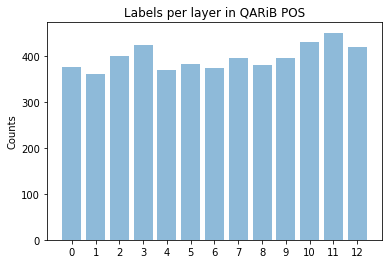

In [20]:
plot_neurons_per_layer(ordering[:cutoffs[5]],title='Labels per layer in QARiB POS')

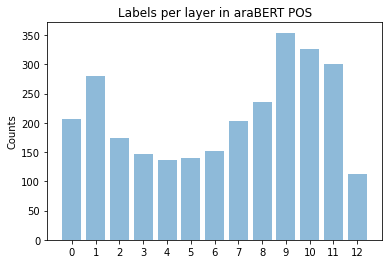

In [12]:
plot_neurons_per_layer(ordering[:cutoffs[5]],title='Labels per layer in araBERT POS')

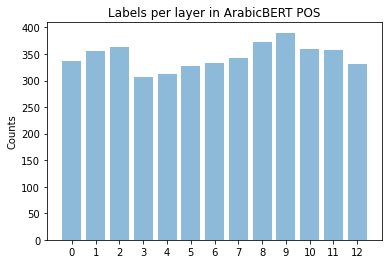

In [36]:
plot_neurons_per_layer(ordering[:cutoffs[5]],title='Labels per layer in ArabicBERT POS')

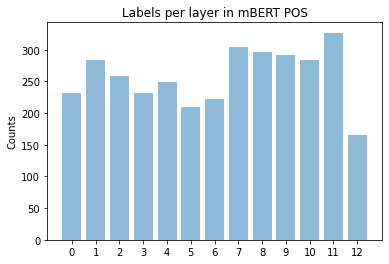

In [47]:
plot_neurons_per_layer(ordering[:cutoffs[5]],title='Labels per layer in mBERT POS')

# Train on top N neurons

In [38]:
X_selected = utils.filter_activations_keep_neurons(ordering[:1000], X)

In [39]:
X_selected.shape

(17758, 1000)

In [40]:
model_selected = utils.train_logreg_model(X_selected, y, lambda_l1=0.001, lambda_l2=0.001)

Training classification model
Creating model...
Number of training instances: 17758
Number of classes: 110



Epoch: [1/10], Loss: 0.0684



Epoch: [2/10], Loss: 0.0519



Epoch: [3/10], Loss: 0.0497



Epoch: [4/10], Loss: 0.0486



Epoch: [5/10], Loss: 0.0480



Epoch: [6/10], Loss: 0.0476



Epoch: [7/10], Loss: 0.0473



Epoch: [8/10], Loss: 0.0471



Epoch: [9/10], Loss: 0.0470



Epoch: [10/10], Loss: 0.0469


In [41]:
utils.evaluate_model(model_selected, X_selected, y, idx_to_class=idx2label)


Score (accuracy) of the model: 0.82


{'__OVERALL__': 0.8214325937605587,
 'NUM+NSUFF': 0.3488372093023256,
 'CONJ+PREP+DET+NOUN+NSUFF': 0.0,
 'ADJ/NUM': 0.0,
 'DET+NUM+NSUFF': 0.0,
 'PREP+V+PRON': 0.0,
 'DET+NOUN+NSUFF/DET+NUM+NSUFF': 1.0,
 'CONJ+NOUN': 0.27485380116959063,
 'FUT_PART+V': 0.05263157894736842,
 'PART+PRON': 0.6923076923076923,
 'PREP+PRON': 0.8152866242038217,
 'ADJ+PRON': 0.0,
 'CONJ+ADJ/CONJ+NOUN': 0.0,
 'DET+ADJ/DET+NOUN': 0.0,
 'FOREIGN': 0.4222222222222222,
 'NOUN+CASE': 0.7877094972067039,
 'CONJ+DET+ADJ+NSUFF': 0.043478260869565216,
 'CONJ+PREP+PRON': 0.0,
 'CONJ+NOUN+CASE': 0.0,
 'ABBREV': 0.0,
 'CONJ+ADJ+CASE': 0.0,
 'DET': 0.0,
 'CONJ+PREP+NOUN+NSUFF+PRON': 0.0,
 'PREP+NUM': 0.0,
 'PREP': 0.9729559748427673,
 'CONJ+NOUN+PRON': 0.0,
 'ADJ': 0.6509695290858726,
 'PREP+NOUN': 0.44036697247706424,
 'PREP+NOUN+NSUFF+NSUFF': 0.0,
 'ADV+CASE': 0.0,
 'PUNC': 0.9822274881516587,
 'CONJ+FUT_PART+V': 0.0,
 'CONJ+NOUN+NSUFF': 0.13636363636363635,
 'DET+NOUN+NSUFF+NSUFF': 0.0,
 'NOUN+NSUFF': 0.712777191129883

# Further analysis

In [43]:
top_neurons = utils.get_top_neurons(model, 0.01, label2idx)

In [44]:
top_neurons

(array([   6, 6152, 8207, ..., 6141, 4094, 4095]),
 {'NUM+NSUFF': array([4387, 3619, 8246]),
  'CONJ+PREP+DET+NOUN+NSUFF': array([3502, 3531, 9431, 2465, 8343, 3920, 1064,  953, 2919, 2413, 6363,
         2220, 1708, 5132, 2194, 8368, 5502,   99]),
  'ADJ/NUM': array([5825, 1377, 4001, 8609, 4002, 2077,  619, 7095, 5589, 6121,   20,
         3322, 3128, 6305,  826, 9201, 1721]),
  'DET+NUM+NSUFF': array([6799]),
  'PREP+V+PRON': array([6635, 2412, 1093, 3579, 9436, 1037, 2980, 6899, 1959, 8391, 7411,
         6954,  974, 6759,  637,  718, 8599, 8468, 4235]),
  'DET+NOUN+NSUFF/DET+NUM+NSUFF': array([7519, 6751, 9055, 8287, 9823, 9966, 5983, 6633, 8729, 6814, 5865,
         4510, 9369, 7401, 9198, 6489, 9497, 9705, 7698, 1925, 9444, 9262]),
  'CONJ+NOUN': array([6317, 5549, 2291, 6630]),
  'FUT_PART+V': array([1147, 3044, 5808, 3968]),
  'PART+PRON': array([2735, 1034]),
  'PREP+PRON': array([2010, 1043]),
  'ADJ+PRON': array([6529, 5331, 4416, 9040, 7474, 2562, 6195, 3644, 4854, 4839, 1

In [45]:
top_neurons[1].keys()

dict_keys(['NUM+NSUFF', 'CONJ+PREP+DET+NOUN+NSUFF', 'ADJ/NUM', 'DET+NUM+NSUFF', 'PREP+V+PRON', 'DET+NOUN+NSUFF/DET+NUM+NSUFF', 'CONJ+NOUN', 'FUT_PART+V', 'PART+PRON', 'PREP+PRON', 'ADJ+PRON', 'CONJ+ADJ/CONJ+NOUN', 'DET+ADJ/DET+NOUN', 'FOREIGN', 'NOUN+CASE', 'CONJ+DET+ADJ+NSUFF', 'CONJ+PREP+PRON', 'CONJ+NOUN+CASE', 'ABBREV', 'CONJ+ADJ+CASE', 'DET', 'CONJ+PREP+NOUN+NSUFF+PRON', 'PREP+NUM', 'PREP', 'CONJ+NOUN+PRON', 'ADJ', 'PREP+NOUN', 'PREP+NOUN+NSUFF+NSUFF', 'ADV+CASE', 'PUNC', 'CONJ+FUT_PART+V', 'CONJ+NOUN+NSUFF', 'DET+NOUN+NSUFF+NSUFF', 'NOUN+NSUFF', 'CONJ+NUM+NSUFF', 'ADJ+NSUFF/NOUN+NSUFF', 'CONJ+PRON', 'PART/NOUN+PART', 'CONJ+DET+ADJ', 'V', 'NUM', 'ADJ+NSUFF+NSUFF', 'CONJ+V+PRON', 'ADV', 'PREP+ADJ+PRON', 'CONJ+ADJ+PRON', 'CONJ+ADV', 'PRON', 'CONJ+DET+NOUN+NSUFF', 'CONJ+ADV+CASE', 'PREP+PART+PRON', 'PART/NOUN', 'PREP+PART/CONJ', 'CONJ+PART/CONJ+PREP+PART', 'DET+NUM', 'CONJ+PART', 'DET+ADJ+NSUFF/DET+NUM+NSUFF', 'CONJ', 'PREP+DET+ADJ', 'DET+NOUN/DET+ADJ', 'CONJ+CONJ', 'PREP+NOUN+NSUFF+

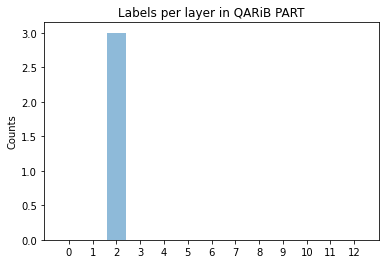

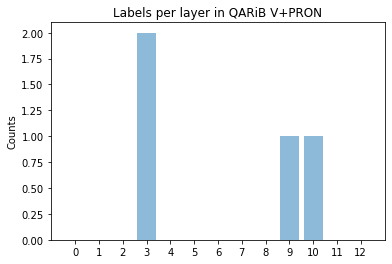

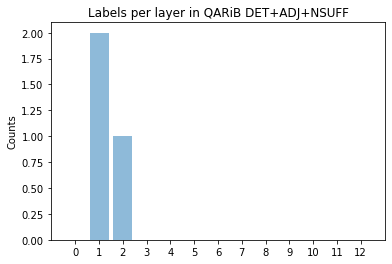

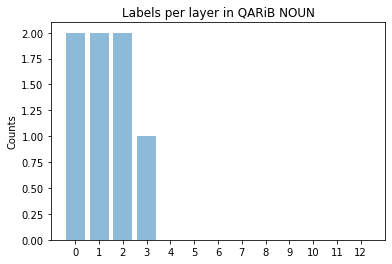

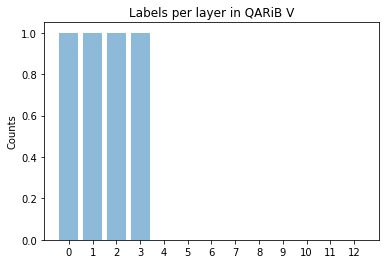

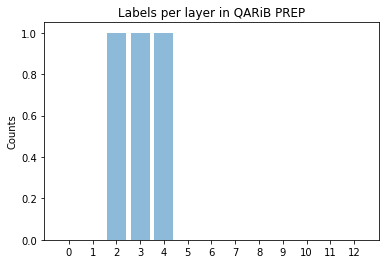

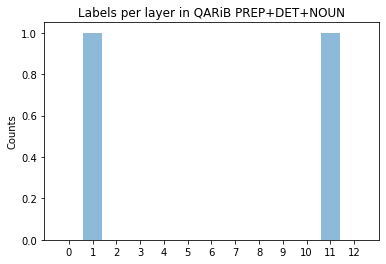

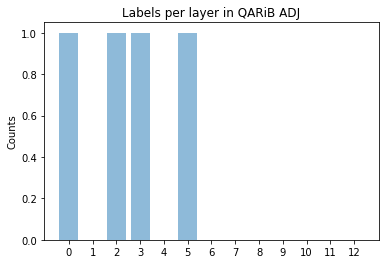

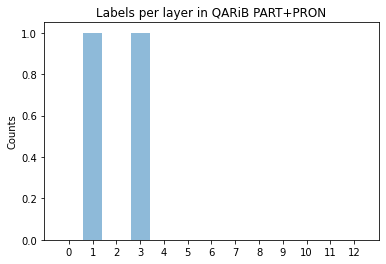

In [48]:
for tag in {'NOUN', 'V', 'PART', 'PREP', 'ADJ', 'PREP+DET+NOUN', 'V+PRON', 'DET+ADJ+NSUFF' , 'PART+PRON' }:
    plot_neurons_per_layer(top_neurons[1][tag],title='Labels per layer in QARiB '+tag)

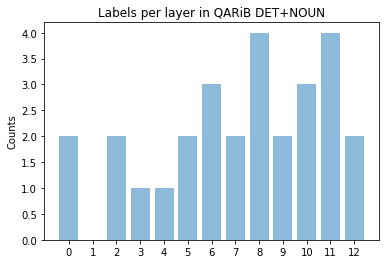

In [107]:
plot_neurons_per_layer(top_neurons[1]['DET+NOUN'],title='Labels per layer in QARiB DET+NOUN')

In [68]:
X_zeroed = utils.zero_out_activations_keep_neurons(ordering[:10], X)
utils.evaluate_model(model, X_zeroed, y, idx_to_class=idx2label)


Score (accuracy) of the model: 0.33


{'__OVERALL__': 0.32941176470588235,
 'PREP': 0.16666666666666666,
 'PREP+NOUN': 1.0,
 'V+PRON': 0.3333333333333333,
 'DET+NOUN+NSUFF': 0.2857142857142857,
 'PRON': 0.0,
 'NOUN+NSUFF': 0.0,
 'PART': 1.0,
 'DET+ADJ': 0.3333333333333333,
 'PREP+PRON': 0.0,
 'CONJ': 0.3333333333333333,
 'NOUN': 0.18181818181818182,
 'DET+NOUN': 0.14285714285714285,
 'ADJ+NSUFF': 0.5,
 'PUNC': 0.9,
 'NOUN+PRON': 1.0,
 'V': 0.0}

In [86]:
activations

[array([[-0.31712773,  0.25761881,  0.55649602, ...,  1.02079916,
          0.74297106,  0.28554019],
        [ 0.21799527,  0.67488086,  0.27057877, ...,  0.7879101 ,
          0.47191897,  0.41795936],
        [ 0.14937855, -0.12780708,  0.2452282 , ...,  1.14842796,
         -0.03361775, -0.75642848],
        ...,
        [-0.8342008 ,  2.23695898,  1.12613237, ...,  0.70942152,
          0.82478094, -0.00778293],
        [-1.57582808,  1.80389714,  0.89772081, ...,  1.45170391,
          0.99885601,  0.10062478],
        [-1.45621371,  1.57555151, -0.39252782, ...,  1.12517512,
          1.03058934, -0.12751535]]),
 array([[-0.90471631, -0.48379153,  0.80337554, ...,  1.13737488,
          0.01800438, -0.50963306],
        [-0.29100445, -0.55599517,  0.83081937, ...,  0.34257746,
          0.898453  , -0.38467422],
        [ 0.41927424, -0.75273305,  0.10223106, ...,  0.23210475,
          1.11697245, -0.70027936],
        ...,
        [-0.34435731,  0.28794068,  0.15500608, ...,  

In [73]:
import aux_classifier.visualization as visualization
visualization.visualize_activations("في إجراءات استثنائية بسبب وباء كورونا .", activations[0][:, ordering[0]])

In [112]:
import svgwrite
FONT_SIZE = 20
MARGIN = 10
CHAR_LIMIT = 61
def break_lines(text, limit=50):
    lines = []
    curr_line = ""
    for token in text.split(' '):
        if len(curr_line) + 1 + len(token) < limit:
            curr_line += token + " "
        else:
            lines.append(curr_line[:-1])
            curr_line = token + " "
    lines.append(curr_line[:-1])
    return lines

def get_rect_style(color, opacity):
    return """opacity:%0.5f;
            fill:%s;
            fill-opacity:1;
            stroke:none;
            stroke-width:0.26499999;
            stroke-linecap:round;
            stroke-linejoin:miter;
            stroke-miterlimit:4;
            stroke-dasharray:none;
            stroke-dashoffset:0;
            stroke-opacity:1""" % (opacity, color)

def get_text_style(font_size):
    return """font-style:normal;
            font-variant:normal;
            font-weight:normal;
            font-stretch:normal;
            font-size:%0.2fpx;
            line-height:125%%;
            font-family:monospace;
            -inkscape-font-specification:'Arial Unicode MS, Normal';
            font-variant-ligatures:none;
            font-variant-caps:normal;
            font-variant-numeric:normal;
            text-align:start;
            writing-mode:lr-tb;
            text-anchor:start;
            stroke-width:0.26458332px""" % (font_size)


In [113]:
text = 'في إجراءات استثنائية بسبب وباء كورونا .'
lines = break_lines(text, limit=CHAR_LIMIT)
char_width = FONT_SIZE*0.59
char_height = FONT_SIZE*1.25

In [114]:
lines

['في إجراءات استثنائية بسبب وباء كورونا .']

In [115]:
image_height = len(lines) * char_height * 1.2
image_width = CHAR_LIMIT * char_width

dwg = svgwrite.Drawing("tmp.svg", size=(image_width, image_height),
                    profile='full')
dwg.viewbox(0, 0, image_width, image_height)


In [116]:
darken=2
colors=["#d35f5f", "#00aad4"]
scores = activations[0][:, ordering[0]]
offset = 0

In [117]:
group = dwg.g()
for _ in range(darken):
    word_idx = 0
    for line_idx, line in enumerate(lines):
        char_idx = 0
        max_score = max(scores)
        min_score = abs(min(scores))
        limit = max(max_score, min_score)
        for word in line.split(' '):
            print('W:',word)
            score = scores[word_idx]
            if score > 0:
                color = colors[1]
                opacity = score/limit
            else:
                color = colors[0]
                opacity = abs(score)/limit

            for _ in word:
                rect_insert = (0 + char_idx * char_width, offset + 7 + line_idx * char_height)
                rect_size = ("%.2fpx"%(char_width), "%0.2fpx"%(char_height))
                group.add(
                    dwg.rect(insert=rect_insert,
                            size=rect_size,
                            style=get_rect_style(color, opacity)
                            )
                )
                char_idx += 1

            final_rect_insert = (0 + char_idx * char_width, offset + 7 + line_idx * char_height)
            final_rect_size = ("%.2fpx"%(char_width), "%0.2fpx"%(char_height))
            group.add(
                dwg.rect(insert=final_rect_insert,
                        size=final_rect_size,
                        style=get_rect_style(color, opacity)
                        )
            )

            char_idx += 1
            word_idx += 1

    for line_idx, line in enumerate(lines):
        text_insert = (0, offset + FONT_SIZE*1.25*(line_idx+1))
        print(text_insert,text)
        text = dwg.text(text,
                        insert=text_insert,
                        fill='black',
                        style=get_text_style(FONT_SIZE))
        group.add(text)
offset += FONT_SIZE*1.25*len(lines) + MARGIN

dwg.add(group)

W: في
W: إجراءات
W: استثنائية
W: بسبب
W: وباء
W: كورونا
W: .
(0, 25.0) في إجراءات استثنائية بسبب وباء كورونا .
W: في
W: إجراءات
W: استثنائية
W: بسبب
W: وباء
W: كورونا
W: .
(0, 25.0) <svgwrite.text.Text object at 0x16e7ed310>


In [118]:
dwg